In [ ]:
# Part A : Question 3 ---- Completed!

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from time import time

In [2]:
NUM_CLASSES = 3

epochs = 1000
seed = 10
batch_size = 16

np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# scale data
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max-X_min)

In [4]:
#read train data
train_input = np.genfromtxt('ctg_data_cleaned.csv', delimiter= ',')
X, y = train_input[1:, :21], train_input[1:,-1].astype(int)
X = scale(X, np.min(X, axis=0), np.max(X, axis=0))
y = y-1

# Split data into 70:30 ratio for training and testing
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=1)
print(trainX.shape, testX.shape, trainY.shape, testY.shape)

(1488, 21) (638, 21) (1488,) (638,)


In [5]:
# Do k-fold cross validation
n_folds = 5
kfold = KFold(n_splits=n_folds, random_state=seed, shuffle=True)

# K-fold Cross Validation model evaluation
histories = {}
fold_no = 1
reg = regularizers.l2(10e-6)
opt = keras.optimizers.SGD(learning_rate=0.01)
cross_val_acc = []
num_neurons_list = [5,10,15,20,25]
epochs = 1000

for train, val in kfold.split(trainX, trainY):
    for num_neurons in num_neurons_list:
        model = keras.Sequential([keras.layers.Dense(num_neurons, kernel_regularizer=reg, activation='relu'),
                              keras.layers.Dense(NUM_CLASSES, activation='softmax')])

        model.compile(optimizer=opt,
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
        # Generate a print
        print('------------------------------------------------------------------------')
        print(f'Num of Neurons {num_neurons} - Training for Fold {fold_no} ...')
        
        key = (num_neurons, fold_no)
        histories[key] = model.fit(trainX[train], trainY[train], epochs=epochs,
                                   validation_data=(trainX[val], trainY[val]),
                                   verbose=2, batch_size=batch_size)
        
        # Generate a print
        print('------------------------------------------------------------------------')
        print(f'Num of Neurons {num_neurons} - Training for Fold {fold_no} ... Completed')

    fold_no = fold_no + 1
                         

------------------------------------------------------------------------
Num of Neurons 5 - Training for Fold 1 ...
Epoch 1/1000
75/75 - 0s - loss: 0.7163 - accuracy: 0.7866 - val_loss: 0.7069 - val_accuracy: 0.7685
Epoch 2/1000
75/75 - 0s - loss: 0.6732 - accuracy: 0.7866 - val_loss: 0.6866 - val_accuracy: 0.7685
Epoch 3/1000
75/75 - 0s - loss: 0.6528 - accuracy: 0.7866 - val_loss: 0.6704 - val_accuracy: 0.7685
Epoch 4/1000
75/75 - 0s - loss: 0.6355 - accuracy: 0.7866 - val_loss: 0.6540 - val_accuracy: 0.7685
Epoch 5/1000
75/75 - 0s - loss: 0.6194 - accuracy: 0.7866 - val_loss: 0.6402 - val_accuracy: 0.7685
Epoch 6/1000
75/75 - 0s - loss: 0.6038 - accuracy: 0.7866 - val_loss: 0.6260 - val_accuracy: 0.7685
Epoch 7/1000
75/75 - 0s - loss: 0.5883 - accuracy: 0.7866 - val_loss: 0.6110 - val_accuracy: 0.7685
Epoch 8/1000
75/75 - 0s - loss: 0.5749 - accuracy: 0.7866 - val_loss: 0.5996 - val_accuracy: 0.7718
Epoch 9/1000
75/75 - 0s - loss: 0.5634 - accuracy: 0.7866 - val_loss: 0.5909 - val_a

Epoch 82/1000
75/75 - 0s - loss: 0.3088 - accuracy: 0.8849 - val_loss: 0.3295 - val_accuracy: 0.8624
Epoch 83/1000
75/75 - 0s - loss: 0.3075 - accuracy: 0.8874 - val_loss: 0.3308 - val_accuracy: 0.8557
Epoch 84/1000
75/75 - 0s - loss: 0.3063 - accuracy: 0.8849 - val_loss: 0.3307 - val_accuracy: 0.8523
Epoch 85/1000
75/75 - 0s - loss: 0.3046 - accuracy: 0.8849 - val_loss: 0.3292 - val_accuracy: 0.8557
Epoch 86/1000
75/75 - 0s - loss: 0.3039 - accuracy: 0.8866 - val_loss: 0.3241 - val_accuracy: 0.8691
Epoch 87/1000
75/75 - 0s - loss: 0.3030 - accuracy: 0.8807 - val_loss: 0.3264 - val_accuracy: 0.8557
Epoch 88/1000
75/75 - 0s - loss: 0.3020 - accuracy: 0.8840 - val_loss: 0.3264 - val_accuracy: 0.8523
Epoch 89/1000
75/75 - 0s - loss: 0.3010 - accuracy: 0.8866 - val_loss: 0.3224 - val_accuracy: 0.8591
Epoch 90/1000
75/75 - 0s - loss: 0.3001 - accuracy: 0.8832 - val_loss: 0.3231 - val_accuracy: 0.8557
Epoch 91/1000
75/75 - 0s - loss: 0.2992 - accuracy: 0.8866 - val_loss: 0.3187 - val_accurac

Epoch 163/1000
75/75 - 0s - loss: 0.2614 - accuracy: 0.8941 - val_loss: 0.2815 - val_accuracy: 0.8893
Epoch 164/1000
75/75 - 0s - loss: 0.2615 - accuracy: 0.8924 - val_loss: 0.2783 - val_accuracy: 0.8826
Epoch 165/1000
75/75 - 0s - loss: 0.2607 - accuracy: 0.8950 - val_loss: 0.2782 - val_accuracy: 0.8859
Epoch 166/1000
75/75 - 0s - loss: 0.2607 - accuracy: 0.8916 - val_loss: 0.2780 - val_accuracy: 0.8859
Epoch 167/1000
75/75 - 0s - loss: 0.2602 - accuracy: 0.8916 - val_loss: 0.2757 - val_accuracy: 0.8792
Epoch 168/1000
75/75 - 0s - loss: 0.2598 - accuracy: 0.8908 - val_loss: 0.2776 - val_accuracy: 0.8859
Epoch 169/1000
75/75 - 0s - loss: 0.2598 - accuracy: 0.8933 - val_loss: 0.2771 - val_accuracy: 0.8859
Epoch 170/1000
75/75 - 0s - loss: 0.2593 - accuracy: 0.8924 - val_loss: 0.2774 - val_accuracy: 0.8859
Epoch 171/1000
75/75 - 0s - loss: 0.2595 - accuracy: 0.8924 - val_loss: 0.2769 - val_accuracy: 0.8859
Epoch 172/1000
75/75 - 0s - loss: 0.2580 - accuracy: 0.9000 - val_loss: 0.2735 - v

Epoch 244/1000
75/75 - 0s - loss: 0.2430 - accuracy: 0.9017 - val_loss: 0.2563 - val_accuracy: 0.8859
Epoch 245/1000
75/75 - 0s - loss: 0.2431 - accuracy: 0.8983 - val_loss: 0.2573 - val_accuracy: 0.8826
Epoch 246/1000
75/75 - 0s - loss: 0.2426 - accuracy: 0.9000 - val_loss: 0.2556 - val_accuracy: 0.8859
Epoch 247/1000
75/75 - 0s - loss: 0.2425 - accuracy: 0.8975 - val_loss: 0.2559 - val_accuracy: 0.8859
Epoch 248/1000
75/75 - 0s - loss: 0.2424 - accuracy: 0.9008 - val_loss: 0.2574 - val_accuracy: 0.8826
Epoch 249/1000
75/75 - 0s - loss: 0.2417 - accuracy: 0.9025 - val_loss: 0.2548 - val_accuracy: 0.8859
Epoch 250/1000
75/75 - 0s - loss: 0.2418 - accuracy: 0.8975 - val_loss: 0.2561 - val_accuracy: 0.8826
Epoch 251/1000
75/75 - 0s - loss: 0.2416 - accuracy: 0.8966 - val_loss: 0.2575 - val_accuracy: 0.8826
Epoch 252/1000
75/75 - 0s - loss: 0.2414 - accuracy: 0.8992 - val_loss: 0.2545 - val_accuracy: 0.8859
Epoch 253/1000
75/75 - 0s - loss: 0.2406 - accuracy: 0.9025 - val_loss: 0.2538 - v

Epoch 325/1000
75/75 - 0s - loss: 0.2328 - accuracy: 0.9025 - val_loss: 0.2453 - val_accuracy: 0.8926
Epoch 326/1000
75/75 - 0s - loss: 0.2317 - accuracy: 0.9017 - val_loss: 0.2485 - val_accuracy: 0.8859
Epoch 327/1000
75/75 - 0s - loss: 0.2320 - accuracy: 0.9050 - val_loss: 0.2499 - val_accuracy: 0.8826
Epoch 328/1000
75/75 - 0s - loss: 0.2318 - accuracy: 0.9017 - val_loss: 0.2436 - val_accuracy: 0.8893
Epoch 329/1000
75/75 - 0s - loss: 0.2330 - accuracy: 0.9025 - val_loss: 0.2463 - val_accuracy: 0.8926
Epoch 330/1000
75/75 - 0s - loss: 0.2318 - accuracy: 0.9042 - val_loss: 0.2444 - val_accuracy: 0.8926
Epoch 331/1000
75/75 - 0s - loss: 0.2320 - accuracy: 0.9059 - val_loss: 0.2449 - val_accuracy: 0.8926
Epoch 332/1000
75/75 - 0s - loss: 0.2312 - accuracy: 0.9034 - val_loss: 0.2438 - val_accuracy: 0.8893
Epoch 333/1000
75/75 - 0s - loss: 0.2318 - accuracy: 0.9008 - val_loss: 0.2433 - val_accuracy: 0.8859
Epoch 334/1000
75/75 - 0s - loss: 0.2315 - accuracy: 0.9050 - val_loss: 0.2484 - v

Epoch 406/1000
75/75 - 0s - loss: 0.2252 - accuracy: 0.9050 - val_loss: 0.2366 - val_accuracy: 0.8960
Epoch 407/1000
75/75 - 0s - loss: 0.2252 - accuracy: 0.9034 - val_loss: 0.2363 - val_accuracy: 0.8960
Epoch 408/1000
75/75 - 0s - loss: 0.2259 - accuracy: 0.9050 - val_loss: 0.2372 - val_accuracy: 0.8960
Epoch 409/1000
75/75 - 0s - loss: 0.2251 - accuracy: 0.9059 - val_loss: 0.2390 - val_accuracy: 0.8893
Epoch 410/1000
75/75 - 0s - loss: 0.2253 - accuracy: 0.9042 - val_loss: 0.2398 - val_accuracy: 0.8893
Epoch 411/1000
75/75 - 0s - loss: 0.2251 - accuracy: 0.9050 - val_loss: 0.2378 - val_accuracy: 0.8893
Epoch 412/1000
75/75 - 0s - loss: 0.2250 - accuracy: 0.9076 - val_loss: 0.2382 - val_accuracy: 0.8893
Epoch 413/1000
75/75 - 0s - loss: 0.2248 - accuracy: 0.9042 - val_loss: 0.2367 - val_accuracy: 0.8960
Epoch 414/1000
75/75 - 0s - loss: 0.2238 - accuracy: 0.9042 - val_loss: 0.2376 - val_accuracy: 0.8893
Epoch 415/1000
75/75 - 0s - loss: 0.2248 - accuracy: 0.9050 - val_loss: 0.2363 - v

Epoch 487/1000
75/75 - 0s - loss: 0.2199 - accuracy: 0.9059 - val_loss: 0.2307 - val_accuracy: 0.8993
Epoch 488/1000
75/75 - 0s - loss: 0.2196 - accuracy: 0.9076 - val_loss: 0.2315 - val_accuracy: 0.8993
Epoch 489/1000
75/75 - 0s - loss: 0.2190 - accuracy: 0.9092 - val_loss: 0.2394 - val_accuracy: 0.8926
Epoch 490/1000
75/75 - 0s - loss: 0.2198 - accuracy: 0.9050 - val_loss: 0.2319 - val_accuracy: 0.8960
Epoch 491/1000
75/75 - 0s - loss: 0.2195 - accuracy: 0.9059 - val_loss: 0.2325 - val_accuracy: 0.8960
Epoch 492/1000
75/75 - 0s - loss: 0.2193 - accuracy: 0.9092 - val_loss: 0.2305 - val_accuracy: 0.8993
Epoch 493/1000
75/75 - 0s - loss: 0.2191 - accuracy: 0.9059 - val_loss: 0.2340 - val_accuracy: 0.8960
Epoch 494/1000
75/75 - 0s - loss: 0.2189 - accuracy: 0.9059 - val_loss: 0.2303 - val_accuracy: 0.8993
Epoch 495/1000
75/75 - 0s - loss: 0.2196 - accuracy: 0.9059 - val_loss: 0.2304 - val_accuracy: 0.8993
Epoch 496/1000
75/75 - 0s - loss: 0.2194 - accuracy: 0.9050 - val_loss: 0.2301 - v

Epoch 568/1000
75/75 - 0s - loss: 0.2131 - accuracy: 0.9092 - val_loss: 0.2324 - val_accuracy: 0.8960
Epoch 569/1000
75/75 - 0s - loss: 0.2139 - accuracy: 0.9092 - val_loss: 0.2300 - val_accuracy: 0.8993
Epoch 570/1000
75/75 - 0s - loss: 0.2138 - accuracy: 0.9092 - val_loss: 0.2293 - val_accuracy: 0.9027
Epoch 571/1000
75/75 - 0s - loss: 0.2134 - accuracy: 0.9076 - val_loss: 0.2303 - val_accuracy: 0.8960
Epoch 572/1000
75/75 - 0s - loss: 0.2130 - accuracy: 0.9084 - val_loss: 0.2293 - val_accuracy: 0.9027
Epoch 573/1000
75/75 - 0s - loss: 0.2135 - accuracy: 0.9126 - val_loss: 0.2318 - val_accuracy: 0.8993
Epoch 574/1000
75/75 - 0s - loss: 0.2127 - accuracy: 0.9076 - val_loss: 0.2291 - val_accuracy: 0.9027
Epoch 575/1000
75/75 - 0s - loss: 0.2130 - accuracy: 0.9092 - val_loss: 0.2304 - val_accuracy: 0.8960
Epoch 576/1000
75/75 - 0s - loss: 0.2127 - accuracy: 0.9109 - val_loss: 0.2307 - val_accuracy: 0.8960
Epoch 577/1000
75/75 - 0s - loss: 0.2112 - accuracy: 0.9109 - val_loss: 0.2385 - v

Epoch 649/1000
75/75 - 0s - loss: 0.2090 - accuracy: 0.9076 - val_loss: 0.2303 - val_accuracy: 0.8960
Epoch 650/1000
75/75 - 0s - loss: 0.2091 - accuracy: 0.9042 - val_loss: 0.2365 - val_accuracy: 0.8960
Epoch 651/1000
75/75 - 0s - loss: 0.2090 - accuracy: 0.9084 - val_loss: 0.2272 - val_accuracy: 0.8993
Epoch 652/1000
75/75 - 0s - loss: 0.2083 - accuracy: 0.9059 - val_loss: 0.2296 - val_accuracy: 0.8960
Epoch 653/1000
75/75 - 0s - loss: 0.2081 - accuracy: 0.9076 - val_loss: 0.2308 - val_accuracy: 0.8960
Epoch 654/1000
75/75 - 0s - loss: 0.2074 - accuracy: 0.9143 - val_loss: 0.2275 - val_accuracy: 0.8993
Epoch 655/1000
75/75 - 0s - loss: 0.2079 - accuracy: 0.9076 - val_loss: 0.2379 - val_accuracy: 0.8993
Epoch 656/1000
75/75 - 0s - loss: 0.2089 - accuracy: 0.9084 - val_loss: 0.2279 - val_accuracy: 0.8993
Epoch 657/1000
75/75 - 0s - loss: 0.2091 - accuracy: 0.9109 - val_loss: 0.2289 - val_accuracy: 0.8993
Epoch 658/1000
75/75 - 0s - loss: 0.2081 - accuracy: 0.9076 - val_loss: 0.2278 - v

Epoch 730/1000
75/75 - 0s - loss: 0.2053 - accuracy: 0.9050 - val_loss: 0.2276 - val_accuracy: 0.9027
Epoch 731/1000
75/75 - 0s - loss: 0.2056 - accuracy: 0.9118 - val_loss: 0.2263 - val_accuracy: 0.9027
Epoch 732/1000
75/75 - 0s - loss: 0.2051 - accuracy: 0.9109 - val_loss: 0.2272 - val_accuracy: 0.9027
Epoch 733/1000
75/75 - 0s - loss: 0.2047 - accuracy: 0.9101 - val_loss: 0.2314 - val_accuracy: 0.8993
Epoch 734/1000
75/75 - 0s - loss: 0.2031 - accuracy: 0.9109 - val_loss: 0.2380 - val_accuracy: 0.9027
Epoch 735/1000
75/75 - 0s - loss: 0.2057 - accuracy: 0.9134 - val_loss: 0.2292 - val_accuracy: 0.8993
Epoch 736/1000
75/75 - 0s - loss: 0.2051 - accuracy: 0.9092 - val_loss: 0.2263 - val_accuracy: 0.9027
Epoch 737/1000
75/75 - 0s - loss: 0.2056 - accuracy: 0.9109 - val_loss: 0.2288 - val_accuracy: 0.8993
Epoch 738/1000
75/75 - 0s - loss: 0.2050 - accuracy: 0.9118 - val_loss: 0.2256 - val_accuracy: 0.9027
Epoch 739/1000
75/75 - 0s - loss: 0.2046 - accuracy: 0.9118 - val_loss: 0.2267 - v

Epoch 811/1000
75/75 - 0s - loss: 0.2021 - accuracy: 0.9084 - val_loss: 0.2263 - val_accuracy: 0.9027
Epoch 812/1000
75/75 - 0s - loss: 0.2021 - accuracy: 0.9126 - val_loss: 0.2244 - val_accuracy: 0.9027
Epoch 813/1000
75/75 - 0s - loss: 0.2019 - accuracy: 0.9126 - val_loss: 0.2349 - val_accuracy: 0.9027
Epoch 814/1000
75/75 - 0s - loss: 0.2027 - accuracy: 0.9118 - val_loss: 0.2282 - val_accuracy: 0.8960
Epoch 815/1000
75/75 - 0s - loss: 0.2020 - accuracy: 0.9067 - val_loss: 0.2280 - val_accuracy: 0.8993
Epoch 816/1000
75/75 - 0s - loss: 0.2018 - accuracy: 0.9134 - val_loss: 0.2239 - val_accuracy: 0.9027
Epoch 817/1000
75/75 - 0s - loss: 0.2016 - accuracy: 0.9118 - val_loss: 0.2257 - val_accuracy: 0.9027
Epoch 818/1000
75/75 - 0s - loss: 0.2016 - accuracy: 0.9151 - val_loss: 0.2249 - val_accuracy: 0.8993
Epoch 819/1000
75/75 - 0s - loss: 0.2013 - accuracy: 0.9134 - val_loss: 0.2238 - val_accuracy: 0.9027
Epoch 820/1000
75/75 - 0s - loss: 0.2021 - accuracy: 0.9134 - val_loss: 0.2264 - v

Epoch 892/1000
75/75 - 0s - loss: 0.1994 - accuracy: 0.9168 - val_loss: 0.2229 - val_accuracy: 0.8993
Epoch 893/1000
75/75 - 0s - loss: 0.1984 - accuracy: 0.9126 - val_loss: 0.2322 - val_accuracy: 0.9027
Epoch 894/1000
75/75 - 0s - loss: 0.1993 - accuracy: 0.9134 - val_loss: 0.2228 - val_accuracy: 0.9060
Epoch 895/1000
75/75 - 0s - loss: 0.1998 - accuracy: 0.9118 - val_loss: 0.2251 - val_accuracy: 0.8960
Epoch 896/1000
75/75 - 0s - loss: 0.1993 - accuracy: 0.9126 - val_loss: 0.2245 - val_accuracy: 0.8993
Epoch 897/1000
75/75 - 0s - loss: 0.1993 - accuracy: 0.9109 - val_loss: 0.2286 - val_accuracy: 0.8960
Epoch 898/1000
75/75 - 0s - loss: 0.1992 - accuracy: 0.9126 - val_loss: 0.2275 - val_accuracy: 0.8960
Epoch 899/1000
75/75 - 0s - loss: 0.1985 - accuracy: 0.9126 - val_loss: 0.2231 - val_accuracy: 0.8993
Epoch 900/1000
75/75 - 0s - loss: 0.1990 - accuracy: 0.9126 - val_loss: 0.2268 - val_accuracy: 0.8960
Epoch 901/1000
75/75 - 0s - loss: 0.1985 - accuracy: 0.9126 - val_loss: 0.2238 - v

Epoch 973/1000
75/75 - 0s - loss: 0.1975 - accuracy: 0.9101 - val_loss: 0.2254 - val_accuracy: 0.8993
Epoch 974/1000
75/75 - 0s - loss: 0.1970 - accuracy: 0.9143 - val_loss: 0.2286 - val_accuracy: 0.8993
Epoch 975/1000
75/75 - 0s - loss: 0.1967 - accuracy: 0.9092 - val_loss: 0.2326 - val_accuracy: 0.9027
Epoch 976/1000
75/75 - 0s - loss: 0.1967 - accuracy: 0.9134 - val_loss: 0.2240 - val_accuracy: 0.8960
Epoch 977/1000
75/75 - 0s - loss: 0.1968 - accuracy: 0.9134 - val_loss: 0.2260 - val_accuracy: 0.8993
Epoch 978/1000
75/75 - 0s - loss: 0.1967 - accuracy: 0.9126 - val_loss: 0.2372 - val_accuracy: 0.8993
Epoch 979/1000
75/75 - 0s - loss: 0.1977 - accuracy: 0.9143 - val_loss: 0.2258 - val_accuracy: 0.8960
Epoch 980/1000
75/75 - 0s - loss: 0.1964 - accuracy: 0.9109 - val_loss: 0.2230 - val_accuracy: 0.8993
Epoch 981/1000
75/75 - 0s - loss: 0.1975 - accuracy: 0.9143 - val_loss: 0.2249 - val_accuracy: 0.8993
Epoch 982/1000
75/75 - 0s - loss: 0.1968 - accuracy: 0.9092 - val_loss: 0.2268 - v

Epoch 52/1000
75/75 - 0s - loss: 0.3281 - accuracy: 0.8697 - val_loss: 0.3537 - val_accuracy: 0.8557
Epoch 53/1000
75/75 - 0s - loss: 0.3266 - accuracy: 0.8714 - val_loss: 0.3499 - val_accuracy: 0.8591
Epoch 54/1000
75/75 - 0s - loss: 0.3247 - accuracy: 0.8773 - val_loss: 0.3485 - val_accuracy: 0.8557
Epoch 55/1000
75/75 - 0s - loss: 0.3231 - accuracy: 0.8756 - val_loss: 0.3463 - val_accuracy: 0.8591
Epoch 56/1000
75/75 - 0s - loss: 0.3212 - accuracy: 0.8731 - val_loss: 0.3438 - val_accuracy: 0.8691
Epoch 57/1000
75/75 - 0s - loss: 0.3198 - accuracy: 0.8790 - val_loss: 0.3425 - val_accuracy: 0.8624
Epoch 58/1000
75/75 - 0s - loss: 0.3179 - accuracy: 0.8790 - val_loss: 0.3448 - val_accuracy: 0.8557
Epoch 59/1000
75/75 - 0s - loss: 0.3164 - accuracy: 0.8773 - val_loss: 0.3413 - val_accuracy: 0.8557
Epoch 60/1000
75/75 - 0s - loss: 0.3148 - accuracy: 0.8815 - val_loss: 0.3378 - val_accuracy: 0.8557
Epoch 61/1000
75/75 - 0s - loss: 0.3134 - accuracy: 0.8798 - val_loss: 0.3380 - val_accurac

Epoch 133/1000
75/75 - 0s - loss: 0.2585 - accuracy: 0.8941 - val_loss: 0.2721 - val_accuracy: 0.8859
Epoch 134/1000
75/75 - 0s - loss: 0.2577 - accuracy: 0.8916 - val_loss: 0.2715 - val_accuracy: 0.8826
Epoch 135/1000
75/75 - 0s - loss: 0.2577 - accuracy: 0.8950 - val_loss: 0.2690 - val_accuracy: 0.8826
Epoch 136/1000
75/75 - 0s - loss: 0.2572 - accuracy: 0.8899 - val_loss: 0.2698 - val_accuracy: 0.8826
Epoch 137/1000
75/75 - 0s - loss: 0.2568 - accuracy: 0.8933 - val_loss: 0.2682 - val_accuracy: 0.8792
Epoch 138/1000
75/75 - 0s - loss: 0.2563 - accuracy: 0.8916 - val_loss: 0.2701 - val_accuracy: 0.8859
Epoch 139/1000
75/75 - 0s - loss: 0.2561 - accuracy: 0.8924 - val_loss: 0.2676 - val_accuracy: 0.8792
Epoch 140/1000
75/75 - 0s - loss: 0.2558 - accuracy: 0.8958 - val_loss: 0.2676 - val_accuracy: 0.8792
Epoch 141/1000
75/75 - 0s - loss: 0.2558 - accuracy: 0.8899 - val_loss: 0.2679 - val_accuracy: 0.8792
Epoch 142/1000
75/75 - 0s - loss: 0.2552 - accuracy: 0.8924 - val_loss: 0.2667 - v

Epoch 214/1000
75/75 - 0s - loss: 0.2370 - accuracy: 0.8992 - val_loss: 0.2485 - val_accuracy: 0.8859
Epoch 215/1000
75/75 - 0s - loss: 0.2363 - accuracy: 0.8983 - val_loss: 0.2465 - val_accuracy: 0.8893
Epoch 216/1000
75/75 - 0s - loss: 0.2362 - accuracy: 0.9008 - val_loss: 0.2461 - val_accuracy: 0.8893
Epoch 217/1000
75/75 - 0s - loss: 0.2356 - accuracy: 0.8983 - val_loss: 0.2463 - val_accuracy: 0.8893
Epoch 218/1000
75/75 - 0s - loss: 0.2359 - accuracy: 0.9000 - val_loss: 0.2453 - val_accuracy: 0.8893
Epoch 219/1000
75/75 - 0s - loss: 0.2353 - accuracy: 0.9008 - val_loss: 0.2441 - val_accuracy: 0.8926
Epoch 220/1000
75/75 - 0s - loss: 0.2358 - accuracy: 0.9000 - val_loss: 0.2459 - val_accuracy: 0.8893
Epoch 221/1000
75/75 - 0s - loss: 0.2350 - accuracy: 0.9017 - val_loss: 0.2462 - val_accuracy: 0.8893
Epoch 222/1000
75/75 - 0s - loss: 0.2351 - accuracy: 0.9008 - val_loss: 0.2485 - val_accuracy: 0.8859
Epoch 223/1000
75/75 - 0s - loss: 0.2342 - accuracy: 0.9034 - val_loss: 0.2436 - v

Epoch 295/1000
75/75 - 0s - loss: 0.2246 - accuracy: 0.9034 - val_loss: 0.2344 - val_accuracy: 0.8926
Epoch 296/1000
75/75 - 0s - loss: 0.2236 - accuracy: 0.9025 - val_loss: 0.2344 - val_accuracy: 0.8926
Epoch 297/1000
75/75 - 0s - loss: 0.2235 - accuracy: 0.9034 - val_loss: 0.2339 - val_accuracy: 0.8926
Epoch 298/1000
75/75 - 0s - loss: 0.2233 - accuracy: 0.9042 - val_loss: 0.2348 - val_accuracy: 0.8926
Epoch 299/1000
75/75 - 0s - loss: 0.2229 - accuracy: 0.9034 - val_loss: 0.2348 - val_accuracy: 0.8926
Epoch 300/1000
75/75 - 0s - loss: 0.2231 - accuracy: 0.9059 - val_loss: 0.2356 - val_accuracy: 0.8893
Epoch 301/1000
75/75 - 0s - loss: 0.2229 - accuracy: 0.9067 - val_loss: 0.2333 - val_accuracy: 0.8926
Epoch 302/1000
75/75 - 0s - loss: 0.2230 - accuracy: 0.9017 - val_loss: 0.2362 - val_accuracy: 0.8926
Epoch 303/1000
75/75 - 0s - loss: 0.2228 - accuracy: 0.9025 - val_loss: 0.2349 - val_accuracy: 0.8926
Epoch 304/1000
75/75 - 0s - loss: 0.2224 - accuracy: 0.9034 - val_loss: 0.2349 - v

Epoch 376/1000
75/75 - 0s - loss: 0.2139 - accuracy: 0.9092 - val_loss: 0.2265 - val_accuracy: 0.8960
Epoch 377/1000
75/75 - 0s - loss: 0.2140 - accuracy: 0.9092 - val_loss: 0.2267 - val_accuracy: 0.8993
Epoch 378/1000
75/75 - 0s - loss: 0.2137 - accuracy: 0.9076 - val_loss: 0.2261 - val_accuracy: 0.8960
Epoch 379/1000
75/75 - 0s - loss: 0.2137 - accuracy: 0.9084 - val_loss: 0.2288 - val_accuracy: 0.8960
Epoch 380/1000
75/75 - 0s - loss: 0.2138 - accuracy: 0.9084 - val_loss: 0.2276 - val_accuracy: 0.8960
Epoch 381/1000
75/75 - 0s - loss: 0.2134 - accuracy: 0.9076 - val_loss: 0.2282 - val_accuracy: 0.8960
Epoch 382/1000
75/75 - 0s - loss: 0.2135 - accuracy: 0.9084 - val_loss: 0.2275 - val_accuracy: 0.8960
Epoch 383/1000
75/75 - 0s - loss: 0.2131 - accuracy: 0.9067 - val_loss: 0.2279 - val_accuracy: 0.8960
Epoch 384/1000
75/75 - 0s - loss: 0.2132 - accuracy: 0.9076 - val_loss: 0.2283 - val_accuracy: 0.8960
Epoch 385/1000
75/75 - 0s - loss: 0.2130 - accuracy: 0.9092 - val_loss: 0.2292 - v

Epoch 457/1000
75/75 - 0s - loss: 0.2053 - accuracy: 0.9126 - val_loss: 0.2236 - val_accuracy: 0.8960
Epoch 458/1000
75/75 - 0s - loss: 0.2069 - accuracy: 0.9118 - val_loss: 0.2237 - val_accuracy: 0.8960
Epoch 459/1000
75/75 - 0s - loss: 0.2060 - accuracy: 0.9109 - val_loss: 0.2234 - val_accuracy: 0.8993
Epoch 460/1000
75/75 - 0s - loss: 0.2052 - accuracy: 0.9084 - val_loss: 0.2229 - val_accuracy: 0.8960
Epoch 461/1000
75/75 - 0s - loss: 0.2056 - accuracy: 0.9118 - val_loss: 0.2234 - val_accuracy: 0.8960
Epoch 462/1000
75/75 - 0s - loss: 0.2056 - accuracy: 0.9084 - val_loss: 0.2227 - val_accuracy: 0.8960
Epoch 463/1000
75/75 - 0s - loss: 0.2056 - accuracy: 0.9118 - val_loss: 0.2251 - val_accuracy: 0.8893
Epoch 464/1000
75/75 - 0s - loss: 0.2055 - accuracy: 0.9118 - val_loss: 0.2235 - val_accuracy: 0.8960
Epoch 465/1000
75/75 - 0s - loss: 0.2052 - accuracy: 0.9109 - val_loss: 0.2231 - val_accuracy: 0.8960
Epoch 466/1000
75/75 - 0s - loss: 0.2054 - accuracy: 0.9126 - val_loss: 0.2226 - v

Epoch 538/1000
75/75 - 0s - loss: 0.1998 - accuracy: 0.9185 - val_loss: 0.2220 - val_accuracy: 0.8960
Epoch 539/1000
75/75 - 0s - loss: 0.1998 - accuracy: 0.9160 - val_loss: 0.2228 - val_accuracy: 0.8993
Epoch 540/1000
75/75 - 0s - loss: 0.1991 - accuracy: 0.9143 - val_loss: 0.2221 - val_accuracy: 0.8993
Epoch 541/1000
75/75 - 0s - loss: 0.1988 - accuracy: 0.9143 - val_loss: 0.2243 - val_accuracy: 0.8893
Epoch 542/1000
75/75 - 0s - loss: 0.1994 - accuracy: 0.9143 - val_loss: 0.2225 - val_accuracy: 0.8960
Epoch 543/1000
75/75 - 0s - loss: 0.1992 - accuracy: 0.9151 - val_loss: 0.2225 - val_accuracy: 0.8993
Epoch 544/1000
75/75 - 0s - loss: 0.1990 - accuracy: 0.9151 - val_loss: 0.2277 - val_accuracy: 0.8893
Epoch 545/1000
75/75 - 0s - loss: 0.1993 - accuracy: 0.9126 - val_loss: 0.2223 - val_accuracy: 0.8993
Epoch 546/1000
75/75 - 0s - loss: 0.1992 - accuracy: 0.9160 - val_loss: 0.2282 - val_accuracy: 0.8893
Epoch 547/1000
75/75 - 0s - loss: 0.1988 - accuracy: 0.9134 - val_loss: 0.2218 - v

Epoch 619/1000
75/75 - 0s - loss: 0.1945 - accuracy: 0.9160 - val_loss: 0.2221 - val_accuracy: 0.8926
Epoch 620/1000
75/75 - 0s - loss: 0.1935 - accuracy: 0.9185 - val_loss: 0.2215 - val_accuracy: 0.9027
Epoch 621/1000
75/75 - 0s - loss: 0.1941 - accuracy: 0.9143 - val_loss: 0.2211 - val_accuracy: 0.9027
Epoch 622/1000
75/75 - 0s - loss: 0.1939 - accuracy: 0.9151 - val_loss: 0.2220 - val_accuracy: 0.8960
Epoch 623/1000
75/75 - 0s - loss: 0.1941 - accuracy: 0.9143 - val_loss: 0.2213 - val_accuracy: 0.9027
Epoch 624/1000
75/75 - 0s - loss: 0.1935 - accuracy: 0.9185 - val_loss: 0.2216 - val_accuracy: 0.8960
Epoch 625/1000
75/75 - 0s - loss: 0.1935 - accuracy: 0.9118 - val_loss: 0.2218 - val_accuracy: 0.9027
Epoch 626/1000
75/75 - 0s - loss: 0.1934 - accuracy: 0.9151 - val_loss: 0.2220 - val_accuracy: 0.8993
Epoch 627/1000
75/75 - 0s - loss: 0.1938 - accuracy: 0.9185 - val_loss: 0.2219 - val_accuracy: 0.9027
Epoch 628/1000
75/75 - 0s - loss: 0.1934 - accuracy: 0.9193 - val_loss: 0.2227 - v

Epoch 700/1000
75/75 - 0s - loss: 0.1885 - accuracy: 0.9202 - val_loss: 0.2234 - val_accuracy: 0.8960
Epoch 701/1000
75/75 - 0s - loss: 0.1888 - accuracy: 0.9202 - val_loss: 0.2238 - val_accuracy: 0.8926
Epoch 702/1000
75/75 - 0s - loss: 0.1886 - accuracy: 0.9227 - val_loss: 0.2239 - val_accuracy: 0.8893
Epoch 703/1000
75/75 - 0s - loss: 0.1882 - accuracy: 0.9202 - val_loss: 0.2236 - val_accuracy: 0.8993
Epoch 704/1000
75/75 - 0s - loss: 0.1886 - accuracy: 0.9160 - val_loss: 0.2242 - val_accuracy: 0.8926
Epoch 705/1000
75/75 - 0s - loss: 0.1877 - accuracy: 0.9176 - val_loss: 0.2233 - val_accuracy: 0.8960
Epoch 706/1000
75/75 - 0s - loss: 0.1880 - accuracy: 0.9176 - val_loss: 0.2239 - val_accuracy: 0.8926
Epoch 707/1000
75/75 - 0s - loss: 0.1881 - accuracy: 0.9168 - val_loss: 0.2232 - val_accuracy: 0.8960
Epoch 708/1000
75/75 - 0s - loss: 0.1890 - accuracy: 0.9185 - val_loss: 0.2233 - val_accuracy: 0.8960
Epoch 709/1000
75/75 - 0s - loss: 0.1880 - accuracy: 0.9160 - val_loss: 0.2229 - v

Epoch 781/1000
75/75 - 0s - loss: 0.1843 - accuracy: 0.9252 - val_loss: 0.2241 - val_accuracy: 0.8926
Epoch 782/1000
75/75 - 0s - loss: 0.1841 - accuracy: 0.9176 - val_loss: 0.2259 - val_accuracy: 0.8893
Epoch 783/1000
75/75 - 0s - loss: 0.1846 - accuracy: 0.9218 - val_loss: 0.2251 - val_accuracy: 0.8926
Epoch 784/1000
75/75 - 0s - loss: 0.1845 - accuracy: 0.9202 - val_loss: 0.2277 - val_accuracy: 0.8893
Epoch 785/1000
75/75 - 0s - loss: 0.1845 - accuracy: 0.9193 - val_loss: 0.2253 - val_accuracy: 0.8859
Epoch 786/1000
75/75 - 0s - loss: 0.1839 - accuracy: 0.9193 - val_loss: 0.2244 - val_accuracy: 0.8926
Epoch 787/1000
75/75 - 0s - loss: 0.1835 - accuracy: 0.9193 - val_loss: 0.2258 - val_accuracy: 0.8893
Epoch 788/1000
75/75 - 0s - loss: 0.1838 - accuracy: 0.9235 - val_loss: 0.2240 - val_accuracy: 0.8893
Epoch 789/1000
75/75 - 0s - loss: 0.1839 - accuracy: 0.9202 - val_loss: 0.2245 - val_accuracy: 0.8926
Epoch 790/1000
75/75 - 0s - loss: 0.1835 - accuracy: 0.9252 - val_loss: 0.2251 - v

Epoch 862/1000
75/75 - 0s - loss: 0.1803 - accuracy: 0.9227 - val_loss: 0.2252 - val_accuracy: 0.8926
Epoch 863/1000
75/75 - 0s - loss: 0.1802 - accuracy: 0.9244 - val_loss: 0.2253 - val_accuracy: 0.8893
Epoch 864/1000
75/75 - 0s - loss: 0.1790 - accuracy: 0.9277 - val_loss: 0.2272 - val_accuracy: 0.8893
Epoch 865/1000
75/75 - 0s - loss: 0.1804 - accuracy: 0.9218 - val_loss: 0.2342 - val_accuracy: 0.8893
Epoch 866/1000
75/75 - 0s - loss: 0.1808 - accuracy: 0.9193 - val_loss: 0.2259 - val_accuracy: 0.8926
Epoch 867/1000
75/75 - 0s - loss: 0.1804 - accuracy: 0.9202 - val_loss: 0.2265 - val_accuracy: 0.8893
Epoch 868/1000
75/75 - 0s - loss: 0.1804 - accuracy: 0.9227 - val_loss: 0.2259 - val_accuracy: 0.8893
Epoch 869/1000
75/75 - 0s - loss: 0.1786 - accuracy: 0.9244 - val_loss: 0.2275 - val_accuracy: 0.8926
Epoch 870/1000
75/75 - 0s - loss: 0.1803 - accuracy: 0.9227 - val_loss: 0.2260 - val_accuracy: 0.8859
Epoch 871/1000
75/75 - 0s - loss: 0.1797 - accuracy: 0.9252 - val_loss: 0.2262 - v

Epoch 943/1000
75/75 - 0s - loss: 0.1770 - accuracy: 0.9244 - val_loss: 0.2274 - val_accuracy: 0.8893
Epoch 944/1000
75/75 - 0s - loss: 0.1768 - accuracy: 0.9227 - val_loss: 0.2256 - val_accuracy: 0.8993
Epoch 945/1000
75/75 - 0s - loss: 0.1777 - accuracy: 0.9227 - val_loss: 0.2280 - val_accuracy: 0.8859
Epoch 946/1000
75/75 - 0s - loss: 0.1780 - accuracy: 0.9193 - val_loss: 0.2275 - val_accuracy: 0.8893
Epoch 947/1000
75/75 - 0s - loss: 0.1774 - accuracy: 0.9168 - val_loss: 0.2256 - val_accuracy: 0.8893
Epoch 948/1000
75/75 - 0s - loss: 0.1769 - accuracy: 0.9202 - val_loss: 0.2281 - val_accuracy: 0.8926
Epoch 949/1000
75/75 - 0s - loss: 0.1768 - accuracy: 0.9202 - val_loss: 0.2269 - val_accuracy: 0.8893
Epoch 950/1000
75/75 - 0s - loss: 0.1774 - accuracy: 0.9261 - val_loss: 0.2268 - val_accuracy: 0.8926
Epoch 951/1000
75/75 - 0s - loss: 0.1770 - accuracy: 0.9218 - val_loss: 0.2270 - val_accuracy: 0.8893
Epoch 952/1000
75/75 - 0s - loss: 0.1769 - accuracy: 0.9218 - val_loss: 0.2256 - v

Epoch 22/1000
75/75 - 0s - loss: 0.4254 - accuracy: 0.8345 - val_loss: 0.4425 - val_accuracy: 0.7953
Epoch 23/1000
75/75 - 0s - loss: 0.4194 - accuracy: 0.8336 - val_loss: 0.4357 - val_accuracy: 0.7953
Epoch 24/1000
75/75 - 0s - loss: 0.4137 - accuracy: 0.8361 - val_loss: 0.4317 - val_accuracy: 0.7953
Epoch 25/1000
75/75 - 0s - loss: 0.4085 - accuracy: 0.8378 - val_loss: 0.4241 - val_accuracy: 0.8054
Epoch 26/1000
75/75 - 0s - loss: 0.4036 - accuracy: 0.8429 - val_loss: 0.4175 - val_accuracy: 0.8154
Epoch 27/1000
75/75 - 0s - loss: 0.3985 - accuracy: 0.8454 - val_loss: 0.4111 - val_accuracy: 0.8289
Epoch 28/1000
75/75 - 0s - loss: 0.3944 - accuracy: 0.8513 - val_loss: 0.4084 - val_accuracy: 0.8221
Epoch 29/1000
75/75 - 0s - loss: 0.3895 - accuracy: 0.8521 - val_loss: 0.4040 - val_accuracy: 0.8255
Epoch 30/1000
75/75 - 0s - loss: 0.3856 - accuracy: 0.8513 - val_loss: 0.4003 - val_accuracy: 0.8221
Epoch 31/1000
75/75 - 0s - loss: 0.3814 - accuracy: 0.8521 - val_loss: 0.3955 - val_accurac

75/75 - 0s - loss: 0.2787 - accuracy: 0.8798 - val_loss: 0.2896 - val_accuracy: 0.8658
Epoch 104/1000
75/75 - 0s - loss: 0.2783 - accuracy: 0.8849 - val_loss: 0.2863 - val_accuracy: 0.8758
Epoch 105/1000
75/75 - 0s - loss: 0.2778 - accuracy: 0.8849 - val_loss: 0.2869 - val_accuracy: 0.8725
Epoch 106/1000
75/75 - 0s - loss: 0.2769 - accuracy: 0.8874 - val_loss: 0.2867 - val_accuracy: 0.8725
Epoch 107/1000
75/75 - 0s - loss: 0.2764 - accuracy: 0.8857 - val_loss: 0.2848 - val_accuracy: 0.8758
Epoch 108/1000
75/75 - 0s - loss: 0.2760 - accuracy: 0.8849 - val_loss: 0.2849 - val_accuracy: 0.8725
Epoch 109/1000
75/75 - 0s - loss: 0.2757 - accuracy: 0.8840 - val_loss: 0.2859 - val_accuracy: 0.8725
Epoch 110/1000
75/75 - 0s - loss: 0.2747 - accuracy: 0.8849 - val_loss: 0.2833 - val_accuracy: 0.8758
Epoch 111/1000
75/75 - 0s - loss: 0.2746 - accuracy: 0.8866 - val_loss: 0.2829 - val_accuracy: 0.8758
Epoch 112/1000
75/75 - 0s - loss: 0.2737 - accuracy: 0.8857 - val_loss: 0.2847 - val_accuracy: 0.

Epoch 184/1000
75/75 - 0s - loss: 0.2502 - accuracy: 0.8958 - val_loss: 0.2637 - val_accuracy: 0.8725
Epoch 185/1000
75/75 - 0s - loss: 0.2499 - accuracy: 0.8975 - val_loss: 0.2619 - val_accuracy: 0.8792
Epoch 186/1000
75/75 - 0s - loss: 0.2501 - accuracy: 0.8924 - val_loss: 0.2617 - val_accuracy: 0.8792
Epoch 187/1000
75/75 - 0s - loss: 0.2495 - accuracy: 0.8958 - val_loss: 0.2630 - val_accuracy: 0.8725
Epoch 188/1000
75/75 - 0s - loss: 0.2497 - accuracy: 0.8983 - val_loss: 0.2607 - val_accuracy: 0.8792
Epoch 189/1000
75/75 - 0s - loss: 0.2487 - accuracy: 0.9000 - val_loss: 0.2594 - val_accuracy: 0.8758
Epoch 190/1000
75/75 - 0s - loss: 0.2497 - accuracy: 0.8975 - val_loss: 0.2593 - val_accuracy: 0.8758
Epoch 191/1000
75/75 - 0s - loss: 0.2486 - accuracy: 0.8966 - val_loss: 0.2590 - val_accuracy: 0.8758
Epoch 192/1000
75/75 - 0s - loss: 0.2477 - accuracy: 0.8958 - val_loss: 0.2661 - val_accuracy: 0.8792
Epoch 193/1000
75/75 - 0s - loss: 0.2481 - accuracy: 0.8933 - val_loss: 0.2585 - v

Epoch 265/1000
75/75 - 0s - loss: 0.2349 - accuracy: 0.9017 - val_loss: 0.2471 - val_accuracy: 0.8893
Epoch 266/1000
75/75 - 0s - loss: 0.2363 - accuracy: 0.9000 - val_loss: 0.2491 - val_accuracy: 0.8826
Epoch 267/1000
75/75 - 0s - loss: 0.2361 - accuracy: 0.9000 - val_loss: 0.2492 - val_accuracy: 0.8826
Epoch 268/1000
75/75 - 0s - loss: 0.2361 - accuracy: 0.8966 - val_loss: 0.2477 - val_accuracy: 0.8859
Epoch 269/1000
75/75 - 0s - loss: 0.2357 - accuracy: 0.9017 - val_loss: 0.2489 - val_accuracy: 0.8826
Epoch 270/1000
75/75 - 0s - loss: 0.2345 - accuracy: 0.9000 - val_loss: 0.2466 - val_accuracy: 0.8893
Epoch 271/1000
75/75 - 0s - loss: 0.2355 - accuracy: 0.8992 - val_loss: 0.2509 - val_accuracy: 0.8758
Epoch 272/1000
75/75 - 0s - loss: 0.2340 - accuracy: 0.9025 - val_loss: 0.2460 - val_accuracy: 0.8893
Epoch 273/1000
75/75 - 0s - loss: 0.2336 - accuracy: 0.9008 - val_loss: 0.2554 - val_accuracy: 0.8792
Epoch 274/1000
75/75 - 0s - loss: 0.2350 - accuracy: 0.8992 - val_loss: 0.2509 - v

Epoch 346/1000
75/75 - 0s - loss: 0.2264 - accuracy: 0.9059 - val_loss: 0.2416 - val_accuracy: 0.8893
Epoch 347/1000
75/75 - 0s - loss: 0.2268 - accuracy: 0.9042 - val_loss: 0.2411 - val_accuracy: 0.8893
Epoch 348/1000
75/75 - 0s - loss: 0.2254 - accuracy: 0.9042 - val_loss: 0.2449 - val_accuracy: 0.8859
Epoch 349/1000
75/75 - 0s - loss: 0.2263 - accuracy: 0.9042 - val_loss: 0.2412 - val_accuracy: 0.8893
Epoch 350/1000
75/75 - 0s - loss: 0.2249 - accuracy: 0.9034 - val_loss: 0.2374 - val_accuracy: 0.8926
Epoch 351/1000
75/75 - 0s - loss: 0.2256 - accuracy: 0.9076 - val_loss: 0.2375 - val_accuracy: 0.8926
Epoch 352/1000
75/75 - 0s - loss: 0.2253 - accuracy: 0.9059 - val_loss: 0.2382 - val_accuracy: 0.8993
Epoch 353/1000
75/75 - 0s - loss: 0.2264 - accuracy: 0.9050 - val_loss: 0.2388 - val_accuracy: 0.8926
Epoch 354/1000
75/75 - 0s - loss: 0.2260 - accuracy: 0.9059 - val_loss: 0.2404 - val_accuracy: 0.8893
Epoch 355/1000
75/75 - 0s - loss: 0.2244 - accuracy: 0.9042 - val_loss: 0.2443 - v

Epoch 427/1000
75/75 - 0s - loss: 0.2185 - accuracy: 0.9067 - val_loss: 0.2344 - val_accuracy: 0.8960
Epoch 428/1000
75/75 - 0s - loss: 0.2176 - accuracy: 0.9059 - val_loss: 0.2323 - val_accuracy: 0.8960
Epoch 429/1000
75/75 - 0s - loss: 0.2182 - accuracy: 0.9059 - val_loss: 0.2389 - val_accuracy: 0.8926
Epoch 430/1000
75/75 - 0s - loss: 0.2184 - accuracy: 0.9092 - val_loss: 0.2332 - val_accuracy: 0.8960
Epoch 431/1000
75/75 - 0s - loss: 0.2176 - accuracy: 0.9059 - val_loss: 0.2319 - val_accuracy: 0.8960
Epoch 432/1000
75/75 - 0s - loss: 0.2178 - accuracy: 0.9101 - val_loss: 0.2316 - val_accuracy: 0.8960
Epoch 433/1000
75/75 - 0s - loss: 0.2182 - accuracy: 0.9025 - val_loss: 0.2319 - val_accuracy: 0.8960
Epoch 434/1000
75/75 - 0s - loss: 0.2171 - accuracy: 0.9076 - val_loss: 0.2347 - val_accuracy: 0.8926
Epoch 435/1000
75/75 - 0s - loss: 0.2179 - accuracy: 0.9025 - val_loss: 0.2327 - val_accuracy: 0.8960
Epoch 436/1000
75/75 - 0s - loss: 0.2175 - accuracy: 0.9067 - val_loss: 0.2314 - v

Epoch 508/1000
75/75 - 0s - loss: 0.2120 - accuracy: 0.9084 - val_loss: 0.2317 - val_accuracy: 0.8926
Epoch 509/1000
75/75 - 0s - loss: 0.2119 - accuracy: 0.9101 - val_loss: 0.2356 - val_accuracy: 0.8993
Epoch 510/1000
75/75 - 0s - loss: 0.2109 - accuracy: 0.9059 - val_loss: 0.2274 - val_accuracy: 0.8960
Epoch 511/1000
75/75 - 0s - loss: 0.2108 - accuracy: 0.9076 - val_loss: 0.2271 - val_accuracy: 0.8926
Epoch 512/1000
75/75 - 0s - loss: 0.2102 - accuracy: 0.9101 - val_loss: 0.2352 - val_accuracy: 0.8993
Epoch 513/1000
75/75 - 0s - loss: 0.2119 - accuracy: 0.9067 - val_loss: 0.2294 - val_accuracy: 0.8960
Epoch 514/1000
75/75 - 0s - loss: 0.2102 - accuracy: 0.9076 - val_loss: 0.2270 - val_accuracy: 0.8960
Epoch 515/1000
75/75 - 0s - loss: 0.2119 - accuracy: 0.9059 - val_loss: 0.2274 - val_accuracy: 0.8960
Epoch 516/1000
75/75 - 0s - loss: 0.2110 - accuracy: 0.9067 - val_loss: 0.2285 - val_accuracy: 0.8960
Epoch 517/1000
75/75 - 0s - loss: 0.2113 - accuracy: 0.9067 - val_loss: 0.2304 - v

Epoch 589/1000
75/75 - 0s - loss: 0.2046 - accuracy: 0.9092 - val_loss: 0.2255 - val_accuracy: 0.8993
Epoch 590/1000
75/75 - 0s - loss: 0.2064 - accuracy: 0.9101 - val_loss: 0.2251 - val_accuracy: 0.8926
Epoch 591/1000
75/75 - 0s - loss: 0.2056 - accuracy: 0.9101 - val_loss: 0.2299 - val_accuracy: 0.8960
Epoch 592/1000
75/75 - 0s - loss: 0.2059 - accuracy: 0.9109 - val_loss: 0.2279 - val_accuracy: 0.8960
Epoch 593/1000
75/75 - 0s - loss: 0.2053 - accuracy: 0.9101 - val_loss: 0.2280 - val_accuracy: 0.8960
Epoch 594/1000
75/75 - 0s - loss: 0.2052 - accuracy: 0.9092 - val_loss: 0.2250 - val_accuracy: 0.8993
Epoch 595/1000
75/75 - 0s - loss: 0.2051 - accuracy: 0.9134 - val_loss: 0.2263 - val_accuracy: 0.8993
Epoch 596/1000
75/75 - 0s - loss: 0.2054 - accuracy: 0.9109 - val_loss: 0.2255 - val_accuracy: 0.8993
Epoch 597/1000
75/75 - 0s - loss: 0.2055 - accuracy: 0.9101 - val_loss: 0.2250 - val_accuracy: 0.8993
Epoch 598/1000
75/75 - 0s - loss: 0.2046 - accuracy: 0.9118 - val_loss: 0.2263 - v

Epoch 670/1000
75/75 - 0s - loss: 0.2005 - accuracy: 0.9126 - val_loss: 0.2231 - val_accuracy: 0.8926
Epoch 671/1000
75/75 - 0s - loss: 0.2010 - accuracy: 0.9134 - val_loss: 0.2228 - val_accuracy: 0.8960
Epoch 672/1000
75/75 - 0s - loss: 0.2007 - accuracy: 0.9101 - val_loss: 0.2230 - val_accuracy: 0.8926
Epoch 673/1000
75/75 - 0s - loss: 0.1996 - accuracy: 0.9168 - val_loss: 0.2273 - val_accuracy: 0.8993
Epoch 674/1000
75/75 - 0s - loss: 0.2016 - accuracy: 0.9151 - val_loss: 0.2232 - val_accuracy: 0.8960
Epoch 675/1000
75/75 - 0s - loss: 0.2006 - accuracy: 0.9160 - val_loss: 0.2256 - val_accuracy: 0.9027
Epoch 676/1000
75/75 - 0s - loss: 0.2008 - accuracy: 0.9134 - val_loss: 0.2288 - val_accuracy: 0.8993
Epoch 677/1000
75/75 - 0s - loss: 0.2000 - accuracy: 0.9042 - val_loss: 0.2227 - val_accuracy: 0.8960
Epoch 678/1000
75/75 - 0s - loss: 0.2004 - accuracy: 0.9143 - val_loss: 0.2228 - val_accuracy: 0.8926
Epoch 679/1000
75/75 - 0s - loss: 0.1997 - accuracy: 0.9185 - val_loss: 0.2233 - v

Epoch 751/1000
75/75 - 0s - loss: 0.1964 - accuracy: 0.9185 - val_loss: 0.2219 - val_accuracy: 0.9027
Epoch 752/1000
75/75 - 0s - loss: 0.1974 - accuracy: 0.9143 - val_loss: 0.2220 - val_accuracy: 0.9027
Epoch 753/1000
75/75 - 0s - loss: 0.1959 - accuracy: 0.9143 - val_loss: 0.2228 - val_accuracy: 0.8926
Epoch 754/1000
75/75 - 0s - loss: 0.1956 - accuracy: 0.9151 - val_loss: 0.2232 - val_accuracy: 0.8960
Epoch 755/1000
75/75 - 0s - loss: 0.1961 - accuracy: 0.9160 - val_loss: 0.2222 - val_accuracy: 0.9027
Epoch 756/1000
75/75 - 0s - loss: 0.1961 - accuracy: 0.9143 - val_loss: 0.2224 - val_accuracy: 0.8993
Epoch 757/1000
75/75 - 0s - loss: 0.1955 - accuracy: 0.9126 - val_loss: 0.2230 - val_accuracy: 0.8993
Epoch 758/1000
75/75 - 0s - loss: 0.1953 - accuracy: 0.9176 - val_loss: 0.2227 - val_accuracy: 0.9027
Epoch 759/1000
75/75 - 0s - loss: 0.1952 - accuracy: 0.9143 - val_loss: 0.2264 - val_accuracy: 0.8960
Epoch 760/1000
75/75 - 0s - loss: 0.1953 - accuracy: 0.9109 - val_loss: 0.2224 - v

Epoch 832/1000
75/75 - 0s - loss: 0.1923 - accuracy: 0.9151 - val_loss: 0.2286 - val_accuracy: 0.8993
Epoch 833/1000
75/75 - 0s - loss: 0.1920 - accuracy: 0.9151 - val_loss: 0.2247 - val_accuracy: 0.8993
Epoch 834/1000
75/75 - 0s - loss: 0.1912 - accuracy: 0.9118 - val_loss: 0.2224 - val_accuracy: 0.8960
Epoch 835/1000
75/75 - 0s - loss: 0.1925 - accuracy: 0.9143 - val_loss: 0.2235 - val_accuracy: 0.8960
Epoch 836/1000
75/75 - 0s - loss: 0.1923 - accuracy: 0.9176 - val_loss: 0.2247 - val_accuracy: 0.8993
Epoch 837/1000
75/75 - 0s - loss: 0.1919 - accuracy: 0.9134 - val_loss: 0.2239 - val_accuracy: 0.8960
Epoch 838/1000
75/75 - 0s - loss: 0.1914 - accuracy: 0.9160 - val_loss: 0.2228 - val_accuracy: 0.8993
Epoch 839/1000
75/75 - 0s - loss: 0.1923 - accuracy: 0.9134 - val_loss: 0.2257 - val_accuracy: 0.8960
Epoch 840/1000
75/75 - 0s - loss: 0.1924 - accuracy: 0.9168 - val_loss: 0.2235 - val_accuracy: 0.8993
Epoch 841/1000
75/75 - 0s - loss: 0.1927 - accuracy: 0.9202 - val_loss: 0.2261 - v

Epoch 913/1000
75/75 - 0s - loss: 0.1886 - accuracy: 0.9185 - val_loss: 0.2235 - val_accuracy: 0.8960
Epoch 914/1000
75/75 - 0s - loss: 0.1891 - accuracy: 0.9185 - val_loss: 0.2243 - val_accuracy: 0.8993
Epoch 915/1000
75/75 - 0s - loss: 0.1879 - accuracy: 0.9134 - val_loss: 0.2312 - val_accuracy: 0.8960
Epoch 916/1000
75/75 - 0s - loss: 0.1890 - accuracy: 0.9160 - val_loss: 0.2257 - val_accuracy: 0.8993
Epoch 917/1000
75/75 - 0s - loss: 0.1882 - accuracy: 0.9168 - val_loss: 0.2269 - val_accuracy: 0.8993
Epoch 918/1000
75/75 - 0s - loss: 0.1876 - accuracy: 0.9143 - val_loss: 0.2321 - val_accuracy: 0.9027
Epoch 919/1000
75/75 - 0s - loss: 0.1886 - accuracy: 0.9176 - val_loss: 0.2254 - val_accuracy: 0.8993
Epoch 920/1000
75/75 - 0s - loss: 0.1878 - accuracy: 0.9210 - val_loss: 0.2261 - val_accuracy: 0.8993
Epoch 921/1000
75/75 - 0s - loss: 0.1871 - accuracy: 0.9176 - val_loss: 0.2239 - val_accuracy: 0.8960
Epoch 922/1000
75/75 - 0s - loss: 0.1877 - accuracy: 0.9176 - val_loss: 0.2243 - v

Epoch 994/1000
75/75 - 0s - loss: 0.1847 - accuracy: 0.9185 - val_loss: 0.2248 - val_accuracy: 0.9027
Epoch 995/1000
75/75 - 0s - loss: 0.1835 - accuracy: 0.9210 - val_loss: 0.2238 - val_accuracy: 0.8993
Epoch 996/1000
75/75 - 0s - loss: 0.1855 - accuracy: 0.9176 - val_loss: 0.2266 - val_accuracy: 0.8993
Epoch 997/1000
75/75 - 0s - loss: 0.1851 - accuracy: 0.9168 - val_loss: 0.2276 - val_accuracy: 0.8993
Epoch 998/1000
75/75 - 0s - loss: 0.1846 - accuracy: 0.9193 - val_loss: 0.2255 - val_accuracy: 0.8960
Epoch 999/1000
75/75 - 0s - loss: 0.1845 - accuracy: 0.9185 - val_loss: 0.2254 - val_accuracy: 0.8993
Epoch 1000/1000
75/75 - 0s - loss: 0.1822 - accuracy: 0.9244 - val_loss: 0.2432 - val_accuracy: 0.9027
------------------------------------------------------------------------
Num of Neurons 15 - Training for Fold 1 ... Completed
------------------------------------------------------------------------
Num of Neurons 20 - Training for Fold 1 ...
Epoch 1/1000
75/75 - 0s - loss: 0.9930 - 

Epoch 73/1000
75/75 - 0s - loss: 0.2953 - accuracy: 0.8739 - val_loss: 0.3083 - val_accuracy: 0.8691
Epoch 74/1000
75/75 - 0s - loss: 0.2943 - accuracy: 0.8782 - val_loss: 0.3068 - val_accuracy: 0.8691
Epoch 75/1000
75/75 - 0s - loss: 0.2932 - accuracy: 0.8782 - val_loss: 0.3062 - val_accuracy: 0.8691
Epoch 76/1000
75/75 - 0s - loss: 0.2926 - accuracy: 0.8790 - val_loss: 0.3042 - val_accuracy: 0.8658
Epoch 77/1000
75/75 - 0s - loss: 0.2918 - accuracy: 0.8790 - val_loss: 0.3036 - val_accuracy: 0.8691
Epoch 78/1000
75/75 - 0s - loss: 0.2908 - accuracy: 0.8765 - val_loss: 0.3028 - val_accuracy: 0.8691
Epoch 79/1000
75/75 - 0s - loss: 0.2902 - accuracy: 0.8824 - val_loss: 0.3015 - val_accuracy: 0.8658
Epoch 80/1000
75/75 - 0s - loss: 0.2890 - accuracy: 0.8798 - val_loss: 0.3003 - val_accuracy: 0.8658
Epoch 81/1000
75/75 - 0s - loss: 0.2883 - accuracy: 0.8824 - val_loss: 0.3000 - val_accuracy: 0.8658
Epoch 82/1000
75/75 - 0s - loss: 0.2875 - accuracy: 0.8824 - val_loss: 0.2983 - val_accurac

Epoch 154/1000
75/75 - 0s - loss: 0.2520 - accuracy: 0.8941 - val_loss: 0.2607 - val_accuracy: 0.8859
Epoch 155/1000
75/75 - 0s - loss: 0.2519 - accuracy: 0.8958 - val_loss: 0.2603 - val_accuracy: 0.8859
Epoch 156/1000
75/75 - 0s - loss: 0.2508 - accuracy: 0.8908 - val_loss: 0.2648 - val_accuracy: 0.8826
Epoch 157/1000
75/75 - 0s - loss: 0.2518 - accuracy: 0.8950 - val_loss: 0.2614 - val_accuracy: 0.8859
Epoch 158/1000
75/75 - 0s - loss: 0.2504 - accuracy: 0.8983 - val_loss: 0.2594 - val_accuracy: 0.8893
Epoch 159/1000
75/75 - 0s - loss: 0.2497 - accuracy: 0.8958 - val_loss: 0.2608 - val_accuracy: 0.8859
Epoch 160/1000
75/75 - 0s - loss: 0.2498 - accuracy: 0.8941 - val_loss: 0.2607 - val_accuracy: 0.8859
Epoch 161/1000
75/75 - 0s - loss: 0.2494 - accuracy: 0.8966 - val_loss: 0.2593 - val_accuracy: 0.8859
Epoch 162/1000
75/75 - 0s - loss: 0.2495 - accuracy: 0.8958 - val_loss: 0.2616 - val_accuracy: 0.8826
Epoch 163/1000
75/75 - 0s - loss: 0.2490 - accuracy: 0.8924 - val_loss: 0.2614 - v

Epoch 235/1000
75/75 - 0s - loss: 0.2332 - accuracy: 0.9017 - val_loss: 0.2456 - val_accuracy: 0.8893
Epoch 236/1000
75/75 - 0s - loss: 0.2327 - accuracy: 0.9000 - val_loss: 0.2429 - val_accuracy: 0.8960
Epoch 237/1000
75/75 - 0s - loss: 0.2313 - accuracy: 0.9034 - val_loss: 0.2474 - val_accuracy: 0.8926
Epoch 238/1000
75/75 - 0s - loss: 0.2326 - accuracy: 0.9008 - val_loss: 0.2419 - val_accuracy: 0.8960
Epoch 239/1000
75/75 - 0s - loss: 0.2316 - accuracy: 0.9034 - val_loss: 0.2469 - val_accuracy: 0.8926
Epoch 240/1000
75/75 - 0s - loss: 0.2324 - accuracy: 0.9000 - val_loss: 0.2431 - val_accuracy: 0.8960
Epoch 241/1000
75/75 - 0s - loss: 0.2318 - accuracy: 0.9025 - val_loss: 0.2441 - val_accuracy: 0.8826
Epoch 242/1000
75/75 - 0s - loss: 0.2320 - accuracy: 0.9025 - val_loss: 0.2426 - val_accuracy: 0.8960
Epoch 243/1000
75/75 - 0s - loss: 0.2317 - accuracy: 0.9025 - val_loss: 0.2401 - val_accuracy: 0.8960
Epoch 244/1000
75/75 - 0s - loss: 0.2317 - accuracy: 0.9017 - val_loss: 0.2400 - v

Epoch 316/1000
75/75 - 0s - loss: 0.2203 - accuracy: 0.9092 - val_loss: 0.2329 - val_accuracy: 0.8926
Epoch 317/1000
75/75 - 0s - loss: 0.2198 - accuracy: 0.9059 - val_loss: 0.2312 - val_accuracy: 0.8993
Epoch 318/1000
75/75 - 0s - loss: 0.2189 - accuracy: 0.9067 - val_loss: 0.2346 - val_accuracy: 0.8926
Epoch 319/1000
75/75 - 0s - loss: 0.2189 - accuracy: 0.9076 - val_loss: 0.2328 - val_accuracy: 0.8926
Epoch 320/1000
75/75 - 0s - loss: 0.2193 - accuracy: 0.9067 - val_loss: 0.2322 - val_accuracy: 0.8926
Epoch 321/1000
75/75 - 0s - loss: 0.2187 - accuracy: 0.9042 - val_loss: 0.2340 - val_accuracy: 0.8926
Epoch 322/1000
75/75 - 0s - loss: 0.2188 - accuracy: 0.9067 - val_loss: 0.2316 - val_accuracy: 0.8960
Epoch 323/1000
75/75 - 0s - loss: 0.2186 - accuracy: 0.9076 - val_loss: 0.2309 - val_accuracy: 0.8960
Epoch 324/1000
75/75 - 0s - loss: 0.2187 - accuracy: 0.9067 - val_loss: 0.2306 - val_accuracy: 0.8993
Epoch 325/1000
75/75 - 0s - loss: 0.2184 - accuracy: 0.9067 - val_loss: 0.2314 - v

Epoch 397/1000
75/75 - 0s - loss: 0.2080 - accuracy: 0.9076 - val_loss: 0.2326 - val_accuracy: 0.9027
Epoch 398/1000
75/75 - 0s - loss: 0.2096 - accuracy: 0.9101 - val_loss: 0.2260 - val_accuracy: 0.9027
Epoch 399/1000
75/75 - 0s - loss: 0.2089 - accuracy: 0.9118 - val_loss: 0.2254 - val_accuracy: 0.9060
Epoch 400/1000
75/75 - 0s - loss: 0.2081 - accuracy: 0.9101 - val_loss: 0.2324 - val_accuracy: 0.9027
Epoch 401/1000
75/75 - 0s - loss: 0.2093 - accuracy: 0.9118 - val_loss: 0.2259 - val_accuracy: 0.8960
Epoch 402/1000
75/75 - 0s - loss: 0.2081 - accuracy: 0.9109 - val_loss: 0.2270 - val_accuracy: 0.8960
Epoch 403/1000
75/75 - 0s - loss: 0.2083 - accuracy: 0.9143 - val_loss: 0.2252 - val_accuracy: 0.9027
Epoch 404/1000
75/75 - 0s - loss: 0.2081 - accuracy: 0.9126 - val_loss: 0.2286 - val_accuracy: 0.8993
Epoch 405/1000
75/75 - 0s - loss: 0.2087 - accuracy: 0.9126 - val_loss: 0.2262 - val_accuracy: 0.8960
Epoch 406/1000
75/75 - 0s - loss: 0.2074 - accuracy: 0.9101 - val_loss: 0.2253 - v

Epoch 478/1000
75/75 - 0s - loss: 0.2003 - accuracy: 0.9143 - val_loss: 0.2224 - val_accuracy: 0.9094
Epoch 479/1000
75/75 - 0s - loss: 0.2004 - accuracy: 0.9160 - val_loss: 0.2235 - val_accuracy: 0.8993
Epoch 480/1000
75/75 - 0s - loss: 0.2008 - accuracy: 0.9134 - val_loss: 0.2225 - val_accuracy: 0.9060
Epoch 481/1000
75/75 - 0s - loss: 0.1998 - accuracy: 0.9176 - val_loss: 0.2224 - val_accuracy: 0.9060
Epoch 482/1000
75/75 - 0s - loss: 0.2000 - accuracy: 0.9168 - val_loss: 0.2221 - val_accuracy: 0.9094
Epoch 483/1000
75/75 - 0s - loss: 0.1997 - accuracy: 0.9143 - val_loss: 0.2219 - val_accuracy: 0.9128
Epoch 484/1000
75/75 - 0s - loss: 0.1995 - accuracy: 0.9168 - val_loss: 0.2253 - val_accuracy: 0.8993
Epoch 485/1000
75/75 - 0s - loss: 0.2005 - accuracy: 0.9126 - val_loss: 0.2243 - val_accuracy: 0.8993
Epoch 486/1000
75/75 - 0s - loss: 0.1990 - accuracy: 0.9134 - val_loss: 0.2243 - val_accuracy: 0.8993
Epoch 487/1000
75/75 - 0s - loss: 0.1996 - accuracy: 0.9143 - val_loss: 0.2220 - v

Epoch 559/1000
75/75 - 0s - loss: 0.1929 - accuracy: 0.9160 - val_loss: 0.2239 - val_accuracy: 0.8960
Epoch 560/1000
75/75 - 0s - loss: 0.1932 - accuracy: 0.9160 - val_loss: 0.2210 - val_accuracy: 0.9128
Epoch 561/1000
75/75 - 0s - loss: 0.1924 - accuracy: 0.9176 - val_loss: 0.2208 - val_accuracy: 0.9128
Epoch 562/1000
75/75 - 0s - loss: 0.1923 - accuracy: 0.9185 - val_loss: 0.2242 - val_accuracy: 0.8926
Epoch 563/1000
75/75 - 0s - loss: 0.1931 - accuracy: 0.9160 - val_loss: 0.2217 - val_accuracy: 0.9060
Epoch 564/1000
75/75 - 0s - loss: 0.1925 - accuracy: 0.9193 - val_loss: 0.2229 - val_accuracy: 0.8993
Epoch 565/1000
75/75 - 0s - loss: 0.1921 - accuracy: 0.9193 - val_loss: 0.2211 - val_accuracy: 0.9094
Epoch 566/1000
75/75 - 0s - loss: 0.1922 - accuracy: 0.9193 - val_loss: 0.2199 - val_accuracy: 0.9128
Epoch 567/1000
75/75 - 0s - loss: 0.1917 - accuracy: 0.9168 - val_loss: 0.2206 - val_accuracy: 0.9128
Epoch 568/1000
75/75 - 0s - loss: 0.1917 - accuracy: 0.9185 - val_loss: 0.2227 - v

Epoch 640/1000
75/75 - 0s - loss: 0.1876 - accuracy: 0.9193 - val_loss: 0.2194 - val_accuracy: 0.9128
Epoch 641/1000
75/75 - 0s - loss: 0.1863 - accuracy: 0.9193 - val_loss: 0.2190 - val_accuracy: 0.9128
Epoch 642/1000
75/75 - 0s - loss: 0.1868 - accuracy: 0.9176 - val_loss: 0.2193 - val_accuracy: 0.9128
Epoch 643/1000
75/75 - 0s - loss: 0.1865 - accuracy: 0.9168 - val_loss: 0.2193 - val_accuracy: 0.9161
Epoch 644/1000
75/75 - 0s - loss: 0.1864 - accuracy: 0.9210 - val_loss: 0.2197 - val_accuracy: 0.9128
Epoch 645/1000
75/75 - 0s - loss: 0.1860 - accuracy: 0.9227 - val_loss: 0.2189 - val_accuracy: 0.9161
Epoch 646/1000
75/75 - 0s - loss: 0.1860 - accuracy: 0.9185 - val_loss: 0.2189 - val_accuracy: 0.9161
Epoch 647/1000
75/75 - 0s - loss: 0.1862 - accuracy: 0.9210 - val_loss: 0.2200 - val_accuracy: 0.9161
Epoch 648/1000
75/75 - 0s - loss: 0.1853 - accuracy: 0.9193 - val_loss: 0.2188 - val_accuracy: 0.9161
Epoch 649/1000
75/75 - 0s - loss: 0.1857 - accuracy: 0.9227 - val_loss: 0.2205 - v

Epoch 721/1000
75/75 - 0s - loss: 0.1814 - accuracy: 0.9210 - val_loss: 0.2210 - val_accuracy: 0.9094
Epoch 722/1000
75/75 - 0s - loss: 0.1805 - accuracy: 0.9193 - val_loss: 0.2189 - val_accuracy: 0.9094
Epoch 723/1000
75/75 - 0s - loss: 0.1807 - accuracy: 0.9210 - val_loss: 0.2199 - val_accuracy: 0.9094
Epoch 724/1000
75/75 - 0s - loss: 0.1802 - accuracy: 0.9202 - val_loss: 0.2185 - val_accuracy: 0.9128
Epoch 725/1000
75/75 - 0s - loss: 0.1811 - accuracy: 0.9193 - val_loss: 0.2196 - val_accuracy: 0.9128
Epoch 726/1000
75/75 - 0s - loss: 0.1806 - accuracy: 0.9218 - val_loss: 0.2206 - val_accuracy: 0.9060
Epoch 727/1000
75/75 - 0s - loss: 0.1802 - accuracy: 0.9244 - val_loss: 0.2205 - val_accuracy: 0.9094
Epoch 728/1000
75/75 - 0s - loss: 0.1801 - accuracy: 0.9202 - val_loss: 0.2208 - val_accuracy: 0.9060
Epoch 729/1000
75/75 - 0s - loss: 0.1795 - accuracy: 0.9185 - val_loss: 0.2247 - val_accuracy: 0.9027
Epoch 730/1000
75/75 - 0s - loss: 0.1800 - accuracy: 0.9218 - val_loss: 0.2202 - v

Epoch 802/1000
75/75 - 0s - loss: 0.1754 - accuracy: 0.9235 - val_loss: 0.2192 - val_accuracy: 0.9094
Epoch 803/1000
75/75 - 0s - loss: 0.1748 - accuracy: 0.9244 - val_loss: 0.2258 - val_accuracy: 0.9060
Epoch 804/1000
75/75 - 0s - loss: 0.1755 - accuracy: 0.9244 - val_loss: 0.2208 - val_accuracy: 0.9094
Epoch 805/1000
75/75 - 0s - loss: 0.1750 - accuracy: 0.9252 - val_loss: 0.2277 - val_accuracy: 0.9027
Epoch 806/1000
75/75 - 0s - loss: 0.1754 - accuracy: 0.9227 - val_loss: 0.2197 - val_accuracy: 0.9094
Epoch 807/1000
75/75 - 0s - loss: 0.1752 - accuracy: 0.9252 - val_loss: 0.2194 - val_accuracy: 0.9094
Epoch 808/1000
75/75 - 0s - loss: 0.1751 - accuracy: 0.9218 - val_loss: 0.2195 - val_accuracy: 0.9128
Epoch 809/1000
75/75 - 0s - loss: 0.1745 - accuracy: 0.9227 - val_loss: 0.2216 - val_accuracy: 0.9060
Epoch 810/1000
75/75 - 0s - loss: 0.1748 - accuracy: 0.9235 - val_loss: 0.2195 - val_accuracy: 0.9094
Epoch 811/1000
75/75 - 0s - loss: 0.1749 - accuracy: 0.9244 - val_loss: 0.2207 - v

Epoch 883/1000
75/75 - 0s - loss: 0.1714 - accuracy: 0.9269 - val_loss: 0.2239 - val_accuracy: 0.9094
Epoch 884/1000
75/75 - 0s - loss: 0.1697 - accuracy: 0.9227 - val_loss: 0.2263 - val_accuracy: 0.9060
Epoch 885/1000
75/75 - 0s - loss: 0.1710 - accuracy: 0.9269 - val_loss: 0.2213 - val_accuracy: 0.9128
Epoch 886/1000
75/75 - 0s - loss: 0.1707 - accuracy: 0.9261 - val_loss: 0.2242 - val_accuracy: 0.9094
Epoch 887/1000
75/75 - 0s - loss: 0.1709 - accuracy: 0.9244 - val_loss: 0.2226 - val_accuracy: 0.9128
Epoch 888/1000
75/75 - 0s - loss: 0.1702 - accuracy: 0.9269 - val_loss: 0.2206 - val_accuracy: 0.9060
Epoch 889/1000
75/75 - 0s - loss: 0.1705 - accuracy: 0.9269 - val_loss: 0.2232 - val_accuracy: 0.9128
Epoch 890/1000
75/75 - 0s - loss: 0.1705 - accuracy: 0.9261 - val_loss: 0.2199 - val_accuracy: 0.9060
Epoch 891/1000
75/75 - 0s - loss: 0.1707 - accuracy: 0.9277 - val_loss: 0.2208 - val_accuracy: 0.9128
Epoch 892/1000
75/75 - 0s - loss: 0.1703 - accuracy: 0.9227 - val_loss: 0.2196 - v

Epoch 964/1000
75/75 - 0s - loss: 0.1664 - accuracy: 0.9328 - val_loss: 0.2206 - val_accuracy: 0.9027
Epoch 965/1000
75/75 - 0s - loss: 0.1669 - accuracy: 0.9286 - val_loss: 0.2210 - val_accuracy: 0.9060
Epoch 966/1000
75/75 - 0s - loss: 0.1659 - accuracy: 0.9269 - val_loss: 0.2252 - val_accuracy: 0.9195
Epoch 967/1000
75/75 - 0s - loss: 0.1675 - accuracy: 0.9319 - val_loss: 0.2220 - val_accuracy: 0.9060
Epoch 968/1000
75/75 - 0s - loss: 0.1667 - accuracy: 0.9269 - val_loss: 0.2206 - val_accuracy: 0.9027
Epoch 969/1000
75/75 - 0s - loss: 0.1661 - accuracy: 0.9286 - val_loss: 0.2227 - val_accuracy: 0.9161
Epoch 970/1000
75/75 - 0s - loss: 0.1666 - accuracy: 0.9319 - val_loss: 0.2219 - val_accuracy: 0.9094
Epoch 971/1000
75/75 - 0s - loss: 0.1673 - accuracy: 0.9319 - val_loss: 0.2244 - val_accuracy: 0.9161
Epoch 972/1000
75/75 - 0s - loss: 0.1661 - accuracy: 0.9294 - val_loss: 0.2227 - val_accuracy: 0.9161
Epoch 973/1000
75/75 - 0s - loss: 0.1664 - accuracy: 0.9336 - val_loss: 0.2229 - v

Epoch 43/1000
75/75 - 0s - loss: 0.3567 - accuracy: 0.8655 - val_loss: 0.3721 - val_accuracy: 0.8456
Epoch 44/1000
75/75 - 0s - loss: 0.3536 - accuracy: 0.8706 - val_loss: 0.3710 - val_accuracy: 0.8456
Epoch 45/1000
75/75 - 0s - loss: 0.3509 - accuracy: 0.8706 - val_loss: 0.3675 - val_accuracy: 0.8456
Epoch 46/1000
75/75 - 0s - loss: 0.3479 - accuracy: 0.8706 - val_loss: 0.3630 - val_accuracy: 0.8557
Epoch 47/1000
75/75 - 0s - loss: 0.3452 - accuracy: 0.8731 - val_loss: 0.3634 - val_accuracy: 0.8490
Epoch 48/1000
75/75 - 0s - loss: 0.3432 - accuracy: 0.8706 - val_loss: 0.3572 - val_accuracy: 0.8523
Epoch 49/1000
75/75 - 0s - loss: 0.3408 - accuracy: 0.8731 - val_loss: 0.3548 - val_accuracy: 0.8523
Epoch 50/1000
75/75 - 0s - loss: 0.3388 - accuracy: 0.8756 - val_loss: 0.3545 - val_accuracy: 0.8591
Epoch 51/1000
75/75 - 0s - loss: 0.3362 - accuracy: 0.8748 - val_loss: 0.3526 - val_accuracy: 0.8591
Epoch 52/1000
75/75 - 0s - loss: 0.3338 - accuracy: 0.8739 - val_loss: 0.3503 - val_accurac

Epoch 124/1000
75/75 - 0s - loss: 0.2636 - accuracy: 0.8891 - val_loss: 0.2744 - val_accuracy: 0.8758
Epoch 125/1000
75/75 - 0s - loss: 0.2625 - accuracy: 0.8933 - val_loss: 0.2789 - val_accuracy: 0.8725
Epoch 126/1000
75/75 - 0s - loss: 0.2625 - accuracy: 0.8899 - val_loss: 0.2737 - val_accuracy: 0.8792
Epoch 127/1000
75/75 - 0s - loss: 0.2615 - accuracy: 0.8891 - val_loss: 0.2774 - val_accuracy: 0.8725
Epoch 128/1000
75/75 - 0s - loss: 0.2616 - accuracy: 0.8916 - val_loss: 0.2756 - val_accuracy: 0.8725
Epoch 129/1000
75/75 - 0s - loss: 0.2605 - accuracy: 0.8941 - val_loss: 0.2765 - val_accuracy: 0.8758
Epoch 130/1000
75/75 - 0s - loss: 0.2610 - accuracy: 0.8950 - val_loss: 0.2739 - val_accuracy: 0.8725
Epoch 131/1000
75/75 - 0s - loss: 0.2600 - accuracy: 0.8916 - val_loss: 0.2757 - val_accuracy: 0.8792
Epoch 132/1000
75/75 - 0s - loss: 0.2602 - accuracy: 0.8941 - val_loss: 0.2736 - val_accuracy: 0.8725
Epoch 133/1000
75/75 - 0s - loss: 0.2595 - accuracy: 0.8924 - val_loss: 0.2726 - v

Epoch 205/1000
75/75 - 0s - loss: 0.2374 - accuracy: 0.9008 - val_loss: 0.2509 - val_accuracy: 0.8859
Epoch 206/1000
75/75 - 0s - loss: 0.2372 - accuracy: 0.9000 - val_loss: 0.2515 - val_accuracy: 0.8859
Epoch 207/1000
75/75 - 0s - loss: 0.2369 - accuracy: 0.9017 - val_loss: 0.2518 - val_accuracy: 0.8859
Epoch 208/1000
75/75 - 0s - loss: 0.2370 - accuracy: 0.8992 - val_loss: 0.2503 - val_accuracy: 0.8893
Epoch 209/1000
75/75 - 0s - loss: 0.2361 - accuracy: 0.9000 - val_loss: 0.2502 - val_accuracy: 0.8893
Epoch 210/1000
75/75 - 0s - loss: 0.2362 - accuracy: 0.9000 - val_loss: 0.2501 - val_accuracy: 0.8893
Epoch 211/1000
75/75 - 0s - loss: 0.2364 - accuracy: 0.9025 - val_loss: 0.2500 - val_accuracy: 0.8859
Epoch 212/1000
75/75 - 0s - loss: 0.2361 - accuracy: 0.8983 - val_loss: 0.2498 - val_accuracy: 0.8859
Epoch 213/1000
75/75 - 0s - loss: 0.2355 - accuracy: 0.9000 - val_loss: 0.2477 - val_accuracy: 0.8859
Epoch 214/1000
75/75 - 0s - loss: 0.2360 - accuracy: 0.9008 - val_loss: 0.2506 - v

Epoch 286/1000
75/75 - 0s - loss: 0.2221 - accuracy: 0.9076 - val_loss: 0.2359 - val_accuracy: 0.8926
Epoch 287/1000
75/75 - 0s - loss: 0.2220 - accuracy: 0.9050 - val_loss: 0.2391 - val_accuracy: 0.8993
Epoch 288/1000
75/75 - 0s - loss: 0.2217 - accuracy: 0.9042 - val_loss: 0.2396 - val_accuracy: 0.8893
Epoch 289/1000
75/75 - 0s - loss: 0.2215 - accuracy: 0.9084 - val_loss: 0.2382 - val_accuracy: 0.8993
Epoch 290/1000
75/75 - 0s - loss: 0.2211 - accuracy: 0.9059 - val_loss: 0.2356 - val_accuracy: 0.8926
Epoch 291/1000
75/75 - 0s - loss: 0.2217 - accuracy: 0.9050 - val_loss: 0.2388 - val_accuracy: 0.8960
Epoch 292/1000
75/75 - 0s - loss: 0.2213 - accuracy: 0.9084 - val_loss: 0.2359 - val_accuracy: 0.8926
Epoch 293/1000
75/75 - 0s - loss: 0.2214 - accuracy: 0.9059 - val_loss: 0.2362 - val_accuracy: 0.8960
Epoch 294/1000
75/75 - 0s - loss: 0.2208 - accuracy: 0.9067 - val_loss: 0.2346 - val_accuracy: 0.8960
Epoch 295/1000
75/75 - 0s - loss: 0.2219 - accuracy: 0.9101 - val_loss: 0.2356 - v

Epoch 367/1000
75/75 - 0s - loss: 0.2111 - accuracy: 0.9109 - val_loss: 0.2274 - val_accuracy: 0.8993
Epoch 368/1000
75/75 - 0s - loss: 0.2104 - accuracy: 0.9101 - val_loss: 0.2285 - val_accuracy: 0.8960
Epoch 369/1000
75/75 - 0s - loss: 0.2106 - accuracy: 0.9118 - val_loss: 0.2332 - val_accuracy: 0.8993
Epoch 370/1000
75/75 - 0s - loss: 0.2109 - accuracy: 0.9101 - val_loss: 0.2271 - val_accuracy: 0.8993
Epoch 371/1000
75/75 - 0s - loss: 0.2100 - accuracy: 0.9109 - val_loss: 0.2276 - val_accuracy: 0.8960
Epoch 372/1000
75/75 - 0s - loss: 0.2096 - accuracy: 0.9076 - val_loss: 0.2372 - val_accuracy: 0.9060
Epoch 373/1000
75/75 - 0s - loss: 0.2102 - accuracy: 0.9109 - val_loss: 0.2271 - val_accuracy: 0.8993
Epoch 374/1000
75/75 - 0s - loss: 0.2089 - accuracy: 0.9126 - val_loss: 0.2267 - val_accuracy: 0.8960
Epoch 375/1000
75/75 - 0s - loss: 0.2098 - accuracy: 0.9109 - val_loss: 0.2271 - val_accuracy: 0.8993
Epoch 376/1000
75/75 - 0s - loss: 0.2098 - accuracy: 0.9092 - val_loss: 0.2261 - v

Epoch 448/1000
75/75 - 0s - loss: 0.2013 - accuracy: 0.9134 - val_loss: 0.2239 - val_accuracy: 0.9027
Epoch 449/1000
75/75 - 0s - loss: 0.2011 - accuracy: 0.9076 - val_loss: 0.2220 - val_accuracy: 0.9027
Epoch 450/1000
75/75 - 0s - loss: 0.2011 - accuracy: 0.9160 - val_loss: 0.2229 - val_accuracy: 0.8993
Epoch 451/1000
75/75 - 0s - loss: 0.2005 - accuracy: 0.9126 - val_loss: 0.2243 - val_accuracy: 0.9027
Epoch 452/1000
75/75 - 0s - loss: 0.2007 - accuracy: 0.9134 - val_loss: 0.2215 - val_accuracy: 0.8993
Epoch 453/1000
75/75 - 0s - loss: 0.2003 - accuracy: 0.9160 - val_loss: 0.2300 - val_accuracy: 0.9027
Epoch 454/1000
75/75 - 0s - loss: 0.2013 - accuracy: 0.9134 - val_loss: 0.2260 - val_accuracy: 0.9027
Epoch 455/1000
75/75 - 0s - loss: 0.2010 - accuracy: 0.9118 - val_loss: 0.2243 - val_accuracy: 0.9027
Epoch 456/1000
75/75 - 0s - loss: 0.1999 - accuracy: 0.9118 - val_loss: 0.2215 - val_accuracy: 0.8993
Epoch 457/1000
75/75 - 0s - loss: 0.1996 - accuracy: 0.9160 - val_loss: 0.2214 - v

Epoch 529/1000
75/75 - 0s - loss: 0.1927 - accuracy: 0.9202 - val_loss: 0.2251 - val_accuracy: 0.9027
Epoch 530/1000
75/75 - 0s - loss: 0.1933 - accuracy: 0.9176 - val_loss: 0.2199 - val_accuracy: 0.9027
Epoch 531/1000
75/75 - 0s - loss: 0.1935 - accuracy: 0.9151 - val_loss: 0.2206 - val_accuracy: 0.8993
Epoch 532/1000
75/75 - 0s - loss: 0.1927 - accuracy: 0.9202 - val_loss: 0.2181 - val_accuracy: 0.9027
Epoch 533/1000
75/75 - 0s - loss: 0.1929 - accuracy: 0.9176 - val_loss: 0.2214 - val_accuracy: 0.8960
Epoch 534/1000
75/75 - 0s - loss: 0.1925 - accuracy: 0.9151 - val_loss: 0.2223 - val_accuracy: 0.9027
Epoch 535/1000
75/75 - 0s - loss: 0.1926 - accuracy: 0.9193 - val_loss: 0.2208 - val_accuracy: 0.8993
Epoch 536/1000
75/75 - 0s - loss: 0.1925 - accuracy: 0.9151 - val_loss: 0.2196 - val_accuracy: 0.8993
Epoch 537/1000
75/75 - 0s - loss: 0.1924 - accuracy: 0.9202 - val_loss: 0.2189 - val_accuracy: 0.9060
Epoch 538/1000
75/75 - 0s - loss: 0.1922 - accuracy: 0.9168 - val_loss: 0.2185 - v

Epoch 610/1000
75/75 - 0s - loss: 0.1856 - accuracy: 0.9218 - val_loss: 0.2235 - val_accuracy: 0.9027
Epoch 611/1000
75/75 - 0s - loss: 0.1867 - accuracy: 0.9176 - val_loss: 0.2189 - val_accuracy: 0.9027
Epoch 612/1000
75/75 - 0s - loss: 0.1859 - accuracy: 0.9168 - val_loss: 0.2178 - val_accuracy: 0.8993
Epoch 613/1000
75/75 - 0s - loss: 0.1858 - accuracy: 0.9227 - val_loss: 0.2193 - val_accuracy: 0.9027
Epoch 614/1000
75/75 - 0s - loss: 0.1857 - accuracy: 0.9252 - val_loss: 0.2194 - val_accuracy: 0.9027
Epoch 615/1000
75/75 - 0s - loss: 0.1856 - accuracy: 0.9202 - val_loss: 0.2202 - val_accuracy: 0.8993
Epoch 616/1000
75/75 - 0s - loss: 0.1860 - accuracy: 0.9168 - val_loss: 0.2173 - val_accuracy: 0.9060
Epoch 617/1000
75/75 - 0s - loss: 0.1857 - accuracy: 0.9193 - val_loss: 0.2171 - val_accuracy: 0.8993
Epoch 618/1000
75/75 - 0s - loss: 0.1850 - accuracy: 0.9176 - val_loss: 0.2169 - val_accuracy: 0.9027
Epoch 619/1000
75/75 - 0s - loss: 0.1856 - accuracy: 0.9227 - val_loss: 0.2194 - v

Epoch 691/1000
75/75 - 0s - loss: 0.1798 - accuracy: 0.9227 - val_loss: 0.2247 - val_accuracy: 0.9094
Epoch 692/1000
75/75 - 0s - loss: 0.1800 - accuracy: 0.9227 - val_loss: 0.2224 - val_accuracy: 0.9060
Epoch 693/1000
75/75 - 0s - loss: 0.1794 - accuracy: 0.9185 - val_loss: 0.2215 - val_accuracy: 0.9060
Epoch 694/1000
75/75 - 0s - loss: 0.1794 - accuracy: 0.9202 - val_loss: 0.2203 - val_accuracy: 0.9027
Epoch 695/1000
75/75 - 0s - loss: 0.1799 - accuracy: 0.9210 - val_loss: 0.2223 - val_accuracy: 0.9060
Epoch 696/1000
75/75 - 0s - loss: 0.1792 - accuracy: 0.9185 - val_loss: 0.2182 - val_accuracy: 0.9027
Epoch 697/1000
75/75 - 0s - loss: 0.1794 - accuracy: 0.9235 - val_loss: 0.2178 - val_accuracy: 0.9027
Epoch 698/1000
75/75 - 0s - loss: 0.1794 - accuracy: 0.9218 - val_loss: 0.2179 - val_accuracy: 0.9027
Epoch 699/1000
75/75 - 0s - loss: 0.1798 - accuracy: 0.9176 - val_loss: 0.2223 - val_accuracy: 0.9060
Epoch 700/1000
75/75 - 0s - loss: 0.1791 - accuracy: 0.9218 - val_loss: 0.2186 - v

Epoch 772/1000
75/75 - 0s - loss: 0.1745 - accuracy: 0.9252 - val_loss: 0.2233 - val_accuracy: 0.8993
Epoch 773/1000
75/75 - 0s - loss: 0.1746 - accuracy: 0.9235 - val_loss: 0.2187 - val_accuracy: 0.8993
Epoch 774/1000
75/75 - 0s - loss: 0.1746 - accuracy: 0.9244 - val_loss: 0.2217 - val_accuracy: 0.8993
Epoch 775/1000
75/75 - 0s - loss: 0.1750 - accuracy: 0.9252 - val_loss: 0.2210 - val_accuracy: 0.8993
Epoch 776/1000
75/75 - 0s - loss: 0.1744 - accuracy: 0.9269 - val_loss: 0.2186 - val_accuracy: 0.8993
Epoch 777/1000
75/75 - 0s - loss: 0.1745 - accuracy: 0.9252 - val_loss: 0.2216 - val_accuracy: 0.9027
Epoch 778/1000
75/75 - 0s - loss: 0.1728 - accuracy: 0.9210 - val_loss: 0.2192 - val_accuracy: 0.9027
Epoch 779/1000
75/75 - 0s - loss: 0.1741 - accuracy: 0.9235 - val_loss: 0.2223 - val_accuracy: 0.8993
Epoch 780/1000
75/75 - 0s - loss: 0.1747 - accuracy: 0.9218 - val_loss: 0.2206 - val_accuracy: 0.8960
Epoch 781/1000
75/75 - 0s - loss: 0.1744 - accuracy: 0.9244 - val_loss: 0.2192 - v

Epoch 853/1000
75/75 - 0s - loss: 0.1686 - accuracy: 0.9244 - val_loss: 0.2211 - val_accuracy: 0.8960
Epoch 854/1000
75/75 - 0s - loss: 0.1693 - accuracy: 0.9218 - val_loss: 0.2286 - val_accuracy: 0.9060
Epoch 855/1000
75/75 - 0s - loss: 0.1698 - accuracy: 0.9252 - val_loss: 0.2208 - val_accuracy: 0.8993
Epoch 856/1000
75/75 - 0s - loss: 0.1695 - accuracy: 0.9269 - val_loss: 0.2206 - val_accuracy: 0.8960
Epoch 857/1000
75/75 - 0s - loss: 0.1702 - accuracy: 0.9210 - val_loss: 0.2226 - val_accuracy: 0.8926
Epoch 858/1000
75/75 - 0s - loss: 0.1687 - accuracy: 0.9286 - val_loss: 0.2226 - val_accuracy: 0.8993
Epoch 859/1000
75/75 - 0s - loss: 0.1689 - accuracy: 0.9261 - val_loss: 0.2205 - val_accuracy: 0.9027
Epoch 860/1000
75/75 - 0s - loss: 0.1689 - accuracy: 0.9286 - val_loss: 0.2235 - val_accuracy: 0.8993
Epoch 861/1000
75/75 - 0s - loss: 0.1692 - accuracy: 0.9252 - val_loss: 0.2238 - val_accuracy: 0.9027
Epoch 862/1000
75/75 - 0s - loss: 0.1697 - accuracy: 0.9303 - val_loss: 0.2208 - v

Epoch 934/1000
75/75 - 0s - loss: 0.1655 - accuracy: 0.9261 - val_loss: 0.2242 - val_accuracy: 0.8993
Epoch 935/1000
75/75 - 0s - loss: 0.1658 - accuracy: 0.9235 - val_loss: 0.2305 - val_accuracy: 0.9060
Epoch 936/1000
75/75 - 0s - loss: 0.1662 - accuracy: 0.9269 - val_loss: 0.2265 - val_accuracy: 0.9027
Epoch 937/1000
75/75 - 0s - loss: 0.1655 - accuracy: 0.9286 - val_loss: 0.2247 - val_accuracy: 0.9027
Epoch 938/1000
75/75 - 0s - loss: 0.1655 - accuracy: 0.9286 - val_loss: 0.2224 - val_accuracy: 0.9094
Epoch 939/1000
75/75 - 0s - loss: 0.1639 - accuracy: 0.9311 - val_loss: 0.2301 - val_accuracy: 0.9094
Epoch 940/1000
75/75 - 0s - loss: 0.1658 - accuracy: 0.9252 - val_loss: 0.2241 - val_accuracy: 0.8993
Epoch 941/1000
75/75 - 0s - loss: 0.1648 - accuracy: 0.9277 - val_loss: 0.2260 - val_accuracy: 0.9060
Epoch 942/1000
75/75 - 0s - loss: 0.1641 - accuracy: 0.9252 - val_loss: 0.2229 - val_accuracy: 0.9060
Epoch 943/1000
75/75 - 0s - loss: 0.1649 - accuracy: 0.9286 - val_loss: 0.2262 - v

75/75 - 0s - loss: 0.5733 - accuracy: 0.7798 - val_loss: 0.5712 - val_accuracy: 0.7953
Epoch 13/1000
75/75 - 0s - loss: 0.5660 - accuracy: 0.7798 - val_loss: 0.5636 - val_accuracy: 0.7953
Epoch 14/1000
75/75 - 0s - loss: 0.5583 - accuracy: 0.7798 - val_loss: 0.5565 - val_accuracy: 0.7953
Epoch 15/1000
75/75 - 0s - loss: 0.5510 - accuracy: 0.7798 - val_loss: 0.5498 - val_accuracy: 0.7953
Epoch 16/1000
75/75 - 0s - loss: 0.5436 - accuracy: 0.7798 - val_loss: 0.5436 - val_accuracy: 0.7953
Epoch 17/1000
75/75 - 0s - loss: 0.5369 - accuracy: 0.7798 - val_loss: 0.5368 - val_accuracy: 0.7953
Epoch 18/1000
75/75 - 0s - loss: 0.5306 - accuracy: 0.7798 - val_loss: 0.5308 - val_accuracy: 0.7953
Epoch 19/1000
75/75 - 0s - loss: 0.5246 - accuracy: 0.7798 - val_loss: 0.5246 - val_accuracy: 0.7953
Epoch 20/1000
75/75 - 0s - loss: 0.5189 - accuracy: 0.7798 - val_loss: 0.5192 - val_accuracy: 0.7953
Epoch 21/1000
75/75 - 0s - loss: 0.5137 - accuracy: 0.7798 - val_loss: 0.5138 - val_accuracy: 0.7953
Epoc

Epoch 94/1000
75/75 - 0s - loss: 0.3358 - accuracy: 0.8824 - val_loss: 0.3411 - val_accuracy: 0.8893
Epoch 95/1000
75/75 - 0s - loss: 0.3341 - accuracy: 0.8849 - val_loss: 0.3400 - val_accuracy: 0.8893
Epoch 96/1000
75/75 - 0s - loss: 0.3330 - accuracy: 0.8832 - val_loss: 0.3386 - val_accuracy: 0.8926
Epoch 97/1000
75/75 - 0s - loss: 0.3313 - accuracy: 0.8832 - val_loss: 0.3375 - val_accuracy: 0.8893
Epoch 98/1000
75/75 - 0s - loss: 0.3305 - accuracy: 0.8824 - val_loss: 0.3363 - val_accuracy: 0.8893
Epoch 99/1000
75/75 - 0s - loss: 0.3289 - accuracy: 0.8832 - val_loss: 0.3353 - val_accuracy: 0.8859
Epoch 100/1000
75/75 - 0s - loss: 0.3276 - accuracy: 0.8882 - val_loss: 0.3338 - val_accuracy: 0.8926
Epoch 101/1000
75/75 - 0s - loss: 0.3263 - accuracy: 0.8857 - val_loss: 0.3325 - val_accuracy: 0.8893
Epoch 102/1000
75/75 - 0s - loss: 0.3251 - accuracy: 0.8882 - val_loss: 0.3314 - val_accuracy: 0.8893
Epoch 103/1000
75/75 - 0s - loss: 0.3239 - accuracy: 0.8857 - val_loss: 0.3302 - val_acc

Epoch 175/1000
75/75 - 0s - loss: 0.2678 - accuracy: 0.8908 - val_loss: 0.2778 - val_accuracy: 0.8926
Epoch 176/1000
75/75 - 0s - loss: 0.2670 - accuracy: 0.8908 - val_loss: 0.2779 - val_accuracy: 0.8993
Epoch 177/1000
75/75 - 0s - loss: 0.2665 - accuracy: 0.8933 - val_loss: 0.2767 - val_accuracy: 0.8926
Epoch 178/1000
75/75 - 0s - loss: 0.2662 - accuracy: 0.8941 - val_loss: 0.2767 - val_accuracy: 0.9027
Epoch 179/1000
75/75 - 0s - loss: 0.2654 - accuracy: 0.8966 - val_loss: 0.2765 - val_accuracy: 0.8960
Epoch 180/1000
75/75 - 0s - loss: 0.2652 - accuracy: 0.8933 - val_loss: 0.2752 - val_accuracy: 0.8926
Epoch 181/1000
75/75 - 0s - loss: 0.2646 - accuracy: 0.8924 - val_loss: 0.2749 - val_accuracy: 0.8893
Epoch 182/1000
75/75 - 0s - loss: 0.2649 - accuracy: 0.8933 - val_loss: 0.2773 - val_accuracy: 0.8926
Epoch 183/1000
75/75 - 0s - loss: 0.2640 - accuracy: 0.8958 - val_loss: 0.2747 - val_accuracy: 0.8893
Epoch 184/1000
75/75 - 0s - loss: 0.2635 - accuracy: 0.8966 - val_loss: 0.2759 - v

Epoch 256/1000
75/75 - 0s - loss: 0.2439 - accuracy: 0.8924 - val_loss: 0.2602 - val_accuracy: 0.8859
Epoch 257/1000
75/75 - 0s - loss: 0.2433 - accuracy: 0.8958 - val_loss: 0.2594 - val_accuracy: 0.8859
Epoch 258/1000
75/75 - 0s - loss: 0.2430 - accuracy: 0.8941 - val_loss: 0.2576 - val_accuracy: 0.8926
Epoch 259/1000
75/75 - 0s - loss: 0.2423 - accuracy: 0.8941 - val_loss: 0.2584 - val_accuracy: 0.8893
Epoch 260/1000
75/75 - 0s - loss: 0.2421 - accuracy: 0.8958 - val_loss: 0.2590 - val_accuracy: 0.8859
Epoch 261/1000
75/75 - 0s - loss: 0.2427 - accuracy: 0.8941 - val_loss: 0.2575 - val_accuracy: 0.8926
Epoch 262/1000
75/75 - 0s - loss: 0.2420 - accuracy: 0.8958 - val_loss: 0.2575 - val_accuracy: 0.8926
Epoch 263/1000
75/75 - 0s - loss: 0.2423 - accuracy: 0.8941 - val_loss: 0.2583 - val_accuracy: 0.8859
Epoch 264/1000
75/75 - 0s - loss: 0.2421 - accuracy: 0.8933 - val_loss: 0.2566 - val_accuracy: 0.8960
Epoch 265/1000
75/75 - 0s - loss: 0.2414 - accuracy: 0.8950 - val_loss: 0.2565 - v

Epoch 337/1000
75/75 - 0s - loss: 0.2304 - accuracy: 0.8975 - val_loss: 0.2513 - val_accuracy: 0.8893
Epoch 338/1000
75/75 - 0s - loss: 0.2300 - accuracy: 0.9000 - val_loss: 0.2493 - val_accuracy: 0.8993
Epoch 339/1000
75/75 - 0s - loss: 0.2292 - accuracy: 0.8983 - val_loss: 0.2542 - val_accuracy: 0.8792
Epoch 340/1000
75/75 - 0s - loss: 0.2296 - accuracy: 0.8983 - val_loss: 0.2501 - val_accuracy: 0.8993
Epoch 341/1000
75/75 - 0s - loss: 0.2302 - accuracy: 0.8983 - val_loss: 0.2515 - val_accuracy: 0.8792
Epoch 342/1000
75/75 - 0s - loss: 0.2300 - accuracy: 0.9000 - val_loss: 0.2496 - val_accuracy: 0.8926
Epoch 343/1000
75/75 - 0s - loss: 0.2292 - accuracy: 0.8950 - val_loss: 0.2506 - val_accuracy: 0.8859
Epoch 344/1000
75/75 - 0s - loss: 0.2291 - accuracy: 0.8992 - val_loss: 0.2487 - val_accuracy: 0.8993
Epoch 345/1000
75/75 - 0s - loss: 0.2298 - accuracy: 0.8950 - val_loss: 0.2539 - val_accuracy: 0.8826
Epoch 346/1000
75/75 - 0s - loss: 0.2290 - accuracy: 0.8975 - val_loss: 0.2532 - v

Epoch 418/1000
75/75 - 0s - loss: 0.2212 - accuracy: 0.8992 - val_loss: 0.2459 - val_accuracy: 0.8993
Epoch 419/1000
75/75 - 0s - loss: 0.2207 - accuracy: 0.9000 - val_loss: 0.2454 - val_accuracy: 0.8993
Epoch 420/1000
75/75 - 0s - loss: 0.2194 - accuracy: 0.9050 - val_loss: 0.2459 - val_accuracy: 0.8893
Epoch 421/1000
75/75 - 0s - loss: 0.2205 - accuracy: 0.9025 - val_loss: 0.2462 - val_accuracy: 0.8960
Epoch 422/1000
75/75 - 0s - loss: 0.2199 - accuracy: 0.9034 - val_loss: 0.2466 - val_accuracy: 0.8926
Epoch 423/1000
75/75 - 0s - loss: 0.2211 - accuracy: 0.9025 - val_loss: 0.2451 - val_accuracy: 0.8993
Epoch 424/1000
75/75 - 0s - loss: 0.2203 - accuracy: 0.9000 - val_loss: 0.2501 - val_accuracy: 0.8859
Epoch 425/1000
75/75 - 0s - loss: 0.2190 - accuracy: 0.9059 - val_loss: 0.2492 - val_accuracy: 0.8893
Epoch 426/1000
75/75 - 0s - loss: 0.2200 - accuracy: 0.9000 - val_loss: 0.2491 - val_accuracy: 0.8893
Epoch 427/1000
75/75 - 0s - loss: 0.2189 - accuracy: 0.9059 - val_loss: 0.2449 - v

Epoch 499/1000
75/75 - 0s - loss: 0.2140 - accuracy: 0.9000 - val_loss: 0.2458 - val_accuracy: 0.8893
Epoch 500/1000
75/75 - 0s - loss: 0.2135 - accuracy: 0.9067 - val_loss: 0.2445 - val_accuracy: 0.8926
Epoch 501/1000
75/75 - 0s - loss: 0.2133 - accuracy: 0.9042 - val_loss: 0.2428 - val_accuracy: 0.9060
Epoch 502/1000
75/75 - 0s - loss: 0.2144 - accuracy: 0.9050 - val_loss: 0.2443 - val_accuracy: 0.8960
Epoch 503/1000
75/75 - 0s - loss: 0.2136 - accuracy: 0.9025 - val_loss: 0.2432 - val_accuracy: 0.8926
Epoch 504/1000
75/75 - 0s - loss: 0.2140 - accuracy: 0.9042 - val_loss: 0.2481 - val_accuracy: 0.8893
Epoch 505/1000
75/75 - 0s - loss: 0.2137 - accuracy: 0.9076 - val_loss: 0.2438 - val_accuracy: 0.8960
Epoch 506/1000
75/75 - 0s - loss: 0.2135 - accuracy: 0.9050 - val_loss: 0.2460 - val_accuracy: 0.8926
Epoch 507/1000
75/75 - 0s - loss: 0.2132 - accuracy: 0.9042 - val_loss: 0.2469 - val_accuracy: 0.8893
Epoch 508/1000
75/75 - 0s - loss: 0.2129 - accuracy: 0.9067 - val_loss: 0.2432 - v

Epoch 580/1000
75/75 - 0s - loss: 0.2091 - accuracy: 0.9059 - val_loss: 0.2443 - val_accuracy: 0.8960
Epoch 581/1000
75/75 - 0s - loss: 0.2088 - accuracy: 0.9050 - val_loss: 0.2457 - val_accuracy: 0.8893
Epoch 582/1000
75/75 - 0s - loss: 0.2093 - accuracy: 0.9076 - val_loss: 0.2443 - val_accuracy: 0.8926
Epoch 583/1000
75/75 - 0s - loss: 0.2090 - accuracy: 0.9084 - val_loss: 0.2435 - val_accuracy: 0.8926
Epoch 584/1000
75/75 - 0s - loss: 0.2078 - accuracy: 0.9025 - val_loss: 0.2503 - val_accuracy: 0.8859
Epoch 585/1000
75/75 - 0s - loss: 0.2091 - accuracy: 0.9134 - val_loss: 0.2444 - val_accuracy: 0.8960
Epoch 586/1000
75/75 - 0s - loss: 0.2083 - accuracy: 0.9067 - val_loss: 0.2425 - val_accuracy: 0.8960
Epoch 587/1000
75/75 - 0s - loss: 0.2090 - accuracy: 0.9050 - val_loss: 0.2428 - val_accuracy: 0.9060
Epoch 588/1000
75/75 - 0s - loss: 0.2072 - accuracy: 0.9076 - val_loss: 0.2482 - val_accuracy: 0.8893
Epoch 589/1000
75/75 - 0s - loss: 0.2087 - accuracy: 0.9084 - val_loss: 0.2430 - v

Epoch 661/1000
75/75 - 0s - loss: 0.2040 - accuracy: 0.9092 - val_loss: 0.2516 - val_accuracy: 0.8893
Epoch 662/1000
75/75 - 0s - loss: 0.2053 - accuracy: 0.9109 - val_loss: 0.2502 - val_accuracy: 0.8893
Epoch 663/1000
75/75 - 0s - loss: 0.2055 - accuracy: 0.9059 - val_loss: 0.2411 - val_accuracy: 0.8960
Epoch 664/1000
75/75 - 0s - loss: 0.2056 - accuracy: 0.9092 - val_loss: 0.2412 - val_accuracy: 0.8993
Epoch 665/1000
75/75 - 0s - loss: 0.2060 - accuracy: 0.9059 - val_loss: 0.2417 - val_accuracy: 0.9060
Epoch 666/1000
75/75 - 0s - loss: 0.2059 - accuracy: 0.9101 - val_loss: 0.2412 - val_accuracy: 0.8960
Epoch 667/1000
75/75 - 0s - loss: 0.2039 - accuracy: 0.9118 - val_loss: 0.2467 - val_accuracy: 0.8893
Epoch 668/1000
75/75 - 0s - loss: 0.2049 - accuracy: 0.9059 - val_loss: 0.2412 - val_accuracy: 0.9094
Epoch 669/1000
75/75 - 0s - loss: 0.2036 - accuracy: 0.9076 - val_loss: 0.2435 - val_accuracy: 0.8960
Epoch 670/1000
75/75 - 0s - loss: 0.2047 - accuracy: 0.9076 - val_loss: 0.2444 - v

Epoch 742/1000
75/75 - 0s - loss: 0.2016 - accuracy: 0.9059 - val_loss: 0.2510 - val_accuracy: 0.8893
Epoch 743/1000
75/75 - 0s - loss: 0.2025 - accuracy: 0.9101 - val_loss: 0.2450 - val_accuracy: 0.8926
Epoch 744/1000
75/75 - 0s - loss: 0.2005 - accuracy: 0.9101 - val_loss: 0.2437 - val_accuracy: 0.8960
Epoch 745/1000
75/75 - 0s - loss: 0.2016 - accuracy: 0.9101 - val_loss: 0.2423 - val_accuracy: 0.8960
Epoch 746/1000
75/75 - 0s - loss: 0.2019 - accuracy: 0.9109 - val_loss: 0.2422 - val_accuracy: 0.8993
Epoch 747/1000
75/75 - 0s - loss: 0.2017 - accuracy: 0.9076 - val_loss: 0.2462 - val_accuracy: 0.8893
Epoch 748/1000
75/75 - 0s - loss: 0.2010 - accuracy: 0.9109 - val_loss: 0.2413 - val_accuracy: 0.9027
Epoch 749/1000
75/75 - 0s - loss: 0.2023 - accuracy: 0.9126 - val_loss: 0.2465 - val_accuracy: 0.8960
Epoch 750/1000
75/75 - 0s - loss: 0.2012 - accuracy: 0.9084 - val_loss: 0.2413 - val_accuracy: 0.9027
Epoch 751/1000
75/75 - 0s - loss: 0.1998 - accuracy: 0.9092 - val_loss: 0.2438 - v

Epoch 823/1000
75/75 - 0s - loss: 0.1985 - accuracy: 0.9168 - val_loss: 0.2406 - val_accuracy: 0.8993
Epoch 824/1000
75/75 - 0s - loss: 0.1989 - accuracy: 0.9118 - val_loss: 0.2402 - val_accuracy: 0.8993
Epoch 825/1000
75/75 - 0s - loss: 0.1995 - accuracy: 0.9160 - val_loss: 0.2428 - val_accuracy: 0.8893
Epoch 826/1000
75/75 - 0s - loss: 0.1993 - accuracy: 0.9126 - val_loss: 0.2436 - val_accuracy: 0.8960
Epoch 827/1000
75/75 - 0s - loss: 0.1987 - accuracy: 0.9109 - val_loss: 0.2446 - val_accuracy: 0.8993
Epoch 828/1000
75/75 - 0s - loss: 0.2000 - accuracy: 0.9160 - val_loss: 0.2419 - val_accuracy: 0.8960
Epoch 829/1000
75/75 - 0s - loss: 0.2003 - accuracy: 0.9092 - val_loss: 0.2431 - val_accuracy: 0.8960
Epoch 830/1000
75/75 - 0s - loss: 0.1995 - accuracy: 0.9076 - val_loss: 0.2457 - val_accuracy: 0.8960
Epoch 831/1000
75/75 - 0s - loss: 0.1981 - accuracy: 0.9126 - val_loss: 0.2445 - val_accuracy: 0.8960
Epoch 832/1000
75/75 - 0s - loss: 0.1993 - accuracy: 0.9109 - val_loss: 0.2410 - v

Epoch 904/1000
75/75 - 0s - loss: 0.1964 - accuracy: 0.9109 - val_loss: 0.2416 - val_accuracy: 0.9060
Epoch 905/1000
75/75 - 0s - loss: 0.1973 - accuracy: 0.9101 - val_loss: 0.2449 - val_accuracy: 0.8960
Epoch 906/1000
75/75 - 0s - loss: 0.1975 - accuracy: 0.9118 - val_loss: 0.2485 - val_accuracy: 0.8893
Epoch 907/1000
75/75 - 0s - loss: 0.1973 - accuracy: 0.9118 - val_loss: 0.2416 - val_accuracy: 0.9027
Epoch 908/1000
75/75 - 0s - loss: 0.1955 - accuracy: 0.9092 - val_loss: 0.2441 - val_accuracy: 0.8960
Epoch 909/1000
75/75 - 0s - loss: 0.1975 - accuracy: 0.9109 - val_loss: 0.2421 - val_accuracy: 0.8960
Epoch 910/1000
75/75 - 0s - loss: 0.1965 - accuracy: 0.9092 - val_loss: 0.2423 - val_accuracy: 0.8960
Epoch 911/1000
75/75 - 0s - loss: 0.1974 - accuracy: 0.9092 - val_loss: 0.2459 - val_accuracy: 0.8960
Epoch 912/1000
75/75 - 0s - loss: 0.1965 - accuracy: 0.9143 - val_loss: 0.2417 - val_accuracy: 0.8993
Epoch 913/1000
75/75 - 0s - loss: 0.1976 - accuracy: 0.9126 - val_loss: 0.2418 - v

Epoch 985/1000
75/75 - 0s - loss: 0.1958 - accuracy: 0.9084 - val_loss: 0.2428 - val_accuracy: 0.8960
Epoch 986/1000
75/75 - 0s - loss: 0.1960 - accuracy: 0.9160 - val_loss: 0.2412 - val_accuracy: 0.9060
Epoch 987/1000
75/75 - 0s - loss: 0.1968 - accuracy: 0.9126 - val_loss: 0.2433 - val_accuracy: 0.8960
Epoch 988/1000
75/75 - 0s - loss: 0.1962 - accuracy: 0.9160 - val_loss: 0.2421 - val_accuracy: 0.8960
Epoch 989/1000
75/75 - 0s - loss: 0.1954 - accuracy: 0.9143 - val_loss: 0.2508 - val_accuracy: 0.8960
Epoch 990/1000
75/75 - 0s - loss: 0.1958 - accuracy: 0.9118 - val_loss: 0.2565 - val_accuracy: 0.8893
Epoch 991/1000
75/75 - 0s - loss: 0.1942 - accuracy: 0.9143 - val_loss: 0.2426 - val_accuracy: 0.9027
Epoch 992/1000
75/75 - 0s - loss: 0.1947 - accuracy: 0.9109 - val_loss: 0.2448 - val_accuracy: 0.8993
Epoch 993/1000
75/75 - 0s - loss: 0.1941 - accuracy: 0.9101 - val_loss: 0.2580 - val_accuracy: 0.8893
Epoch 994/1000
75/75 - 0s - loss: 0.1952 - accuracy: 0.9109 - val_loss: 0.2414 - v

Epoch 64/1000
75/75 - 0s - loss: 0.3306 - accuracy: 0.8697 - val_loss: 0.3383 - val_accuracy: 0.8725
Epoch 65/1000
75/75 - 0s - loss: 0.3275 - accuracy: 0.8782 - val_loss: 0.3362 - val_accuracy: 0.8658
Epoch 66/1000
75/75 - 0s - loss: 0.3277 - accuracy: 0.8714 - val_loss: 0.3340 - val_accuracy: 0.8691
Epoch 67/1000
75/75 - 0s - loss: 0.3260 - accuracy: 0.8689 - val_loss: 0.3324 - val_accuracy: 0.8758
Epoch 68/1000
75/75 - 0s - loss: 0.3242 - accuracy: 0.8731 - val_loss: 0.3310 - val_accuracy: 0.8792
Epoch 69/1000
75/75 - 0s - loss: 0.3226 - accuracy: 0.8748 - val_loss: 0.3298 - val_accuracy: 0.8725
Epoch 70/1000
75/75 - 0s - loss: 0.3211 - accuracy: 0.8739 - val_loss: 0.3282 - val_accuracy: 0.8758
Epoch 71/1000
75/75 - 0s - loss: 0.3194 - accuracy: 0.8748 - val_loss: 0.3275 - val_accuracy: 0.8691
Epoch 72/1000
75/75 - 0s - loss: 0.3180 - accuracy: 0.8748 - val_loss: 0.3259 - val_accuracy: 0.8725
Epoch 73/1000
75/75 - 0s - loss: 0.3165 - accuracy: 0.8748 - val_loss: 0.3241 - val_accurac

Epoch 145/1000
75/75 - 0s - loss: 0.2586 - accuracy: 0.8992 - val_loss: 0.2720 - val_accuracy: 0.8926
Epoch 146/1000
75/75 - 0s - loss: 0.2579 - accuracy: 0.8992 - val_loss: 0.2732 - val_accuracy: 0.8859
Epoch 147/1000
75/75 - 0s - loss: 0.2568 - accuracy: 0.8958 - val_loss: 0.2742 - val_accuracy: 0.8826
Epoch 148/1000
75/75 - 0s - loss: 0.2570 - accuracy: 0.8933 - val_loss: 0.2719 - val_accuracy: 0.8893
Epoch 149/1000
75/75 - 0s - loss: 0.2565 - accuracy: 0.8966 - val_loss: 0.2701 - val_accuracy: 0.8926
Epoch 150/1000
75/75 - 0s - loss: 0.2561 - accuracy: 0.8958 - val_loss: 0.2704 - val_accuracy: 0.8926
Epoch 151/1000
75/75 - 0s - loss: 0.2554 - accuracy: 0.8958 - val_loss: 0.2700 - val_accuracy: 0.8926
Epoch 152/1000
75/75 - 0s - loss: 0.2551 - accuracy: 0.8958 - val_loss: 0.2684 - val_accuracy: 0.8926
Epoch 153/1000
75/75 - 0s - loss: 0.2544 - accuracy: 0.8966 - val_loss: 0.2693 - val_accuracy: 0.8926
Epoch 154/1000
75/75 - 0s - loss: 0.2539 - accuracy: 0.8975 - val_loss: 0.2678 - v

Epoch 226/1000
75/75 - 0s - loss: 0.2314 - accuracy: 0.8975 - val_loss: 0.2497 - val_accuracy: 0.8826
Epoch 227/1000
75/75 - 0s - loss: 0.2310 - accuracy: 0.9000 - val_loss: 0.2487 - val_accuracy: 0.8826
Epoch 228/1000
75/75 - 0s - loss: 0.2303 - accuracy: 0.9017 - val_loss: 0.2474 - val_accuracy: 0.8926
Epoch 229/1000
75/75 - 0s - loss: 0.2305 - accuracy: 0.9000 - val_loss: 0.2477 - val_accuracy: 0.8993
Epoch 230/1000
75/75 - 0s - loss: 0.2300 - accuracy: 0.9017 - val_loss: 0.2473 - val_accuracy: 0.8993
Epoch 231/1000
75/75 - 0s - loss: 0.2302 - accuracy: 0.8992 - val_loss: 0.2471 - val_accuracy: 0.8993
Epoch 232/1000
75/75 - 0s - loss: 0.2300 - accuracy: 0.8992 - val_loss: 0.2492 - val_accuracy: 0.8826
Epoch 233/1000
75/75 - 0s - loss: 0.2300 - accuracy: 0.9000 - val_loss: 0.2476 - val_accuracy: 0.8859
Epoch 234/1000
75/75 - 0s - loss: 0.2295 - accuracy: 0.8966 - val_loss: 0.2484 - val_accuracy: 0.8826
Epoch 235/1000
75/75 - 0s - loss: 0.2289 - accuracy: 0.9017 - val_loss: 0.2495 - v

Epoch 307/1000
75/75 - 0s - loss: 0.2161 - accuracy: 0.9050 - val_loss: 0.2375 - val_accuracy: 0.8926
Epoch 308/1000
75/75 - 0s - loss: 0.2154 - accuracy: 0.9076 - val_loss: 0.2360 - val_accuracy: 0.8960
Epoch 309/1000
75/75 - 0s - loss: 0.2154 - accuracy: 0.9092 - val_loss: 0.2396 - val_accuracy: 0.8826
Epoch 310/1000
75/75 - 0s - loss: 0.2156 - accuracy: 0.9092 - val_loss: 0.2360 - val_accuracy: 0.8960
Epoch 311/1000
75/75 - 0s - loss: 0.2160 - accuracy: 0.9076 - val_loss: 0.2361 - val_accuracy: 0.8960
Epoch 312/1000
75/75 - 0s - loss: 0.2154 - accuracy: 0.9059 - val_loss: 0.2367 - val_accuracy: 0.8926
Epoch 313/1000
75/75 - 0s - loss: 0.2153 - accuracy: 0.9076 - val_loss: 0.2366 - val_accuracy: 0.8926
Epoch 314/1000
75/75 - 0s - loss: 0.2152 - accuracy: 0.9059 - val_loss: 0.2360 - val_accuracy: 0.8926
Epoch 315/1000
75/75 - 0s - loss: 0.2144 - accuracy: 0.9059 - val_loss: 0.2384 - val_accuracy: 0.8893
Epoch 316/1000
75/75 - 0s - loss: 0.2137 - accuracy: 0.9118 - val_loss: 0.2355 - v

Epoch 388/1000
75/75 - 0s - loss: 0.2061 - accuracy: 0.9134 - val_loss: 0.2320 - val_accuracy: 0.8926
Epoch 389/1000
75/75 - 0s - loss: 0.2061 - accuracy: 0.9101 - val_loss: 0.2311 - val_accuracy: 0.8960
Epoch 390/1000
75/75 - 0s - loss: 0.2053 - accuracy: 0.9101 - val_loss: 0.2308 - val_accuracy: 0.9027
Epoch 391/1000
75/75 - 0s - loss: 0.2054 - accuracy: 0.9109 - val_loss: 0.2310 - val_accuracy: 0.8993
Epoch 392/1000
75/75 - 0s - loss: 0.2053 - accuracy: 0.9143 - val_loss: 0.2307 - val_accuracy: 0.8960
Epoch 393/1000
75/75 - 0s - loss: 0.2055 - accuracy: 0.9143 - val_loss: 0.2347 - val_accuracy: 0.8826
Epoch 394/1000
75/75 - 0s - loss: 0.2056 - accuracy: 0.9092 - val_loss: 0.2314 - val_accuracy: 0.9027
Epoch 395/1000
75/75 - 0s - loss: 0.2049 - accuracy: 0.9076 - val_loss: 0.2312 - val_accuracy: 0.8960
Epoch 396/1000
75/75 - 0s - loss: 0.2050 - accuracy: 0.9118 - val_loss: 0.2307 - val_accuracy: 0.8960
Epoch 397/1000
75/75 - 0s - loss: 0.2035 - accuracy: 0.9101 - val_loss: 0.2310 - v

Epoch 469/1000
75/75 - 0s - loss: 0.1976 - accuracy: 0.9151 - val_loss: 0.2346 - val_accuracy: 0.8893
Epoch 470/1000
75/75 - 0s - loss: 0.1976 - accuracy: 0.9168 - val_loss: 0.2286 - val_accuracy: 0.9094
Epoch 471/1000
75/75 - 0s - loss: 0.1975 - accuracy: 0.9126 - val_loss: 0.2310 - val_accuracy: 0.8960
Epoch 472/1000
75/75 - 0s - loss: 0.1979 - accuracy: 0.9126 - val_loss: 0.2290 - val_accuracy: 0.8993
Epoch 473/1000
75/75 - 0s - loss: 0.1979 - accuracy: 0.9143 - val_loss: 0.2294 - val_accuracy: 0.9027
Epoch 474/1000
75/75 - 0s - loss: 0.1971 - accuracy: 0.9126 - val_loss: 0.2279 - val_accuracy: 0.9094
Epoch 475/1000
75/75 - 0s - loss: 0.1974 - accuracy: 0.9151 - val_loss: 0.2296 - val_accuracy: 0.9027
Epoch 476/1000
75/75 - 0s - loss: 0.1972 - accuracy: 0.9151 - val_loss: 0.2301 - val_accuracy: 0.8993
Epoch 477/1000
75/75 - 0s - loss: 0.1959 - accuracy: 0.9193 - val_loss: 0.2354 - val_accuracy: 0.8926
Epoch 478/1000
75/75 - 0s - loss: 0.1982 - accuracy: 0.9092 - val_loss: 0.2318 - v

Epoch 550/1000
75/75 - 0s - loss: 0.1917 - accuracy: 0.9143 - val_loss: 0.2276 - val_accuracy: 0.9161
Epoch 551/1000
75/75 - 0s - loss: 0.1914 - accuracy: 0.9151 - val_loss: 0.2269 - val_accuracy: 0.9161
Epoch 552/1000
75/75 - 0s - loss: 0.1921 - accuracy: 0.9160 - val_loss: 0.2274 - val_accuracy: 0.9161
Epoch 553/1000
75/75 - 0s - loss: 0.1921 - accuracy: 0.9134 - val_loss: 0.2269 - val_accuracy: 0.9094
Epoch 554/1000
75/75 - 0s - loss: 0.1916 - accuracy: 0.9143 - val_loss: 0.2261 - val_accuracy: 0.9228
Epoch 555/1000
75/75 - 0s - loss: 0.1922 - accuracy: 0.9151 - val_loss: 0.2268 - val_accuracy: 0.9094
Epoch 556/1000
75/75 - 0s - loss: 0.1915 - accuracy: 0.9092 - val_loss: 0.2318 - val_accuracy: 0.9027
Epoch 557/1000
75/75 - 0s - loss: 0.1923 - accuracy: 0.9168 - val_loss: 0.2286 - val_accuracy: 0.9060
Epoch 558/1000
75/75 - 0s - loss: 0.1913 - accuracy: 0.9185 - val_loss: 0.2291 - val_accuracy: 0.9060
Epoch 559/1000
75/75 - 0s - loss: 0.1913 - accuracy: 0.9126 - val_loss: 0.2294 - v

Epoch 631/1000
75/75 - 0s - loss: 0.1869 - accuracy: 0.9176 - val_loss: 0.2290 - val_accuracy: 0.9060
Epoch 632/1000
75/75 - 0s - loss: 0.1864 - accuracy: 0.9143 - val_loss: 0.2350 - val_accuracy: 0.8960
Epoch 633/1000
75/75 - 0s - loss: 0.1865 - accuracy: 0.9134 - val_loss: 0.2319 - val_accuracy: 0.8926
Epoch 634/1000
75/75 - 0s - loss: 0.1862 - accuracy: 0.9134 - val_loss: 0.2288 - val_accuracy: 0.9161
Epoch 635/1000
75/75 - 0s - loss: 0.1865 - accuracy: 0.9151 - val_loss: 0.2304 - val_accuracy: 0.8926
Epoch 636/1000
75/75 - 0s - loss: 0.1856 - accuracy: 0.9160 - val_loss: 0.2343 - val_accuracy: 0.8993
Epoch 637/1000
75/75 - 0s - loss: 0.1862 - accuracy: 0.9151 - val_loss: 0.2336 - val_accuracy: 0.8993
Epoch 638/1000
75/75 - 0s - loss: 0.1861 - accuracy: 0.9193 - val_loss: 0.2287 - val_accuracy: 0.9195
Epoch 639/1000
75/75 - 0s - loss: 0.1870 - accuracy: 0.9160 - val_loss: 0.2321 - val_accuracy: 0.8960
Epoch 640/1000
75/75 - 0s - loss: 0.1861 - accuracy: 0.9160 - val_loss: 0.2281 - v

Epoch 712/1000
75/75 - 0s - loss: 0.1825 - accuracy: 0.9168 - val_loss: 0.2343 - val_accuracy: 0.8960
Epoch 713/1000
75/75 - 0s - loss: 0.1825 - accuracy: 0.9218 - val_loss: 0.2309 - val_accuracy: 0.9027
Epoch 714/1000
75/75 - 0s - loss: 0.1826 - accuracy: 0.9218 - val_loss: 0.2302 - val_accuracy: 0.9128
Epoch 715/1000
75/75 - 0s - loss: 0.1828 - accuracy: 0.9151 - val_loss: 0.2313 - val_accuracy: 0.9027
Epoch 716/1000
75/75 - 0s - loss: 0.1824 - accuracy: 0.9143 - val_loss: 0.2301 - val_accuracy: 0.9128
Epoch 717/1000
75/75 - 0s - loss: 0.1822 - accuracy: 0.9210 - val_loss: 0.2302 - val_accuracy: 0.9128
Epoch 718/1000
75/75 - 0s - loss: 0.1820 - accuracy: 0.9168 - val_loss: 0.2326 - val_accuracy: 0.9027
Epoch 719/1000
75/75 - 0s - loss: 0.1822 - accuracy: 0.9168 - val_loss: 0.2332 - val_accuracy: 0.8926
Epoch 720/1000
75/75 - 0s - loss: 0.1821 - accuracy: 0.9168 - val_loss: 0.2305 - val_accuracy: 0.9228
Epoch 721/1000
75/75 - 0s - loss: 0.1826 - accuracy: 0.9143 - val_loss: 0.2311 - v

Epoch 793/1000
75/75 - 0s - loss: 0.1782 - accuracy: 0.9227 - val_loss: 0.2336 - val_accuracy: 0.8993
Epoch 794/1000
75/75 - 0s - loss: 0.1787 - accuracy: 0.9227 - val_loss: 0.2335 - val_accuracy: 0.8993
Epoch 795/1000
75/75 - 0s - loss: 0.1780 - accuracy: 0.9235 - val_loss: 0.2326 - val_accuracy: 0.8993
Epoch 796/1000
75/75 - 0s - loss: 0.1778 - accuracy: 0.9235 - val_loss: 0.2323 - val_accuracy: 0.9027
Epoch 797/1000
75/75 - 0s - loss: 0.1790 - accuracy: 0.9185 - val_loss: 0.2341 - val_accuracy: 0.8960
Epoch 798/1000
75/75 - 0s - loss: 0.1779 - accuracy: 0.9235 - val_loss: 0.2316 - val_accuracy: 0.9161
Epoch 799/1000
75/75 - 0s - loss: 0.1787 - accuracy: 0.9252 - val_loss: 0.2353 - val_accuracy: 0.8960
Epoch 800/1000
75/75 - 0s - loss: 0.1779 - accuracy: 0.9218 - val_loss: 0.2343 - val_accuracy: 0.8960
Epoch 801/1000
75/75 - 0s - loss: 0.1775 - accuracy: 0.9210 - val_loss: 0.2451 - val_accuracy: 0.9094
Epoch 802/1000
75/75 - 0s - loss: 0.1778 - accuracy: 0.9185 - val_loss: 0.2365 - v

Epoch 874/1000
75/75 - 0s - loss: 0.1745 - accuracy: 0.9235 - val_loss: 0.2337 - val_accuracy: 0.9027
Epoch 875/1000
75/75 - 0s - loss: 0.1749 - accuracy: 0.9227 - val_loss: 0.2333 - val_accuracy: 0.9027
Epoch 876/1000
75/75 - 0s - loss: 0.1741 - accuracy: 0.9235 - val_loss: 0.2353 - val_accuracy: 0.8993
Epoch 877/1000
75/75 - 0s - loss: 0.1742 - accuracy: 0.9202 - val_loss: 0.2330 - val_accuracy: 0.9060
Epoch 878/1000
75/75 - 0s - loss: 0.1751 - accuracy: 0.9210 - val_loss: 0.2380 - val_accuracy: 0.8993
Epoch 879/1000
75/75 - 0s - loss: 0.1747 - accuracy: 0.9202 - val_loss: 0.2332 - val_accuracy: 0.9094
Epoch 880/1000
75/75 - 0s - loss: 0.1751 - accuracy: 0.9210 - val_loss: 0.2347 - val_accuracy: 0.9027
Epoch 881/1000
75/75 - 0s - loss: 0.1747 - accuracy: 0.9210 - val_loss: 0.2387 - val_accuracy: 0.8960
Epoch 882/1000
75/75 - 0s - loss: 0.1754 - accuracy: 0.9202 - val_loss: 0.2335 - val_accuracy: 0.9060
Epoch 883/1000
75/75 - 0s - loss: 0.1745 - accuracy: 0.9210 - val_loss: 0.2342 - v

Epoch 955/1000
75/75 - 0s - loss: 0.1722 - accuracy: 0.9244 - val_loss: 0.2353 - val_accuracy: 0.9060
Epoch 956/1000
75/75 - 0s - loss: 0.1717 - accuracy: 0.9210 - val_loss: 0.2377 - val_accuracy: 0.8993
Epoch 957/1000
75/75 - 0s - loss: 0.1723 - accuracy: 0.9202 - val_loss: 0.2385 - val_accuracy: 0.9027
Epoch 958/1000
75/75 - 0s - loss: 0.1710 - accuracy: 0.9193 - val_loss: 0.2376 - val_accuracy: 0.8993
Epoch 959/1000
75/75 - 0s - loss: 0.1718 - accuracy: 0.9244 - val_loss: 0.2355 - val_accuracy: 0.9228
Epoch 960/1000
75/75 - 0s - loss: 0.1728 - accuracy: 0.9185 - val_loss: 0.2365 - val_accuracy: 0.8993
Epoch 961/1000
75/75 - 0s - loss: 0.1721 - accuracy: 0.9227 - val_loss: 0.2351 - val_accuracy: 0.9161
Epoch 962/1000
75/75 - 0s - loss: 0.1708 - accuracy: 0.9294 - val_loss: 0.2363 - val_accuracy: 0.8993
Epoch 963/1000
75/75 - 0s - loss: 0.1722 - accuracy: 0.9218 - val_loss: 0.2373 - val_accuracy: 0.8960
Epoch 964/1000
75/75 - 0s - loss: 0.1708 - accuracy: 0.9193 - val_loss: 0.2382 - v

Epoch 34/1000
75/75 - 0s - loss: 0.3700 - accuracy: 0.8529 - val_loss: 0.3665 - val_accuracy: 0.8691
Epoch 35/1000
75/75 - 0s - loss: 0.3663 - accuracy: 0.8538 - val_loss: 0.3634 - val_accuracy: 0.8725
Epoch 36/1000
75/75 - 0s - loss: 0.3625 - accuracy: 0.8571 - val_loss: 0.3596 - val_accuracy: 0.8758
Epoch 37/1000
75/75 - 0s - loss: 0.3598 - accuracy: 0.8555 - val_loss: 0.3560 - val_accuracy: 0.8691
Epoch 38/1000
75/75 - 0s - loss: 0.3567 - accuracy: 0.8563 - val_loss: 0.3529 - val_accuracy: 0.8691
Epoch 39/1000
75/75 - 0s - loss: 0.3536 - accuracy: 0.8580 - val_loss: 0.3499 - val_accuracy: 0.8758
Epoch 40/1000
75/75 - 0s - loss: 0.3511 - accuracy: 0.8563 - val_loss: 0.3484 - val_accuracy: 0.8691
Epoch 41/1000
75/75 - 0s - loss: 0.3481 - accuracy: 0.8597 - val_loss: 0.3444 - val_accuracy: 0.8725
Epoch 42/1000
75/75 - 0s - loss: 0.3456 - accuracy: 0.8597 - val_loss: 0.3417 - val_accuracy: 0.8725
Epoch 43/1000
75/75 - 0s - loss: 0.3428 - accuracy: 0.8613 - val_loss: 0.3391 - val_accurac

Epoch 115/1000
75/75 - 0s - loss: 0.2634 - accuracy: 0.8924 - val_loss: 0.2643 - val_accuracy: 0.8926
Epoch 116/1000
75/75 - 0s - loss: 0.2634 - accuracy: 0.8924 - val_loss: 0.2637 - val_accuracy: 0.8926
Epoch 117/1000
75/75 - 0s - loss: 0.2627 - accuracy: 0.8924 - val_loss: 0.2634 - val_accuracy: 0.8926
Epoch 118/1000
75/75 - 0s - loss: 0.2617 - accuracy: 0.8941 - val_loss: 0.2651 - val_accuracy: 0.8893
Epoch 119/1000
75/75 - 0s - loss: 0.2614 - accuracy: 0.8950 - val_loss: 0.2630 - val_accuracy: 0.8926
Epoch 120/1000
75/75 - 0s - loss: 0.2612 - accuracy: 0.8950 - val_loss: 0.2641 - val_accuracy: 0.8893
Epoch 121/1000
75/75 - 0s - loss: 0.2605 - accuracy: 0.8941 - val_loss: 0.2625 - val_accuracy: 0.8926
Epoch 122/1000
75/75 - 0s - loss: 0.2600 - accuracy: 0.8950 - val_loss: 0.2641 - val_accuracy: 0.8826
Epoch 123/1000
75/75 - 0s - loss: 0.2592 - accuracy: 0.8950 - val_loss: 0.2618 - val_accuracy: 0.8926
Epoch 124/1000
75/75 - 0s - loss: 0.2590 - accuracy: 0.8941 - val_loss: 0.2618 - v

Epoch 196/1000
75/75 - 0s - loss: 0.2381 - accuracy: 0.8933 - val_loss: 0.2465 - val_accuracy: 0.8926
Epoch 197/1000
75/75 - 0s - loss: 0.2377 - accuracy: 0.8966 - val_loss: 0.2484 - val_accuracy: 0.8826
Epoch 198/1000
75/75 - 0s - loss: 0.2377 - accuracy: 0.8983 - val_loss: 0.2473 - val_accuracy: 0.8859
Epoch 199/1000
75/75 - 0s - loss: 0.2345 - accuracy: 0.8975 - val_loss: 0.2466 - val_accuracy: 0.8993
Epoch 200/1000
75/75 - 0s - loss: 0.2372 - accuracy: 0.8966 - val_loss: 0.2461 - val_accuracy: 0.8926
Epoch 201/1000
75/75 - 0s - loss: 0.2363 - accuracy: 0.8958 - val_loss: 0.2463 - val_accuracy: 0.8960
Epoch 202/1000
75/75 - 0s - loss: 0.2367 - accuracy: 0.8966 - val_loss: 0.2463 - val_accuracy: 0.8893
Epoch 203/1000
75/75 - 0s - loss: 0.2365 - accuracy: 0.8958 - val_loss: 0.2455 - val_accuracy: 0.8960
Epoch 204/1000
75/75 - 0s - loss: 0.2360 - accuracy: 0.9008 - val_loss: 0.2454 - val_accuracy: 0.8960
Epoch 205/1000
75/75 - 0s - loss: 0.2355 - accuracy: 0.9017 - val_loss: 0.2462 - v

Epoch 277/1000
75/75 - 0s - loss: 0.2237 - accuracy: 0.9034 - val_loss: 0.2391 - val_accuracy: 0.8993
Epoch 278/1000
75/75 - 0s - loss: 0.2230 - accuracy: 0.9025 - val_loss: 0.2394 - val_accuracy: 0.8993
Epoch 279/1000
75/75 - 0s - loss: 0.2236 - accuracy: 0.9034 - val_loss: 0.2409 - val_accuracy: 0.8893
Epoch 280/1000
75/75 - 0s - loss: 0.2239 - accuracy: 0.9025 - val_loss: 0.2385 - val_accuracy: 0.8993
Epoch 281/1000
75/75 - 0s - loss: 0.2216 - accuracy: 0.9000 - val_loss: 0.2472 - val_accuracy: 0.8893
Epoch 282/1000
75/75 - 0s - loss: 0.2228 - accuracy: 0.9042 - val_loss: 0.2398 - val_accuracy: 0.9027
Epoch 283/1000
75/75 - 0s - loss: 0.2233 - accuracy: 0.9042 - val_loss: 0.2388 - val_accuracy: 0.9060
Epoch 284/1000
75/75 - 0s - loss: 0.2233 - accuracy: 0.9034 - val_loss: 0.2388 - val_accuracy: 0.8993
Epoch 285/1000
75/75 - 0s - loss: 0.2224 - accuracy: 0.9017 - val_loss: 0.2396 - val_accuracy: 0.9027
Epoch 286/1000
75/75 - 0s - loss: 0.2226 - accuracy: 0.9067 - val_loss: 0.2394 - v

Epoch 358/1000
75/75 - 0s - loss: 0.2134 - accuracy: 0.9067 - val_loss: 0.2381 - val_accuracy: 0.8893
Epoch 359/1000
75/75 - 0s - loss: 0.2127 - accuracy: 0.9050 - val_loss: 0.2429 - val_accuracy: 0.8926
Epoch 360/1000
75/75 - 0s - loss: 0.2134 - accuracy: 0.9109 - val_loss: 0.2376 - val_accuracy: 0.8893
Epoch 361/1000
75/75 - 0s - loss: 0.2132 - accuracy: 0.9050 - val_loss: 0.2362 - val_accuracy: 0.8960
Epoch 362/1000
75/75 - 0s - loss: 0.2130 - accuracy: 0.9092 - val_loss: 0.2353 - val_accuracy: 0.9027
Epoch 363/1000
75/75 - 0s - loss: 0.2133 - accuracy: 0.9092 - val_loss: 0.2365 - val_accuracy: 0.8993
Epoch 364/1000
75/75 - 0s - loss: 0.2128 - accuracy: 0.9067 - val_loss: 0.2411 - val_accuracy: 0.8960
Epoch 365/1000
75/75 - 0s - loss: 0.2132 - accuracy: 0.9025 - val_loss: 0.2363 - val_accuracy: 0.8960
Epoch 366/1000
75/75 - 0s - loss: 0.2120 - accuracy: 0.9042 - val_loss: 0.2346 - val_accuracy: 0.9060
Epoch 367/1000
75/75 - 0s - loss: 0.2122 - accuracy: 0.9050 - val_loss: 0.2355 - v

Epoch 439/1000
75/75 - 0s - loss: 0.2050 - accuracy: 0.9076 - val_loss: 0.2320 - val_accuracy: 0.9060
Epoch 440/1000
75/75 - 0s - loss: 0.2040 - accuracy: 0.9076 - val_loss: 0.2366 - val_accuracy: 0.8960
Epoch 441/1000
75/75 - 0s - loss: 0.2043 - accuracy: 0.9092 - val_loss: 0.2318 - val_accuracy: 0.9060
Epoch 442/1000
75/75 - 0s - loss: 0.2053 - accuracy: 0.9084 - val_loss: 0.2314 - val_accuracy: 0.9060
Epoch 443/1000
75/75 - 0s - loss: 0.2043 - accuracy: 0.9050 - val_loss: 0.2316 - val_accuracy: 0.9060
Epoch 444/1000
75/75 - 0s - loss: 0.2038 - accuracy: 0.9067 - val_loss: 0.2370 - val_accuracy: 0.8926
Epoch 445/1000
75/75 - 0s - loss: 0.2041 - accuracy: 0.9076 - val_loss: 0.2315 - val_accuracy: 0.9027
Epoch 446/1000
75/75 - 0s - loss: 0.2038 - accuracy: 0.9050 - val_loss: 0.2372 - val_accuracy: 0.8960
Epoch 447/1000
75/75 - 0s - loss: 0.2048 - accuracy: 0.9101 - val_loss: 0.2318 - val_accuracy: 0.9027
Epoch 448/1000
75/75 - 0s - loss: 0.2038 - accuracy: 0.9059 - val_loss: 0.2314 - v

Epoch 520/1000
75/75 - 0s - loss: 0.1978 - accuracy: 0.9101 - val_loss: 0.2364 - val_accuracy: 0.8993
Epoch 521/1000
75/75 - 0s - loss: 0.1982 - accuracy: 0.9109 - val_loss: 0.2306 - val_accuracy: 0.9094
Epoch 522/1000
75/75 - 0s - loss: 0.1986 - accuracy: 0.9101 - val_loss: 0.2323 - val_accuracy: 0.9060
Epoch 523/1000
75/75 - 0s - loss: 0.1980 - accuracy: 0.9143 - val_loss: 0.2302 - val_accuracy: 0.9094
Epoch 524/1000
75/75 - 0s - loss: 0.1974 - accuracy: 0.9134 - val_loss: 0.2304 - val_accuracy: 0.9094
Epoch 525/1000
75/75 - 0s - loss: 0.1980 - accuracy: 0.9118 - val_loss: 0.2306 - val_accuracy: 0.9128
Epoch 526/1000
75/75 - 0s - loss: 0.1974 - accuracy: 0.9134 - val_loss: 0.2311 - val_accuracy: 0.9094
Epoch 527/1000
75/75 - 0s - loss: 0.1977 - accuracy: 0.9067 - val_loss: 0.2349 - val_accuracy: 0.8993
Epoch 528/1000
75/75 - 0s - loss: 0.1972 - accuracy: 0.9160 - val_loss: 0.2299 - val_accuracy: 0.9128
Epoch 529/1000
75/75 - 0s - loss: 0.1972 - accuracy: 0.9084 - val_loss: 0.2305 - v

Epoch 601/1000
75/75 - 0s - loss: 0.1906 - accuracy: 0.9118 - val_loss: 0.2365 - val_accuracy: 0.8993
Epoch 602/1000
75/75 - 0s - loss: 0.1927 - accuracy: 0.9151 - val_loss: 0.2299 - val_accuracy: 0.9094
Epoch 603/1000
75/75 - 0s - loss: 0.1922 - accuracy: 0.9143 - val_loss: 0.2313 - val_accuracy: 0.9027
Epoch 604/1000
75/75 - 0s - loss: 0.1933 - accuracy: 0.9134 - val_loss: 0.2304 - val_accuracy: 0.9094
Epoch 605/1000
75/75 - 0s - loss: 0.1919 - accuracy: 0.9168 - val_loss: 0.2313 - val_accuracy: 0.9094
Epoch 606/1000
75/75 - 0s - loss: 0.1915 - accuracy: 0.9118 - val_loss: 0.2479 - val_accuracy: 0.8960
Epoch 607/1000
75/75 - 0s - loss: 0.1925 - accuracy: 0.9160 - val_loss: 0.2360 - val_accuracy: 0.8993
Epoch 608/1000
75/75 - 0s - loss: 0.1927 - accuracy: 0.9109 - val_loss: 0.2300 - val_accuracy: 0.9161
Epoch 609/1000
75/75 - 0s - loss: 0.1921 - accuracy: 0.9134 - val_loss: 0.2379 - val_accuracy: 0.8960
Epoch 610/1000
75/75 - 0s - loss: 0.1918 - accuracy: 0.9151 - val_loss: 0.2366 - v

Epoch 682/1000
75/75 - 0s - loss: 0.1880 - accuracy: 0.9160 - val_loss: 0.2316 - val_accuracy: 0.9027
Epoch 683/1000
75/75 - 0s - loss: 0.1878 - accuracy: 0.9176 - val_loss: 0.2285 - val_accuracy: 0.9161
Epoch 684/1000
75/75 - 0s - loss: 0.1874 - accuracy: 0.9176 - val_loss: 0.2290 - val_accuracy: 0.9161
Epoch 685/1000
75/75 - 0s - loss: 0.1867 - accuracy: 0.9227 - val_loss: 0.2329 - val_accuracy: 0.8993
Epoch 686/1000
75/75 - 0s - loss: 0.1871 - accuracy: 0.9176 - val_loss: 0.2294 - val_accuracy: 0.9161
Epoch 687/1000
75/75 - 0s - loss: 0.1880 - accuracy: 0.9109 - val_loss: 0.2303 - val_accuracy: 0.9094
Epoch 688/1000
75/75 - 0s - loss: 0.1872 - accuracy: 0.9151 - val_loss: 0.2339 - val_accuracy: 0.8960
Epoch 689/1000
75/75 - 0s - loss: 0.1873 - accuracy: 0.9193 - val_loss: 0.2291 - val_accuracy: 0.9161
Epoch 690/1000
75/75 - 0s - loss: 0.1879 - accuracy: 0.9160 - val_loss: 0.2316 - val_accuracy: 0.9027
Epoch 691/1000
75/75 - 0s - loss: 0.1871 - accuracy: 0.9193 - val_loss: 0.2290 - v

Epoch 763/1000
75/75 - 0s - loss: 0.1834 - accuracy: 0.9185 - val_loss: 0.2297 - val_accuracy: 0.9161
Epoch 764/1000
75/75 - 0s - loss: 0.1844 - accuracy: 0.9160 - val_loss: 0.2304 - val_accuracy: 0.9161
Epoch 765/1000
75/75 - 0s - loss: 0.1829 - accuracy: 0.9193 - val_loss: 0.2299 - val_accuracy: 0.9128
Epoch 766/1000
75/75 - 0s - loss: 0.1829 - accuracy: 0.9210 - val_loss: 0.2373 - val_accuracy: 0.8993
Epoch 767/1000
75/75 - 0s - loss: 0.1842 - accuracy: 0.9193 - val_loss: 0.2324 - val_accuracy: 0.8960
Epoch 768/1000
75/75 - 0s - loss: 0.1841 - accuracy: 0.9235 - val_loss: 0.2290 - val_accuracy: 0.9228
Epoch 769/1000
75/75 - 0s - loss: 0.1839 - accuracy: 0.9176 - val_loss: 0.2286 - val_accuracy: 0.9195
Epoch 770/1000
75/75 - 0s - loss: 0.1822 - accuracy: 0.9202 - val_loss: 0.2285 - val_accuracy: 0.9161
Epoch 771/1000
75/75 - 0s - loss: 0.1834 - accuracy: 0.9176 - val_loss: 0.2345 - val_accuracy: 0.8960
Epoch 772/1000
75/75 - 0s - loss: 0.1829 - accuracy: 0.9244 - val_loss: 0.2304 - v

Epoch 844/1000
75/75 - 0s - loss: 0.1803 - accuracy: 0.9210 - val_loss: 0.2353 - val_accuracy: 0.8960
Epoch 845/1000
75/75 - 0s - loss: 0.1797 - accuracy: 0.9168 - val_loss: 0.2310 - val_accuracy: 0.9128
Epoch 846/1000
75/75 - 0s - loss: 0.1804 - accuracy: 0.9218 - val_loss: 0.2287 - val_accuracy: 0.9128
Epoch 847/1000
75/75 - 0s - loss: 0.1803 - accuracy: 0.9168 - val_loss: 0.2329 - val_accuracy: 0.8960
Epoch 848/1000
75/75 - 0s - loss: 0.1805 - accuracy: 0.9160 - val_loss: 0.2329 - val_accuracy: 0.8960
Epoch 849/1000
75/75 - 0s - loss: 0.1781 - accuracy: 0.9227 - val_loss: 0.2300 - val_accuracy: 0.9228
Epoch 850/1000
75/75 - 0s - loss: 0.1800 - accuracy: 0.9218 - val_loss: 0.2295 - val_accuracy: 0.9228
Epoch 851/1000
75/75 - 0s - loss: 0.1800 - accuracy: 0.9202 - val_loss: 0.2299 - val_accuracy: 0.9128
Epoch 852/1000
75/75 - 0s - loss: 0.1800 - accuracy: 0.9168 - val_loss: 0.2286 - val_accuracy: 0.9161
Epoch 853/1000
75/75 - 0s - loss: 0.1792 - accuracy: 0.9210 - val_loss: 0.2287 - v

Epoch 925/1000
75/75 - 0s - loss: 0.1765 - accuracy: 0.9193 - val_loss: 0.2303 - val_accuracy: 0.9094
Epoch 926/1000
75/75 - 0s - loss: 0.1765 - accuracy: 0.9176 - val_loss: 0.2289 - val_accuracy: 0.9161
Epoch 927/1000
75/75 - 0s - loss: 0.1754 - accuracy: 0.9235 - val_loss: 0.2361 - val_accuracy: 0.8960
Epoch 928/1000
75/75 - 0s - loss: 0.1760 - accuracy: 0.9252 - val_loss: 0.2314 - val_accuracy: 0.9027
Epoch 929/1000
75/75 - 0s - loss: 0.1755 - accuracy: 0.9252 - val_loss: 0.2499 - val_accuracy: 0.8926
Epoch 930/1000
75/75 - 0s - loss: 0.1781 - accuracy: 0.9235 - val_loss: 0.2339 - val_accuracy: 0.8993
Epoch 931/1000
75/75 - 0s - loss: 0.1762 - accuracy: 0.9210 - val_loss: 0.2289 - val_accuracy: 0.9161
Epoch 932/1000
75/75 - 0s - loss: 0.1766 - accuracy: 0.9235 - val_loss: 0.2298 - val_accuracy: 0.9195
Epoch 933/1000
75/75 - 0s - loss: 0.1765 - accuracy: 0.9252 - val_loss: 0.2287 - val_accuracy: 0.9161
Epoch 934/1000
75/75 - 0s - loss: 0.1763 - accuracy: 0.9218 - val_loss: 0.2299 - v

Epoch 3/1000
75/75 - 0s - loss: 0.6380 - accuracy: 0.7798 - val_loss: 0.6173 - val_accuracy: 0.7953
Epoch 4/1000
75/75 - 0s - loss: 0.6184 - accuracy: 0.7798 - val_loss: 0.6006 - val_accuracy: 0.7953
Epoch 5/1000
75/75 - 0s - loss: 0.6027 - accuracy: 0.7798 - val_loss: 0.5878 - val_accuracy: 0.7953
Epoch 6/1000
75/75 - 0s - loss: 0.5889 - accuracy: 0.7798 - val_loss: 0.5765 - val_accuracy: 0.7953
Epoch 7/1000
75/75 - 0s - loss: 0.5764 - accuracy: 0.7798 - val_loss: 0.5658 - val_accuracy: 0.7953
Epoch 8/1000
75/75 - 0s - loss: 0.5647 - accuracy: 0.7798 - val_loss: 0.5558 - val_accuracy: 0.7953
Epoch 9/1000
75/75 - 0s - loss: 0.5539 - accuracy: 0.7807 - val_loss: 0.5461 - val_accuracy: 0.7953
Epoch 10/1000
75/75 - 0s - loss: 0.5434 - accuracy: 0.7807 - val_loss: 0.5375 - val_accuracy: 0.7987
Epoch 11/1000
75/75 - 0s - loss: 0.5338 - accuracy: 0.7832 - val_loss: 0.5278 - val_accuracy: 0.7987
Epoch 12/1000
75/75 - 0s - loss: 0.5240 - accuracy: 0.7824 - val_loss: 0.5225 - val_accuracy: 0.80

Epoch 85/1000
75/75 - 0s - loss: 0.2880 - accuracy: 0.8824 - val_loss: 0.2875 - val_accuracy: 0.8826
Epoch 86/1000
75/75 - 0s - loss: 0.2868 - accuracy: 0.8824 - val_loss: 0.2861 - val_accuracy: 0.8859
Epoch 87/1000
75/75 - 0s - loss: 0.2858 - accuracy: 0.8849 - val_loss: 0.2887 - val_accuracy: 0.8792
Epoch 88/1000
75/75 - 0s - loss: 0.2848 - accuracy: 0.8849 - val_loss: 0.2846 - val_accuracy: 0.8993
Epoch 89/1000
75/75 - 0s - loss: 0.2847 - accuracy: 0.8815 - val_loss: 0.2846 - val_accuracy: 0.8826
Epoch 90/1000
75/75 - 0s - loss: 0.2832 - accuracy: 0.8857 - val_loss: 0.2831 - val_accuracy: 0.8893
Epoch 91/1000
75/75 - 0s - loss: 0.2825 - accuracy: 0.8866 - val_loss: 0.2823 - val_accuracy: 0.8859
Epoch 92/1000
75/75 - 0s - loss: 0.2814 - accuracy: 0.8916 - val_loss: 0.2827 - val_accuracy: 0.8725
Epoch 93/1000
75/75 - 0s - loss: 0.2806 - accuracy: 0.8882 - val_loss: 0.2817 - val_accuracy: 0.8859
Epoch 94/1000
75/75 - 0s - loss: 0.2801 - accuracy: 0.8866 - val_loss: 0.2808 - val_accurac

Epoch 166/1000
75/75 - 0s - loss: 0.2457 - accuracy: 0.8899 - val_loss: 0.2601 - val_accuracy: 0.8792
Epoch 167/1000
75/75 - 0s - loss: 0.2460 - accuracy: 0.8958 - val_loss: 0.2559 - val_accuracy: 0.8926
Epoch 168/1000
75/75 - 0s - loss: 0.2445 - accuracy: 0.8941 - val_loss: 0.2600 - val_accuracy: 0.8792
Epoch 169/1000
75/75 - 0s - loss: 0.2449 - accuracy: 0.8933 - val_loss: 0.2572 - val_accuracy: 0.8792
Epoch 170/1000
75/75 - 0s - loss: 0.2446 - accuracy: 0.8958 - val_loss: 0.2544 - val_accuracy: 0.8960
Epoch 171/1000
75/75 - 0s - loss: 0.2441 - accuracy: 0.8958 - val_loss: 0.2549 - val_accuracy: 0.8993
Epoch 172/1000
75/75 - 0s - loss: 0.2441 - accuracy: 0.8941 - val_loss: 0.2551 - val_accuracy: 0.8926
Epoch 173/1000
75/75 - 0s - loss: 0.2436 - accuracy: 0.8933 - val_loss: 0.2545 - val_accuracy: 0.8993
Epoch 174/1000
75/75 - 0s - loss: 0.2418 - accuracy: 0.8966 - val_loss: 0.2597 - val_accuracy: 0.8792
Epoch 175/1000
75/75 - 0s - loss: 0.2435 - accuracy: 0.8941 - val_loss: 0.2540 - v

Epoch 247/1000
75/75 - 0s - loss: 0.2275 - accuracy: 0.8992 - val_loss: 0.2454 - val_accuracy: 0.8893
Epoch 248/1000
75/75 - 0s - loss: 0.2280 - accuracy: 0.8958 - val_loss: 0.2484 - val_accuracy: 0.8826
Epoch 249/1000
75/75 - 0s - loss: 0.2261 - accuracy: 0.9034 - val_loss: 0.2462 - val_accuracy: 0.8960
Epoch 250/1000
75/75 - 0s - loss: 0.2277 - accuracy: 0.9008 - val_loss: 0.2469 - val_accuracy: 0.8859
Epoch 251/1000
75/75 - 0s - loss: 0.2266 - accuracy: 0.9008 - val_loss: 0.2443 - val_accuracy: 0.8893
Epoch 252/1000
75/75 - 0s - loss: 0.2269 - accuracy: 0.8966 - val_loss: 0.2454 - val_accuracy: 0.8859
Epoch 253/1000
75/75 - 0s - loss: 0.2267 - accuracy: 0.8941 - val_loss: 0.2494 - val_accuracy: 0.8859
Epoch 254/1000
75/75 - 0s - loss: 0.2267 - accuracy: 0.8992 - val_loss: 0.2462 - val_accuracy: 0.8859
Epoch 255/1000
75/75 - 0s - loss: 0.2262 - accuracy: 0.8983 - val_loss: 0.2441 - val_accuracy: 0.8893
Epoch 256/1000
75/75 - 0s - loss: 0.2263 - accuracy: 0.8950 - val_loss: 0.2457 - v

Epoch 328/1000
75/75 - 0s - loss: 0.2150 - accuracy: 0.9067 - val_loss: 0.2392 - val_accuracy: 0.8893
Epoch 329/1000
75/75 - 0s - loss: 0.2149 - accuracy: 0.9076 - val_loss: 0.2387 - val_accuracy: 0.8893
Epoch 330/1000
75/75 - 0s - loss: 0.2149 - accuracy: 0.9084 - val_loss: 0.2394 - val_accuracy: 0.8926
Epoch 331/1000
75/75 - 0s - loss: 0.2146 - accuracy: 0.9050 - val_loss: 0.2465 - val_accuracy: 0.8792
Epoch 332/1000
75/75 - 0s - loss: 0.2151 - accuracy: 0.9067 - val_loss: 0.2405 - val_accuracy: 0.8926
Epoch 333/1000
75/75 - 0s - loss: 0.2143 - accuracy: 0.9050 - val_loss: 0.2413 - val_accuracy: 0.8926
Epoch 334/1000
75/75 - 0s - loss: 0.2139 - accuracy: 0.9084 - val_loss: 0.2389 - val_accuracy: 0.8960
Epoch 335/1000
75/75 - 0s - loss: 0.2144 - accuracy: 0.9076 - val_loss: 0.2380 - val_accuracy: 0.8960
Epoch 336/1000
75/75 - 0s - loss: 0.2138 - accuracy: 0.9059 - val_loss: 0.2394 - val_accuracy: 0.8960
Epoch 337/1000
75/75 - 0s - loss: 0.2139 - accuracy: 0.9017 - val_loss: 0.2396 - v

Epoch 409/1000
75/75 - 0s - loss: 0.2053 - accuracy: 0.9092 - val_loss: 0.2388 - val_accuracy: 0.8926
Epoch 410/1000
75/75 - 0s - loss: 0.2059 - accuracy: 0.9118 - val_loss: 0.2350 - val_accuracy: 0.8993
Epoch 411/1000
75/75 - 0s - loss: 0.2056 - accuracy: 0.9109 - val_loss: 0.2373 - val_accuracy: 0.8960
Epoch 412/1000
75/75 - 0s - loss: 0.2054 - accuracy: 0.9143 - val_loss: 0.2369 - val_accuracy: 0.9027
Epoch 413/1000
75/75 - 0s - loss: 0.2044 - accuracy: 0.9076 - val_loss: 0.2398 - val_accuracy: 0.8926
Epoch 414/1000
75/75 - 0s - loss: 0.2055 - accuracy: 0.9092 - val_loss: 0.2367 - val_accuracy: 0.9027
Epoch 415/1000
75/75 - 0s - loss: 0.2063 - accuracy: 0.9076 - val_loss: 0.2358 - val_accuracy: 0.8993
Epoch 416/1000
75/75 - 0s - loss: 0.2052 - accuracy: 0.9092 - val_loss: 0.2355 - val_accuracy: 0.8993
Epoch 417/1000
75/75 - 0s - loss: 0.2041 - accuracy: 0.9151 - val_loss: 0.2376 - val_accuracy: 0.9027
Epoch 418/1000
75/75 - 0s - loss: 0.2057 - accuracy: 0.9126 - val_loss: 0.2357 - v

Epoch 490/1000
75/75 - 0s - loss: 0.1980 - accuracy: 0.9101 - val_loss: 0.2387 - val_accuracy: 0.8926
Epoch 491/1000
75/75 - 0s - loss: 0.1986 - accuracy: 0.9160 - val_loss: 0.2351 - val_accuracy: 0.8993
Epoch 492/1000
75/75 - 0s - loss: 0.1969 - accuracy: 0.9151 - val_loss: 0.2336 - val_accuracy: 0.9060
Epoch 493/1000
75/75 - 0s - loss: 0.1980 - accuracy: 0.9134 - val_loss: 0.2351 - val_accuracy: 0.9094
Epoch 494/1000
75/75 - 0s - loss: 0.1972 - accuracy: 0.9134 - val_loss: 0.2355 - val_accuracy: 0.8993
Epoch 495/1000
75/75 - 0s - loss: 0.1964 - accuracy: 0.9118 - val_loss: 0.2353 - val_accuracy: 0.9094
Epoch 496/1000
75/75 - 0s - loss: 0.1984 - accuracy: 0.9151 - val_loss: 0.2336 - val_accuracy: 0.9128
Epoch 497/1000
75/75 - 0s - loss: 0.1976 - accuracy: 0.9143 - val_loss: 0.2357 - val_accuracy: 0.9027
Epoch 498/1000
75/75 - 0s - loss: 0.1985 - accuracy: 0.9160 - val_loss: 0.2350 - val_accuracy: 0.9027
Epoch 499/1000
75/75 - 0s - loss: 0.1978 - accuracy: 0.9143 - val_loss: 0.2356 - v

Epoch 571/1000
75/75 - 0s - loss: 0.1922 - accuracy: 0.9160 - val_loss: 0.2337 - val_accuracy: 0.9060
Epoch 572/1000
75/75 - 0s - loss: 0.1913 - accuracy: 0.9151 - val_loss: 0.2337 - val_accuracy: 0.9128
Epoch 573/1000
75/75 - 0s - loss: 0.1918 - accuracy: 0.9151 - val_loss: 0.2331 - val_accuracy: 0.9128
Epoch 574/1000
75/75 - 0s - loss: 0.1915 - accuracy: 0.9151 - val_loss: 0.2339 - val_accuracy: 0.9161
Epoch 575/1000
75/75 - 0s - loss: 0.1917 - accuracy: 0.9134 - val_loss: 0.2342 - val_accuracy: 0.9161
Epoch 576/1000
75/75 - 0s - loss: 0.1908 - accuracy: 0.9151 - val_loss: 0.2336 - val_accuracy: 0.9161
Epoch 577/1000
75/75 - 0s - loss: 0.1912 - accuracy: 0.9151 - val_loss: 0.2336 - val_accuracy: 0.9060
Epoch 578/1000
75/75 - 0s - loss: 0.1915 - accuracy: 0.9134 - val_loss: 0.2337 - val_accuracy: 0.9060
Epoch 579/1000
75/75 - 0s - loss: 0.1910 - accuracy: 0.9151 - val_loss: 0.2376 - val_accuracy: 0.8960
Epoch 580/1000
75/75 - 0s - loss: 0.1912 - accuracy: 0.9160 - val_loss: 0.2348 - v

Epoch 652/1000
75/75 - 0s - loss: 0.1863 - accuracy: 0.9176 - val_loss: 0.2330 - val_accuracy: 0.9060
Epoch 653/1000
75/75 - 0s - loss: 0.1863 - accuracy: 0.9151 - val_loss: 0.2383 - val_accuracy: 0.8993
Epoch 654/1000
75/75 - 0s - loss: 0.1865 - accuracy: 0.9143 - val_loss: 0.2342 - val_accuracy: 0.9094
Epoch 655/1000
75/75 - 0s - loss: 0.1860 - accuracy: 0.9160 - val_loss: 0.2327 - val_accuracy: 0.9094
Epoch 656/1000
75/75 - 0s - loss: 0.1855 - accuracy: 0.9160 - val_loss: 0.2325 - val_accuracy: 0.9195
Epoch 657/1000
75/75 - 0s - loss: 0.1861 - accuracy: 0.9134 - val_loss: 0.2330 - val_accuracy: 0.9060
Epoch 658/1000
75/75 - 0s - loss: 0.1844 - accuracy: 0.9210 - val_loss: 0.2336 - val_accuracy: 0.9027
Epoch 659/1000
75/75 - 0s - loss: 0.1859 - accuracy: 0.9168 - val_loss: 0.2324 - val_accuracy: 0.9161
Epoch 660/1000
75/75 - 0s - loss: 0.1856 - accuracy: 0.9151 - val_loss: 0.2359 - val_accuracy: 0.9094
Epoch 661/1000
75/75 - 0s - loss: 0.1845 - accuracy: 0.9168 - val_loss: 0.2391 - v

Epoch 733/1000
75/75 - 0s - loss: 0.1813 - accuracy: 0.9176 - val_loss: 0.2335 - val_accuracy: 0.9060
Epoch 734/1000
75/75 - 0s - loss: 0.1809 - accuracy: 0.9210 - val_loss: 0.2315 - val_accuracy: 0.9161
Epoch 735/1000
75/75 - 0s - loss: 0.1806 - accuracy: 0.9168 - val_loss: 0.2358 - val_accuracy: 0.9060
Epoch 736/1000
75/75 - 0s - loss: 0.1805 - accuracy: 0.9202 - val_loss: 0.2336 - val_accuracy: 0.9161
Epoch 737/1000
75/75 - 0s - loss: 0.1807 - accuracy: 0.9210 - val_loss: 0.2331 - val_accuracy: 0.9161
Epoch 738/1000
75/75 - 0s - loss: 0.1807 - accuracy: 0.9202 - val_loss: 0.2319 - val_accuracy: 0.9195
Epoch 739/1000
75/75 - 0s - loss: 0.1808 - accuracy: 0.9202 - val_loss: 0.2346 - val_accuracy: 0.9060
Epoch 740/1000
75/75 - 0s - loss: 0.1805 - accuracy: 0.9168 - val_loss: 0.2321 - val_accuracy: 0.9094
Epoch 741/1000
75/75 - 0s - loss: 0.1790 - accuracy: 0.9227 - val_loss: 0.2325 - val_accuracy: 0.9195
Epoch 742/1000
75/75 - 0s - loss: 0.1801 - accuracy: 0.9185 - val_loss: 0.2364 - v

Epoch 814/1000
75/75 - 0s - loss: 0.1740 - accuracy: 0.9269 - val_loss: 0.2334 - val_accuracy: 0.9060
Epoch 815/1000
75/75 - 0s - loss: 0.1757 - accuracy: 0.9244 - val_loss: 0.2316 - val_accuracy: 0.9228
Epoch 816/1000
75/75 - 0s - loss: 0.1762 - accuracy: 0.9244 - val_loss: 0.2306 - val_accuracy: 0.9094
Epoch 817/1000
75/75 - 0s - loss: 0.1763 - accuracy: 0.9227 - val_loss: 0.2308 - val_accuracy: 0.9094
Epoch 818/1000
75/75 - 0s - loss: 0.1761 - accuracy: 0.9176 - val_loss: 0.2335 - val_accuracy: 0.9195
Epoch 819/1000
75/75 - 0s - loss: 0.1755 - accuracy: 0.9235 - val_loss: 0.2365 - val_accuracy: 0.9094
Epoch 820/1000
75/75 - 0s - loss: 0.1771 - accuracy: 0.9185 - val_loss: 0.2322 - val_accuracy: 0.9094
Epoch 821/1000
75/75 - 0s - loss: 0.1753 - accuracy: 0.9210 - val_loss: 0.2321 - val_accuracy: 0.9128
Epoch 822/1000
75/75 - 0s - loss: 0.1755 - accuracy: 0.9227 - val_loss: 0.2333 - val_accuracy: 0.9027
Epoch 823/1000
75/75 - 0s - loss: 0.1746 - accuracy: 0.9252 - val_loss: 0.2334 - v

Epoch 895/1000
75/75 - 0s - loss: 0.1718 - accuracy: 0.9218 - val_loss: 0.2328 - val_accuracy: 0.9128
Epoch 896/1000
75/75 - 0s - loss: 0.1718 - accuracy: 0.9218 - val_loss: 0.2327 - val_accuracy: 0.9195
Epoch 897/1000
75/75 - 0s - loss: 0.1710 - accuracy: 0.9261 - val_loss: 0.2312 - val_accuracy: 0.9128
Epoch 898/1000
75/75 - 0s - loss: 0.1716 - accuracy: 0.9261 - val_loss: 0.2333 - val_accuracy: 0.9027
Epoch 899/1000
75/75 - 0s - loss: 0.1713 - accuracy: 0.9218 - val_loss: 0.2326 - val_accuracy: 0.9161
Epoch 900/1000
75/75 - 0s - loss: 0.1710 - accuracy: 0.9227 - val_loss: 0.2328 - val_accuracy: 0.9195
Epoch 901/1000
75/75 - 0s - loss: 0.1715 - accuracy: 0.9244 - val_loss: 0.2312 - val_accuracy: 0.9195
Epoch 902/1000
75/75 - 0s - loss: 0.1708 - accuracy: 0.9277 - val_loss: 0.2322 - val_accuracy: 0.9161
Epoch 903/1000
75/75 - 0s - loss: 0.1697 - accuracy: 0.9235 - val_loss: 0.2336 - val_accuracy: 0.9161
Epoch 904/1000
75/75 - 0s - loss: 0.1704 - accuracy: 0.9244 - val_loss: 0.2324 - v

Epoch 976/1000
75/75 - 0s - loss: 0.1666 - accuracy: 0.9269 - val_loss: 0.2348 - val_accuracy: 0.9094
Epoch 977/1000
75/75 - 0s - loss: 0.1669 - accuracy: 0.9261 - val_loss: 0.2441 - val_accuracy: 0.8960
Epoch 978/1000
75/75 - 0s - loss: 0.1690 - accuracy: 0.9235 - val_loss: 0.2332 - val_accuracy: 0.9128
Epoch 979/1000
75/75 - 0s - loss: 0.1670 - accuracy: 0.9227 - val_loss: 0.2354 - val_accuracy: 0.9195
Epoch 980/1000
75/75 - 0s - loss: 0.1667 - accuracy: 0.9244 - val_loss: 0.2312 - val_accuracy: 0.9161
Epoch 981/1000
75/75 - 0s - loss: 0.1664 - accuracy: 0.9269 - val_loss: 0.2327 - val_accuracy: 0.9161
Epoch 982/1000
75/75 - 0s - loss: 0.1659 - accuracy: 0.9286 - val_loss: 0.2333 - val_accuracy: 0.9060
Epoch 983/1000
75/75 - 0s - loss: 0.1675 - accuracy: 0.9277 - val_loss: 0.2326 - val_accuracy: 0.9094
Epoch 984/1000
75/75 - 0s - loss: 0.1654 - accuracy: 0.9294 - val_loss: 0.2342 - val_accuracy: 0.9094
Epoch 985/1000
75/75 - 0s - loss: 0.1668 - accuracy: 0.9286 - val_loss: 0.2346 - v

Epoch 55/1000
75/75 - 0s - loss: 0.2964 - accuracy: 0.8748 - val_loss: 0.2908 - val_accuracy: 0.8758
Epoch 56/1000
75/75 - 0s - loss: 0.2951 - accuracy: 0.8723 - val_loss: 0.2893 - val_accuracy: 0.8792
Epoch 57/1000
75/75 - 0s - loss: 0.2937 - accuracy: 0.8773 - val_loss: 0.2891 - val_accuracy: 0.8792
Epoch 58/1000
75/75 - 0s - loss: 0.2922 - accuracy: 0.8782 - val_loss: 0.2870 - val_accuracy: 0.8758
Epoch 59/1000
75/75 - 0s - loss: 0.2911 - accuracy: 0.8765 - val_loss: 0.2865 - val_accuracy: 0.8826
Epoch 60/1000
75/75 - 0s - loss: 0.2898 - accuracy: 0.8782 - val_loss: 0.2847 - val_accuracy: 0.8792
Epoch 61/1000
75/75 - 0s - loss: 0.2884 - accuracy: 0.8773 - val_loss: 0.2843 - val_accuracy: 0.8792
Epoch 62/1000
75/75 - 0s - loss: 0.2874 - accuracy: 0.8790 - val_loss: 0.2835 - val_accuracy: 0.8792
Epoch 63/1000
75/75 - 0s - loss: 0.2863 - accuracy: 0.8807 - val_loss: 0.2817 - val_accuracy: 0.8859
Epoch 64/1000
75/75 - 0s - loss: 0.2850 - accuracy: 0.8748 - val_loss: 0.2825 - val_accurac

Epoch 136/1000
75/75 - 0s - loss: 0.2432 - accuracy: 0.8966 - val_loss: 0.2483 - val_accuracy: 0.8926
Epoch 137/1000
75/75 - 0s - loss: 0.2431 - accuracy: 0.8975 - val_loss: 0.2556 - val_accuracy: 0.8792
Epoch 138/1000
75/75 - 0s - loss: 0.2431 - accuracy: 0.9000 - val_loss: 0.2480 - val_accuracy: 0.8926
Epoch 139/1000
75/75 - 0s - loss: 0.2423 - accuracy: 0.8950 - val_loss: 0.2475 - val_accuracy: 0.8926
Epoch 140/1000
75/75 - 0s - loss: 0.2426 - accuracy: 0.8975 - val_loss: 0.2480 - val_accuracy: 0.8926
Epoch 141/1000
75/75 - 0s - loss: 0.2413 - accuracy: 0.8950 - val_loss: 0.2520 - val_accuracy: 0.8826
Epoch 142/1000
75/75 - 0s - loss: 0.2417 - accuracy: 0.8983 - val_loss: 0.2475 - val_accuracy: 0.8926
Epoch 143/1000
75/75 - 0s - loss: 0.2408 - accuracy: 0.8992 - val_loss: 0.2467 - val_accuracy: 0.8960
Epoch 144/1000
75/75 - 0s - loss: 0.2411 - accuracy: 0.8958 - val_loss: 0.2499 - val_accuracy: 0.8859
Epoch 145/1000
75/75 - 0s - loss: 0.2411 - accuracy: 0.8950 - val_loss: 0.2465 - v

Epoch 217/1000
75/75 - 0s - loss: 0.2248 - accuracy: 0.9025 - val_loss: 0.2376 - val_accuracy: 0.9027
Epoch 218/1000
75/75 - 0s - loss: 0.2266 - accuracy: 0.8992 - val_loss: 0.2391 - val_accuracy: 0.8926
Epoch 219/1000
75/75 - 0s - loss: 0.2252 - accuracy: 0.9000 - val_loss: 0.2378 - val_accuracy: 0.8893
Epoch 220/1000
75/75 - 0s - loss: 0.2254 - accuracy: 0.9017 - val_loss: 0.2374 - val_accuracy: 0.8893
Epoch 221/1000
75/75 - 0s - loss: 0.2248 - accuracy: 0.9008 - val_loss: 0.2371 - val_accuracy: 0.8960
Epoch 222/1000
75/75 - 0s - loss: 0.2238 - accuracy: 0.8992 - val_loss: 0.2463 - val_accuracy: 0.8893
Epoch 223/1000
75/75 - 0s - loss: 0.2250 - accuracy: 0.9017 - val_loss: 0.2385 - val_accuracy: 0.8926
Epoch 224/1000
75/75 - 0s - loss: 0.2248 - accuracy: 0.8992 - val_loss: 0.2368 - val_accuracy: 0.8960
Epoch 225/1000
75/75 - 0s - loss: 0.2248 - accuracy: 0.8992 - val_loss: 0.2368 - val_accuracy: 0.8926
Epoch 226/1000
75/75 - 0s - loss: 0.2248 - accuracy: 0.9008 - val_loss: 0.2395 - v

Epoch 298/1000
75/75 - 0s - loss: 0.2161 - accuracy: 0.9059 - val_loss: 0.2350 - val_accuracy: 0.8993
Epoch 299/1000
75/75 - 0s - loss: 0.2149 - accuracy: 0.9059 - val_loss: 0.2326 - val_accuracy: 0.8993
Epoch 300/1000
75/75 - 0s - loss: 0.2154 - accuracy: 0.9050 - val_loss: 0.2329 - val_accuracy: 0.8960
Epoch 301/1000
75/75 - 0s - loss: 0.2139 - accuracy: 0.9076 - val_loss: 0.2415 - val_accuracy: 0.8893
Epoch 302/1000
75/75 - 0s - loss: 0.2154 - accuracy: 0.9076 - val_loss: 0.2321 - val_accuracy: 0.8960
Epoch 303/1000
75/75 - 0s - loss: 0.2147 - accuracy: 0.9059 - val_loss: 0.2343 - val_accuracy: 0.9060
Epoch 304/1000
75/75 - 0s - loss: 0.2146 - accuracy: 0.9084 - val_loss: 0.2315 - val_accuracy: 0.8993
Epoch 305/1000
75/75 - 0s - loss: 0.2137 - accuracy: 0.9084 - val_loss: 0.2348 - val_accuracy: 0.8960
Epoch 306/1000
75/75 - 0s - loss: 0.2145 - accuracy: 0.9034 - val_loss: 0.2399 - val_accuracy: 0.8893
Epoch 307/1000
75/75 - 0s - loss: 0.2145 - accuracy: 0.9067 - val_loss: 0.2335 - v

Epoch 379/1000
75/75 - 0s - loss: 0.2077 - accuracy: 0.9101 - val_loss: 0.2323 - val_accuracy: 0.8993
Epoch 380/1000
75/75 - 0s - loss: 0.2072 - accuracy: 0.9118 - val_loss: 0.2304 - val_accuracy: 0.9027
Epoch 381/1000
75/75 - 0s - loss: 0.2070 - accuracy: 0.9101 - val_loss: 0.2304 - val_accuracy: 0.9027
Epoch 382/1000
75/75 - 0s - loss: 0.2069 - accuracy: 0.9076 - val_loss: 0.2313 - val_accuracy: 0.9027
Epoch 383/1000
75/75 - 0s - loss: 0.2063 - accuracy: 0.9109 - val_loss: 0.2327 - val_accuracy: 0.8993
Epoch 384/1000
75/75 - 0s - loss: 0.2074 - accuracy: 0.9126 - val_loss: 0.2300 - val_accuracy: 0.9027
Epoch 385/1000
75/75 - 0s - loss: 0.2061 - accuracy: 0.9059 - val_loss: 0.2301 - val_accuracy: 0.8993
Epoch 386/1000
75/75 - 0s - loss: 0.2068 - accuracy: 0.9101 - val_loss: 0.2324 - val_accuracy: 0.9027
Epoch 387/1000
75/75 - 0s - loss: 0.2065 - accuracy: 0.9092 - val_loss: 0.2324 - val_accuracy: 0.9027
Epoch 388/1000
75/75 - 0s - loss: 0.2068 - accuracy: 0.9109 - val_loss: 0.2310 - v

Epoch 460/1000
75/75 - 0s - loss: 0.2009 - accuracy: 0.9134 - val_loss: 0.2342 - val_accuracy: 0.8993
Epoch 461/1000
75/75 - 0s - loss: 0.2005 - accuracy: 0.9118 - val_loss: 0.2310 - val_accuracy: 0.8993
Epoch 462/1000
75/75 - 0s - loss: 0.1995 - accuracy: 0.9151 - val_loss: 0.2334 - val_accuracy: 0.8960
Epoch 463/1000
75/75 - 0s - loss: 0.2009 - accuracy: 0.9118 - val_loss: 0.2317 - val_accuracy: 0.9027
Epoch 464/1000
75/75 - 0s - loss: 0.2008 - accuracy: 0.9143 - val_loss: 0.2314 - val_accuracy: 0.8993
Epoch 465/1000
75/75 - 0s - loss: 0.2003 - accuracy: 0.9109 - val_loss: 0.2310 - val_accuracy: 0.8993
Epoch 466/1000
75/75 - 0s - loss: 0.1996 - accuracy: 0.9126 - val_loss: 0.2311 - val_accuracy: 0.8993
Epoch 467/1000
75/75 - 0s - loss: 0.1998 - accuracy: 0.9101 - val_loss: 0.2323 - val_accuracy: 0.8993
Epoch 468/1000
75/75 - 0s - loss: 0.2003 - accuracy: 0.9109 - val_loss: 0.2331 - val_accuracy: 0.8993
Epoch 469/1000
75/75 - 0s - loss: 0.1993 - accuracy: 0.9151 - val_loss: 0.2361 - v

Epoch 541/1000
75/75 - 0s - loss: 0.1947 - accuracy: 0.9193 - val_loss: 0.2320 - val_accuracy: 0.8993
Epoch 542/1000
75/75 - 0s - loss: 0.1934 - accuracy: 0.9151 - val_loss: 0.2472 - val_accuracy: 0.8926
Epoch 543/1000
75/75 - 0s - loss: 0.1963 - accuracy: 0.9143 - val_loss: 0.2293 - val_accuracy: 0.9027
Epoch 544/1000
75/75 - 0s - loss: 0.1942 - accuracy: 0.9160 - val_loss: 0.2293 - val_accuracy: 0.9027
Epoch 545/1000
75/75 - 0s - loss: 0.1951 - accuracy: 0.9160 - val_loss: 0.2311 - val_accuracy: 0.9027
Epoch 546/1000
75/75 - 0s - loss: 0.1946 - accuracy: 0.9151 - val_loss: 0.2304 - val_accuracy: 0.8993
Epoch 547/1000
75/75 - 0s - loss: 0.1944 - accuracy: 0.9160 - val_loss: 0.2350 - val_accuracy: 0.8926
Epoch 548/1000
75/75 - 0s - loss: 0.1937 - accuracy: 0.9176 - val_loss: 0.2285 - val_accuracy: 0.9094
Epoch 549/1000
75/75 - 0s - loss: 0.1942 - accuracy: 0.9176 - val_loss: 0.2320 - val_accuracy: 0.8993
Epoch 550/1000
75/75 - 0s - loss: 0.1940 - accuracy: 0.9160 - val_loss: 0.2290 - v

Epoch 622/1000
75/75 - 0s - loss: 0.1891 - accuracy: 0.9202 - val_loss: 0.2303 - val_accuracy: 0.9094
Epoch 623/1000
75/75 - 0s - loss: 0.1884 - accuracy: 0.9193 - val_loss: 0.2303 - val_accuracy: 0.9027
Epoch 624/1000
75/75 - 0s - loss: 0.1879 - accuracy: 0.9244 - val_loss: 0.2349 - val_accuracy: 0.8993
Epoch 625/1000
75/75 - 0s - loss: 0.1896 - accuracy: 0.9193 - val_loss: 0.2302 - val_accuracy: 0.8993
Epoch 626/1000
75/75 - 0s - loss: 0.1882 - accuracy: 0.9160 - val_loss: 0.2338 - val_accuracy: 0.8960
Epoch 627/1000
75/75 - 0s - loss: 0.1874 - accuracy: 0.9218 - val_loss: 0.2305 - val_accuracy: 0.9195
Epoch 628/1000
75/75 - 0s - loss: 0.1893 - accuracy: 0.9168 - val_loss: 0.2298 - val_accuracy: 0.9027
Epoch 629/1000
75/75 - 0s - loss: 0.1865 - accuracy: 0.9185 - val_loss: 0.2298 - val_accuracy: 0.9195
Epoch 630/1000
75/75 - 0s - loss: 0.1874 - accuracy: 0.9168 - val_loss: 0.2303 - val_accuracy: 0.9027
Epoch 631/1000
75/75 - 0s - loss: 0.1888 - accuracy: 0.9168 - val_loss: 0.2296 - v

Epoch 703/1000
75/75 - 0s - loss: 0.1836 - accuracy: 0.9185 - val_loss: 0.2291 - val_accuracy: 0.9228
Epoch 704/1000
75/75 - 0s - loss: 0.1841 - accuracy: 0.9244 - val_loss: 0.2350 - val_accuracy: 0.8993
Epoch 705/1000
75/75 - 0s - loss: 0.1842 - accuracy: 0.9218 - val_loss: 0.2350 - val_accuracy: 0.8993
Epoch 706/1000
75/75 - 0s - loss: 0.1837 - accuracy: 0.9193 - val_loss: 0.2289 - val_accuracy: 0.9161
Epoch 707/1000
75/75 - 0s - loss: 0.1845 - accuracy: 0.9202 - val_loss: 0.2291 - val_accuracy: 0.9228
Epoch 708/1000
75/75 - 0s - loss: 0.1835 - accuracy: 0.9185 - val_loss: 0.2294 - val_accuracy: 0.9161
Epoch 709/1000
75/75 - 0s - loss: 0.1835 - accuracy: 0.9202 - val_loss: 0.2300 - val_accuracy: 0.9195
Epoch 710/1000
75/75 - 0s - loss: 0.1837 - accuracy: 0.9168 - val_loss: 0.2296 - val_accuracy: 0.9228
Epoch 711/1000
75/75 - 0s - loss: 0.1839 - accuracy: 0.9202 - val_loss: 0.2303 - val_accuracy: 0.9128
Epoch 712/1000
75/75 - 0s - loss: 0.1836 - accuracy: 0.9176 - val_loss: 0.2341 - v

Epoch 784/1000
75/75 - 0s - loss: 0.1801 - accuracy: 0.9168 - val_loss: 0.2307 - val_accuracy: 0.9060
Epoch 785/1000
75/75 - 0s - loss: 0.1797 - accuracy: 0.9193 - val_loss: 0.2314 - val_accuracy: 0.9027
Epoch 786/1000
75/75 - 0s - loss: 0.1792 - accuracy: 0.9244 - val_loss: 0.2294 - val_accuracy: 0.9161
Epoch 787/1000
75/75 - 0s - loss: 0.1793 - accuracy: 0.9202 - val_loss: 0.2289 - val_accuracy: 0.9161
Epoch 788/1000
75/75 - 0s - loss: 0.1788 - accuracy: 0.9202 - val_loss: 0.2300 - val_accuracy: 0.9228
Epoch 789/1000
75/75 - 0s - loss: 0.1808 - accuracy: 0.9193 - val_loss: 0.2307 - val_accuracy: 0.9128
Epoch 790/1000
75/75 - 0s - loss: 0.1788 - accuracy: 0.9244 - val_loss: 0.2328 - val_accuracy: 0.8960
Epoch 791/1000
75/75 - 0s - loss: 0.1801 - accuracy: 0.9193 - val_loss: 0.2323 - val_accuracy: 0.9027
Epoch 792/1000
75/75 - 0s - loss: 0.1790 - accuracy: 0.9218 - val_loss: 0.2304 - val_accuracy: 0.9228
Epoch 793/1000
75/75 - 0s - loss: 0.1787 - accuracy: 0.9235 - val_loss: 0.2313 - v

Epoch 865/1000
75/75 - 0s - loss: 0.1747 - accuracy: 0.9202 - val_loss: 0.2300 - val_accuracy: 0.9195
Epoch 866/1000
75/75 - 0s - loss: 0.1745 - accuracy: 0.9235 - val_loss: 0.2443 - val_accuracy: 0.8960
Epoch 867/1000
75/75 - 0s - loss: 0.1749 - accuracy: 0.9193 - val_loss: 0.2403 - val_accuracy: 0.8960
Epoch 868/1000
75/75 - 0s - loss: 0.1756 - accuracy: 0.9210 - val_loss: 0.2317 - val_accuracy: 0.9128
Epoch 869/1000
75/75 - 0s - loss: 0.1744 - accuracy: 0.9210 - val_loss: 0.2293 - val_accuracy: 0.9262
Epoch 870/1000
75/75 - 0s - loss: 0.1741 - accuracy: 0.9193 - val_loss: 0.2335 - val_accuracy: 0.8993
Epoch 871/1000
75/75 - 0s - loss: 0.1739 - accuracy: 0.9277 - val_loss: 0.2300 - val_accuracy: 0.9195
Epoch 872/1000
75/75 - 0s - loss: 0.1750 - accuracy: 0.9160 - val_loss: 0.2311 - val_accuracy: 0.9195
Epoch 873/1000
75/75 - 0s - loss: 0.1738 - accuracy: 0.9227 - val_loss: 0.2312 - val_accuracy: 0.9027
Epoch 874/1000
75/75 - 0s - loss: 0.1732 - accuracy: 0.9244 - val_loss: 0.2335 - v

Epoch 946/1000
75/75 - 0s - loss: 0.1707 - accuracy: 0.9210 - val_loss: 0.2344 - val_accuracy: 0.9027
Epoch 947/1000
75/75 - 0s - loss: 0.1682 - accuracy: 0.9303 - val_loss: 0.2315 - val_accuracy: 0.9195
Epoch 948/1000
75/75 - 0s - loss: 0.1704 - accuracy: 0.9210 - val_loss: 0.2312 - val_accuracy: 0.9228
Epoch 949/1000
75/75 - 0s - loss: 0.1696 - accuracy: 0.9252 - val_loss: 0.2451 - val_accuracy: 0.8993
Epoch 950/1000
75/75 - 0s - loss: 0.1707 - accuracy: 0.9261 - val_loss: 0.2309 - val_accuracy: 0.9195
Epoch 951/1000
75/75 - 0s - loss: 0.1690 - accuracy: 0.9218 - val_loss: 0.2351 - val_accuracy: 0.9060
Epoch 952/1000
75/75 - 0s - loss: 0.1697 - accuracy: 0.9193 - val_loss: 0.2309 - val_accuracy: 0.9094
Epoch 953/1000
75/75 - 0s - loss: 0.1700 - accuracy: 0.9193 - val_loss: 0.2346 - val_accuracy: 0.9060
Epoch 954/1000
75/75 - 0s - loss: 0.1697 - accuracy: 0.9235 - val_loss: 0.2307 - val_accuracy: 0.9161
Epoch 955/1000
75/75 - 0s - loss: 0.1698 - accuracy: 0.9261 - val_loss: 0.2303 - v

Epoch 25/1000
75/75 - 0s - loss: 0.5114 - accuracy: 0.7941 - val_loss: 0.4599 - val_accuracy: 0.8289
Epoch 26/1000
75/75 - 0s - loss: 0.5050 - accuracy: 0.7975 - val_loss: 0.4538 - val_accuracy: 0.8322
Epoch 27/1000
75/75 - 0s - loss: 0.4985 - accuracy: 0.7966 - val_loss: 0.4498 - val_accuracy: 0.8356
Epoch 28/1000
75/75 - 0s - loss: 0.4914 - accuracy: 0.8000 - val_loss: 0.4493 - val_accuracy: 0.8456
Epoch 29/1000
75/75 - 0s - loss: 0.4854 - accuracy: 0.8092 - val_loss: 0.4382 - val_accuracy: 0.8389
Epoch 30/1000
75/75 - 0s - loss: 0.4797 - accuracy: 0.8067 - val_loss: 0.4339 - val_accuracy: 0.8456
Epoch 31/1000
75/75 - 0s - loss: 0.4741 - accuracy: 0.8059 - val_loss: 0.4310 - val_accuracy: 0.8456
Epoch 32/1000
75/75 - 0s - loss: 0.4681 - accuracy: 0.8109 - val_loss: 0.4257 - val_accuracy: 0.8456
Epoch 33/1000
75/75 - 0s - loss: 0.4624 - accuracy: 0.8101 - val_loss: 0.4233 - val_accuracy: 0.8523
Epoch 34/1000
75/75 - 0s - loss: 0.4574 - accuracy: 0.8143 - val_loss: 0.4187 - val_accurac

75/75 - 0s - loss: 0.3076 - accuracy: 0.8815 - val_loss: 0.2940 - val_accuracy: 0.8859
Epoch 107/1000
75/75 - 0s - loss: 0.3073 - accuracy: 0.8807 - val_loss: 0.2937 - val_accuracy: 0.8859
Epoch 108/1000
75/75 - 0s - loss: 0.3061 - accuracy: 0.8840 - val_loss: 0.2922 - val_accuracy: 0.8859
Epoch 109/1000
75/75 - 0s - loss: 0.3056 - accuracy: 0.8807 - val_loss: 0.2914 - val_accuracy: 0.8859
Epoch 110/1000
75/75 - 0s - loss: 0.3041 - accuracy: 0.8815 - val_loss: 0.2958 - val_accuracy: 0.8758
Epoch 111/1000
75/75 - 0s - loss: 0.3041 - accuracy: 0.8832 - val_loss: 0.2919 - val_accuracy: 0.8826
Epoch 112/1000
75/75 - 0s - loss: 0.3031 - accuracy: 0.8832 - val_loss: 0.2902 - val_accuracy: 0.8859
Epoch 113/1000
75/75 - 0s - loss: 0.3024 - accuracy: 0.8824 - val_loss: 0.2904 - val_accuracy: 0.8826
Epoch 114/1000
75/75 - 0s - loss: 0.3009 - accuracy: 0.8866 - val_loss: 0.2929 - val_accuracy: 0.8691
Epoch 115/1000
75/75 - 0s - loss: 0.2999 - accuracy: 0.8849 - val_loss: 0.2877 - val_accuracy: 0.

Epoch 187/1000
75/75 - 0s - loss: 0.2661 - accuracy: 0.8891 - val_loss: 0.2564 - val_accuracy: 0.9027
Epoch 188/1000
75/75 - 0s - loss: 0.2652 - accuracy: 0.8933 - val_loss: 0.2556 - val_accuracy: 0.9027
Epoch 189/1000
75/75 - 0s - loss: 0.2653 - accuracy: 0.8933 - val_loss: 0.2554 - val_accuracy: 0.8993
Epoch 190/1000
75/75 - 0s - loss: 0.2649 - accuracy: 0.8891 - val_loss: 0.2577 - val_accuracy: 0.8926
Epoch 191/1000
75/75 - 0s - loss: 0.2644 - accuracy: 0.8899 - val_loss: 0.2556 - val_accuracy: 0.9027
Epoch 192/1000
75/75 - 0s - loss: 0.2637 - accuracy: 0.8916 - val_loss: 0.2561 - val_accuracy: 0.8993
Epoch 193/1000
75/75 - 0s - loss: 0.2641 - accuracy: 0.8899 - val_loss: 0.2569 - val_accuracy: 0.8926
Epoch 194/1000
75/75 - 0s - loss: 0.2635 - accuracy: 0.8916 - val_loss: 0.2542 - val_accuracy: 0.9027
Epoch 195/1000
75/75 - 0s - loss: 0.2635 - accuracy: 0.8899 - val_loss: 0.2535 - val_accuracy: 0.9027
Epoch 196/1000
75/75 - 0s - loss: 0.2630 - accuracy: 0.8950 - val_loss: 0.2534 - v

Epoch 268/1000
75/75 - 0s - loss: 0.2472 - accuracy: 0.8924 - val_loss: 0.2398 - val_accuracy: 0.8993
Epoch 269/1000
75/75 - 0s - loss: 0.2468 - accuracy: 0.8950 - val_loss: 0.2423 - val_accuracy: 0.8893
Epoch 270/1000
75/75 - 0s - loss: 0.2468 - accuracy: 0.8958 - val_loss: 0.2396 - val_accuracy: 0.8960
Epoch 271/1000
75/75 - 0s - loss: 0.2464 - accuracy: 0.8966 - val_loss: 0.2395 - val_accuracy: 0.8960
Epoch 272/1000
75/75 - 0s - loss: 0.2464 - accuracy: 0.8908 - val_loss: 0.2392 - val_accuracy: 0.9060
Epoch 273/1000
75/75 - 0s - loss: 0.2452 - accuracy: 0.8941 - val_loss: 0.2440 - val_accuracy: 0.8926
Epoch 274/1000
75/75 - 0s - loss: 0.2466 - accuracy: 0.8933 - val_loss: 0.2395 - val_accuracy: 0.8993
Epoch 275/1000
75/75 - 0s - loss: 0.2458 - accuracy: 0.8966 - val_loss: 0.2392 - val_accuracy: 0.9027
Epoch 276/1000
75/75 - 0s - loss: 0.2453 - accuracy: 0.8966 - val_loss: 0.2384 - val_accuracy: 0.9060
Epoch 277/1000
75/75 - 0s - loss: 0.2458 - accuracy: 0.8933 - val_loss: 0.2399 - v

Epoch 349/1000
75/75 - 0s - loss: 0.2353 - accuracy: 0.8992 - val_loss: 0.2308 - val_accuracy: 0.8893
Epoch 350/1000
75/75 - 0s - loss: 0.2357 - accuracy: 0.9000 - val_loss: 0.2292 - val_accuracy: 0.8926
Epoch 351/1000
75/75 - 0s - loss: 0.2359 - accuracy: 0.8983 - val_loss: 0.2316 - val_accuracy: 0.8926
Epoch 352/1000
75/75 - 0s - loss: 0.2356 - accuracy: 0.8992 - val_loss: 0.2302 - val_accuracy: 0.8893
Epoch 353/1000
75/75 - 0s - loss: 0.2344 - accuracy: 0.8966 - val_loss: 0.2336 - val_accuracy: 0.8859
Epoch 354/1000
75/75 - 0s - loss: 0.2358 - accuracy: 0.9017 - val_loss: 0.2346 - val_accuracy: 0.8859
Epoch 355/1000
75/75 - 0s - loss: 0.2359 - accuracy: 0.8958 - val_loss: 0.2291 - val_accuracy: 0.8893
Epoch 356/1000
75/75 - 0s - loss: 0.2351 - accuracy: 0.8983 - val_loss: 0.2286 - val_accuracy: 0.8926
Epoch 357/1000
75/75 - 0s - loss: 0.2346 - accuracy: 0.8983 - val_loss: 0.2289 - val_accuracy: 0.8993
Epoch 358/1000
75/75 - 0s - loss: 0.2347 - accuracy: 0.8975 - val_loss: 0.2280 - v

Epoch 430/1000
75/75 - 0s - loss: 0.2284 - accuracy: 0.9025 - val_loss: 0.2247 - val_accuracy: 0.8859
Epoch 431/1000
75/75 - 0s - loss: 0.2286 - accuracy: 0.9017 - val_loss: 0.2243 - val_accuracy: 0.8926
Epoch 432/1000
75/75 - 0s - loss: 0.2283 - accuracy: 0.9017 - val_loss: 0.2255 - val_accuracy: 0.8893
Epoch 433/1000
75/75 - 0s - loss: 0.2271 - accuracy: 0.9017 - val_loss: 0.2208 - val_accuracy: 0.8960
Epoch 434/1000
75/75 - 0s - loss: 0.2274 - accuracy: 0.9059 - val_loss: 0.2245 - val_accuracy: 0.8960
Epoch 435/1000
75/75 - 0s - loss: 0.2283 - accuracy: 0.9000 - val_loss: 0.2217 - val_accuracy: 0.8993
Epoch 436/1000
75/75 - 0s - loss: 0.2285 - accuracy: 0.9025 - val_loss: 0.2226 - val_accuracy: 0.8893
Epoch 437/1000
75/75 - 0s - loss: 0.2281 - accuracy: 0.9025 - val_loss: 0.2220 - val_accuracy: 0.8926
Epoch 438/1000
75/75 - 0s - loss: 0.2277 - accuracy: 0.9050 - val_loss: 0.2208 - val_accuracy: 0.8893
Epoch 439/1000
75/75 - 0s - loss: 0.2282 - accuracy: 0.8992 - val_loss: 0.2231 - v

Epoch 511/1000
75/75 - 0s - loss: 0.2226 - accuracy: 0.9017 - val_loss: 0.2182 - val_accuracy: 0.8926
Epoch 512/1000
75/75 - 0s - loss: 0.2223 - accuracy: 0.9042 - val_loss: 0.2153 - val_accuracy: 0.8960
Epoch 513/1000
75/75 - 0s - loss: 0.2226 - accuracy: 0.9059 - val_loss: 0.2150 - val_accuracy: 0.8960
Epoch 514/1000
75/75 - 0s - loss: 0.2225 - accuracy: 0.9017 - val_loss: 0.2154 - val_accuracy: 0.8926
Epoch 515/1000
75/75 - 0s - loss: 0.2210 - accuracy: 0.9092 - val_loss: 0.2158 - val_accuracy: 0.8993
Epoch 516/1000
75/75 - 0s - loss: 0.2226 - accuracy: 0.9008 - val_loss: 0.2185 - val_accuracy: 0.8926
Epoch 517/1000
75/75 - 0s - loss: 0.2213 - accuracy: 0.9008 - val_loss: 0.2213 - val_accuracy: 0.8926
Epoch 518/1000
75/75 - 0s - loss: 0.2220 - accuracy: 0.9025 - val_loss: 0.2161 - val_accuracy: 0.8926
Epoch 519/1000
75/75 - 0s - loss: 0.2208 - accuracy: 0.9025 - val_loss: 0.2190 - val_accuracy: 0.8960
Epoch 520/1000
75/75 - 0s - loss: 0.2223 - accuracy: 0.9067 - val_loss: 0.2160 - v

Epoch 592/1000
75/75 - 0s - loss: 0.2182 - accuracy: 0.9084 - val_loss: 0.2121 - val_accuracy: 0.8993
Epoch 593/1000
75/75 - 0s - loss: 0.2176 - accuracy: 0.9034 - val_loss: 0.2103 - val_accuracy: 0.8926
Epoch 594/1000
75/75 - 0s - loss: 0.2178 - accuracy: 0.9008 - val_loss: 0.2137 - val_accuracy: 0.8993
Epoch 595/1000
75/75 - 0s - loss: 0.2179 - accuracy: 0.9059 - val_loss: 0.2115 - val_accuracy: 0.8960
Epoch 596/1000
75/75 - 0s - loss: 0.2175 - accuracy: 0.9067 - val_loss: 0.2141 - val_accuracy: 0.9027
Epoch 597/1000
75/75 - 0s - loss: 0.2182 - accuracy: 0.9084 - val_loss: 0.2113 - val_accuracy: 0.8960
Epoch 598/1000
75/75 - 0s - loss: 0.2161 - accuracy: 0.9050 - val_loss: 0.2097 - val_accuracy: 0.8960
Epoch 599/1000
75/75 - 0s - loss: 0.2170 - accuracy: 0.9101 - val_loss: 0.2106 - val_accuracy: 0.8993
Epoch 600/1000
75/75 - 0s - loss: 0.2165 - accuracy: 0.9050 - val_loss: 0.2155 - val_accuracy: 0.8960
Epoch 601/1000
75/75 - 0s - loss: 0.2171 - accuracy: 0.9076 - val_loss: 0.2093 - v

Epoch 673/1000
75/75 - 0s - loss: 0.2140 - accuracy: 0.9109 - val_loss: 0.2054 - val_accuracy: 0.9027
Epoch 674/1000
75/75 - 0s - loss: 0.2128 - accuracy: 0.9092 - val_loss: 0.2068 - val_accuracy: 0.8993
Epoch 675/1000
75/75 - 0s - loss: 0.2135 - accuracy: 0.9101 - val_loss: 0.2071 - val_accuracy: 0.8993
Epoch 676/1000
75/75 - 0s - loss: 0.2135 - accuracy: 0.9076 - val_loss: 0.2166 - val_accuracy: 0.8960
Epoch 677/1000
75/75 - 0s - loss: 0.2134 - accuracy: 0.9050 - val_loss: 0.2065 - val_accuracy: 0.8993
Epoch 678/1000
75/75 - 0s - loss: 0.2127 - accuracy: 0.9076 - val_loss: 0.2080 - val_accuracy: 0.8993
Epoch 679/1000
75/75 - 0s - loss: 0.2133 - accuracy: 0.9076 - val_loss: 0.2076 - val_accuracy: 0.8993
Epoch 680/1000
75/75 - 0s - loss: 0.2127 - accuracy: 0.9101 - val_loss: 0.2069 - val_accuracy: 0.8993
Epoch 681/1000
75/75 - 0s - loss: 0.2135 - accuracy: 0.9050 - val_loss: 0.2059 - val_accuracy: 0.8993
Epoch 682/1000
75/75 - 0s - loss: 0.2132 - accuracy: 0.9076 - val_loss: 0.2099 - v

Epoch 754/1000
75/75 - 0s - loss: 0.2099 - accuracy: 0.9067 - val_loss: 0.2034 - val_accuracy: 0.9094
Epoch 755/1000
75/75 - 0s - loss: 0.2101 - accuracy: 0.9151 - val_loss: 0.2028 - val_accuracy: 0.9027
Epoch 756/1000
75/75 - 0s - loss: 0.2084 - accuracy: 0.9084 - val_loss: 0.2025 - val_accuracy: 0.9060
Epoch 757/1000
75/75 - 0s - loss: 0.2102 - accuracy: 0.9050 - val_loss: 0.2051 - val_accuracy: 0.9027
Epoch 758/1000
75/75 - 0s - loss: 0.2080 - accuracy: 0.9042 - val_loss: 0.2087 - val_accuracy: 0.9027
Epoch 759/1000
75/75 - 0s - loss: 0.2099 - accuracy: 0.9059 - val_loss: 0.2031 - val_accuracy: 0.9060
Epoch 760/1000
75/75 - 0s - loss: 0.2096 - accuracy: 0.9076 - val_loss: 0.2075 - val_accuracy: 0.9027
Epoch 761/1000
75/75 - 0s - loss: 0.2111 - accuracy: 0.9042 - val_loss: 0.2038 - val_accuracy: 0.9060
Epoch 762/1000
75/75 - 0s - loss: 0.2093 - accuracy: 0.9101 - val_loss: 0.2034 - val_accuracy: 0.9060
Epoch 763/1000
75/75 - 0s - loss: 0.2097 - accuracy: 0.9118 - val_loss: 0.2035 - v

Epoch 835/1000
75/75 - 0s - loss: 0.2090 - accuracy: 0.9092 - val_loss: 0.2043 - val_accuracy: 0.9027
Epoch 836/1000
75/75 - 0s - loss: 0.2069 - accuracy: 0.9067 - val_loss: 0.2015 - val_accuracy: 0.9060
Epoch 837/1000
75/75 - 0s - loss: 0.2077 - accuracy: 0.9076 - val_loss: 0.2004 - val_accuracy: 0.9128
Epoch 838/1000
75/75 - 0s - loss: 0.2068 - accuracy: 0.9101 - val_loss: 0.2030 - val_accuracy: 0.8993
Epoch 839/1000
75/75 - 0s - loss: 0.2070 - accuracy: 0.9092 - val_loss: 0.2031 - val_accuracy: 0.9060
Epoch 840/1000
75/75 - 0s - loss: 0.2066 - accuracy: 0.9126 - val_loss: 0.2041 - val_accuracy: 0.9027
Epoch 841/1000
75/75 - 0s - loss: 0.2072 - accuracy: 0.9126 - val_loss: 0.2032 - val_accuracy: 0.8993
Epoch 842/1000
75/75 - 0s - loss: 0.2071 - accuracy: 0.9126 - val_loss: 0.2010 - val_accuracy: 0.9094
Epoch 843/1000
75/75 - 0s - loss: 0.2067 - accuracy: 0.9101 - val_loss: 0.2025 - val_accuracy: 0.9027
Epoch 844/1000
75/75 - 0s - loss: 0.2080 - accuracy: 0.9084 - val_loss: 0.2042 - v

Epoch 916/1000
75/75 - 0s - loss: 0.2050 - accuracy: 0.9076 - val_loss: 0.2001 - val_accuracy: 0.9027
Epoch 917/1000
75/75 - 0s - loss: 0.2047 - accuracy: 0.9042 - val_loss: 0.1987 - val_accuracy: 0.9128
Epoch 918/1000
75/75 - 0s - loss: 0.2050 - accuracy: 0.9118 - val_loss: 0.2063 - val_accuracy: 0.9027
Epoch 919/1000
75/75 - 0s - loss: 0.2034 - accuracy: 0.9134 - val_loss: 0.2029 - val_accuracy: 0.9027
Epoch 920/1000
75/75 - 0s - loss: 0.2045 - accuracy: 0.9076 - val_loss: 0.2047 - val_accuracy: 0.8993
Epoch 921/1000
75/75 - 0s - loss: 0.2048 - accuracy: 0.9118 - val_loss: 0.1992 - val_accuracy: 0.9060
Epoch 922/1000
75/75 - 0s - loss: 0.2051 - accuracy: 0.9101 - val_loss: 0.2066 - val_accuracy: 0.8993
Epoch 923/1000
75/75 - 0s - loss: 0.2042 - accuracy: 0.9076 - val_loss: 0.2000 - val_accuracy: 0.9060
Epoch 924/1000
75/75 - 0s - loss: 0.2050 - accuracy: 0.9134 - val_loss: 0.2002 - val_accuracy: 0.9060
Epoch 925/1000
75/75 - 0s - loss: 0.2036 - accuracy: 0.9092 - val_loss: 0.2032 - v

Epoch 997/1000
75/75 - 0s - loss: 0.2006 - accuracy: 0.9118 - val_loss: 0.2019 - val_accuracy: 0.9060
Epoch 998/1000
75/75 - 0s - loss: 0.2027 - accuracy: 0.9076 - val_loss: 0.1962 - val_accuracy: 0.9128
Epoch 999/1000
75/75 - 0s - loss: 0.2040 - accuracy: 0.9118 - val_loss: 0.2019 - val_accuracy: 0.9060
Epoch 1000/1000
75/75 - 0s - loss: 0.2036 - accuracy: 0.9092 - val_loss: 0.1996 - val_accuracy: 0.9094
------------------------------------------------------------------------
Num of Neurons 5 - Training for Fold 3 ... Completed
------------------------------------------------------------------------
Num of Neurons 10 - Training for Fold 3 ...
Epoch 1/1000
75/75 - 0s - loss: 0.9750 - accuracy: 0.6101 - val_loss: 0.7115 - val_accuracy: 0.8121
Epoch 2/1000
75/75 - 0s - loss: 0.7227 - accuracy: 0.7756 - val_loss: 0.6196 - val_accuracy: 0.8121
Epoch 3/1000
75/75 - 0s - loss: 0.6798 - accuracy: 0.7756 - val_loss: 0.5921 - val_accuracy: 0.8121
Epoch 4/1000
75/75 - 0s - loss: 0.6555 - accurac

Epoch 76/1000
75/75 - 0s - loss: 0.3056 - accuracy: 0.8832 - val_loss: 0.2992 - val_accuracy: 0.8691
Epoch 77/1000
75/75 - 0s - loss: 0.3056 - accuracy: 0.8782 - val_loss: 0.2904 - val_accuracy: 0.8826
Epoch 78/1000
75/75 - 0s - loss: 0.3032 - accuracy: 0.8857 - val_loss: 0.2884 - val_accuracy: 0.8792
Epoch 79/1000
75/75 - 0s - loss: 0.3023 - accuracy: 0.8815 - val_loss: 0.2898 - val_accuracy: 0.8792
Epoch 80/1000
75/75 - 0s - loss: 0.3006 - accuracy: 0.8815 - val_loss: 0.2857 - val_accuracy: 0.8792
Epoch 81/1000
75/75 - 0s - loss: 0.2997 - accuracy: 0.8790 - val_loss: 0.2875 - val_accuracy: 0.8826
Epoch 82/1000
75/75 - 0s - loss: 0.2987 - accuracy: 0.8815 - val_loss: 0.2852 - val_accuracy: 0.8826
Epoch 83/1000
75/75 - 0s - loss: 0.2980 - accuracy: 0.8798 - val_loss: 0.2849 - val_accuracy: 0.8826
Epoch 84/1000
75/75 - 0s - loss: 0.2966 - accuracy: 0.8798 - val_loss: 0.2824 - val_accuracy: 0.8826
Epoch 85/1000
75/75 - 0s - loss: 0.2961 - accuracy: 0.8815 - val_loss: 0.2838 - val_accurac

Epoch 157/1000
75/75 - 0s - loss: 0.2563 - accuracy: 0.8874 - val_loss: 0.2516 - val_accuracy: 0.8859
Epoch 158/1000
75/75 - 0s - loss: 0.2548 - accuracy: 0.8916 - val_loss: 0.2481 - val_accuracy: 0.8926
Epoch 159/1000
75/75 - 0s - loss: 0.2554 - accuracy: 0.8866 - val_loss: 0.2484 - val_accuracy: 0.8960
Epoch 160/1000
75/75 - 0s - loss: 0.2547 - accuracy: 0.8916 - val_loss: 0.2484 - val_accuracy: 0.8926
Epoch 161/1000
75/75 - 0s - loss: 0.2540 - accuracy: 0.8941 - val_loss: 0.2475 - val_accuracy: 0.8926
Epoch 162/1000
75/75 - 0s - loss: 0.2546 - accuracy: 0.8924 - val_loss: 0.2475 - val_accuracy: 0.8926
Epoch 163/1000
75/75 - 0s - loss: 0.2541 - accuracy: 0.8924 - val_loss: 0.2481 - val_accuracy: 0.8926
Epoch 164/1000
75/75 - 0s - loss: 0.2538 - accuracy: 0.8882 - val_loss: 0.2471 - val_accuracy: 0.8993
Epoch 165/1000
75/75 - 0s - loss: 0.2546 - accuracy: 0.8916 - val_loss: 0.2470 - val_accuracy: 0.8926
Epoch 166/1000
75/75 - 0s - loss: 0.2533 - accuracy: 0.8882 - val_loss: 0.2466 - v

Epoch 238/1000
75/75 - 0s - loss: 0.2388 - accuracy: 0.8950 - val_loss: 0.2406 - val_accuracy: 0.8893
Epoch 239/1000
75/75 - 0s - loss: 0.2396 - accuracy: 0.8941 - val_loss: 0.2336 - val_accuracy: 0.8960
Epoch 240/1000
75/75 - 0s - loss: 0.2389 - accuracy: 0.8975 - val_loss: 0.2339 - val_accuracy: 0.8926
Epoch 241/1000
75/75 - 0s - loss: 0.2389 - accuracy: 0.8958 - val_loss: 0.2353 - val_accuracy: 0.8926
Epoch 242/1000
75/75 - 0s - loss: 0.2378 - accuracy: 0.8966 - val_loss: 0.2349 - val_accuracy: 0.8893
Epoch 243/1000
75/75 - 0s - loss: 0.2389 - accuracy: 0.8966 - val_loss: 0.2331 - val_accuracy: 0.8960
Epoch 244/1000
75/75 - 0s - loss: 0.2387 - accuracy: 0.8950 - val_loss: 0.2377 - val_accuracy: 0.8859
Epoch 245/1000
75/75 - 0s - loss: 0.2388 - accuracy: 0.8941 - val_loss: 0.2341 - val_accuracy: 0.8859
Epoch 246/1000
75/75 - 0s - loss: 0.2384 - accuracy: 0.8941 - val_loss: 0.2322 - val_accuracy: 0.8960
Epoch 247/1000
75/75 - 0s - loss: 0.2387 - accuracy: 0.8983 - val_loss: 0.2325 - v

Epoch 319/1000
75/75 - 0s - loss: 0.2302 - accuracy: 0.8992 - val_loss: 0.2248 - val_accuracy: 0.8893
Epoch 320/1000
75/75 - 0s - loss: 0.2297 - accuracy: 0.8983 - val_loss: 0.2245 - val_accuracy: 0.8893
Epoch 321/1000
75/75 - 0s - loss: 0.2295 - accuracy: 0.9034 - val_loss: 0.2261 - val_accuracy: 0.8859
Epoch 322/1000
75/75 - 0s - loss: 0.2295 - accuracy: 0.9050 - val_loss: 0.2240 - val_accuracy: 0.8993
Epoch 323/1000
75/75 - 0s - loss: 0.2305 - accuracy: 0.8983 - val_loss: 0.2266 - val_accuracy: 0.8859
Epoch 324/1000
75/75 - 0s - loss: 0.2293 - accuracy: 0.9000 - val_loss: 0.2242 - val_accuracy: 0.8893
Epoch 325/1000
75/75 - 0s - loss: 0.2299 - accuracy: 0.9042 - val_loss: 0.2231 - val_accuracy: 0.8993
Epoch 326/1000
75/75 - 0s - loss: 0.2294 - accuracy: 0.8992 - val_loss: 0.2233 - val_accuracy: 0.8960
Epoch 327/1000
75/75 - 0s - loss: 0.2291 - accuracy: 0.8983 - val_loss: 0.2247 - val_accuracy: 0.8893
Epoch 328/1000
75/75 - 0s - loss: 0.2299 - accuracy: 0.9000 - val_loss: 0.2264 - v

Epoch 400/1000
75/75 - 0s - loss: 0.2246 - accuracy: 0.9017 - val_loss: 0.2161 - val_accuracy: 0.8993
Epoch 401/1000
75/75 - 0s - loss: 0.2235 - accuracy: 0.9034 - val_loss: 0.2164 - val_accuracy: 0.8960
Epoch 402/1000
75/75 - 0s - loss: 0.2240 - accuracy: 0.9050 - val_loss: 0.2162 - val_accuracy: 0.8960
Epoch 403/1000
75/75 - 0s - loss: 0.2234 - accuracy: 0.9008 - val_loss: 0.2193 - val_accuracy: 0.8960
Epoch 404/1000
75/75 - 0s - loss: 0.2232 - accuracy: 0.9025 - val_loss: 0.2165 - val_accuracy: 0.8893
Epoch 405/1000
75/75 - 0s - loss: 0.2232 - accuracy: 0.9034 - val_loss: 0.2171 - val_accuracy: 0.8960
Epoch 406/1000
75/75 - 0s - loss: 0.2228 - accuracy: 0.9050 - val_loss: 0.2180 - val_accuracy: 0.8926
Epoch 407/1000
75/75 - 0s - loss: 0.2230 - accuracy: 0.9042 - val_loss: 0.2158 - val_accuracy: 0.8993
Epoch 408/1000
75/75 - 0s - loss: 0.2211 - accuracy: 0.9034 - val_loss: 0.2188 - val_accuracy: 0.8960
Epoch 409/1000
75/75 - 0s - loss: 0.2232 - accuracy: 0.9042 - val_loss: 0.2180 - v

Epoch 481/1000
75/75 - 0s - loss: 0.2187 - accuracy: 0.9042 - val_loss: 0.2106 - val_accuracy: 0.9060
Epoch 482/1000
75/75 - 0s - loss: 0.2185 - accuracy: 0.9050 - val_loss: 0.2116 - val_accuracy: 0.8993
Epoch 483/1000
75/75 - 0s - loss: 0.2189 - accuracy: 0.9067 - val_loss: 0.2117 - val_accuracy: 0.8960
Epoch 484/1000
75/75 - 0s - loss: 0.2183 - accuracy: 0.9042 - val_loss: 0.2098 - val_accuracy: 0.9060
Epoch 485/1000
75/75 - 0s - loss: 0.2180 - accuracy: 0.9008 - val_loss: 0.2124 - val_accuracy: 0.8993
Epoch 486/1000
75/75 - 0s - loss: 0.2180 - accuracy: 0.9059 - val_loss: 0.2096 - val_accuracy: 0.9060
Epoch 487/1000
75/75 - 0s - loss: 0.2186 - accuracy: 0.9034 - val_loss: 0.2092 - val_accuracy: 0.9027
Epoch 488/1000
75/75 - 0s - loss: 0.2186 - accuracy: 0.9042 - val_loss: 0.2106 - val_accuracy: 0.8960
Epoch 489/1000
75/75 - 0s - loss: 0.2176 - accuracy: 0.9084 - val_loss: 0.2113 - val_accuracy: 0.8926
Epoch 490/1000
75/75 - 0s - loss: 0.2184 - accuracy: 0.9059 - val_loss: 0.2099 - v

Epoch 562/1000
75/75 - 0s - loss: 0.2146 - accuracy: 0.9050 - val_loss: 0.2064 - val_accuracy: 0.8993
Epoch 563/1000
75/75 - 0s - loss: 0.2142 - accuracy: 0.9050 - val_loss: 0.2054 - val_accuracy: 0.9060
Epoch 564/1000
75/75 - 0s - loss: 0.2143 - accuracy: 0.9084 - val_loss: 0.2059 - val_accuracy: 0.8993
Epoch 565/1000
75/75 - 0s - loss: 0.2128 - accuracy: 0.9050 - val_loss: 0.2145 - val_accuracy: 0.8926
Epoch 566/1000
75/75 - 0s - loss: 0.2140 - accuracy: 0.9059 - val_loss: 0.2115 - val_accuracy: 0.8926
Epoch 567/1000
75/75 - 0s - loss: 0.2146 - accuracy: 0.9050 - val_loss: 0.2055 - val_accuracy: 0.9027
Epoch 568/1000
75/75 - 0s - loss: 0.2135 - accuracy: 0.9042 - val_loss: 0.2038 - val_accuracy: 0.9060
Epoch 569/1000
75/75 - 0s - loss: 0.2152 - accuracy: 0.9084 - val_loss: 0.2045 - val_accuracy: 0.9027
Epoch 570/1000
75/75 - 0s - loss: 0.2133 - accuracy: 0.9067 - val_loss: 0.2040 - val_accuracy: 0.9094
Epoch 571/1000
75/75 - 0s - loss: 0.2139 - accuracy: 0.9042 - val_loss: 0.2047 - v

Epoch 643/1000
75/75 - 0s - loss: 0.2104 - accuracy: 0.9059 - val_loss: 0.2004 - val_accuracy: 0.9027
Epoch 644/1000
75/75 - 0s - loss: 0.2100 - accuracy: 0.9059 - val_loss: 0.1997 - val_accuracy: 0.9094
Epoch 645/1000
75/75 - 0s - loss: 0.2108 - accuracy: 0.9076 - val_loss: 0.2046 - val_accuracy: 0.8926
Epoch 646/1000
75/75 - 0s - loss: 0.2097 - accuracy: 0.9084 - val_loss: 0.2057 - val_accuracy: 0.8926
Epoch 647/1000
75/75 - 0s - loss: 0.2103 - accuracy: 0.9092 - val_loss: 0.2016 - val_accuracy: 0.8960
Epoch 648/1000
75/75 - 0s - loss: 0.2108 - accuracy: 0.9042 - val_loss: 0.1997 - val_accuracy: 0.9027
Epoch 649/1000
75/75 - 0s - loss: 0.2105 - accuracy: 0.9092 - val_loss: 0.2066 - val_accuracy: 0.8926
Epoch 650/1000
75/75 - 0s - loss: 0.2109 - accuracy: 0.9109 - val_loss: 0.1982 - val_accuracy: 0.9161
Epoch 651/1000
75/75 - 0s - loss: 0.2106 - accuracy: 0.9059 - val_loss: 0.1988 - val_accuracy: 0.9060
Epoch 652/1000
75/75 - 0s - loss: 0.2103 - accuracy: 0.9034 - val_loss: 0.2008 - v

Epoch 724/1000
75/75 - 0s - loss: 0.2067 - accuracy: 0.9067 - val_loss: 0.1976 - val_accuracy: 0.8993
Epoch 725/1000
75/75 - 0s - loss: 0.2067 - accuracy: 0.9076 - val_loss: 0.2075 - val_accuracy: 0.8960
Epoch 726/1000
75/75 - 0s - loss: 0.2067 - accuracy: 0.9050 - val_loss: 0.1956 - val_accuracy: 0.9027
Epoch 727/1000
75/75 - 0s - loss: 0.2063 - accuracy: 0.9050 - val_loss: 0.1953 - val_accuracy: 0.9161
Epoch 728/1000
75/75 - 0s - loss: 0.2067 - accuracy: 0.9076 - val_loss: 0.1981 - val_accuracy: 0.8960
Epoch 729/1000
75/75 - 0s - loss: 0.2070 - accuracy: 0.9034 - val_loss: 0.1990 - val_accuracy: 0.8960
Epoch 730/1000
75/75 - 0s - loss: 0.2061 - accuracy: 0.9076 - val_loss: 0.1947 - val_accuracy: 0.9161
Epoch 731/1000
75/75 - 0s - loss: 0.2056 - accuracy: 0.9084 - val_loss: 0.2005 - val_accuracy: 0.8926
Epoch 732/1000
75/75 - 0s - loss: 0.2074 - accuracy: 0.9092 - val_loss: 0.1975 - val_accuracy: 0.8960
Epoch 733/1000
75/75 - 0s - loss: 0.2071 - accuracy: 0.9042 - val_loss: 0.1947 - v

Epoch 805/1000
75/75 - 0s - loss: 0.2033 - accuracy: 0.9017 - val_loss: 0.1912 - val_accuracy: 0.9195
Epoch 806/1000
75/75 - 0s - loss: 0.2034 - accuracy: 0.9076 - val_loss: 0.1932 - val_accuracy: 0.8993
Epoch 807/1000
75/75 - 0s - loss: 0.2028 - accuracy: 0.9050 - val_loss: 0.1937 - val_accuracy: 0.9027
Epoch 808/1000
75/75 - 0s - loss: 0.2028 - accuracy: 0.9076 - val_loss: 0.1929 - val_accuracy: 0.9027
Epoch 809/1000
75/75 - 0s - loss: 0.2028 - accuracy: 0.9050 - val_loss: 0.1986 - val_accuracy: 0.9060
Epoch 810/1000
75/75 - 0s - loss: 0.2023 - accuracy: 0.9126 - val_loss: 0.1907 - val_accuracy: 0.9228
Epoch 811/1000
75/75 - 0s - loss: 0.2042 - accuracy: 0.9050 - val_loss: 0.1915 - val_accuracy: 0.9128
Epoch 812/1000
75/75 - 0s - loss: 0.2035 - accuracy: 0.9067 - val_loss: 0.1931 - val_accuracy: 0.9027
Epoch 813/1000
75/75 - 0s - loss: 0.2031 - accuracy: 0.9084 - val_loss: 0.1947 - val_accuracy: 0.9027
Epoch 814/1000
75/75 - 0s - loss: 0.2026 - accuracy: 0.9118 - val_loss: 0.1913 - v

Epoch 886/1000
75/75 - 0s - loss: 0.2016 - accuracy: 0.9092 - val_loss: 0.1891 - val_accuracy: 0.9195
Epoch 887/1000
75/75 - 0s - loss: 0.2012 - accuracy: 0.9092 - val_loss: 0.1900 - val_accuracy: 0.9027
Epoch 888/1000
75/75 - 0s - loss: 0.2007 - accuracy: 0.9126 - val_loss: 0.1888 - val_accuracy: 0.9295
Epoch 889/1000
75/75 - 0s - loss: 0.2010 - accuracy: 0.9092 - val_loss: 0.1885 - val_accuracy: 0.9195
Epoch 890/1000
75/75 - 0s - loss: 0.2003 - accuracy: 0.9109 - val_loss: 0.1891 - val_accuracy: 0.9228
Epoch 891/1000
75/75 - 0s - loss: 0.2014 - accuracy: 0.9076 - val_loss: 0.1905 - val_accuracy: 0.9027
Epoch 892/1000
75/75 - 0s - loss: 0.2010 - accuracy: 0.9059 - val_loss: 0.1891 - val_accuracy: 0.9195
Epoch 893/1000
75/75 - 0s - loss: 0.2012 - accuracy: 0.9076 - val_loss: 0.1907 - val_accuracy: 0.9060
Epoch 894/1000
75/75 - 0s - loss: 0.1996 - accuracy: 0.9101 - val_loss: 0.1923 - val_accuracy: 0.9060
Epoch 895/1000
75/75 - 0s - loss: 0.2004 - accuracy: 0.9101 - val_loss: 0.1901 - v

Epoch 967/1000
75/75 - 0s - loss: 0.1996 - accuracy: 0.9092 - val_loss: 0.1893 - val_accuracy: 0.9060
Epoch 968/1000
75/75 - 0s - loss: 0.1992 - accuracy: 0.9084 - val_loss: 0.1869 - val_accuracy: 0.9228
Epoch 969/1000
75/75 - 0s - loss: 0.1983 - accuracy: 0.9109 - val_loss: 0.1902 - val_accuracy: 0.9128
Epoch 970/1000
75/75 - 0s - loss: 0.1991 - accuracy: 0.9067 - val_loss: 0.1871 - val_accuracy: 0.9161
Epoch 971/1000
75/75 - 0s - loss: 0.1985 - accuracy: 0.9092 - val_loss: 0.1911 - val_accuracy: 0.9094
Epoch 972/1000
75/75 - 0s - loss: 0.1986 - accuracy: 0.9134 - val_loss: 0.1879 - val_accuracy: 0.9027
Epoch 973/1000
75/75 - 0s - loss: 0.1981 - accuracy: 0.9076 - val_loss: 0.1942 - val_accuracy: 0.9094
Epoch 974/1000
75/75 - 0s - loss: 0.1984 - accuracy: 0.9092 - val_loss: 0.1887 - val_accuracy: 0.9027
Epoch 975/1000
75/75 - 0s - loss: 0.1960 - accuracy: 0.9126 - val_loss: 0.1915 - val_accuracy: 0.9094
Epoch 976/1000
75/75 - 0s - loss: 0.1988 - accuracy: 0.9109 - val_loss: 0.1871 - v

Epoch 46/1000
75/75 - 0s - loss: 0.3470 - accuracy: 0.8681 - val_loss: 0.3114 - val_accuracy: 0.8792
Epoch 47/1000
75/75 - 0s - loss: 0.3448 - accuracy: 0.8664 - val_loss: 0.3096 - val_accuracy: 0.8792
Epoch 48/1000
75/75 - 0s - loss: 0.3413 - accuracy: 0.8664 - val_loss: 0.3120 - val_accuracy: 0.8758
Epoch 49/1000
75/75 - 0s - loss: 0.3400 - accuracy: 0.8672 - val_loss: 0.3081 - val_accuracy: 0.8758
Epoch 50/1000
75/75 - 0s - loss: 0.3378 - accuracy: 0.8664 - val_loss: 0.3063 - val_accuracy: 0.8758
Epoch 51/1000
75/75 - 0s - loss: 0.3357 - accuracy: 0.8672 - val_loss: 0.3040 - val_accuracy: 0.8792
Epoch 52/1000
75/75 - 0s - loss: 0.3341 - accuracy: 0.8672 - val_loss: 0.3037 - val_accuracy: 0.8758
Epoch 53/1000
75/75 - 0s - loss: 0.3320 - accuracy: 0.8697 - val_loss: 0.3035 - val_accuracy: 0.8758
Epoch 54/1000
75/75 - 0s - loss: 0.3300 - accuracy: 0.8672 - val_loss: 0.3033 - val_accuracy: 0.8758
Epoch 55/1000
75/75 - 0s - loss: 0.3286 - accuracy: 0.8714 - val_loss: 0.3000 - val_accurac

Epoch 127/1000
75/75 - 0s - loss: 0.2649 - accuracy: 0.8866 - val_loss: 0.2493 - val_accuracy: 0.8826
Epoch 128/1000
75/75 - 0s - loss: 0.2638 - accuracy: 0.8882 - val_loss: 0.2495 - val_accuracy: 0.8826
Epoch 129/1000
75/75 - 0s - loss: 0.2633 - accuracy: 0.8899 - val_loss: 0.2480 - val_accuracy: 0.8893
Epoch 130/1000
75/75 - 0s - loss: 0.2631 - accuracy: 0.8908 - val_loss: 0.2481 - val_accuracy: 0.8859
Epoch 131/1000
75/75 - 0s - loss: 0.2628 - accuracy: 0.8916 - val_loss: 0.2477 - val_accuracy: 0.8893
Epoch 132/1000
75/75 - 0s - loss: 0.2623 - accuracy: 0.8899 - val_loss: 0.2479 - val_accuracy: 0.8893
Epoch 133/1000
75/75 - 0s - loss: 0.2618 - accuracy: 0.8908 - val_loss: 0.2460 - val_accuracy: 0.8960
Epoch 134/1000
75/75 - 0s - loss: 0.2613 - accuracy: 0.8908 - val_loss: 0.2462 - val_accuracy: 0.8893
Epoch 135/1000
75/75 - 0s - loss: 0.2605 - accuracy: 0.8899 - val_loss: 0.2463 - val_accuracy: 0.8893
Epoch 136/1000
75/75 - 0s - loss: 0.2607 - accuracy: 0.8924 - val_loss: 0.2470 - v

Epoch 208/1000
75/75 - 0s - loss: 0.2376 - accuracy: 0.9050 - val_loss: 0.2251 - val_accuracy: 0.9060
Epoch 209/1000
75/75 - 0s - loss: 0.2375 - accuracy: 0.9042 - val_loss: 0.2247 - val_accuracy: 0.9060
Epoch 210/1000
75/75 - 0s - loss: 0.2373 - accuracy: 0.9050 - val_loss: 0.2238 - val_accuracy: 0.9128
Epoch 211/1000
75/75 - 0s - loss: 0.2358 - accuracy: 0.9017 - val_loss: 0.2240 - val_accuracy: 0.9128
Epoch 212/1000
75/75 - 0s - loss: 0.2365 - accuracy: 0.9042 - val_loss: 0.2237 - val_accuracy: 0.9128
Epoch 213/1000
75/75 - 0s - loss: 0.2367 - accuracy: 0.9059 - val_loss: 0.2232 - val_accuracy: 0.9161
Epoch 214/1000
75/75 - 0s - loss: 0.2361 - accuracy: 0.9034 - val_loss: 0.2232 - val_accuracy: 0.9161
Epoch 215/1000
75/75 - 0s - loss: 0.2360 - accuracy: 0.9025 - val_loss: 0.2232 - val_accuracy: 0.9060
Epoch 216/1000
75/75 - 0s - loss: 0.2357 - accuracy: 0.9059 - val_loss: 0.2251 - val_accuracy: 0.9027
Epoch 217/1000
75/75 - 0s - loss: 0.2355 - accuracy: 0.9042 - val_loss: 0.2241 - v

Epoch 289/1000
75/75 - 0s - loss: 0.2231 - accuracy: 0.9042 - val_loss: 0.2118 - val_accuracy: 0.9128
Epoch 290/1000
75/75 - 0s - loss: 0.2228 - accuracy: 0.9059 - val_loss: 0.2117 - val_accuracy: 0.9094
Epoch 291/1000
75/75 - 0s - loss: 0.2230 - accuracy: 0.9067 - val_loss: 0.2119 - val_accuracy: 0.9161
Epoch 292/1000
75/75 - 0s - loss: 0.2222 - accuracy: 0.9042 - val_loss: 0.2119 - val_accuracy: 0.9161
Epoch 293/1000
75/75 - 0s - loss: 0.2223 - accuracy: 0.9050 - val_loss: 0.2111 - val_accuracy: 0.9094
Epoch 294/1000
75/75 - 0s - loss: 0.2223 - accuracy: 0.9050 - val_loss: 0.2122 - val_accuracy: 0.9060
Epoch 295/1000
75/75 - 0s - loss: 0.2228 - accuracy: 0.9042 - val_loss: 0.2115 - val_accuracy: 0.9128
Epoch 296/1000
75/75 - 0s - loss: 0.2223 - accuracy: 0.9059 - val_loss: 0.2110 - val_accuracy: 0.9161
Epoch 297/1000
75/75 - 0s - loss: 0.2220 - accuracy: 0.9067 - val_loss: 0.2110 - val_accuracy: 0.9128
Epoch 298/1000
75/75 - 0s - loss: 0.2219 - accuracy: 0.9067 - val_loss: 0.2108 - v

Epoch 370/1000
75/75 - 0s - loss: 0.2134 - accuracy: 0.9076 - val_loss: 0.2034 - val_accuracy: 0.9161
Epoch 371/1000
75/75 - 0s - loss: 0.2135 - accuracy: 0.9084 - val_loss: 0.2037 - val_accuracy: 0.9128
Epoch 372/1000
75/75 - 0s - loss: 0.2127 - accuracy: 0.9118 - val_loss: 0.2037 - val_accuracy: 0.9128
Epoch 373/1000
75/75 - 0s - loss: 0.2130 - accuracy: 0.9101 - val_loss: 0.2067 - val_accuracy: 0.9060
Epoch 374/1000
75/75 - 0s - loss: 0.2124 - accuracy: 0.9092 - val_loss: 0.2036 - val_accuracy: 0.9128
Epoch 375/1000
75/75 - 0s - loss: 0.2129 - accuracy: 0.9084 - val_loss: 0.2073 - val_accuracy: 0.9060
Epoch 376/1000
75/75 - 0s - loss: 0.2125 - accuracy: 0.9076 - val_loss: 0.2040 - val_accuracy: 0.9161
Epoch 377/1000
75/75 - 0s - loss: 0.2131 - accuracy: 0.9092 - val_loss: 0.2048 - val_accuracy: 0.9161
Epoch 378/1000
75/75 - 0s - loss: 0.2125 - accuracy: 0.9084 - val_loss: 0.2027 - val_accuracy: 0.9128
Epoch 379/1000
75/75 - 0s - loss: 0.2127 - accuracy: 0.9076 - val_loss: 0.2021 - v

Epoch 451/1000
75/75 - 0s - loss: 0.2070 - accuracy: 0.9118 - val_loss: 0.1967 - val_accuracy: 0.9128
Epoch 452/1000
75/75 - 0s - loss: 0.2063 - accuracy: 0.9134 - val_loss: 0.1959 - val_accuracy: 0.9195
Epoch 453/1000
75/75 - 0s - loss: 0.2057 - accuracy: 0.9143 - val_loss: 0.1964 - val_accuracy: 0.9128
Epoch 454/1000
75/75 - 0s - loss: 0.2052 - accuracy: 0.9092 - val_loss: 0.1972 - val_accuracy: 0.9128
Epoch 455/1000
75/75 - 0s - loss: 0.2071 - accuracy: 0.9118 - val_loss: 0.1970 - val_accuracy: 0.9094
Epoch 456/1000
75/75 - 0s - loss: 0.2058 - accuracy: 0.9126 - val_loss: 0.1992 - val_accuracy: 0.9027
Epoch 457/1000
75/75 - 0s - loss: 0.2061 - accuracy: 0.9126 - val_loss: 0.1983 - val_accuracy: 0.9027
Epoch 458/1000
75/75 - 0s - loss: 0.2061 - accuracy: 0.9101 - val_loss: 0.1959 - val_accuracy: 0.9161
Epoch 459/1000
75/75 - 0s - loss: 0.2059 - accuracy: 0.9101 - val_loss: 0.1953 - val_accuracy: 0.9161
Epoch 460/1000
75/75 - 0s - loss: 0.2060 - accuracy: 0.9101 - val_loss: 0.1957 - v

Epoch 532/1000
75/75 - 0s - loss: 0.1999 - accuracy: 0.9143 - val_loss: 0.1924 - val_accuracy: 0.9094
Epoch 533/1000
75/75 - 0s - loss: 0.2007 - accuracy: 0.9126 - val_loss: 0.1936 - val_accuracy: 0.9094
Epoch 534/1000
75/75 - 0s - loss: 0.1998 - accuracy: 0.9134 - val_loss: 0.1926 - val_accuracy: 0.9161
Epoch 535/1000
75/75 - 0s - loss: 0.2010 - accuracy: 0.9134 - val_loss: 0.1921 - val_accuracy: 0.9128
Epoch 536/1000
75/75 - 0s - loss: 0.2000 - accuracy: 0.9160 - val_loss: 0.1955 - val_accuracy: 0.9094
Epoch 537/1000
75/75 - 0s - loss: 0.2008 - accuracy: 0.9134 - val_loss: 0.1913 - val_accuracy: 0.9128
Epoch 538/1000
75/75 - 0s - loss: 0.2002 - accuracy: 0.9134 - val_loss: 0.1934 - val_accuracy: 0.9060
Epoch 539/1000
75/75 - 0s - loss: 0.2002 - accuracy: 0.9134 - val_loss: 0.1906 - val_accuracy: 0.9128
Epoch 540/1000
75/75 - 0s - loss: 0.1995 - accuracy: 0.9126 - val_loss: 0.1905 - val_accuracy: 0.9228
Epoch 541/1000
75/75 - 0s - loss: 0.1997 - accuracy: 0.9134 - val_loss: 0.1927 - v

Epoch 613/1000
75/75 - 0s - loss: 0.1953 - accuracy: 0.9134 - val_loss: 0.1874 - val_accuracy: 0.9195
Epoch 614/1000
75/75 - 0s - loss: 0.1955 - accuracy: 0.9193 - val_loss: 0.1869 - val_accuracy: 0.9128
Epoch 615/1000
75/75 - 0s - loss: 0.1953 - accuracy: 0.9185 - val_loss: 0.1869 - val_accuracy: 0.9195
Epoch 616/1000
75/75 - 0s - loss: 0.1954 - accuracy: 0.9143 - val_loss: 0.1895 - val_accuracy: 0.9094
Epoch 617/1000
75/75 - 0s - loss: 0.1957 - accuracy: 0.9193 - val_loss: 0.1869 - val_accuracy: 0.9195
Epoch 618/1000
75/75 - 0s - loss: 0.1958 - accuracy: 0.9143 - val_loss: 0.1875 - val_accuracy: 0.9128
Epoch 619/1000
75/75 - 0s - loss: 0.1953 - accuracy: 0.9193 - val_loss: 0.1868 - val_accuracy: 0.9161
Epoch 620/1000
75/75 - 0s - loss: 0.1955 - accuracy: 0.9168 - val_loss: 0.1910 - val_accuracy: 0.9094
Epoch 621/1000
75/75 - 0s - loss: 0.1953 - accuracy: 0.9193 - val_loss: 0.1923 - val_accuracy: 0.9094
Epoch 622/1000
75/75 - 0s - loss: 0.1940 - accuracy: 0.9160 - val_loss: 0.1866 - v

Epoch 694/1000
75/75 - 0s - loss: 0.1915 - accuracy: 0.9168 - val_loss: 0.1839 - val_accuracy: 0.9128
Epoch 695/1000
75/75 - 0s - loss: 0.1916 - accuracy: 0.9160 - val_loss: 0.1840 - val_accuracy: 0.9128
Epoch 696/1000
75/75 - 0s - loss: 0.1913 - accuracy: 0.9176 - val_loss: 0.1832 - val_accuracy: 0.9195
Epoch 697/1000
75/75 - 0s - loss: 0.1906 - accuracy: 0.9193 - val_loss: 0.1865 - val_accuracy: 0.9094
Epoch 698/1000
75/75 - 0s - loss: 0.1912 - accuracy: 0.9202 - val_loss: 0.1830 - val_accuracy: 0.9128
Epoch 699/1000
75/75 - 0s - loss: 0.1906 - accuracy: 0.9202 - val_loss: 0.1825 - val_accuracy: 0.9195
Epoch 700/1000
75/75 - 0s - loss: 0.1915 - accuracy: 0.9185 - val_loss: 0.1827 - val_accuracy: 0.9195
Epoch 701/1000
75/75 - 0s - loss: 0.1912 - accuracy: 0.9185 - val_loss: 0.1835 - val_accuracy: 0.9195
Epoch 702/1000
75/75 - 0s - loss: 0.1910 - accuracy: 0.9151 - val_loss: 0.1828 - val_accuracy: 0.9195
Epoch 703/1000
75/75 - 0s - loss: 0.1917 - accuracy: 0.9193 - val_loss: 0.1853 - v

Epoch 775/1000
75/75 - 0s - loss: 0.1879 - accuracy: 0.9202 - val_loss: 0.1804 - val_accuracy: 0.9195
Epoch 776/1000
75/75 - 0s - loss: 0.1880 - accuracy: 0.9151 - val_loss: 0.1797 - val_accuracy: 0.9128
Epoch 777/1000
75/75 - 0s - loss: 0.1876 - accuracy: 0.9185 - val_loss: 0.1786 - val_accuracy: 0.9161
Epoch 778/1000
75/75 - 0s - loss: 0.1878 - accuracy: 0.9168 - val_loss: 0.1793 - val_accuracy: 0.9128
Epoch 779/1000
75/75 - 0s - loss: 0.1878 - accuracy: 0.9210 - val_loss: 0.1798 - val_accuracy: 0.9161
Epoch 780/1000
75/75 - 0s - loss: 0.1865 - accuracy: 0.9202 - val_loss: 0.1826 - val_accuracy: 0.9128
Epoch 781/1000
75/75 - 0s - loss: 0.1878 - accuracy: 0.9185 - val_loss: 0.1797 - val_accuracy: 0.9161
Epoch 782/1000
75/75 - 0s - loss: 0.1877 - accuracy: 0.9143 - val_loss: 0.1817 - val_accuracy: 0.9094
Epoch 783/1000
75/75 - 0s - loss: 0.1872 - accuracy: 0.9202 - val_loss: 0.1788 - val_accuracy: 0.9161
Epoch 784/1000
75/75 - 0s - loss: 0.1868 - accuracy: 0.9176 - val_loss: 0.1784 - v

Epoch 856/1000
75/75 - 0s - loss: 0.1837 - accuracy: 0.9202 - val_loss: 0.1760 - val_accuracy: 0.9161
Epoch 857/1000
75/75 - 0s - loss: 0.1835 - accuracy: 0.9218 - val_loss: 0.1762 - val_accuracy: 0.9161
Epoch 858/1000
75/75 - 0s - loss: 0.1833 - accuracy: 0.9160 - val_loss: 0.1753 - val_accuracy: 0.9195
Epoch 859/1000
75/75 - 0s - loss: 0.1836 - accuracy: 0.9193 - val_loss: 0.1753 - val_accuracy: 0.9161
Epoch 860/1000
75/75 - 0s - loss: 0.1841 - accuracy: 0.9176 - val_loss: 0.1772 - val_accuracy: 0.9161
Epoch 861/1000
75/75 - 0s - loss: 0.1829 - accuracy: 0.9193 - val_loss: 0.1793 - val_accuracy: 0.9128
Epoch 862/1000
75/75 - 0s - loss: 0.1837 - accuracy: 0.9185 - val_loss: 0.1760 - val_accuracy: 0.9161
Epoch 863/1000
75/75 - 0s - loss: 0.1832 - accuracy: 0.9261 - val_loss: 0.1792 - val_accuracy: 0.9128
Epoch 864/1000
75/75 - 0s - loss: 0.1828 - accuracy: 0.9202 - val_loss: 0.1772 - val_accuracy: 0.9161
Epoch 865/1000
75/75 - 0s - loss: 0.1833 - accuracy: 0.9235 - val_loss: 0.1764 - v

Epoch 937/1000
75/75 - 0s - loss: 0.1801 - accuracy: 0.9244 - val_loss: 0.1735 - val_accuracy: 0.9161
Epoch 938/1000
75/75 - 0s - loss: 0.1807 - accuracy: 0.9210 - val_loss: 0.1775 - val_accuracy: 0.9128
Epoch 939/1000
75/75 - 0s - loss: 0.1802 - accuracy: 0.9244 - val_loss: 0.1767 - val_accuracy: 0.9128
Epoch 940/1000
75/75 - 0s - loss: 0.1798 - accuracy: 0.9210 - val_loss: 0.1725 - val_accuracy: 0.9161
Epoch 941/1000
75/75 - 0s - loss: 0.1801 - accuracy: 0.9202 - val_loss: 0.1739 - val_accuracy: 0.9195
Epoch 942/1000
75/75 - 0s - loss: 0.1808 - accuracy: 0.9210 - val_loss: 0.1735 - val_accuracy: 0.9195
Epoch 943/1000
75/75 - 0s - loss: 0.1798 - accuracy: 0.9218 - val_loss: 0.1737 - val_accuracy: 0.9195
Epoch 944/1000
75/75 - 0s - loss: 0.1792 - accuracy: 0.9286 - val_loss: 0.1723 - val_accuracy: 0.9195
Epoch 945/1000
75/75 - 0s - loss: 0.1780 - accuracy: 0.9202 - val_loss: 0.1737 - val_accuracy: 0.9295
Epoch 946/1000
75/75 - 0s - loss: 0.1784 - accuracy: 0.9202 - val_loss: 0.1746 - v

Epoch 16/1000
75/75 - 0s - loss: 0.5479 - accuracy: 0.7756 - val_loss: 0.4992 - val_accuracy: 0.8121
Epoch 17/1000
75/75 - 0s - loss: 0.5371 - accuracy: 0.7756 - val_loss: 0.4893 - val_accuracy: 0.8121
Epoch 18/1000
75/75 - 0s - loss: 0.5262 - accuracy: 0.7756 - val_loss: 0.4816 - val_accuracy: 0.8121
Epoch 19/1000
75/75 - 0s - loss: 0.5154 - accuracy: 0.7765 - val_loss: 0.4731 - val_accuracy: 0.8221
Epoch 20/1000
75/75 - 0s - loss: 0.5046 - accuracy: 0.7824 - val_loss: 0.4651 - val_accuracy: 0.8221
Epoch 21/1000
75/75 - 0s - loss: 0.4944 - accuracy: 0.7882 - val_loss: 0.4545 - val_accuracy: 0.8221
Epoch 22/1000
75/75 - 0s - loss: 0.4847 - accuracy: 0.7916 - val_loss: 0.4457 - val_accuracy: 0.8289
Epoch 23/1000
75/75 - 0s - loss: 0.4749 - accuracy: 0.7933 - val_loss: 0.4390 - val_accuracy: 0.8356
Epoch 24/1000
75/75 - 0s - loss: 0.4657 - accuracy: 0.8017 - val_loss: 0.4296 - val_accuracy: 0.8356
Epoch 25/1000
75/75 - 0s - loss: 0.4566 - accuracy: 0.8101 - val_loss: 0.4209 - val_accurac

75/75 - 0s - loss: 0.2745 - accuracy: 0.8807 - val_loss: 0.2677 - val_accuracy: 0.8993
Epoch 98/1000
75/75 - 0s - loss: 0.2741 - accuracy: 0.8866 - val_loss: 0.2714 - val_accuracy: 0.8893
Epoch 99/1000
75/75 - 0s - loss: 0.2736 - accuracy: 0.8849 - val_loss: 0.2668 - val_accuracy: 0.8960
Epoch 100/1000
75/75 - 0s - loss: 0.2714 - accuracy: 0.8882 - val_loss: 0.2713 - val_accuracy: 0.8926
Epoch 101/1000
75/75 - 0s - loss: 0.2724 - accuracy: 0.8815 - val_loss: 0.2665 - val_accuracy: 0.8926
Epoch 102/1000
75/75 - 0s - loss: 0.2714 - accuracy: 0.8840 - val_loss: 0.2665 - val_accuracy: 0.8926
Epoch 103/1000
75/75 - 0s - loss: 0.2704 - accuracy: 0.8849 - val_loss: 0.2656 - val_accuracy: 0.8926
Epoch 104/1000
75/75 - 0s - loss: 0.2699 - accuracy: 0.8874 - val_loss: 0.2675 - val_accuracy: 0.8926
Epoch 105/1000
75/75 - 0s - loss: 0.2697 - accuracy: 0.8840 - val_loss: 0.2657 - val_accuracy: 0.8893
Epoch 106/1000
75/75 - 0s - loss: 0.2684 - accuracy: 0.8815 - val_loss: 0.2633 - val_accuracy: 0.89

Epoch 178/1000
75/75 - 0s - loss: 0.2417 - accuracy: 0.8950 - val_loss: 0.2390 - val_accuracy: 0.9094
Epoch 179/1000
75/75 - 0s - loss: 0.2433 - accuracy: 0.8950 - val_loss: 0.2383 - val_accuracy: 0.9060
Epoch 180/1000
75/75 - 0s - loss: 0.2419 - accuracy: 0.9008 - val_loss: 0.2380 - val_accuracy: 0.9094
Epoch 181/1000
75/75 - 0s - loss: 0.2418 - accuracy: 0.9008 - val_loss: 0.2383 - val_accuracy: 0.9027
Epoch 182/1000
75/75 - 0s - loss: 0.2417 - accuracy: 0.9008 - val_loss: 0.2392 - val_accuracy: 0.8960
Epoch 183/1000
75/75 - 0s - loss: 0.2413 - accuracy: 0.8958 - val_loss: 0.2423 - val_accuracy: 0.8926
Epoch 184/1000
75/75 - 0s - loss: 0.2417 - accuracy: 0.8966 - val_loss: 0.2383 - val_accuracy: 0.9027
Epoch 185/1000
75/75 - 0s - loss: 0.2409 - accuracy: 0.8992 - val_loss: 0.2375 - val_accuracy: 0.9060
Epoch 186/1000
75/75 - 0s - loss: 0.2399 - accuracy: 0.8933 - val_loss: 0.2415 - val_accuracy: 0.8926
Epoch 187/1000
75/75 - 0s - loss: 0.2408 - accuracy: 0.8983 - val_loss: 0.2368 - v

Epoch 259/1000
75/75 - 0s - loss: 0.2282 - accuracy: 0.9059 - val_loss: 0.2250 - val_accuracy: 0.8960
Epoch 260/1000
75/75 - 0s - loss: 0.2276 - accuracy: 0.9034 - val_loss: 0.2268 - val_accuracy: 0.8926
Epoch 261/1000
75/75 - 0s - loss: 0.2285 - accuracy: 0.9076 - val_loss: 0.2254 - val_accuracy: 0.8926
Epoch 262/1000
75/75 - 0s - loss: 0.2277 - accuracy: 0.9059 - val_loss: 0.2243 - val_accuracy: 0.9060
Epoch 263/1000
75/75 - 0s - loss: 0.2287 - accuracy: 0.9025 - val_loss: 0.2244 - val_accuracy: 0.9027
Epoch 264/1000
75/75 - 0s - loss: 0.2284 - accuracy: 0.9042 - val_loss: 0.2241 - val_accuracy: 0.9060
Epoch 265/1000
75/75 - 0s - loss: 0.2285 - accuracy: 0.9042 - val_loss: 0.2238 - val_accuracy: 0.9094
Epoch 266/1000
75/75 - 0s - loss: 0.2276 - accuracy: 0.9017 - val_loss: 0.2242 - val_accuracy: 0.9128
Epoch 267/1000
75/75 - 0s - loss: 0.2273 - accuracy: 0.9059 - val_loss: 0.2234 - val_accuracy: 0.9027
Epoch 268/1000
75/75 - 0s - loss: 0.2278 - accuracy: 0.9042 - val_loss: 0.2229 - v

Epoch 340/1000
75/75 - 0s - loss: 0.2196 - accuracy: 0.9067 - val_loss: 0.2145 - val_accuracy: 0.9060
Epoch 341/1000
75/75 - 0s - loss: 0.2197 - accuracy: 0.9050 - val_loss: 0.2148 - val_accuracy: 0.9060
Epoch 342/1000
75/75 - 0s - loss: 0.2194 - accuracy: 0.9092 - val_loss: 0.2176 - val_accuracy: 0.8960
Epoch 343/1000
75/75 - 0s - loss: 0.2194 - accuracy: 0.9067 - val_loss: 0.2148 - val_accuracy: 0.9060
Epoch 344/1000
75/75 - 0s - loss: 0.2196 - accuracy: 0.9109 - val_loss: 0.2148 - val_accuracy: 0.9060
Epoch 345/1000
75/75 - 0s - loss: 0.2200 - accuracy: 0.9076 - val_loss: 0.2153 - val_accuracy: 0.9094
Epoch 346/1000
75/75 - 0s - loss: 0.2195 - accuracy: 0.9118 - val_loss: 0.2153 - val_accuracy: 0.8960
Epoch 347/1000
75/75 - 0s - loss: 0.2193 - accuracy: 0.9042 - val_loss: 0.2147 - val_accuracy: 0.9094
Epoch 348/1000
75/75 - 0s - loss: 0.2190 - accuracy: 0.9101 - val_loss: 0.2140 - val_accuracy: 0.9060
Epoch 349/1000
75/75 - 0s - loss: 0.2187 - accuracy: 0.9050 - val_loss: 0.2149 - v

Epoch 421/1000
75/75 - 0s - loss: 0.2126 - accuracy: 0.9076 - val_loss: 0.2198 - val_accuracy: 0.8960
Epoch 422/1000
75/75 - 0s - loss: 0.2130 - accuracy: 0.9126 - val_loss: 0.2087 - val_accuracy: 0.8960
Epoch 423/1000
75/75 - 0s - loss: 0.2117 - accuracy: 0.9084 - val_loss: 0.2067 - val_accuracy: 0.9060
Epoch 424/1000
75/75 - 0s - loss: 0.2119 - accuracy: 0.9076 - val_loss: 0.2088 - val_accuracy: 0.8993
Epoch 425/1000
75/75 - 0s - loss: 0.2132 - accuracy: 0.9101 - val_loss: 0.2075 - val_accuracy: 0.8993
Epoch 426/1000
75/75 - 0s - loss: 0.2122 - accuracy: 0.9101 - val_loss: 0.2067 - val_accuracy: 0.9060
Epoch 427/1000
75/75 - 0s - loss: 0.2116 - accuracy: 0.9017 - val_loss: 0.2124 - val_accuracy: 0.8960
Epoch 428/1000
75/75 - 0s - loss: 0.2116 - accuracy: 0.9076 - val_loss: 0.2058 - val_accuracy: 0.9094
Epoch 429/1000
75/75 - 0s - loss: 0.2120 - accuracy: 0.9076 - val_loss: 0.2067 - val_accuracy: 0.9060
Epoch 430/1000
75/75 - 0s - loss: 0.2119 - accuracy: 0.9126 - val_loss: 0.2084 - v

Epoch 502/1000
75/75 - 0s - loss: 0.2063 - accuracy: 0.9059 - val_loss: 0.2018 - val_accuracy: 0.9060
Epoch 503/1000
75/75 - 0s - loss: 0.2061 - accuracy: 0.9101 - val_loss: 0.1994 - val_accuracy: 0.8993
Epoch 504/1000
75/75 - 0s - loss: 0.2062 - accuracy: 0.9101 - val_loss: 0.2023 - val_accuracy: 0.9027
Epoch 505/1000
75/75 - 0s - loss: 0.2059 - accuracy: 0.9067 - val_loss: 0.1987 - val_accuracy: 0.9027
Epoch 506/1000
75/75 - 0s - loss: 0.2060 - accuracy: 0.9092 - val_loss: 0.2023 - val_accuracy: 0.9027
Epoch 507/1000
75/75 - 0s - loss: 0.2060 - accuracy: 0.9076 - val_loss: 0.2001 - val_accuracy: 0.9027
Epoch 508/1000
75/75 - 0s - loss: 0.2044 - accuracy: 0.9126 - val_loss: 0.1983 - val_accuracy: 0.9094
Epoch 509/1000
75/75 - 0s - loss: 0.2057 - accuracy: 0.9109 - val_loss: 0.1990 - val_accuracy: 0.9060
Epoch 510/1000
75/75 - 0s - loss: 0.2062 - accuracy: 0.9109 - val_loss: 0.1984 - val_accuracy: 0.9027
Epoch 511/1000
75/75 - 0s - loss: 0.2054 - accuracy: 0.9084 - val_loss: 0.2000 - v

Epoch 583/1000
75/75 - 0s - loss: 0.1990 - accuracy: 0.9092 - val_loss: 0.1920 - val_accuracy: 0.9094
Epoch 584/1000
75/75 - 0s - loss: 0.1997 - accuracy: 0.9134 - val_loss: 0.1928 - val_accuracy: 0.9060
Epoch 585/1000
75/75 - 0s - loss: 0.1993 - accuracy: 0.9160 - val_loss: 0.1916 - val_accuracy: 0.9060
Epoch 586/1000
75/75 - 0s - loss: 0.1991 - accuracy: 0.9084 - val_loss: 0.1991 - val_accuracy: 0.9060
Epoch 587/1000
75/75 - 0s - loss: 0.1994 - accuracy: 0.9109 - val_loss: 0.1907 - val_accuracy: 0.9060
Epoch 588/1000
75/75 - 0s - loss: 0.2000 - accuracy: 0.9118 - val_loss: 0.1924 - val_accuracy: 0.9060
Epoch 589/1000
75/75 - 0s - loss: 0.1991 - accuracy: 0.9109 - val_loss: 0.1953 - val_accuracy: 0.9094
Epoch 590/1000
75/75 - 0s - loss: 0.1988 - accuracy: 0.9109 - val_loss: 0.1909 - val_accuracy: 0.9060
Epoch 591/1000
75/75 - 0s - loss: 0.1991 - accuracy: 0.9151 - val_loss: 0.1919 - val_accuracy: 0.9060
Epoch 592/1000
75/75 - 0s - loss: 0.1990 - accuracy: 0.9118 - val_loss: 0.1935 - v

Epoch 664/1000
75/75 - 0s - loss: 0.1944 - accuracy: 0.9151 - val_loss: 0.1888 - val_accuracy: 0.9128
Epoch 665/1000
75/75 - 0s - loss: 0.1941 - accuracy: 0.9168 - val_loss: 0.1906 - val_accuracy: 0.9094
Epoch 666/1000
75/75 - 0s - loss: 0.1944 - accuracy: 0.9143 - val_loss: 0.1885 - val_accuracy: 0.9128
Epoch 667/1000
75/75 - 0s - loss: 0.1938 - accuracy: 0.9109 - val_loss: 0.1921 - val_accuracy: 0.9094
Epoch 668/1000
75/75 - 0s - loss: 0.1948 - accuracy: 0.9126 - val_loss: 0.1900 - val_accuracy: 0.9128
Epoch 669/1000
75/75 - 0s - loss: 0.1929 - accuracy: 0.9160 - val_loss: 0.1873 - val_accuracy: 0.9161
Epoch 670/1000
75/75 - 0s - loss: 0.1933 - accuracy: 0.9118 - val_loss: 0.1907 - val_accuracy: 0.9094
Epoch 671/1000
75/75 - 0s - loss: 0.1941 - accuracy: 0.9118 - val_loss: 0.1887 - val_accuracy: 0.9094
Epoch 672/1000
75/75 - 0s - loss: 0.1945 - accuracy: 0.9151 - val_loss: 0.1870 - val_accuracy: 0.9161
Epoch 673/1000
75/75 - 0s - loss: 0.1943 - accuracy: 0.9143 - val_loss: 0.1852 - v

Epoch 745/1000
75/75 - 0s - loss: 0.1889 - accuracy: 0.9235 - val_loss: 0.1841 - val_accuracy: 0.9161
Epoch 746/1000
75/75 - 0s - loss: 0.1894 - accuracy: 0.9168 - val_loss: 0.1831 - val_accuracy: 0.9161
Epoch 747/1000
75/75 - 0s - loss: 0.1903 - accuracy: 0.9143 - val_loss: 0.1876 - val_accuracy: 0.9128
Epoch 748/1000
75/75 - 0s - loss: 0.1898 - accuracy: 0.9143 - val_loss: 0.1829 - val_accuracy: 0.9195
Epoch 749/1000
75/75 - 0s - loss: 0.1900 - accuracy: 0.9185 - val_loss: 0.1853 - val_accuracy: 0.9128
Epoch 750/1000
75/75 - 0s - loss: 0.1895 - accuracy: 0.9185 - val_loss: 0.1843 - val_accuracy: 0.9195
Epoch 751/1000
75/75 - 0s - loss: 0.1896 - accuracy: 0.9202 - val_loss: 0.1824 - val_accuracy: 0.9094
Epoch 752/1000
75/75 - 0s - loss: 0.1890 - accuracy: 0.9168 - val_loss: 0.1815 - val_accuracy: 0.9128
Epoch 753/1000
75/75 - 0s - loss: 0.1893 - accuracy: 0.9143 - val_loss: 0.1859 - val_accuracy: 0.9128
Epoch 754/1000
75/75 - 0s - loss: 0.1894 - accuracy: 0.9143 - val_loss: 0.1828 - v

Epoch 826/1000
75/75 - 0s - loss: 0.1862 - accuracy: 0.9176 - val_loss: 0.1777 - val_accuracy: 0.9228
Epoch 827/1000
75/75 - 0s - loss: 0.1857 - accuracy: 0.9185 - val_loss: 0.1836 - val_accuracy: 0.9161
Epoch 828/1000
75/75 - 0s - loss: 0.1851 - accuracy: 0.9185 - val_loss: 0.1795 - val_accuracy: 0.9195
Epoch 829/1000
75/75 - 0s - loss: 0.1861 - accuracy: 0.9202 - val_loss: 0.1857 - val_accuracy: 0.9128
Epoch 830/1000
75/75 - 0s - loss: 0.1866 - accuracy: 0.9202 - val_loss: 0.1842 - val_accuracy: 0.9161
Epoch 831/1000
75/75 - 0s - loss: 0.1859 - accuracy: 0.9185 - val_loss: 0.1793 - val_accuracy: 0.9195
Epoch 832/1000
75/75 - 0s - loss: 0.1860 - accuracy: 0.9168 - val_loss: 0.1772 - val_accuracy: 0.9228
Epoch 833/1000
75/75 - 0s - loss: 0.1861 - accuracy: 0.9185 - val_loss: 0.1780 - val_accuracy: 0.9195
Epoch 834/1000
75/75 - 0s - loss: 0.1860 - accuracy: 0.9176 - val_loss: 0.1807 - val_accuracy: 0.9195
Epoch 835/1000
75/75 - 0s - loss: 0.1869 - accuracy: 0.9193 - val_loss: 0.1831 - v

Epoch 907/1000
75/75 - 0s - loss: 0.1819 - accuracy: 0.9168 - val_loss: 0.1761 - val_accuracy: 0.9228
Epoch 908/1000
75/75 - 0s - loss: 0.1823 - accuracy: 0.9210 - val_loss: 0.1756 - val_accuracy: 0.9195
Epoch 909/1000
75/75 - 0s - loss: 0.1820 - accuracy: 0.9202 - val_loss: 0.1786 - val_accuracy: 0.9195
Epoch 910/1000
75/75 - 0s - loss: 0.1826 - accuracy: 0.9218 - val_loss: 0.1862 - val_accuracy: 0.9161
Epoch 911/1000
75/75 - 0s - loss: 0.1818 - accuracy: 0.9168 - val_loss: 0.1749 - val_accuracy: 0.9228
Epoch 912/1000
75/75 - 0s - loss: 0.1814 - accuracy: 0.9235 - val_loss: 0.1769 - val_accuracy: 0.9228
Epoch 913/1000
75/75 - 0s - loss: 0.1811 - accuracy: 0.9176 - val_loss: 0.1779 - val_accuracy: 0.9228
Epoch 914/1000
75/75 - 0s - loss: 0.1819 - accuracy: 0.9202 - val_loss: 0.1877 - val_accuracy: 0.9195
Epoch 915/1000
75/75 - 0s - loss: 0.1829 - accuracy: 0.9227 - val_loss: 0.1780 - val_accuracy: 0.9195
Epoch 916/1000
75/75 - 0s - loss: 0.1822 - accuracy: 0.9210 - val_loss: 0.1762 - v

Epoch 988/1000
75/75 - 0s - loss: 0.1782 - accuracy: 0.9218 - val_loss: 0.1805 - val_accuracy: 0.9195
Epoch 989/1000
75/75 - 0s - loss: 0.1807 - accuracy: 0.9235 - val_loss: 0.1733 - val_accuracy: 0.9262
Epoch 990/1000
75/75 - 0s - loss: 0.1787 - accuracy: 0.9210 - val_loss: 0.1724 - val_accuracy: 0.9262
Epoch 991/1000
75/75 - 0s - loss: 0.1780 - accuracy: 0.9235 - val_loss: 0.1717 - val_accuracy: 0.9295
Epoch 992/1000
75/75 - 0s - loss: 0.1792 - accuracy: 0.9218 - val_loss: 0.1762 - val_accuracy: 0.9262
Epoch 993/1000
75/75 - 0s - loss: 0.1788 - accuracy: 0.9227 - val_loss: 0.1718 - val_accuracy: 0.9295
Epoch 994/1000
75/75 - 0s - loss: 0.1789 - accuracy: 0.9193 - val_loss: 0.1712 - val_accuracy: 0.9262
Epoch 995/1000
75/75 - 0s - loss: 0.1798 - accuracy: 0.9235 - val_loss: 0.1752 - val_accuracy: 0.9262
Epoch 996/1000
75/75 - 0s - loss: 0.1785 - accuracy: 0.9210 - val_loss: 0.1780 - val_accuracy: 0.9161
Epoch 997/1000
75/75 - 0s - loss: 0.1764 - accuracy: 0.9261 - val_loss: 0.1774 - v

Epoch 67/1000
75/75 - 0s - loss: 0.3033 - accuracy: 0.8748 - val_loss: 0.2887 - val_accuracy: 0.8691
Epoch 68/1000
75/75 - 0s - loss: 0.3022 - accuracy: 0.8731 - val_loss: 0.2891 - val_accuracy: 0.8691
Epoch 69/1000
75/75 - 0s - loss: 0.3007 - accuracy: 0.8723 - val_loss: 0.2872 - val_accuracy: 0.8691
Epoch 70/1000
75/75 - 0s - loss: 0.2998 - accuracy: 0.8748 - val_loss: 0.2852 - val_accuracy: 0.8658
Epoch 71/1000
75/75 - 0s - loss: 0.2988 - accuracy: 0.8739 - val_loss: 0.2835 - val_accuracy: 0.8691
Epoch 72/1000
75/75 - 0s - loss: 0.2973 - accuracy: 0.8748 - val_loss: 0.2841 - val_accuracy: 0.8658
Epoch 73/1000
75/75 - 0s - loss: 0.2967 - accuracy: 0.8773 - val_loss: 0.2824 - val_accuracy: 0.8658
Epoch 74/1000
75/75 - 0s - loss: 0.2950 - accuracy: 0.8773 - val_loss: 0.2823 - val_accuracy: 0.8624
Epoch 75/1000
75/75 - 0s - loss: 0.2941 - accuracy: 0.8765 - val_loss: 0.2838 - val_accuracy: 0.8758
Epoch 76/1000
75/75 - 0s - loss: 0.2930 - accuracy: 0.8782 - val_loss: 0.2857 - val_accurac

Epoch 148/1000
75/75 - 0s - loss: 0.2494 - accuracy: 0.8950 - val_loss: 0.2564 - val_accuracy: 0.8859
Epoch 149/1000
75/75 - 0s - loss: 0.2532 - accuracy: 0.8916 - val_loss: 0.2469 - val_accuracy: 0.8926
Epoch 150/1000
75/75 - 0s - loss: 0.2506 - accuracy: 0.8983 - val_loss: 0.2432 - val_accuracy: 0.9094
Epoch 151/1000
75/75 - 0s - loss: 0.2510 - accuracy: 0.8908 - val_loss: 0.2437 - val_accuracy: 0.8960
Epoch 152/1000
75/75 - 0s - loss: 0.2506 - accuracy: 0.8924 - val_loss: 0.2435 - val_accuracy: 0.8960
Epoch 153/1000
75/75 - 0s - loss: 0.2503 - accuracy: 0.8933 - val_loss: 0.2423 - val_accuracy: 0.9027
Epoch 154/1000
75/75 - 0s - loss: 0.2500 - accuracy: 0.8908 - val_loss: 0.2419 - val_accuracy: 0.8993
Epoch 155/1000
75/75 - 0s - loss: 0.2495 - accuracy: 0.8941 - val_loss: 0.2431 - val_accuracy: 0.8893
Epoch 156/1000
75/75 - 0s - loss: 0.2494 - accuracy: 0.8924 - val_loss: 0.2419 - val_accuracy: 0.9094
Epoch 157/1000
75/75 - 0s - loss: 0.2496 - accuracy: 0.8941 - val_loss: 0.2433 - v

Epoch 229/1000
75/75 - 0s - loss: 0.2337 - accuracy: 0.9017 - val_loss: 0.2284 - val_accuracy: 0.9027
Epoch 230/1000
75/75 - 0s - loss: 0.2333 - accuracy: 0.9025 - val_loss: 0.2289 - val_accuracy: 0.8960
Epoch 231/1000
75/75 - 0s - loss: 0.2338 - accuracy: 0.9000 - val_loss: 0.2273 - val_accuracy: 0.8993
Epoch 232/1000
75/75 - 0s - loss: 0.2334 - accuracy: 0.9017 - val_loss: 0.2270 - val_accuracy: 0.8993
Epoch 233/1000
75/75 - 0s - loss: 0.2331 - accuracy: 0.9008 - val_loss: 0.2270 - val_accuracy: 0.8993
Epoch 234/1000
75/75 - 0s - loss: 0.2323 - accuracy: 0.9017 - val_loss: 0.2273 - val_accuracy: 0.9027
Epoch 235/1000
75/75 - 0s - loss: 0.2331 - accuracy: 0.9025 - val_loss: 0.2261 - val_accuracy: 0.8960
Epoch 236/1000
75/75 - 0s - loss: 0.2327 - accuracy: 0.9067 - val_loss: 0.2263 - val_accuracy: 0.8960
Epoch 237/1000
75/75 - 0s - loss: 0.2323 - accuracy: 0.9042 - val_loss: 0.2268 - val_accuracy: 0.8926
Epoch 238/1000
75/75 - 0s - loss: 0.2315 - accuracy: 0.9025 - val_loss: 0.2296 - v

Epoch 310/1000
75/75 - 0s - loss: 0.2222 - accuracy: 0.9034 - val_loss: 0.2180 - val_accuracy: 0.8960
Epoch 311/1000
75/75 - 0s - loss: 0.2226 - accuracy: 0.9059 - val_loss: 0.2169 - val_accuracy: 0.8960
Epoch 312/1000
75/75 - 0s - loss: 0.2226 - accuracy: 0.9092 - val_loss: 0.2159 - val_accuracy: 0.9027
Epoch 313/1000
75/75 - 0s - loss: 0.2219 - accuracy: 0.9067 - val_loss: 0.2162 - val_accuracy: 0.8960
Epoch 314/1000
75/75 - 0s - loss: 0.2218 - accuracy: 0.9067 - val_loss: 0.2168 - val_accuracy: 0.8960
Epoch 315/1000
75/75 - 0s - loss: 0.2221 - accuracy: 0.9092 - val_loss: 0.2145 - val_accuracy: 0.8960
Epoch 316/1000
75/75 - 0s - loss: 0.2218 - accuracy: 0.9084 - val_loss: 0.2147 - val_accuracy: 0.8993
Epoch 317/1000
75/75 - 0s - loss: 0.2212 - accuracy: 0.9059 - val_loss: 0.2147 - val_accuracy: 0.8960
Epoch 318/1000
75/75 - 0s - loss: 0.2208 - accuracy: 0.9042 - val_loss: 0.2144 - val_accuracy: 0.8960
Epoch 319/1000
75/75 - 0s - loss: 0.2215 - accuracy: 0.9101 - val_loss: 0.2148 - v

Epoch 391/1000
75/75 - 0s - loss: 0.2132 - accuracy: 0.9076 - val_loss: 0.2071 - val_accuracy: 0.9128
Epoch 392/1000
75/75 - 0s - loss: 0.2130 - accuracy: 0.9118 - val_loss: 0.2069 - val_accuracy: 0.9060
Epoch 393/1000
75/75 - 0s - loss: 0.2136 - accuracy: 0.9101 - val_loss: 0.2093 - val_accuracy: 0.8960
Epoch 394/1000
75/75 - 0s - loss: 0.2132 - accuracy: 0.9160 - val_loss: 0.2091 - val_accuracy: 0.8960
Epoch 395/1000
75/75 - 0s - loss: 0.2123 - accuracy: 0.9143 - val_loss: 0.2063 - val_accuracy: 0.9027
Epoch 396/1000
75/75 - 0s - loss: 0.2127 - accuracy: 0.9101 - val_loss: 0.2063 - val_accuracy: 0.9128
Epoch 397/1000
75/75 - 0s - loss: 0.2132 - accuracy: 0.9109 - val_loss: 0.2064 - val_accuracy: 0.9094
Epoch 398/1000
75/75 - 0s - loss: 0.2135 - accuracy: 0.9134 - val_loss: 0.2051 - val_accuracy: 0.9060
Epoch 399/1000
75/75 - 0s - loss: 0.2117 - accuracy: 0.9118 - val_loss: 0.2101 - val_accuracy: 0.8960
Epoch 400/1000
75/75 - 0s - loss: 0.2135 - accuracy: 0.9118 - val_loss: 0.2054 - v

Epoch 472/1000
75/75 - 0s - loss: 0.2066 - accuracy: 0.9109 - val_loss: 0.1987 - val_accuracy: 0.9128
Epoch 473/1000
75/75 - 0s - loss: 0.2054 - accuracy: 0.9101 - val_loss: 0.1998 - val_accuracy: 0.9128
Epoch 474/1000
75/75 - 0s - loss: 0.2070 - accuracy: 0.9118 - val_loss: 0.1991 - val_accuracy: 0.9060
Epoch 475/1000
75/75 - 0s - loss: 0.2057 - accuracy: 0.9109 - val_loss: 0.1984 - val_accuracy: 0.9094
Epoch 476/1000
75/75 - 0s - loss: 0.2063 - accuracy: 0.9143 - val_loss: 0.1996 - val_accuracy: 0.9094
Epoch 477/1000
75/75 - 0s - loss: 0.2063 - accuracy: 0.9134 - val_loss: 0.1997 - val_accuracy: 0.9027
Epoch 478/1000
75/75 - 0s - loss: 0.2055 - accuracy: 0.9109 - val_loss: 0.1993 - val_accuracy: 0.9027
Epoch 479/1000
75/75 - 0s - loss: 0.2061 - accuracy: 0.9092 - val_loss: 0.1983 - val_accuracy: 0.9128
Epoch 480/1000
75/75 - 0s - loss: 0.2054 - accuracy: 0.9143 - val_loss: 0.1985 - val_accuracy: 0.9094
Epoch 481/1000
75/75 - 0s - loss: 0.2057 - accuracy: 0.9126 - val_loss: 0.1980 - v

Epoch 553/1000
75/75 - 0s - loss: 0.2001 - accuracy: 0.9126 - val_loss: 0.1924 - val_accuracy: 0.9128
Epoch 554/1000
75/75 - 0s - loss: 0.2004 - accuracy: 0.9134 - val_loss: 0.1927 - val_accuracy: 0.9027
Epoch 555/1000
75/75 - 0s - loss: 0.2000 - accuracy: 0.9134 - val_loss: 0.1919 - val_accuracy: 0.9128
Epoch 556/1000
75/75 - 0s - loss: 0.1996 - accuracy: 0.9134 - val_loss: 0.1948 - val_accuracy: 0.8993
Epoch 557/1000
75/75 - 0s - loss: 0.1998 - accuracy: 0.9134 - val_loss: 0.1925 - val_accuracy: 0.9128
Epoch 558/1000
75/75 - 0s - loss: 0.1991 - accuracy: 0.9160 - val_loss: 0.1928 - val_accuracy: 0.9161
Epoch 559/1000
75/75 - 0s - loss: 0.2001 - accuracy: 0.9126 - val_loss: 0.1922 - val_accuracy: 0.9094
Epoch 560/1000
75/75 - 0s - loss: 0.1995 - accuracy: 0.9118 - val_loss: 0.1988 - val_accuracy: 0.8993
Epoch 561/1000
75/75 - 0s - loss: 0.2004 - accuracy: 0.9160 - val_loss: 0.1919 - val_accuracy: 0.9128
Epoch 562/1000
75/75 - 0s - loss: 0.1998 - accuracy: 0.9118 - val_loss: 0.1917 - v

Epoch 634/1000
75/75 - 0s - loss: 0.1943 - accuracy: 0.9185 - val_loss: 0.1870 - val_accuracy: 0.9060
Epoch 635/1000
75/75 - 0s - loss: 0.1948 - accuracy: 0.9151 - val_loss: 0.1872 - val_accuracy: 0.9060
Epoch 636/1000
75/75 - 0s - loss: 0.1947 - accuracy: 0.9134 - val_loss: 0.1885 - val_accuracy: 0.9060
Epoch 637/1000
75/75 - 0s - loss: 0.1947 - accuracy: 0.9176 - val_loss: 0.1861 - val_accuracy: 0.9128
Epoch 638/1000
75/75 - 0s - loss: 0.1953 - accuracy: 0.9118 - val_loss: 0.1871 - val_accuracy: 0.9060
Epoch 639/1000
75/75 - 0s - loss: 0.1945 - accuracy: 0.9101 - val_loss: 0.1861 - val_accuracy: 0.9128
Epoch 640/1000
75/75 - 0s - loss: 0.1942 - accuracy: 0.9168 - val_loss: 0.1862 - val_accuracy: 0.9128
Epoch 641/1000
75/75 - 0s - loss: 0.1945 - accuracy: 0.9151 - val_loss: 0.1867 - val_accuracy: 0.9128
Epoch 642/1000
75/75 - 0s - loss: 0.1938 - accuracy: 0.9160 - val_loss: 0.1916 - val_accuracy: 0.9027
Epoch 643/1000
75/75 - 0s - loss: 0.1943 - accuracy: 0.9134 - val_loss: 0.1862 - v

Epoch 715/1000
75/75 - 0s - loss: 0.1887 - accuracy: 0.9176 - val_loss: 0.1859 - val_accuracy: 0.9094
Epoch 716/1000
75/75 - 0s - loss: 0.1895 - accuracy: 0.9143 - val_loss: 0.1861 - val_accuracy: 0.9060
Epoch 717/1000
75/75 - 0s - loss: 0.1900 - accuracy: 0.9134 - val_loss: 0.1836 - val_accuracy: 0.9060
Epoch 718/1000
75/75 - 0s - loss: 0.1892 - accuracy: 0.9168 - val_loss: 0.1846 - val_accuracy: 0.9060
Epoch 719/1000
75/75 - 0s - loss: 0.1894 - accuracy: 0.9185 - val_loss: 0.1821 - val_accuracy: 0.9128
Epoch 720/1000
75/75 - 0s - loss: 0.1900 - accuracy: 0.9151 - val_loss: 0.1823 - val_accuracy: 0.9060
Epoch 721/1000
75/75 - 0s - loss: 0.1894 - accuracy: 0.9185 - val_loss: 0.1824 - val_accuracy: 0.9060
Epoch 722/1000
75/75 - 0s - loss: 0.1887 - accuracy: 0.9160 - val_loss: 0.1832 - val_accuracy: 0.9060
Epoch 723/1000
75/75 - 0s - loss: 0.1893 - accuracy: 0.9185 - val_loss: 0.1837 - val_accuracy: 0.9060
Epoch 724/1000
75/75 - 0s - loss: 0.1893 - accuracy: 0.9210 - val_loss: 0.1845 - v

Epoch 796/1000
75/75 - 0s - loss: 0.1858 - accuracy: 0.9218 - val_loss: 0.1820 - val_accuracy: 0.9060
Epoch 797/1000
75/75 - 0s - loss: 0.1858 - accuracy: 0.9185 - val_loss: 0.1793 - val_accuracy: 0.9094
Epoch 798/1000
75/75 - 0s - loss: 0.1857 - accuracy: 0.9218 - val_loss: 0.1784 - val_accuracy: 0.9128
Epoch 799/1000
75/75 - 0s - loss: 0.1847 - accuracy: 0.9227 - val_loss: 0.1804 - val_accuracy: 0.9060
Epoch 800/1000
75/75 - 0s - loss: 0.1855 - accuracy: 0.9185 - val_loss: 0.1784 - val_accuracy: 0.9060
Epoch 801/1000
75/75 - 0s - loss: 0.1846 - accuracy: 0.9210 - val_loss: 0.1775 - val_accuracy: 0.9161
Epoch 802/1000
75/75 - 0s - loss: 0.1848 - accuracy: 0.9269 - val_loss: 0.1820 - val_accuracy: 0.9094
Epoch 803/1000
75/75 - 0s - loss: 0.1857 - accuracy: 0.9210 - val_loss: 0.1792 - val_accuracy: 0.9094
Epoch 804/1000
75/75 - 0s - loss: 0.1845 - accuracy: 0.9235 - val_loss: 0.1831 - val_accuracy: 0.9094
Epoch 805/1000
75/75 - 0s - loss: 0.1844 - accuracy: 0.9160 - val_loss: 0.1776 - v

Epoch 877/1000
75/75 - 0s - loss: 0.1809 - accuracy: 0.9244 - val_loss: 0.1763 - val_accuracy: 0.9060
Epoch 878/1000
75/75 - 0s - loss: 0.1818 - accuracy: 0.9252 - val_loss: 0.1803 - val_accuracy: 0.9027
Epoch 879/1000
75/75 - 0s - loss: 0.1807 - accuracy: 0.9235 - val_loss: 0.1763 - val_accuracy: 0.9094
Epoch 880/1000
75/75 - 0s - loss: 0.1812 - accuracy: 0.9227 - val_loss: 0.1770 - val_accuracy: 0.9128
Epoch 881/1000
75/75 - 0s - loss: 0.1808 - accuracy: 0.9252 - val_loss: 0.1795 - val_accuracy: 0.9094
Epoch 882/1000
75/75 - 0s - loss: 0.1807 - accuracy: 0.9227 - val_loss: 0.1745 - val_accuracy: 0.9195
Epoch 883/1000
75/75 - 0s - loss: 0.1813 - accuracy: 0.9168 - val_loss: 0.1750 - val_accuracy: 0.9128
Epoch 884/1000
75/75 - 0s - loss: 0.1803 - accuracy: 0.9193 - val_loss: 0.1747 - val_accuracy: 0.9060
Epoch 885/1000
75/75 - 0s - loss: 0.1803 - accuracy: 0.9218 - val_loss: 0.1767 - val_accuracy: 0.9094
Epoch 886/1000
75/75 - 0s - loss: 0.1812 - accuracy: 0.9202 - val_loss: 0.1744 - v

Epoch 958/1000
75/75 - 0s - loss: 0.1764 - accuracy: 0.9244 - val_loss: 0.1771 - val_accuracy: 0.9094
Epoch 959/1000
75/75 - 0s - loss: 0.1782 - accuracy: 0.9202 - val_loss: 0.1743 - val_accuracy: 0.9060
Epoch 960/1000
75/75 - 0s - loss: 0.1764 - accuracy: 0.9269 - val_loss: 0.1775 - val_accuracy: 0.9060
Epoch 961/1000
75/75 - 0s - loss: 0.1774 - accuracy: 0.9277 - val_loss: 0.1713 - val_accuracy: 0.9161
Epoch 962/1000
75/75 - 0s - loss: 0.1772 - accuracy: 0.9227 - val_loss: 0.1733 - val_accuracy: 0.9161
Epoch 963/1000
75/75 - 0s - loss: 0.1767 - accuracy: 0.9252 - val_loss: 0.1715 - val_accuracy: 0.9128
Epoch 964/1000
75/75 - 0s - loss: 0.1775 - accuracy: 0.9261 - val_loss: 0.1716 - val_accuracy: 0.9228
Epoch 965/1000
75/75 - 0s - loss: 0.1769 - accuracy: 0.9235 - val_loss: 0.1785 - val_accuracy: 0.9060
Epoch 966/1000
75/75 - 0s - loss: 0.1772 - accuracy: 0.9261 - val_loss: 0.1734 - val_accuracy: 0.9161
Epoch 967/1000
75/75 - 0s - loss: 0.1780 - accuracy: 0.9218 - val_loss: 0.1741 - v

Epoch 37/1000
75/75 - 0s - loss: 0.3900 - accuracy: 0.8455 - val_loss: 0.3481 - val_accuracy: 0.8519
Epoch 38/1000
75/75 - 0s - loss: 0.3861 - accuracy: 0.8514 - val_loss: 0.3451 - val_accuracy: 0.8586
Epoch 39/1000
75/75 - 0s - loss: 0.3829 - accuracy: 0.8497 - val_loss: 0.3416 - val_accuracy: 0.8519
Epoch 40/1000
75/75 - 0s - loss: 0.3795 - accuracy: 0.8505 - val_loss: 0.3390 - val_accuracy: 0.8653
Epoch 41/1000
75/75 - 0s - loss: 0.3752 - accuracy: 0.8547 - val_loss: 0.3363 - val_accuracy: 0.8519
Epoch 42/1000
75/75 - 0s - loss: 0.3729 - accuracy: 0.8531 - val_loss: 0.3331 - val_accuracy: 0.8653
Epoch 43/1000
75/75 - 0s - loss: 0.3698 - accuracy: 0.8547 - val_loss: 0.3302 - val_accuracy: 0.8620
Epoch 44/1000
75/75 - 0s - loss: 0.3665 - accuracy: 0.8573 - val_loss: 0.3276 - val_accuracy: 0.8653
Epoch 45/1000
75/75 - 0s - loss: 0.3638 - accuracy: 0.8573 - val_loss: 0.3251 - val_accuracy: 0.8687
Epoch 46/1000
75/75 - 0s - loss: 0.3611 - accuracy: 0.8589 - val_loss: 0.3231 - val_accurac

Epoch 118/1000
75/75 - 0s - loss: 0.2737 - accuracy: 0.8900 - val_loss: 0.2519 - val_accuracy: 0.9125
Epoch 119/1000
75/75 - 0s - loss: 0.2724 - accuracy: 0.8908 - val_loss: 0.2515 - val_accuracy: 0.8990
Epoch 120/1000
75/75 - 0s - loss: 0.2724 - accuracy: 0.8934 - val_loss: 0.2509 - val_accuracy: 0.9125
Epoch 121/1000
75/75 - 0s - loss: 0.2713 - accuracy: 0.8875 - val_loss: 0.2507 - val_accuracy: 0.8990
Epoch 122/1000
75/75 - 0s - loss: 0.2720 - accuracy: 0.8917 - val_loss: 0.2501 - val_accuracy: 0.8990
Epoch 123/1000
75/75 - 0s - loss: 0.2711 - accuracy: 0.8976 - val_loss: 0.2497 - val_accuracy: 0.9125
Epoch 124/1000
75/75 - 0s - loss: 0.2708 - accuracy: 0.8959 - val_loss: 0.2490 - val_accuracy: 0.9158
Epoch 125/1000
75/75 - 0s - loss: 0.2696 - accuracy: 0.8925 - val_loss: 0.2502 - val_accuracy: 0.9125
Epoch 126/1000
75/75 - 0s - loss: 0.2697 - accuracy: 0.8942 - val_loss: 0.2484 - val_accuracy: 0.9158
Epoch 127/1000
75/75 - 0s - loss: 0.2682 - accuracy: 0.8942 - val_loss: 0.2521 - v

Epoch 199/1000
75/75 - 0s - loss: 0.2458 - accuracy: 0.8984 - val_loss: 0.2297 - val_accuracy: 0.9125
Epoch 200/1000
75/75 - 0s - loss: 0.2462 - accuracy: 0.8992 - val_loss: 0.2299 - val_accuracy: 0.9125
Epoch 201/1000
75/75 - 0s - loss: 0.2455 - accuracy: 0.8984 - val_loss: 0.2321 - val_accuracy: 0.9024
Epoch 202/1000
75/75 - 0s - loss: 0.2446 - accuracy: 0.9001 - val_loss: 0.2363 - val_accuracy: 0.9024
Epoch 203/1000
75/75 - 0s - loss: 0.2461 - accuracy: 0.8950 - val_loss: 0.2301 - val_accuracy: 0.9057
Epoch 204/1000
75/75 - 0s - loss: 0.2449 - accuracy: 0.8992 - val_loss: 0.2288 - val_accuracy: 0.9125
Epoch 205/1000
75/75 - 0s - loss: 0.2448 - accuracy: 0.9009 - val_loss: 0.2289 - val_accuracy: 0.9125
Epoch 206/1000
75/75 - 0s - loss: 0.2441 - accuracy: 0.9001 - val_loss: 0.2305 - val_accuracy: 0.9024
Epoch 207/1000
75/75 - 0s - loss: 0.2442 - accuracy: 0.9018 - val_loss: 0.2285 - val_accuracy: 0.9125
Epoch 208/1000
75/75 - 0s - loss: 0.2432 - accuracy: 0.8959 - val_loss: 0.2333 - v

Epoch 280/1000
75/75 - 0s - loss: 0.2317 - accuracy: 0.8967 - val_loss: 0.2222 - val_accuracy: 0.9091
Epoch 281/1000
75/75 - 0s - loss: 0.2313 - accuracy: 0.8984 - val_loss: 0.2233 - val_accuracy: 0.9057
Epoch 282/1000
75/75 - 0s - loss: 0.2317 - accuracy: 0.9009 - val_loss: 0.2219 - val_accuracy: 0.9091
Epoch 283/1000
75/75 - 0s - loss: 0.2307 - accuracy: 0.8967 - val_loss: 0.2199 - val_accuracy: 0.9091
Epoch 284/1000
75/75 - 0s - loss: 0.2317 - accuracy: 0.9009 - val_loss: 0.2195 - val_accuracy: 0.9125
Epoch 285/1000
75/75 - 0s - loss: 0.2304 - accuracy: 0.9001 - val_loss: 0.2236 - val_accuracy: 0.9024
Epoch 286/1000
75/75 - 0s - loss: 0.2303 - accuracy: 0.8992 - val_loss: 0.2200 - val_accuracy: 0.9125
Epoch 287/1000
75/75 - 0s - loss: 0.2306 - accuracy: 0.9001 - val_loss: 0.2195 - val_accuracy: 0.9125
Epoch 288/1000
75/75 - 0s - loss: 0.2303 - accuracy: 0.9009 - val_loss: 0.2189 - val_accuracy: 0.9158
Epoch 289/1000
75/75 - 0s - loss: 0.2305 - accuracy: 0.9009 - val_loss: 0.2188 - v

Epoch 361/1000
75/75 - 0s - loss: 0.2224 - accuracy: 0.9001 - val_loss: 0.2168 - val_accuracy: 0.9192
Epoch 362/1000
75/75 - 0s - loss: 0.2214 - accuracy: 0.8992 - val_loss: 0.2185 - val_accuracy: 0.9158
Epoch 363/1000
75/75 - 0s - loss: 0.2221 - accuracy: 0.9001 - val_loss: 0.2156 - val_accuracy: 0.9158
Epoch 364/1000
75/75 - 0s - loss: 0.2220 - accuracy: 0.9009 - val_loss: 0.2135 - val_accuracy: 0.9125
Epoch 365/1000
75/75 - 0s - loss: 0.2216 - accuracy: 0.9051 - val_loss: 0.2155 - val_accuracy: 0.9125
Epoch 366/1000
75/75 - 0s - loss: 0.2214 - accuracy: 0.9043 - val_loss: 0.2162 - val_accuracy: 0.9192
Epoch 367/1000
75/75 - 0s - loss: 0.2215 - accuracy: 0.9026 - val_loss: 0.2140 - val_accuracy: 0.9125
Epoch 368/1000
75/75 - 0s - loss: 0.2215 - accuracy: 0.9009 - val_loss: 0.2138 - val_accuracy: 0.9125
Epoch 369/1000
75/75 - 0s - loss: 0.2214 - accuracy: 0.9009 - val_loss: 0.2145 - val_accuracy: 0.9125
Epoch 370/1000
75/75 - 0s - loss: 0.2214 - accuracy: 0.9009 - val_loss: 0.2192 - v

Epoch 442/1000
75/75 - 0s - loss: 0.2154 - accuracy: 0.9068 - val_loss: 0.2154 - val_accuracy: 0.9158
Epoch 443/1000
75/75 - 0s - loss: 0.2150 - accuracy: 0.9043 - val_loss: 0.2101 - val_accuracy: 0.9125
Epoch 444/1000
75/75 - 0s - loss: 0.2148 - accuracy: 0.9026 - val_loss: 0.2140 - val_accuracy: 0.9125
Epoch 445/1000
75/75 - 0s - loss: 0.2153 - accuracy: 0.9009 - val_loss: 0.2116 - val_accuracy: 0.9158
Epoch 446/1000
75/75 - 0s - loss: 0.2143 - accuracy: 0.9085 - val_loss: 0.2127 - val_accuracy: 0.9125
Epoch 447/1000
75/75 - 0s - loss: 0.2143 - accuracy: 0.9009 - val_loss: 0.2112 - val_accuracy: 0.9158
Epoch 448/1000
75/75 - 0s - loss: 0.2144 - accuracy: 0.9018 - val_loss: 0.2121 - val_accuracy: 0.9158
Epoch 449/1000
75/75 - 0s - loss: 0.2140 - accuracy: 0.9051 - val_loss: 0.2094 - val_accuracy: 0.9125
Epoch 450/1000
75/75 - 0s - loss: 0.2145 - accuracy: 0.9060 - val_loss: 0.2094 - val_accuracy: 0.9125
Epoch 451/1000
75/75 - 0s - loss: 0.2141 - accuracy: 0.9026 - val_loss: 0.2119 - v

Epoch 523/1000
75/75 - 0s - loss: 0.2097 - accuracy: 0.9076 - val_loss: 0.2091 - val_accuracy: 0.9158
Epoch 524/1000
75/75 - 0s - loss: 0.2086 - accuracy: 0.9060 - val_loss: 0.2080 - val_accuracy: 0.9125
Epoch 525/1000
75/75 - 0s - loss: 0.2084 - accuracy: 0.9076 - val_loss: 0.2104 - val_accuracy: 0.9158
Epoch 526/1000
75/75 - 0s - loss: 0.2087 - accuracy: 0.9026 - val_loss: 0.2150 - val_accuracy: 0.9192
Epoch 527/1000
75/75 - 0s - loss: 0.2076 - accuracy: 0.9068 - val_loss: 0.2109 - val_accuracy: 0.9158
Epoch 528/1000
75/75 - 0s - loss: 0.2084 - accuracy: 0.9068 - val_loss: 0.2104 - val_accuracy: 0.9158
Epoch 529/1000
75/75 - 0s - loss: 0.2078 - accuracy: 0.9034 - val_loss: 0.2143 - val_accuracy: 0.9158
Epoch 530/1000
75/75 - 0s - loss: 0.2091 - accuracy: 0.9068 - val_loss: 0.2104 - val_accuracy: 0.9192
Epoch 531/1000
75/75 - 0s - loss: 0.2095 - accuracy: 0.9043 - val_loss: 0.2078 - val_accuracy: 0.9158
Epoch 532/1000
75/75 - 0s - loss: 0.2084 - accuracy: 0.9009 - val_loss: 0.2071 - v

Epoch 604/1000
75/75 - 0s - loss: 0.2026 - accuracy: 0.9051 - val_loss: 0.2092 - val_accuracy: 0.9192
Epoch 605/1000
75/75 - 0s - loss: 0.2038 - accuracy: 0.9051 - val_loss: 0.2042 - val_accuracy: 0.9125
Epoch 606/1000
75/75 - 0s - loss: 0.2038 - accuracy: 0.9060 - val_loss: 0.2065 - val_accuracy: 0.9158
Epoch 607/1000
75/75 - 0s - loss: 0.2037 - accuracy: 0.9043 - val_loss: 0.2051 - val_accuracy: 0.9192
Epoch 608/1000
75/75 - 0s - loss: 0.2040 - accuracy: 0.9043 - val_loss: 0.2063 - val_accuracy: 0.9192
Epoch 609/1000
75/75 - 0s - loss: 0.2036 - accuracy: 0.9076 - val_loss: 0.2066 - val_accuracy: 0.9158
Epoch 610/1000
75/75 - 0s - loss: 0.2039 - accuracy: 0.9060 - val_loss: 0.2052 - val_accuracy: 0.9192
Epoch 611/1000
75/75 - 0s - loss: 0.2021 - accuracy: 0.9060 - val_loss: 0.2045 - val_accuracy: 0.9158
Epoch 612/1000
75/75 - 0s - loss: 0.2037 - accuracy: 0.9060 - val_loss: 0.2052 - val_accuracy: 0.9192
Epoch 613/1000
75/75 - 0s - loss: 0.2038 - accuracy: 0.9060 - val_loss: 0.2042 - v

Epoch 685/1000
75/75 - 0s - loss: 0.1986 - accuracy: 0.9110 - val_loss: 0.2014 - val_accuracy: 0.9125
Epoch 686/1000
75/75 - 0s - loss: 0.1982 - accuracy: 0.9135 - val_loss: 0.2013 - val_accuracy: 0.9125
Epoch 687/1000
75/75 - 0s - loss: 0.1993 - accuracy: 0.9076 - val_loss: 0.2012 - val_accuracy: 0.9125
Epoch 688/1000
75/75 - 0s - loss: 0.1989 - accuracy: 0.9085 - val_loss: 0.2016 - val_accuracy: 0.9158
Epoch 689/1000
75/75 - 0s - loss: 0.1989 - accuracy: 0.9085 - val_loss: 0.2053 - val_accuracy: 0.9226
Epoch 690/1000
75/75 - 0s - loss: 0.1983 - accuracy: 0.9034 - val_loss: 0.2017 - val_accuracy: 0.9158
Epoch 691/1000
75/75 - 0s - loss: 0.1998 - accuracy: 0.9093 - val_loss: 0.2045 - val_accuracy: 0.9192
Epoch 692/1000
75/75 - 0s - loss: 0.1990 - accuracy: 0.9068 - val_loss: 0.2023 - val_accuracy: 0.9158
Epoch 693/1000
75/75 - 0s - loss: 0.1994 - accuracy: 0.9085 - val_loss: 0.2021 - val_accuracy: 0.9158
Epoch 694/1000
75/75 - 0s - loss: 0.1977 - accuracy: 0.9110 - val_loss: 0.2016 - v

Epoch 766/1000
75/75 - 0s - loss: 0.1953 - accuracy: 0.9118 - val_loss: 0.2067 - val_accuracy: 0.9259
Epoch 767/1000
75/75 - 0s - loss: 0.1947 - accuracy: 0.9060 - val_loss: 0.2000 - val_accuracy: 0.9125
Epoch 768/1000
75/75 - 0s - loss: 0.1948 - accuracy: 0.9135 - val_loss: 0.2047 - val_accuracy: 0.9259
Epoch 769/1000
75/75 - 0s - loss: 0.1949 - accuracy: 0.9093 - val_loss: 0.2092 - val_accuracy: 0.9259
Epoch 770/1000
75/75 - 0s - loss: 0.1959 - accuracy: 0.9110 - val_loss: 0.2086 - val_accuracy: 0.9259
Epoch 771/1000
75/75 - 0s - loss: 0.1955 - accuracy: 0.9110 - val_loss: 0.2073 - val_accuracy: 0.9226
Epoch 772/1000
75/75 - 0s - loss: 0.1948 - accuracy: 0.9068 - val_loss: 0.2005 - val_accuracy: 0.9125
Epoch 773/1000
75/75 - 0s - loss: 0.1932 - accuracy: 0.9144 - val_loss: 0.2152 - val_accuracy: 0.9192
Epoch 774/1000
75/75 - 0s - loss: 0.1962 - accuracy: 0.9085 - val_loss: 0.2044 - val_accuracy: 0.9259
Epoch 775/1000
75/75 - 0s - loss: 0.1947 - accuracy: 0.9127 - val_loss: 0.2007 - v

Epoch 847/1000
75/75 - 0s - loss: 0.1926 - accuracy: 0.9127 - val_loss: 0.1995 - val_accuracy: 0.9158
Epoch 848/1000
75/75 - 0s - loss: 0.1905 - accuracy: 0.9118 - val_loss: 0.1990 - val_accuracy: 0.9158
Epoch 849/1000
75/75 - 0s - loss: 0.1927 - accuracy: 0.9093 - val_loss: 0.2004 - val_accuracy: 0.9226
Epoch 850/1000
75/75 - 0s - loss: 0.1929 - accuracy: 0.9118 - val_loss: 0.2017 - val_accuracy: 0.9226
Epoch 851/1000
75/75 - 0s - loss: 0.1917 - accuracy: 0.9135 - val_loss: 0.2017 - val_accuracy: 0.9226
Epoch 852/1000
75/75 - 0s - loss: 0.1924 - accuracy: 0.9118 - val_loss: 0.1996 - val_accuracy: 0.9158
Epoch 853/1000
75/75 - 0s - loss: 0.1917 - accuracy: 0.9160 - val_loss: 0.2076 - val_accuracy: 0.9293
Epoch 854/1000
75/75 - 0s - loss: 0.1919 - accuracy: 0.9102 - val_loss: 0.2003 - val_accuracy: 0.9158
Epoch 855/1000
75/75 - 0s - loss: 0.1908 - accuracy: 0.9110 - val_loss: 0.1986 - val_accuracy: 0.9158
Epoch 856/1000
75/75 - 0s - loss: 0.1919 - accuracy: 0.9135 - val_loss: 0.2021 - v

Epoch 928/1000
75/75 - 0s - loss: 0.1887 - accuracy: 0.9135 - val_loss: 0.1999 - val_accuracy: 0.9192
Epoch 929/1000
75/75 - 0s - loss: 0.1887 - accuracy: 0.9118 - val_loss: 0.2011 - val_accuracy: 0.9259
Epoch 930/1000
75/75 - 0s - loss: 0.1896 - accuracy: 0.9110 - val_loss: 0.1999 - val_accuracy: 0.9192
Epoch 931/1000
75/75 - 0s - loss: 0.1865 - accuracy: 0.9093 - val_loss: 0.1975 - val_accuracy: 0.9158
Epoch 932/1000
75/75 - 0s - loss: 0.1886 - accuracy: 0.9085 - val_loss: 0.1983 - val_accuracy: 0.9158
Epoch 933/1000
75/75 - 0s - loss: 0.1891 - accuracy: 0.9135 - val_loss: 0.2007 - val_accuracy: 0.9259
Epoch 934/1000
75/75 - 0s - loss: 0.1886 - accuracy: 0.9085 - val_loss: 0.1979 - val_accuracy: 0.9158
Epoch 935/1000
75/75 - 0s - loss: 0.1892 - accuracy: 0.9085 - val_loss: 0.1979 - val_accuracy: 0.9158
Epoch 936/1000
75/75 - 0s - loss: 0.1886 - accuracy: 0.9169 - val_loss: 0.2006 - val_accuracy: 0.9192
Epoch 937/1000
75/75 - 0s - loss: 0.1887 - accuracy: 0.9118 - val_loss: 0.1981 - v

Epoch 7/1000
75/75 - 0s - loss: 0.5467 - accuracy: 0.7800 - val_loss: 0.5023 - val_accuracy: 0.7980
Epoch 8/1000
75/75 - 0s - loss: 0.5318 - accuracy: 0.7800 - val_loss: 0.4894 - val_accuracy: 0.7980
Epoch 9/1000
75/75 - 0s - loss: 0.5183 - accuracy: 0.7817 - val_loss: 0.4748 - val_accuracy: 0.7980
Epoch 10/1000
75/75 - 0s - loss: 0.5054 - accuracy: 0.7817 - val_loss: 0.4642 - val_accuracy: 0.8013
Epoch 11/1000
75/75 - 0s - loss: 0.4932 - accuracy: 0.7876 - val_loss: 0.4506 - val_accuracy: 0.8013
Epoch 12/1000
75/75 - 0s - loss: 0.4817 - accuracy: 0.7909 - val_loss: 0.4388 - val_accuracy: 0.8047
Epoch 13/1000
75/75 - 0s - loss: 0.4711 - accuracy: 0.7918 - val_loss: 0.4290 - val_accuracy: 0.8148
Epoch 14/1000
75/75 - 0s - loss: 0.4605 - accuracy: 0.8027 - val_loss: 0.4182 - val_accuracy: 0.8081
Epoch 15/1000
75/75 - 0s - loss: 0.4520 - accuracy: 0.8027 - val_loss: 0.4089 - val_accuracy: 0.8182
Epoch 16/1000
75/75 - 0s - loss: 0.4436 - accuracy: 0.8119 - val_loss: 0.4003 - val_accuracy: 

Epoch 89/1000
75/75 - 0s - loss: 0.2814 - accuracy: 0.8875 - val_loss: 0.2508 - val_accuracy: 0.9091
Epoch 90/1000
75/75 - 0s - loss: 0.2805 - accuracy: 0.8892 - val_loss: 0.2498 - val_accuracy: 0.9024
Epoch 91/1000
75/75 - 0s - loss: 0.2802 - accuracy: 0.8858 - val_loss: 0.2493 - val_accuracy: 0.9091
Epoch 92/1000
75/75 - 0s - loss: 0.2794 - accuracy: 0.8883 - val_loss: 0.2516 - val_accuracy: 0.9057
Epoch 93/1000
75/75 - 0s - loss: 0.2790 - accuracy: 0.8858 - val_loss: 0.2491 - val_accuracy: 0.9091
Epoch 94/1000
75/75 - 0s - loss: 0.2770 - accuracy: 0.8850 - val_loss: 0.2481 - val_accuracy: 0.8990
Epoch 95/1000
75/75 - 0s - loss: 0.2781 - accuracy: 0.8892 - val_loss: 0.2477 - val_accuracy: 0.9091
Epoch 96/1000
75/75 - 0s - loss: 0.2776 - accuracy: 0.8866 - val_loss: 0.2473 - val_accuracy: 0.9091
Epoch 97/1000
75/75 - 0s - loss: 0.2762 - accuracy: 0.8866 - val_loss: 0.2471 - val_accuracy: 0.9091
Epoch 98/1000
75/75 - 0s - loss: 0.2755 - accuracy: 0.8850 - val_loss: 0.2471 - val_accurac

Epoch 170/1000
75/75 - 0s - loss: 0.2477 - accuracy: 0.8959 - val_loss: 0.2273 - val_accuracy: 0.9057
Epoch 171/1000
75/75 - 0s - loss: 0.2478 - accuracy: 0.8934 - val_loss: 0.2262 - val_accuracy: 0.9158
Epoch 172/1000
75/75 - 0s - loss: 0.2473 - accuracy: 0.8992 - val_loss: 0.2275 - val_accuracy: 0.9091
Epoch 173/1000
75/75 - 0s - loss: 0.2471 - accuracy: 0.8959 - val_loss: 0.2268 - val_accuracy: 0.9057
Epoch 174/1000
75/75 - 0s - loss: 0.2465 - accuracy: 0.8959 - val_loss: 0.2256 - val_accuracy: 0.9158
Epoch 175/1000
75/75 - 0s - loss: 0.2472 - accuracy: 0.8967 - val_loss: 0.2267 - val_accuracy: 0.9091
Epoch 176/1000
75/75 - 0s - loss: 0.2461 - accuracy: 0.8950 - val_loss: 0.2254 - val_accuracy: 0.9158
Epoch 177/1000
75/75 - 0s - loss: 0.2457 - accuracy: 0.8925 - val_loss: 0.2250 - val_accuracy: 0.9158
Epoch 178/1000
75/75 - 0s - loss: 0.2457 - accuracy: 0.8967 - val_loss: 0.2249 - val_accuracy: 0.9158
Epoch 179/1000
75/75 - 0s - loss: 0.2457 - accuracy: 0.9001 - val_loss: 0.2265 - v

Epoch 251/1000
75/75 - 0s - loss: 0.2324 - accuracy: 0.8984 - val_loss: 0.2172 - val_accuracy: 0.9158
Epoch 252/1000
75/75 - 0s - loss: 0.2322 - accuracy: 0.8992 - val_loss: 0.2182 - val_accuracy: 0.9125
Epoch 253/1000
75/75 - 0s - loss: 0.2319 - accuracy: 0.8984 - val_loss: 0.2187 - val_accuracy: 0.9057
Epoch 254/1000
75/75 - 0s - loss: 0.2325 - accuracy: 0.9001 - val_loss: 0.2195 - val_accuracy: 0.9091
Epoch 255/1000
75/75 - 0s - loss: 0.2318 - accuracy: 0.9018 - val_loss: 0.2161 - val_accuracy: 0.9158
Epoch 256/1000
75/75 - 0s - loss: 0.2314 - accuracy: 0.9009 - val_loss: 0.2157 - val_accuracy: 0.9158
Epoch 257/1000
75/75 - 0s - loss: 0.2322 - accuracy: 0.8967 - val_loss: 0.2166 - val_accuracy: 0.9125
Epoch 258/1000
75/75 - 0s - loss: 0.2314 - accuracy: 0.9034 - val_loss: 0.2166 - val_accuracy: 0.9158
Epoch 259/1000
75/75 - 0s - loss: 0.2314 - accuracy: 0.8992 - val_loss: 0.2166 - val_accuracy: 0.9125
Epoch 260/1000
75/75 - 0s - loss: 0.2320 - accuracy: 0.8984 - val_loss: 0.2172 - v

Epoch 332/1000
75/75 - 0s - loss: 0.2234 - accuracy: 0.9026 - val_loss: 0.2123 - val_accuracy: 0.9091
Epoch 333/1000
75/75 - 0s - loss: 0.2230 - accuracy: 0.9034 - val_loss: 0.2101 - val_accuracy: 0.9158
Epoch 334/1000
75/75 - 0s - loss: 0.2219 - accuracy: 0.9009 - val_loss: 0.2135 - val_accuracy: 0.9091
Epoch 335/1000
75/75 - 0s - loss: 0.2221 - accuracy: 0.9034 - val_loss: 0.2129 - val_accuracy: 0.9057
Epoch 336/1000
75/75 - 0s - loss: 0.2226 - accuracy: 0.9009 - val_loss: 0.2114 - val_accuracy: 0.9125
Epoch 337/1000
75/75 - 0s - loss: 0.2218 - accuracy: 0.9034 - val_loss: 0.2118 - val_accuracy: 0.9125
Epoch 338/1000
75/75 - 0s - loss: 0.2222 - accuracy: 0.9001 - val_loss: 0.2152 - val_accuracy: 0.9192
Epoch 339/1000
75/75 - 0s - loss: 0.2223 - accuracy: 0.9018 - val_loss: 0.2141 - val_accuracy: 0.9091
Epoch 340/1000
75/75 - 0s - loss: 0.2228 - accuracy: 0.8984 - val_loss: 0.2186 - val_accuracy: 0.9192
Epoch 341/1000
75/75 - 0s - loss: 0.2220 - accuracy: 0.9034 - val_loss: 0.2104 - v

Epoch 413/1000
75/75 - 0s - loss: 0.2156 - accuracy: 0.9026 - val_loss: 0.2090 - val_accuracy: 0.9125
Epoch 414/1000
75/75 - 0s - loss: 0.2157 - accuracy: 0.8992 - val_loss: 0.2133 - val_accuracy: 0.9091
Epoch 415/1000
75/75 - 0s - loss: 0.2152 - accuracy: 0.9009 - val_loss: 0.2084 - val_accuracy: 0.9158
Epoch 416/1000
75/75 - 0s - loss: 0.2151 - accuracy: 0.9018 - val_loss: 0.2128 - val_accuracy: 0.9158
Epoch 417/1000
75/75 - 0s - loss: 0.2158 - accuracy: 0.9026 - val_loss: 0.2088 - val_accuracy: 0.9125
Epoch 418/1000
75/75 - 0s - loss: 0.2147 - accuracy: 0.9034 - val_loss: 0.2081 - val_accuracy: 0.9158
Epoch 419/1000
75/75 - 0s - loss: 0.2147 - accuracy: 0.9051 - val_loss: 0.2184 - val_accuracy: 0.9091
Epoch 420/1000
75/75 - 0s - loss: 0.2150 - accuracy: 0.9009 - val_loss: 0.2072 - val_accuracy: 0.9125
Epoch 421/1000
75/75 - 0s - loss: 0.2146 - accuracy: 0.9034 - val_loss: 0.2074 - val_accuracy: 0.9125
Epoch 422/1000
75/75 - 0s - loss: 0.2156 - accuracy: 0.9034 - val_loss: 0.2075 - v

Epoch 494/1000
75/75 - 0s - loss: 0.2076 - accuracy: 0.9026 - val_loss: 0.2135 - val_accuracy: 0.9158
Epoch 495/1000
75/75 - 0s - loss: 0.2093 - accuracy: 0.9026 - val_loss: 0.2070 - val_accuracy: 0.9091
Epoch 496/1000
75/75 - 0s - loss: 0.2091 - accuracy: 0.9051 - val_loss: 0.2102 - val_accuracy: 0.9091
Epoch 497/1000
75/75 - 0s - loss: 0.2090 - accuracy: 0.9102 - val_loss: 0.2092 - val_accuracy: 0.9125
Epoch 498/1000
75/75 - 0s - loss: 0.2087 - accuracy: 0.9085 - val_loss: 0.2055 - val_accuracy: 0.9158
Epoch 499/1000
75/75 - 0s - loss: 0.2090 - accuracy: 0.9060 - val_loss: 0.2086 - val_accuracy: 0.9125
Epoch 500/1000
75/75 - 0s - loss: 0.2092 - accuracy: 0.9018 - val_loss: 0.2083 - val_accuracy: 0.9091
Epoch 501/1000
75/75 - 0s - loss: 0.2090 - accuracy: 0.9034 - val_loss: 0.2067 - val_accuracy: 0.9125
Epoch 502/1000
75/75 - 0s - loss: 0.2089 - accuracy: 0.9043 - val_loss: 0.2056 - val_accuracy: 0.9192
Epoch 503/1000
75/75 - 0s - loss: 0.2078 - accuracy: 0.9018 - val_loss: 0.2118 - v

Epoch 575/1000
75/75 - 0s - loss: 0.2018 - accuracy: 0.9043 - val_loss: 0.2194 - val_accuracy: 0.9125
Epoch 576/1000
75/75 - 0s - loss: 0.2037 - accuracy: 0.9085 - val_loss: 0.2043 - val_accuracy: 0.9158
Epoch 577/1000
75/75 - 0s - loss: 0.2038 - accuracy: 0.9034 - val_loss: 0.2054 - val_accuracy: 0.9125
Epoch 578/1000
75/75 - 0s - loss: 0.2040 - accuracy: 0.9043 - val_loss: 0.2037 - val_accuracy: 0.9125
Epoch 579/1000
75/75 - 0s - loss: 0.2033 - accuracy: 0.9051 - val_loss: 0.2039 - val_accuracy: 0.9158
Epoch 580/1000
75/75 - 0s - loss: 0.2035 - accuracy: 0.9018 - val_loss: 0.2098 - val_accuracy: 0.9125
Epoch 581/1000
75/75 - 0s - loss: 0.2040 - accuracy: 0.9076 - val_loss: 0.2077 - val_accuracy: 0.9125
Epoch 582/1000
75/75 - 0s - loss: 0.2033 - accuracy: 0.9051 - val_loss: 0.2077 - val_accuracy: 0.9125
Epoch 583/1000
75/75 - 0s - loss: 0.2043 - accuracy: 0.9060 - val_loss: 0.2078 - val_accuracy: 0.9158
Epoch 584/1000
75/75 - 0s - loss: 0.2035 - accuracy: 0.9043 - val_loss: 0.2096 - v

Epoch 656/1000
75/75 - 0s - loss: 0.2006 - accuracy: 0.9034 - val_loss: 0.2084 - val_accuracy: 0.9158
Epoch 657/1000
75/75 - 0s - loss: 0.1994 - accuracy: 0.9034 - val_loss: 0.2021 - val_accuracy: 0.9192
Epoch 658/1000
75/75 - 0s - loss: 0.2004 - accuracy: 0.9060 - val_loss: 0.2081 - val_accuracy: 0.9158
Epoch 659/1000
75/75 - 0s - loss: 0.1991 - accuracy: 0.9060 - val_loss: 0.2021 - val_accuracy: 0.9158
Epoch 660/1000
75/75 - 0s - loss: 0.1997 - accuracy: 0.9060 - val_loss: 0.2042 - val_accuracy: 0.9192
Epoch 661/1000
75/75 - 0s - loss: 0.2000 - accuracy: 0.9076 - val_loss: 0.2127 - val_accuracy: 0.9158
Epoch 662/1000
75/75 - 0s - loss: 0.1981 - accuracy: 0.9152 - val_loss: 0.2024 - val_accuracy: 0.9158
Epoch 663/1000
75/75 - 0s - loss: 0.1984 - accuracy: 0.9093 - val_loss: 0.2070 - val_accuracy: 0.9125
Epoch 664/1000
75/75 - 0s - loss: 0.1992 - accuracy: 0.9085 - val_loss: 0.2018 - val_accuracy: 0.9091
Epoch 665/1000
75/75 - 0s - loss: 0.1991 - accuracy: 0.9060 - val_loss: 0.2056 - v

Epoch 737/1000
75/75 - 0s - loss: 0.1955 - accuracy: 0.9110 - val_loss: 0.2066 - val_accuracy: 0.9125
Epoch 738/1000
75/75 - 0s - loss: 0.1953 - accuracy: 0.9152 - val_loss: 0.2045 - val_accuracy: 0.9192
Epoch 739/1000
75/75 - 0s - loss: 0.1956 - accuracy: 0.9102 - val_loss: 0.2030 - val_accuracy: 0.9158
Epoch 740/1000
75/75 - 0s - loss: 0.1959 - accuracy: 0.9135 - val_loss: 0.2042 - val_accuracy: 0.9158
Epoch 741/1000
75/75 - 0s - loss: 0.1958 - accuracy: 0.9127 - val_loss: 0.2013 - val_accuracy: 0.9192
Epoch 742/1000
75/75 - 0s - loss: 0.1956 - accuracy: 0.9093 - val_loss: 0.2049 - val_accuracy: 0.9192
Epoch 743/1000
75/75 - 0s - loss: 0.1932 - accuracy: 0.9102 - val_loss: 0.2011 - val_accuracy: 0.9125
Epoch 744/1000
75/75 - 0s - loss: 0.1960 - accuracy: 0.9060 - val_loss: 0.2029 - val_accuracy: 0.9125
Epoch 745/1000
75/75 - 0s - loss: 0.1965 - accuracy: 0.9093 - val_loss: 0.2056 - val_accuracy: 0.9192
Epoch 746/1000
75/75 - 0s - loss: 0.1956 - accuracy: 0.9093 - val_loss: 0.2117 - v

Epoch 818/1000
75/75 - 0s - loss: 0.1928 - accuracy: 0.9135 - val_loss: 0.2023 - val_accuracy: 0.9125
Epoch 819/1000
75/75 - 0s - loss: 0.1932 - accuracy: 0.9068 - val_loss: 0.2013 - val_accuracy: 0.9192
Epoch 820/1000
75/75 - 0s - loss: 0.1908 - accuracy: 0.9127 - val_loss: 0.2146 - val_accuracy: 0.9125
Epoch 821/1000
75/75 - 0s - loss: 0.1909 - accuracy: 0.9068 - val_loss: 0.2195 - val_accuracy: 0.9158
Epoch 822/1000
75/75 - 0s - loss: 0.1927 - accuracy: 0.9093 - val_loss: 0.2020 - val_accuracy: 0.9125
Epoch 823/1000
75/75 - 0s - loss: 0.1916 - accuracy: 0.9102 - val_loss: 0.2034 - val_accuracy: 0.9091
Epoch 824/1000
75/75 - 0s - loss: 0.1919 - accuracy: 0.9110 - val_loss: 0.2015 - val_accuracy: 0.9125
Epoch 825/1000
75/75 - 0s - loss: 0.1925 - accuracy: 0.9127 - val_loss: 0.2087 - val_accuracy: 0.9158
Epoch 826/1000
75/75 - 0s - loss: 0.1918 - accuracy: 0.9127 - val_loss: 0.2029 - val_accuracy: 0.9125
Epoch 827/1000
75/75 - 0s - loss: 0.1925 - accuracy: 0.9144 - val_loss: 0.2103 - v

Epoch 899/1000
75/75 - 0s - loss: 0.1889 - accuracy: 0.9135 - val_loss: 0.2012 - val_accuracy: 0.9158
Epoch 900/1000
75/75 - 0s - loss: 0.1873 - accuracy: 0.9110 - val_loss: 0.2241 - val_accuracy: 0.9158
Epoch 901/1000
75/75 - 0s - loss: 0.1880 - accuracy: 0.9152 - val_loss: 0.2098 - val_accuracy: 0.9192
Epoch 902/1000
75/75 - 0s - loss: 0.1895 - accuracy: 0.9127 - val_loss: 0.2012 - val_accuracy: 0.9158
Epoch 903/1000
75/75 - 0s - loss: 0.1882 - accuracy: 0.9169 - val_loss: 0.2065 - val_accuracy: 0.9192
Epoch 904/1000
75/75 - 0s - loss: 0.1883 - accuracy: 0.9160 - val_loss: 0.2091 - val_accuracy: 0.9192
Epoch 905/1000
75/75 - 0s - loss: 0.1885 - accuracy: 0.9110 - val_loss: 0.1994 - val_accuracy: 0.9192
Epoch 906/1000
75/75 - 0s - loss: 0.1876 - accuracy: 0.9102 - val_loss: 0.2201 - val_accuracy: 0.9158
Epoch 907/1000
75/75 - 0s - loss: 0.1894 - accuracy: 0.9127 - val_loss: 0.2038 - val_accuracy: 0.9192
Epoch 908/1000
75/75 - 0s - loss: 0.1875 - accuracy: 0.9076 - val_loss: 0.2151 - v

Epoch 980/1000
75/75 - 0s - loss: 0.1871 - accuracy: 0.9135 - val_loss: 0.2071 - val_accuracy: 0.9192
Epoch 981/1000
75/75 - 0s - loss: 0.1860 - accuracy: 0.9152 - val_loss: 0.2003 - val_accuracy: 0.9192
Epoch 982/1000
75/75 - 0s - loss: 0.1851 - accuracy: 0.9135 - val_loss: 0.2070 - val_accuracy: 0.9192
Epoch 983/1000
75/75 - 0s - loss: 0.1843 - accuracy: 0.9144 - val_loss: 0.1977 - val_accuracy: 0.9226
Epoch 984/1000
75/75 - 0s - loss: 0.1852 - accuracy: 0.9152 - val_loss: 0.2050 - val_accuracy: 0.9158
Epoch 985/1000
75/75 - 0s - loss: 0.1839 - accuracy: 0.9144 - val_loss: 0.2024 - val_accuracy: 0.9158
Epoch 986/1000
75/75 - 0s - loss: 0.1858 - accuracy: 0.9135 - val_loss: 0.2059 - val_accuracy: 0.9158
Epoch 987/1000
75/75 - 0s - loss: 0.1856 - accuracy: 0.9186 - val_loss: 0.2008 - val_accuracy: 0.9192
Epoch 988/1000
75/75 - 0s - loss: 0.1857 - accuracy: 0.9152 - val_loss: 0.2060 - val_accuracy: 0.9192
Epoch 989/1000
75/75 - 0s - loss: 0.1848 - accuracy: 0.9160 - val_loss: 0.1980 - v

Epoch 59/1000
75/75 - 0s - loss: 0.3089 - accuracy: 0.8783 - val_loss: 0.2784 - val_accuracy: 0.8754
Epoch 60/1000
75/75 - 0s - loss: 0.3076 - accuracy: 0.8774 - val_loss: 0.2781 - val_accuracy: 0.8855
Epoch 61/1000
75/75 - 0s - loss: 0.3061 - accuracy: 0.8783 - val_loss: 0.2766 - val_accuracy: 0.8788
Epoch 62/1000
75/75 - 0s - loss: 0.3040 - accuracy: 0.8799 - val_loss: 0.2761 - val_accuracy: 0.8687
Epoch 63/1000
75/75 - 0s - loss: 0.3034 - accuracy: 0.8766 - val_loss: 0.2746 - val_accuracy: 0.8788
Epoch 64/1000
75/75 - 0s - loss: 0.3019 - accuracy: 0.8799 - val_loss: 0.2748 - val_accuracy: 0.8855
Epoch 65/1000
75/75 - 0s - loss: 0.3008 - accuracy: 0.8825 - val_loss: 0.2737 - val_accuracy: 0.8855
Epoch 66/1000
75/75 - 0s - loss: 0.2992 - accuracy: 0.8783 - val_loss: 0.2722 - val_accuracy: 0.8788
Epoch 67/1000
75/75 - 0s - loss: 0.2982 - accuracy: 0.8774 - val_loss: 0.2728 - val_accuracy: 0.8923
Epoch 68/1000
75/75 - 0s - loss: 0.2976 - accuracy: 0.8833 - val_loss: 0.2707 - val_accurac

Epoch 140/1000
75/75 - 0s - loss: 0.2556 - accuracy: 0.8917 - val_loss: 0.2469 - val_accuracy: 0.9024
Epoch 141/1000
75/75 - 0s - loss: 0.2555 - accuracy: 0.8959 - val_loss: 0.2430 - val_accuracy: 0.9024
Epoch 142/1000
75/75 - 0s - loss: 0.2554 - accuracy: 0.8959 - val_loss: 0.2423 - val_accuracy: 0.9057
Epoch 143/1000
75/75 - 0s - loss: 0.2544 - accuracy: 0.8967 - val_loss: 0.2419 - val_accuracy: 0.9024
Epoch 144/1000
75/75 - 0s - loss: 0.2545 - accuracy: 0.8967 - val_loss: 0.2419 - val_accuracy: 0.9024
Epoch 145/1000
75/75 - 0s - loss: 0.2543 - accuracy: 0.8967 - val_loss: 0.2423 - val_accuracy: 0.8990
Epoch 146/1000
75/75 - 0s - loss: 0.2542 - accuracy: 0.8942 - val_loss: 0.2414 - val_accuracy: 0.9057
Epoch 147/1000
75/75 - 0s - loss: 0.2537 - accuracy: 0.8959 - val_loss: 0.2434 - val_accuracy: 0.9024
Epoch 148/1000
75/75 - 0s - loss: 0.2535 - accuracy: 0.9009 - val_loss: 0.2420 - val_accuracy: 0.9057
Epoch 149/1000
75/75 - 0s - loss: 0.2533 - accuracy: 0.8942 - val_loss: 0.2424 - v

Epoch 221/1000
75/75 - 0s - loss: 0.2377 - accuracy: 0.8959 - val_loss: 0.2325 - val_accuracy: 0.9057
Epoch 222/1000
75/75 - 0s - loss: 0.2381 - accuracy: 0.8984 - val_loss: 0.2308 - val_accuracy: 0.9091
Epoch 223/1000
75/75 - 0s - loss: 0.2375 - accuracy: 0.8959 - val_loss: 0.2295 - val_accuracy: 0.9091
Epoch 224/1000
75/75 - 0s - loss: 0.2367 - accuracy: 0.8967 - val_loss: 0.2335 - val_accuracy: 0.9024
Epoch 225/1000
75/75 - 0s - loss: 0.2368 - accuracy: 0.8976 - val_loss: 0.2357 - val_accuracy: 0.9091
Epoch 226/1000
75/75 - 0s - loss: 0.2365 - accuracy: 0.9009 - val_loss: 0.2280 - val_accuracy: 0.9057
Epoch 227/1000
75/75 - 0s - loss: 0.2370 - accuracy: 0.8967 - val_loss: 0.2334 - val_accuracy: 0.9091
Epoch 228/1000
75/75 - 0s - loss: 0.2363 - accuracy: 0.9034 - val_loss: 0.2325 - val_accuracy: 0.9024
Epoch 229/1000
75/75 - 0s - loss: 0.2368 - accuracy: 0.8950 - val_loss: 0.2306 - val_accuracy: 0.9091
Epoch 230/1000
75/75 - 0s - loss: 0.2362 - accuracy: 0.8976 - val_loss: 0.2306 - v

Epoch 302/1000
75/75 - 0s - loss: 0.2279 - accuracy: 0.8959 - val_loss: 0.2217 - val_accuracy: 0.9057
Epoch 303/1000
75/75 - 0s - loss: 0.2276 - accuracy: 0.8992 - val_loss: 0.2250 - val_accuracy: 0.9125
Epoch 304/1000
75/75 - 0s - loss: 0.2278 - accuracy: 0.9043 - val_loss: 0.2227 - val_accuracy: 0.9057
Epoch 305/1000
75/75 - 0s - loss: 0.2279 - accuracy: 0.9001 - val_loss: 0.2206 - val_accuracy: 0.9057
Epoch 306/1000
75/75 - 0s - loss: 0.2271 - accuracy: 0.9068 - val_loss: 0.2206 - val_accuracy: 0.9024
Epoch 307/1000
75/75 - 0s - loss: 0.2276 - accuracy: 0.9001 - val_loss: 0.2218 - val_accuracy: 0.9091
Epoch 308/1000
75/75 - 0s - loss: 0.2273 - accuracy: 0.9001 - val_loss: 0.2232 - val_accuracy: 0.9057
Epoch 309/1000
75/75 - 0s - loss: 0.2275 - accuracy: 0.8967 - val_loss: 0.2255 - val_accuracy: 0.9125
Epoch 310/1000
75/75 - 0s - loss: 0.2269 - accuracy: 0.9001 - val_loss: 0.2250 - val_accuracy: 0.9125
Epoch 311/1000
75/75 - 0s - loss: 0.2275 - accuracy: 0.9009 - val_loss: 0.2241 - v

Epoch 383/1000
75/75 - 0s - loss: 0.2217 - accuracy: 0.9001 - val_loss: 0.2166 - val_accuracy: 0.9125
Epoch 384/1000
75/75 - 0s - loss: 0.2215 - accuracy: 0.9009 - val_loss: 0.2179 - val_accuracy: 0.9125
Epoch 385/1000
75/75 - 0s - loss: 0.2208 - accuracy: 0.9018 - val_loss: 0.2147 - val_accuracy: 0.9057
Epoch 386/1000
75/75 - 0s - loss: 0.2214 - accuracy: 0.9018 - val_loss: 0.2175 - val_accuracy: 0.9125
Epoch 387/1000
75/75 - 0s - loss: 0.2212 - accuracy: 0.8992 - val_loss: 0.2205 - val_accuracy: 0.9091
Epoch 388/1000
75/75 - 0s - loss: 0.2213 - accuracy: 0.9060 - val_loss: 0.2171 - val_accuracy: 0.9125
Epoch 389/1000
75/75 - 0s - loss: 0.2207 - accuracy: 0.8992 - val_loss: 0.2160 - val_accuracy: 0.9091
Epoch 390/1000
75/75 - 0s - loss: 0.2201 - accuracy: 0.9068 - val_loss: 0.2179 - val_accuracy: 0.9091
Epoch 391/1000
75/75 - 0s - loss: 0.2199 - accuracy: 0.9060 - val_loss: 0.2151 - val_accuracy: 0.8990
Epoch 392/1000
75/75 - 0s - loss: 0.2192 - accuracy: 0.9060 - val_loss: 0.2150 - v

Epoch 464/1000
75/75 - 0s - loss: 0.2156 - accuracy: 0.8992 - val_loss: 0.2132 - val_accuracy: 0.9091
Epoch 465/1000
75/75 - 0s - loss: 0.2161 - accuracy: 0.9043 - val_loss: 0.2141 - val_accuracy: 0.9091
Epoch 466/1000
75/75 - 0s - loss: 0.2162 - accuracy: 0.9034 - val_loss: 0.2125 - val_accuracy: 0.9091
Epoch 467/1000
75/75 - 0s - loss: 0.2162 - accuracy: 0.9051 - val_loss: 0.2126 - val_accuracy: 0.9091
Epoch 468/1000
75/75 - 0s - loss: 0.2162 - accuracy: 0.9060 - val_loss: 0.2100 - val_accuracy: 0.9024
Epoch 469/1000
75/75 - 0s - loss: 0.2167 - accuracy: 0.9009 - val_loss: 0.2159 - val_accuracy: 0.9091
Epoch 470/1000
75/75 - 0s - loss: 0.2163 - accuracy: 0.9034 - val_loss: 0.2145 - val_accuracy: 0.9091
Epoch 471/1000
75/75 - 0s - loss: 0.2157 - accuracy: 0.9026 - val_loss: 0.2131 - val_accuracy: 0.9091
Epoch 472/1000
75/75 - 0s - loss: 0.2152 - accuracy: 0.9034 - val_loss: 0.2183 - val_accuracy: 0.9057
Epoch 473/1000
75/75 - 0s - loss: 0.2158 - accuracy: 0.9043 - val_loss: 0.2109 - v

Epoch 545/1000
75/75 - 0s - loss: 0.2127 - accuracy: 0.9026 - val_loss: 0.2079 - val_accuracy: 0.9125
Epoch 546/1000
75/75 - 0s - loss: 0.2121 - accuracy: 0.9018 - val_loss: 0.2103 - val_accuracy: 0.9125
Epoch 547/1000
75/75 - 0s - loss: 0.2120 - accuracy: 0.9018 - val_loss: 0.2143 - val_accuracy: 0.9091
Epoch 548/1000
75/75 - 0s - loss: 0.2129 - accuracy: 0.9060 - val_loss: 0.2096 - val_accuracy: 0.9125
Epoch 549/1000
75/75 - 0s - loss: 0.2123 - accuracy: 0.9051 - val_loss: 0.2111 - val_accuracy: 0.9158
Epoch 550/1000
75/75 - 0s - loss: 0.2120 - accuracy: 0.9009 - val_loss: 0.2088 - val_accuracy: 0.9091
Epoch 551/1000
75/75 - 0s - loss: 0.2110 - accuracy: 0.9034 - val_loss: 0.2182 - val_accuracy: 0.9125
Epoch 552/1000
75/75 - 0s - loss: 0.2117 - accuracy: 0.9026 - val_loss: 0.2089 - val_accuracy: 0.9125
Epoch 553/1000
75/75 - 0s - loss: 0.2107 - accuracy: 0.9068 - val_loss: 0.2182 - val_accuracy: 0.9125
Epoch 554/1000
75/75 - 0s - loss: 0.2120 - accuracy: 0.8984 - val_loss: 0.2127 - v

Epoch 626/1000
75/75 - 0s - loss: 0.2089 - accuracy: 0.9026 - val_loss: 0.2058 - val_accuracy: 0.9125
Epoch 627/1000
75/75 - 0s - loss: 0.2085 - accuracy: 0.9034 - val_loss: 0.2054 - val_accuracy: 0.9125
Epoch 628/1000
75/75 - 0s - loss: 0.2089 - accuracy: 0.9009 - val_loss: 0.2129 - val_accuracy: 0.9125
Epoch 629/1000
75/75 - 0s - loss: 0.2090 - accuracy: 0.9026 - val_loss: 0.2110 - val_accuracy: 0.9125
Epoch 630/1000
75/75 - 0s - loss: 0.2089 - accuracy: 0.9068 - val_loss: 0.2082 - val_accuracy: 0.9091
Epoch 631/1000
75/75 - 0s - loss: 0.2074 - accuracy: 0.9043 - val_loss: 0.2067 - val_accuracy: 0.9091
Epoch 632/1000
75/75 - 0s - loss: 0.2079 - accuracy: 0.9043 - val_loss: 0.2126 - val_accuracy: 0.9125
Epoch 633/1000
75/75 - 0s - loss: 0.2089 - accuracy: 0.9034 - val_loss: 0.2068 - val_accuracy: 0.9125
Epoch 634/1000
75/75 - 0s - loss: 0.2084 - accuracy: 0.9026 - val_loss: 0.2041 - val_accuracy: 0.9125
Epoch 635/1000
75/75 - 0s - loss: 0.2095 - accuracy: 0.9018 - val_loss: 0.2056 - v

Epoch 707/1000
75/75 - 0s - loss: 0.2048 - accuracy: 0.9051 - val_loss: 0.2112 - val_accuracy: 0.9158
Epoch 708/1000
75/75 - 0s - loss: 0.2054 - accuracy: 0.9085 - val_loss: 0.2024 - val_accuracy: 0.9125
Epoch 709/1000
75/75 - 0s - loss: 0.2046 - accuracy: 0.9068 - val_loss: 0.2079 - val_accuracy: 0.9158
Epoch 710/1000
75/75 - 0s - loss: 0.2055 - accuracy: 0.9026 - val_loss: 0.2063 - val_accuracy: 0.9125
Epoch 711/1000
75/75 - 0s - loss: 0.2056 - accuracy: 0.9051 - val_loss: 0.2128 - val_accuracy: 0.9158
Epoch 712/1000
75/75 - 0s - loss: 0.2048 - accuracy: 0.9085 - val_loss: 0.2035 - val_accuracy: 0.9125
Epoch 713/1000
75/75 - 0s - loss: 0.2047 - accuracy: 0.9034 - val_loss: 0.2046 - val_accuracy: 0.9091
Epoch 714/1000
75/75 - 0s - loss: 0.2057 - accuracy: 0.9034 - val_loss: 0.2036 - val_accuracy: 0.9091
Epoch 715/1000
75/75 - 0s - loss: 0.2052 - accuracy: 0.9026 - val_loss: 0.2050 - val_accuracy: 0.9091
Epoch 716/1000
75/75 - 0s - loss: 0.2048 - accuracy: 0.9060 - val_loss: 0.2023 - v

Epoch 788/1000
75/75 - 0s - loss: 0.2029 - accuracy: 0.9034 - val_loss: 0.2009 - val_accuracy: 0.9091
Epoch 789/1000
75/75 - 0s - loss: 0.2022 - accuracy: 0.9051 - val_loss: 0.1997 - val_accuracy: 0.9091
Epoch 790/1000
75/75 - 0s - loss: 0.2025 - accuracy: 0.9102 - val_loss: 0.2018 - val_accuracy: 0.9091
Epoch 791/1000
75/75 - 0s - loss: 0.2027 - accuracy: 0.9060 - val_loss: 0.2015 - val_accuracy: 0.9091
Epoch 792/1000
75/75 - 0s - loss: 0.2012 - accuracy: 0.9076 - val_loss: 0.2003 - val_accuracy: 0.9158
Epoch 793/1000
75/75 - 0s - loss: 0.2033 - accuracy: 0.9085 - val_loss: 0.2017 - val_accuracy: 0.9091
Epoch 794/1000
75/75 - 0s - loss: 0.2033 - accuracy: 0.9051 - val_loss: 0.2049 - val_accuracy: 0.9125
Epoch 795/1000
75/75 - 0s - loss: 0.2028 - accuracy: 0.9093 - val_loss: 0.2113 - val_accuracy: 0.9158
Epoch 796/1000
75/75 - 0s - loss: 0.2031 - accuracy: 0.9102 - val_loss: 0.2046 - val_accuracy: 0.9158
Epoch 797/1000
75/75 - 0s - loss: 0.2026 - accuracy: 0.9043 - val_loss: 0.1998 - v

Epoch 869/1000
75/75 - 0s - loss: 0.1998 - accuracy: 0.9034 - val_loss: 0.1992 - val_accuracy: 0.9125
Epoch 870/1000
75/75 - 0s - loss: 0.1999 - accuracy: 0.9085 - val_loss: 0.2003 - val_accuracy: 0.9125
Epoch 871/1000
75/75 - 0s - loss: 0.1993 - accuracy: 0.9152 - val_loss: 0.2036 - val_accuracy: 0.9158
Epoch 872/1000
75/75 - 0s - loss: 0.2002 - accuracy: 0.9034 - val_loss: 0.2032 - val_accuracy: 0.9192
Epoch 873/1000
75/75 - 0s - loss: 0.2007 - accuracy: 0.9076 - val_loss: 0.1980 - val_accuracy: 0.9091
Epoch 874/1000
75/75 - 0s - loss: 0.1980 - accuracy: 0.9135 - val_loss: 0.2133 - val_accuracy: 0.9158
Epoch 875/1000
75/75 - 0s - loss: 0.2002 - accuracy: 0.9102 - val_loss: 0.1974 - val_accuracy: 0.9091
Epoch 876/1000
75/75 - 0s - loss: 0.1996 - accuracy: 0.9102 - val_loss: 0.1976 - val_accuracy: 0.9158
Epoch 877/1000
75/75 - 0s - loss: 0.1999 - accuracy: 0.9076 - val_loss: 0.1984 - val_accuracy: 0.9158
Epoch 878/1000
75/75 - 0s - loss: 0.1998 - accuracy: 0.9068 - val_loss: 0.1982 - v

Epoch 950/1000
75/75 - 0s - loss: 0.1972 - accuracy: 0.9085 - val_loss: 0.1946 - val_accuracy: 0.9125
Epoch 951/1000
75/75 - 0s - loss: 0.1985 - accuracy: 0.9102 - val_loss: 0.1953 - val_accuracy: 0.9091
Epoch 952/1000
75/75 - 0s - loss: 0.1964 - accuracy: 0.9118 - val_loss: 0.2048 - val_accuracy: 0.9125
Epoch 953/1000
75/75 - 0s - loss: 0.1971 - accuracy: 0.9085 - val_loss: 0.1974 - val_accuracy: 0.9192
Epoch 954/1000
75/75 - 0s - loss: 0.1963 - accuracy: 0.9093 - val_loss: 0.1954 - val_accuracy: 0.9158
Epoch 955/1000
75/75 - 0s - loss: 0.1976 - accuracy: 0.9118 - val_loss: 0.1970 - val_accuracy: 0.8990
Epoch 956/1000
75/75 - 0s - loss: 0.1977 - accuracy: 0.9085 - val_loss: 0.1974 - val_accuracy: 0.8956
Epoch 957/1000
75/75 - 0s - loss: 0.1967 - accuracy: 0.9093 - val_loss: 0.1961 - val_accuracy: 0.9024
Epoch 958/1000
75/75 - 0s - loss: 0.1979 - accuracy: 0.9110 - val_loss: 0.1949 - val_accuracy: 0.9091
Epoch 959/1000
75/75 - 0s - loss: 0.1957 - accuracy: 0.9160 - val_loss: 0.1955 - v

Epoch 29/1000
75/75 - 0s - loss: 0.3921 - accuracy: 0.8522 - val_loss: 0.3604 - val_accuracy: 0.8552
Epoch 30/1000
75/75 - 0s - loss: 0.3875 - accuracy: 0.8581 - val_loss: 0.3552 - val_accuracy: 0.8586
Epoch 31/1000
75/75 - 0s - loss: 0.3829 - accuracy: 0.8631 - val_loss: 0.3503 - val_accuracy: 0.8586
Epoch 32/1000
75/75 - 0s - loss: 0.3786 - accuracy: 0.8615 - val_loss: 0.3461 - val_accuracy: 0.8586
Epoch 33/1000
75/75 - 0s - loss: 0.3743 - accuracy: 0.8623 - val_loss: 0.3430 - val_accuracy: 0.8721
Epoch 34/1000
75/75 - 0s - loss: 0.3709 - accuracy: 0.8640 - val_loss: 0.3382 - val_accuracy: 0.8620
Epoch 35/1000
75/75 - 0s - loss: 0.3674 - accuracy: 0.8648 - val_loss: 0.3354 - val_accuracy: 0.8754
Epoch 36/1000
75/75 - 0s - loss: 0.3641 - accuracy: 0.8648 - val_loss: 0.3315 - val_accuracy: 0.8788
Epoch 37/1000
75/75 - 0s - loss: 0.3603 - accuracy: 0.8665 - val_loss: 0.3278 - val_accuracy: 0.8754
Epoch 38/1000
75/75 - 0s - loss: 0.3569 - accuracy: 0.8690 - val_loss: 0.3259 - val_accurac

75/75 - 0s - loss: 0.2676 - accuracy: 0.8917 - val_loss: 0.2494 - val_accuracy: 0.9057
Epoch 111/1000
75/75 - 0s - loss: 0.2666 - accuracy: 0.8900 - val_loss: 0.2495 - val_accuracy: 0.9125
Epoch 112/1000
75/75 - 0s - loss: 0.2661 - accuracy: 0.8892 - val_loss: 0.2481 - val_accuracy: 0.9024
Epoch 113/1000
75/75 - 0s - loss: 0.2663 - accuracy: 0.8959 - val_loss: 0.2477 - val_accuracy: 0.9024
Epoch 114/1000
75/75 - 0s - loss: 0.2655 - accuracy: 0.8967 - val_loss: 0.2506 - val_accuracy: 0.9024
Epoch 115/1000
75/75 - 0s - loss: 0.2650 - accuracy: 0.8908 - val_loss: 0.2477 - val_accuracy: 0.9125
Epoch 116/1000
75/75 - 0s - loss: 0.2646 - accuracy: 0.8917 - val_loss: 0.2525 - val_accuracy: 0.9024
Epoch 117/1000
75/75 - 0s - loss: 0.2643 - accuracy: 0.8892 - val_loss: 0.2490 - val_accuracy: 0.9024
Epoch 118/1000
75/75 - 0s - loss: 0.2639 - accuracy: 0.8925 - val_loss: 0.2476 - val_accuracy: 0.9091
Epoch 119/1000
75/75 - 0s - loss: 0.2623 - accuracy: 0.8892 - val_loss: 0.2461 - val_accuracy: 0.

Epoch 191/1000
75/75 - 0s - loss: 0.2431 - accuracy: 0.8875 - val_loss: 0.2321 - val_accuracy: 0.9057
Epoch 192/1000
75/75 - 0s - loss: 0.2430 - accuracy: 0.8917 - val_loss: 0.2326 - val_accuracy: 0.9057
Epoch 193/1000
75/75 - 0s - loss: 0.2420 - accuracy: 0.8925 - val_loss: 0.2366 - val_accuracy: 0.9057
Epoch 194/1000
75/75 - 0s - loss: 0.2434 - accuracy: 0.8900 - val_loss: 0.2345 - val_accuracy: 0.9057
Epoch 195/1000
75/75 - 0s - loss: 0.2428 - accuracy: 0.8900 - val_loss: 0.2328 - val_accuracy: 0.9057
Epoch 196/1000
75/75 - 0s - loss: 0.2421 - accuracy: 0.8934 - val_loss: 0.2337 - val_accuracy: 0.9024
Epoch 197/1000
75/75 - 0s - loss: 0.2424 - accuracy: 0.8925 - val_loss: 0.2355 - val_accuracy: 0.9024
Epoch 198/1000
75/75 - 0s - loss: 0.2419 - accuracy: 0.8925 - val_loss: 0.2316 - val_accuracy: 0.9057
Epoch 199/1000
75/75 - 0s - loss: 0.2416 - accuracy: 0.8900 - val_loss: 0.2306 - val_accuracy: 0.9125
Epoch 200/1000
75/75 - 0s - loss: 0.2419 - accuracy: 0.8917 - val_loss: 0.2311 - v

Epoch 272/1000
75/75 - 0s - loss: 0.2309 - accuracy: 0.8959 - val_loss: 0.2230 - val_accuracy: 0.9125
Epoch 273/1000
75/75 - 0s - loss: 0.2308 - accuracy: 0.8934 - val_loss: 0.2282 - val_accuracy: 0.9024
Epoch 274/1000
75/75 - 0s - loss: 0.2301 - accuracy: 0.8950 - val_loss: 0.2266 - val_accuracy: 0.9057
Epoch 275/1000
75/75 - 0s - loss: 0.2299 - accuracy: 0.8950 - val_loss: 0.2264 - val_accuracy: 0.9057
Epoch 276/1000
75/75 - 0s - loss: 0.2299 - accuracy: 0.8984 - val_loss: 0.2251 - val_accuracy: 0.9091
Epoch 277/1000
75/75 - 0s - loss: 0.2297 - accuracy: 0.8950 - val_loss: 0.2254 - val_accuracy: 0.9091
Epoch 278/1000
75/75 - 0s - loss: 0.2294 - accuracy: 0.8925 - val_loss: 0.2246 - val_accuracy: 0.9091
Epoch 279/1000
75/75 - 0s - loss: 0.2294 - accuracy: 0.8942 - val_loss: 0.2250 - val_accuracy: 0.9091
Epoch 280/1000
75/75 - 0s - loss: 0.2292 - accuracy: 0.8917 - val_loss: 0.2257 - val_accuracy: 0.9057
Epoch 281/1000
75/75 - 0s - loss: 0.2286 - accuracy: 0.8908 - val_loss: 0.2280 - v

Epoch 353/1000
75/75 - 0s - loss: 0.2206 - accuracy: 0.8942 - val_loss: 0.2165 - val_accuracy: 0.9091
Epoch 354/1000
75/75 - 0s - loss: 0.2197 - accuracy: 0.8967 - val_loss: 0.2158 - val_accuracy: 0.9057
Epoch 355/1000
75/75 - 0s - loss: 0.2205 - accuracy: 0.8976 - val_loss: 0.2162 - val_accuracy: 0.9125
Epoch 356/1000
75/75 - 0s - loss: 0.2207 - accuracy: 0.8984 - val_loss: 0.2169 - val_accuracy: 0.9125
Epoch 357/1000
75/75 - 0s - loss: 0.2204 - accuracy: 0.8992 - val_loss: 0.2217 - val_accuracy: 0.9125
Epoch 358/1000
75/75 - 0s - loss: 0.2200 - accuracy: 0.8984 - val_loss: 0.2182 - val_accuracy: 0.9091
Epoch 359/1000
75/75 - 0s - loss: 0.2204 - accuracy: 0.8976 - val_loss: 0.2182 - val_accuracy: 0.9091
Epoch 360/1000
75/75 - 0s - loss: 0.2196 - accuracy: 0.8967 - val_loss: 0.2158 - val_accuracy: 0.9057
Epoch 361/1000
75/75 - 0s - loss: 0.2202 - accuracy: 0.8959 - val_loss: 0.2199 - val_accuracy: 0.9158
Epoch 362/1000
75/75 - 0s - loss: 0.2193 - accuracy: 0.8959 - val_loss: 0.2211 - v

Epoch 434/1000
75/75 - 0s - loss: 0.2130 - accuracy: 0.8950 - val_loss: 0.2121 - val_accuracy: 0.9192
Epoch 435/1000
75/75 - 0s - loss: 0.2124 - accuracy: 0.8984 - val_loss: 0.2198 - val_accuracy: 0.9057
Epoch 436/1000
75/75 - 0s - loss: 0.2133 - accuracy: 0.9001 - val_loss: 0.2173 - val_accuracy: 0.9091
Epoch 437/1000
75/75 - 0s - loss: 0.2128 - accuracy: 0.8992 - val_loss: 0.2162 - val_accuracy: 0.9125
Epoch 438/1000
75/75 - 0s - loss: 0.2131 - accuracy: 0.8984 - val_loss: 0.2139 - val_accuracy: 0.9158
Epoch 439/1000
75/75 - 0s - loss: 0.2127 - accuracy: 0.9018 - val_loss: 0.2139 - val_accuracy: 0.9158
Epoch 440/1000
75/75 - 0s - loss: 0.2127 - accuracy: 0.8967 - val_loss: 0.2141 - val_accuracy: 0.9125
Epoch 441/1000
75/75 - 0s - loss: 0.2122 - accuracy: 0.9001 - val_loss: 0.2186 - val_accuracy: 0.9057
Epoch 442/1000
75/75 - 0s - loss: 0.2130 - accuracy: 0.9026 - val_loss: 0.2190 - val_accuracy: 0.9057
Epoch 443/1000
75/75 - 0s - loss: 0.2125 - accuracy: 0.9009 - val_loss: 0.2112 - v

Epoch 515/1000
75/75 - 0s - loss: 0.2066 - accuracy: 0.9009 - val_loss: 0.2117 - val_accuracy: 0.9125
Epoch 516/1000
75/75 - 0s - loss: 0.2064 - accuracy: 0.9001 - val_loss: 0.2133 - val_accuracy: 0.9125
Epoch 517/1000
75/75 - 0s - loss: 0.2065 - accuracy: 0.8967 - val_loss: 0.2176 - val_accuracy: 0.9091
Epoch 518/1000
75/75 - 0s - loss: 0.2066 - accuracy: 0.9001 - val_loss: 0.2111 - val_accuracy: 0.9158
Epoch 519/1000
75/75 - 0s - loss: 0.2068 - accuracy: 0.8984 - val_loss: 0.2115 - val_accuracy: 0.9158
Epoch 520/1000
75/75 - 0s - loss: 0.2058 - accuracy: 0.9034 - val_loss: 0.2076 - val_accuracy: 0.9091
Epoch 521/1000
75/75 - 0s - loss: 0.2060 - accuracy: 0.9001 - val_loss: 0.2130 - val_accuracy: 0.9125
Epoch 522/1000
75/75 - 0s - loss: 0.2064 - accuracy: 0.9026 - val_loss: 0.2166 - val_accuracy: 0.9091
Epoch 523/1000
75/75 - 0s - loss: 0.2068 - accuracy: 0.8967 - val_loss: 0.2111 - val_accuracy: 0.9158
Epoch 524/1000
75/75 - 0s - loss: 0.2058 - accuracy: 0.8992 - val_loss: 0.2091 - v

Epoch 596/1000
75/75 - 0s - loss: 0.2011 - accuracy: 0.9051 - val_loss: 0.2084 - val_accuracy: 0.9192
Epoch 597/1000
75/75 - 0s - loss: 0.2010 - accuracy: 0.9026 - val_loss: 0.2082 - val_accuracy: 0.9158
Epoch 598/1000
75/75 - 0s - loss: 0.1996 - accuracy: 0.9034 - val_loss: 0.2162 - val_accuracy: 0.9091
Epoch 599/1000
75/75 - 0s - loss: 0.2012 - accuracy: 0.9051 - val_loss: 0.2139 - val_accuracy: 0.9158
Epoch 600/1000
75/75 - 0s - loss: 0.2017 - accuracy: 0.8992 - val_loss: 0.2087 - val_accuracy: 0.9125
Epoch 601/1000
75/75 - 0s - loss: 0.2006 - accuracy: 0.9068 - val_loss: 0.2054 - val_accuracy: 0.9158
Epoch 602/1000
75/75 - 0s - loss: 0.1995 - accuracy: 0.9110 - val_loss: 0.2052 - val_accuracy: 0.9192
Epoch 603/1000
75/75 - 0s - loss: 0.2011 - accuracy: 0.9009 - val_loss: 0.2061 - val_accuracy: 0.9192
Epoch 604/1000
75/75 - 0s - loss: 0.1998 - accuracy: 0.9034 - val_loss: 0.2091 - val_accuracy: 0.9192
Epoch 605/1000
75/75 - 0s - loss: 0.2004 - accuracy: 0.9026 - val_loss: 0.2041 - v

Epoch 677/1000
75/75 - 0s - loss: 0.1963 - accuracy: 0.9043 - val_loss: 0.2040 - val_accuracy: 0.9192
Epoch 678/1000
75/75 - 0s - loss: 0.1962 - accuracy: 0.9034 - val_loss: 0.2115 - val_accuracy: 0.9192
Epoch 679/1000
75/75 - 0s - loss: 0.1960 - accuracy: 0.9068 - val_loss: 0.2056 - val_accuracy: 0.9158
Epoch 680/1000
75/75 - 0s - loss: 0.1965 - accuracy: 0.9043 - val_loss: 0.2066 - val_accuracy: 0.9125
Epoch 681/1000
75/75 - 0s - loss: 0.1956 - accuracy: 0.9051 - val_loss: 0.2086 - val_accuracy: 0.9192
Epoch 682/1000
75/75 - 0s - loss: 0.1956 - accuracy: 0.9018 - val_loss: 0.2030 - val_accuracy: 0.9158
Epoch 683/1000
75/75 - 0s - loss: 0.1952 - accuracy: 0.9060 - val_loss: 0.2019 - val_accuracy: 0.9158
Epoch 684/1000
75/75 - 0s - loss: 0.1963 - accuracy: 0.9085 - val_loss: 0.2044 - val_accuracy: 0.9226
Epoch 685/1000
75/75 - 0s - loss: 0.1950 - accuracy: 0.9051 - val_loss: 0.2022 - val_accuracy: 0.9192
Epoch 686/1000
75/75 - 0s - loss: 0.1948 - accuracy: 0.9060 - val_loss: 0.2022 - v

Epoch 758/1000
75/75 - 0s - loss: 0.1911 - accuracy: 0.9093 - val_loss: 0.2055 - val_accuracy: 0.9192
Epoch 759/1000
75/75 - 0s - loss: 0.1912 - accuracy: 0.9102 - val_loss: 0.2134 - val_accuracy: 0.9192
Epoch 760/1000
75/75 - 0s - loss: 0.1912 - accuracy: 0.9110 - val_loss: 0.2036 - val_accuracy: 0.9158
Epoch 761/1000
75/75 - 0s - loss: 0.1911 - accuracy: 0.9076 - val_loss: 0.2086 - val_accuracy: 0.9125
Epoch 762/1000
75/75 - 0s - loss: 0.1918 - accuracy: 0.9093 - val_loss: 0.2014 - val_accuracy: 0.9158
Epoch 763/1000
75/75 - 0s - loss: 0.1921 - accuracy: 0.9102 - val_loss: 0.2023 - val_accuracy: 0.9226
Epoch 764/1000
75/75 - 0s - loss: 0.1911 - accuracy: 0.9102 - val_loss: 0.2028 - val_accuracy: 0.9226
Epoch 765/1000
75/75 - 0s - loss: 0.1914 - accuracy: 0.9093 - val_loss: 0.2122 - val_accuracy: 0.9192
Epoch 766/1000
75/75 - 0s - loss: 0.1913 - accuracy: 0.9144 - val_loss: 0.2078 - val_accuracy: 0.9192
Epoch 767/1000
75/75 - 0s - loss: 0.1904 - accuracy: 0.9060 - val_loss: 0.2014 - v

Epoch 839/1000
75/75 - 0s - loss: 0.1863 - accuracy: 0.9102 - val_loss: 0.2010 - val_accuracy: 0.9158
Epoch 840/1000
75/75 - 0s - loss: 0.1869 - accuracy: 0.9110 - val_loss: 0.2116 - val_accuracy: 0.9192
Epoch 841/1000
75/75 - 0s - loss: 0.1871 - accuracy: 0.9110 - val_loss: 0.2031 - val_accuracy: 0.9158
Epoch 842/1000
75/75 - 0s - loss: 0.1872 - accuracy: 0.9102 - val_loss: 0.2041 - val_accuracy: 0.9158
Epoch 843/1000
75/75 - 0s - loss: 0.1864 - accuracy: 0.9051 - val_loss: 0.2012 - val_accuracy: 0.9158
Epoch 844/1000
75/75 - 0s - loss: 0.1874 - accuracy: 0.9118 - val_loss: 0.2024 - val_accuracy: 0.9158
Epoch 845/1000
75/75 - 0s - loss: 0.1859 - accuracy: 0.9110 - val_loss: 0.1998 - val_accuracy: 0.9158
Epoch 846/1000
75/75 - 0s - loss: 0.1868 - accuracy: 0.9110 - val_loss: 0.2004 - val_accuracy: 0.9125
Epoch 847/1000
75/75 - 0s - loss: 0.1872 - accuracy: 0.9118 - val_loss: 0.2011 - val_accuracy: 0.9192
Epoch 848/1000
75/75 - 0s - loss: 0.1855 - accuracy: 0.9102 - val_loss: 0.2015 - v

Epoch 920/1000
75/75 - 0s - loss: 0.1827 - accuracy: 0.9144 - val_loss: 0.2059 - val_accuracy: 0.9192
Epoch 921/1000
75/75 - 0s - loss: 0.1836 - accuracy: 0.9093 - val_loss: 0.2068 - val_accuracy: 0.9192
Epoch 922/1000
75/75 - 0s - loss: 0.1821 - accuracy: 0.9169 - val_loss: 0.1991 - val_accuracy: 0.9158
Epoch 923/1000
75/75 - 0s - loss: 0.1828 - accuracy: 0.9160 - val_loss: 0.2052 - val_accuracy: 0.9192
Epoch 924/1000
75/75 - 0s - loss: 0.1823 - accuracy: 0.9093 - val_loss: 0.2002 - val_accuracy: 0.9091
Epoch 925/1000
75/75 - 0s - loss: 0.1826 - accuracy: 0.9102 - val_loss: 0.2115 - val_accuracy: 0.9192
Epoch 926/1000
75/75 - 0s - loss: 0.1827 - accuracy: 0.9110 - val_loss: 0.2046 - val_accuracy: 0.9192
Epoch 927/1000
75/75 - 0s - loss: 0.1826 - accuracy: 0.9177 - val_loss: 0.2073 - val_accuracy: 0.9158
Epoch 928/1000
75/75 - 0s - loss: 0.1824 - accuracy: 0.9160 - val_loss: 0.2024 - val_accuracy: 0.9192
Epoch 929/1000
75/75 - 0s - loss: 0.1819 - accuracy: 0.9152 - val_loss: 0.2022 - v

------------------------------------------------------------------------
Num of Neurons 20 - Training for Fold 4 ... Completed
------------------------------------------------------------------------
Num of Neurons 25 - Training for Fold 4 ...
Epoch 1/1000
75/75 - 0s - loss: 0.7643 - accuracy: 0.7800 - val_loss: 0.6576 - val_accuracy: 0.7946
Epoch 2/1000
75/75 - 0s - loss: 0.6636 - accuracy: 0.7800 - val_loss: 0.6151 - val_accuracy: 0.7946
Epoch 3/1000
75/75 - 0s - loss: 0.6362 - accuracy: 0.7800 - val_loss: 0.5929 - val_accuracy: 0.7946
Epoch 4/1000
75/75 - 0s - loss: 0.6168 - accuracy: 0.7800 - val_loss: 0.5743 - val_accuracy: 0.7946
Epoch 5/1000
75/75 - 0s - loss: 0.5991 - accuracy: 0.7800 - val_loss: 0.5568 - val_accuracy: 0.7946
Epoch 6/1000
75/75 - 0s - loss: 0.5839 - accuracy: 0.7800 - val_loss: 0.5411 - val_accuracy: 0.7946
Epoch 7/1000
75/75 - 0s - loss: 0.5692 - accuracy: 0.7800 - val_loss: 0.5265 - val_accuracy: 0.7946
Epoch 8/1000
75/75 - 0s - loss: 0.5552 - accuracy: 0.780

Epoch 80/1000
75/75 - 0s - loss: 0.2850 - accuracy: 0.8825 - val_loss: 0.2633 - val_accuracy: 0.8956
Epoch 81/1000
75/75 - 0s - loss: 0.2842 - accuracy: 0.8799 - val_loss: 0.2629 - val_accuracy: 0.8956
Epoch 82/1000
75/75 - 0s - loss: 0.2829 - accuracy: 0.8841 - val_loss: 0.2627 - val_accuracy: 0.8990
Epoch 83/1000
75/75 - 0s - loss: 0.2821 - accuracy: 0.8841 - val_loss: 0.2636 - val_accuracy: 0.9057
Epoch 84/1000
75/75 - 0s - loss: 0.2821 - accuracy: 0.8799 - val_loss: 0.2614 - val_accuracy: 0.8990
Epoch 85/1000
75/75 - 0s - loss: 0.2807 - accuracy: 0.8808 - val_loss: 0.2635 - val_accuracy: 0.9024
Epoch 86/1000
75/75 - 0s - loss: 0.2805 - accuracy: 0.8825 - val_loss: 0.2599 - val_accuracy: 0.8889
Epoch 87/1000
75/75 - 0s - loss: 0.2797 - accuracy: 0.8866 - val_loss: 0.2607 - val_accuracy: 0.9057
Epoch 88/1000
75/75 - 0s - loss: 0.2788 - accuracy: 0.8841 - val_loss: 0.2595 - val_accuracy: 0.8990
Epoch 89/1000
75/75 - 0s - loss: 0.2782 - accuracy: 0.8825 - val_loss: 0.2594 - val_accurac

Epoch 161/1000
75/75 - 0s - loss: 0.2488 - accuracy: 0.8976 - val_loss: 0.2393 - val_accuracy: 0.9057
Epoch 162/1000
75/75 - 0s - loss: 0.2478 - accuracy: 0.8942 - val_loss: 0.2379 - val_accuracy: 0.9091
Epoch 163/1000
75/75 - 0s - loss: 0.2477 - accuracy: 0.8942 - val_loss: 0.2371 - val_accuracy: 0.9057
Epoch 164/1000
75/75 - 0s - loss: 0.2467 - accuracy: 0.8984 - val_loss: 0.2405 - val_accuracy: 0.9024
Epoch 165/1000
75/75 - 0s - loss: 0.2461 - accuracy: 0.8959 - val_loss: 0.2372 - val_accuracy: 0.9091
Epoch 166/1000
75/75 - 0s - loss: 0.2471 - accuracy: 0.8950 - val_loss: 0.2377 - val_accuracy: 0.8990
Epoch 167/1000
75/75 - 0s - loss: 0.2472 - accuracy: 0.8967 - val_loss: 0.2371 - val_accuracy: 0.9091
Epoch 168/1000
75/75 - 0s - loss: 0.2462 - accuracy: 0.8942 - val_loss: 0.2372 - val_accuracy: 0.9091
Epoch 169/1000
75/75 - 0s - loss: 0.2466 - accuracy: 0.8925 - val_loss: 0.2367 - val_accuracy: 0.9091
Epoch 170/1000
75/75 - 0s - loss: 0.2459 - accuracy: 0.9001 - val_loss: 0.2375 - v

Epoch 242/1000
75/75 - 0s - loss: 0.2329 - accuracy: 0.8992 - val_loss: 0.2287 - val_accuracy: 0.9024
Epoch 243/1000
75/75 - 0s - loss: 0.2325 - accuracy: 0.9018 - val_loss: 0.2287 - val_accuracy: 0.9057
Epoch 244/1000
75/75 - 0s - loss: 0.2324 - accuracy: 0.8992 - val_loss: 0.2298 - val_accuracy: 0.9024
Epoch 245/1000
75/75 - 0s - loss: 0.2327 - accuracy: 0.8984 - val_loss: 0.2270 - val_accuracy: 0.9057
Epoch 246/1000
75/75 - 0s - loss: 0.2327 - accuracy: 0.8976 - val_loss: 0.2289 - val_accuracy: 0.9057
Epoch 247/1000
75/75 - 0s - loss: 0.2319 - accuracy: 0.9009 - val_loss: 0.2265 - val_accuracy: 0.9057
Epoch 248/1000
75/75 - 0s - loss: 0.2318 - accuracy: 0.8976 - val_loss: 0.2266 - val_accuracy: 0.9091
Epoch 249/1000
75/75 - 0s - loss: 0.2321 - accuracy: 0.9009 - val_loss: 0.2271 - val_accuracy: 0.9057
Epoch 250/1000
75/75 - 0s - loss: 0.2319 - accuracy: 0.9009 - val_loss: 0.2293 - val_accuracy: 0.9057
Epoch 251/1000
75/75 - 0s - loss: 0.2313 - accuracy: 0.8950 - val_loss: 0.2268 - v

Epoch 323/1000
75/75 - 0s - loss: 0.2230 - accuracy: 0.9026 - val_loss: 0.2245 - val_accuracy: 0.9091
Epoch 324/1000
75/75 - 0s - loss: 0.2232 - accuracy: 0.8959 - val_loss: 0.2207 - val_accuracy: 0.9091
Epoch 325/1000
75/75 - 0s - loss: 0.2225 - accuracy: 0.9034 - val_loss: 0.2219 - val_accuracy: 0.9125
Epoch 326/1000
75/75 - 0s - loss: 0.2226 - accuracy: 0.9001 - val_loss: 0.2220 - val_accuracy: 0.9057
Epoch 327/1000
75/75 - 0s - loss: 0.2228 - accuracy: 0.8992 - val_loss: 0.2260 - val_accuracy: 0.9125
Epoch 328/1000
75/75 - 0s - loss: 0.2233 - accuracy: 0.8984 - val_loss: 0.2235 - val_accuracy: 0.9091
Epoch 329/1000
75/75 - 0s - loss: 0.2224 - accuracy: 0.8984 - val_loss: 0.2217 - val_accuracy: 0.9125
Epoch 330/1000
75/75 - 0s - loss: 0.2222 - accuracy: 0.9001 - val_loss: 0.2198 - val_accuracy: 0.8990
Epoch 331/1000
75/75 - 0s - loss: 0.2232 - accuracy: 0.9001 - val_loss: 0.2202 - val_accuracy: 0.9057
Epoch 332/1000
75/75 - 0s - loss: 0.2227 - accuracy: 0.8984 - val_loss: 0.2213 - v

Epoch 404/1000
75/75 - 0s - loss: 0.2155 - accuracy: 0.9018 - val_loss: 0.2160 - val_accuracy: 0.9091
Epoch 405/1000
75/75 - 0s - loss: 0.2134 - accuracy: 0.8992 - val_loss: 0.2332 - val_accuracy: 0.8956
Epoch 406/1000
75/75 - 0s - loss: 0.2157 - accuracy: 0.9026 - val_loss: 0.2223 - val_accuracy: 0.9024
Epoch 407/1000
75/75 - 0s - loss: 0.2130 - accuracy: 0.9060 - val_loss: 0.2257 - val_accuracy: 0.9024
Epoch 408/1000
75/75 - 0s - loss: 0.2158 - accuracy: 0.9001 - val_loss: 0.2248 - val_accuracy: 0.9125
Epoch 409/1000
75/75 - 0s - loss: 0.2155 - accuracy: 0.8992 - val_loss: 0.2177 - val_accuracy: 0.9158
Epoch 410/1000
75/75 - 0s - loss: 0.2153 - accuracy: 0.8976 - val_loss: 0.2167 - val_accuracy: 0.9158
Epoch 411/1000
75/75 - 0s - loss: 0.2148 - accuracy: 0.9034 - val_loss: 0.2163 - val_accuracy: 0.9091
Epoch 412/1000
75/75 - 0s - loss: 0.2144 - accuracy: 0.9026 - val_loss: 0.2157 - val_accuracy: 0.9024
Epoch 413/1000
75/75 - 0s - loss: 0.2148 - accuracy: 0.9001 - val_loss: 0.2169 - v

Epoch 485/1000
75/75 - 0s - loss: 0.2086 - accuracy: 0.9034 - val_loss: 0.2141 - val_accuracy: 0.9057
Epoch 486/1000
75/75 - 0s - loss: 0.2095 - accuracy: 0.9018 - val_loss: 0.2130 - val_accuracy: 0.9091
Epoch 487/1000
75/75 - 0s - loss: 0.2087 - accuracy: 0.9018 - val_loss: 0.2173 - val_accuracy: 0.9057
Epoch 488/1000
75/75 - 0s - loss: 0.2090 - accuracy: 0.9009 - val_loss: 0.2142 - val_accuracy: 0.9057
Epoch 489/1000
75/75 - 0s - loss: 0.2083 - accuracy: 0.9034 - val_loss: 0.2129 - val_accuracy: 0.9057
Epoch 490/1000
75/75 - 0s - loss: 0.2084 - accuracy: 0.9034 - val_loss: 0.2151 - val_accuracy: 0.9057
Epoch 491/1000
75/75 - 0s - loss: 0.2077 - accuracy: 0.9068 - val_loss: 0.2141 - val_accuracy: 0.9024
Epoch 492/1000
75/75 - 0s - loss: 0.2080 - accuracy: 0.9060 - val_loss: 0.2169 - val_accuracy: 0.9024
Epoch 493/1000
75/75 - 0s - loss: 0.2066 - accuracy: 0.9093 - val_loss: 0.2121 - val_accuracy: 0.9057
Epoch 494/1000
75/75 - 0s - loss: 0.2063 - accuracy: 0.9018 - val_loss: 0.2196 - v

Epoch 566/1000
75/75 - 0s - loss: 0.2032 - accuracy: 0.9051 - val_loss: 0.2166 - val_accuracy: 0.9091
Epoch 567/1000
75/75 - 0s - loss: 0.2020 - accuracy: 0.9085 - val_loss: 0.2114 - val_accuracy: 0.9091
Epoch 568/1000
75/75 - 0s - loss: 0.2013 - accuracy: 0.9093 - val_loss: 0.2121 - val_accuracy: 0.9091
Epoch 569/1000
75/75 - 0s - loss: 0.2018 - accuracy: 0.9060 - val_loss: 0.2092 - val_accuracy: 0.9091
Epoch 570/1000
75/75 - 0s - loss: 0.2019 - accuracy: 0.9034 - val_loss: 0.2104 - val_accuracy: 0.9125
Epoch 571/1000
75/75 - 0s - loss: 0.2017 - accuracy: 0.9060 - val_loss: 0.2159 - val_accuracy: 0.9091
Epoch 572/1000
75/75 - 0s - loss: 0.2029 - accuracy: 0.9034 - val_loss: 0.2096 - val_accuracy: 0.9091
Epoch 573/1000
75/75 - 0s - loss: 0.2019 - accuracy: 0.9076 - val_loss: 0.2118 - val_accuracy: 0.9091
Epoch 574/1000
75/75 - 0s - loss: 0.2026 - accuracy: 0.9051 - val_loss: 0.2100 - val_accuracy: 0.9091
Epoch 575/1000
75/75 - 0s - loss: 0.1995 - accuracy: 0.9034 - val_loss: 0.2247 - v

Epoch 647/1000
75/75 - 0s - loss: 0.1977 - accuracy: 0.9093 - val_loss: 0.2096 - val_accuracy: 0.9125
Epoch 648/1000
75/75 - 0s - loss: 0.1966 - accuracy: 0.9076 - val_loss: 0.2134 - val_accuracy: 0.9091
Epoch 649/1000
75/75 - 0s - loss: 0.1975 - accuracy: 0.9076 - val_loss: 0.2089 - val_accuracy: 0.9125
Epoch 650/1000
75/75 - 0s - loss: 0.1962 - accuracy: 0.9060 - val_loss: 0.2117 - val_accuracy: 0.9125
Epoch 651/1000
75/75 - 0s - loss: 0.1952 - accuracy: 0.9076 - val_loss: 0.2141 - val_accuracy: 0.9125
Epoch 652/1000
75/75 - 0s - loss: 0.1968 - accuracy: 0.9118 - val_loss: 0.2076 - val_accuracy: 0.9091
Epoch 653/1000
75/75 - 0s - loss: 0.1962 - accuracy: 0.9018 - val_loss: 0.2075 - val_accuracy: 0.8990
Epoch 654/1000
75/75 - 0s - loss: 0.1976 - accuracy: 0.9026 - val_loss: 0.2139 - val_accuracy: 0.9091
Epoch 655/1000
75/75 - 0s - loss: 0.1947 - accuracy: 0.9127 - val_loss: 0.2188 - val_accuracy: 0.9057
Epoch 656/1000
75/75 - 0s - loss: 0.1973 - accuracy: 0.9051 - val_loss: 0.2134 - v

Epoch 728/1000
75/75 - 0s - loss: 0.1912 - accuracy: 0.9110 - val_loss: 0.2070 - val_accuracy: 0.9125
Epoch 729/1000
75/75 - 0s - loss: 0.1918 - accuracy: 0.9093 - val_loss: 0.2158 - val_accuracy: 0.9091
Epoch 730/1000
75/75 - 0s - loss: 0.1909 - accuracy: 0.9152 - val_loss: 0.2067 - val_accuracy: 0.9091
Epoch 731/1000
75/75 - 0s - loss: 0.1923 - accuracy: 0.9085 - val_loss: 0.2067 - val_accuracy: 0.9091
Epoch 732/1000
75/75 - 0s - loss: 0.1893 - accuracy: 0.9144 - val_loss: 0.2161 - val_accuracy: 0.9158
Epoch 733/1000
75/75 - 0s - loss: 0.1910 - accuracy: 0.9102 - val_loss: 0.2066 - val_accuracy: 0.8923
Epoch 734/1000
75/75 - 0s - loss: 0.1920 - accuracy: 0.9110 - val_loss: 0.2125 - val_accuracy: 0.9158
Epoch 735/1000
75/75 - 0s - loss: 0.1912 - accuracy: 0.9144 - val_loss: 0.2212 - val_accuracy: 0.9125
Epoch 736/1000
75/75 - 0s - loss: 0.1907 - accuracy: 0.9118 - val_loss: 0.2095 - val_accuracy: 0.9158
Epoch 737/1000
75/75 - 0s - loss: 0.1905 - accuracy: 0.9118 - val_loss: 0.2116 - v

Epoch 809/1000
75/75 - 0s - loss: 0.1860 - accuracy: 0.9144 - val_loss: 0.2089 - val_accuracy: 0.9125
Epoch 810/1000
75/75 - 0s - loss: 0.1868 - accuracy: 0.9135 - val_loss: 0.2072 - val_accuracy: 0.9125
Epoch 811/1000
75/75 - 0s - loss: 0.1869 - accuracy: 0.9152 - val_loss: 0.2139 - val_accuracy: 0.9158
Epoch 812/1000
75/75 - 0s - loss: 0.1859 - accuracy: 0.9144 - val_loss: 0.2111 - val_accuracy: 0.9158
Epoch 813/1000
75/75 - 0s - loss: 0.1856 - accuracy: 0.9110 - val_loss: 0.2075 - val_accuracy: 0.9125
Epoch 814/1000
75/75 - 0s - loss: 0.1862 - accuracy: 0.9144 - val_loss: 0.2079 - val_accuracy: 0.9091
Epoch 815/1000
75/75 - 0s - loss: 0.1875 - accuracy: 0.9118 - val_loss: 0.2066 - val_accuracy: 0.9125
Epoch 816/1000
75/75 - 0s - loss: 0.1866 - accuracy: 0.9144 - val_loss: 0.2077 - val_accuracy: 0.9158
Epoch 817/1000
75/75 - 0s - loss: 0.1860 - accuracy: 0.9110 - val_loss: 0.2096 - val_accuracy: 0.9125
Epoch 818/1000
75/75 - 0s - loss: 0.1863 - accuracy: 0.9135 - val_loss: 0.2071 - v

Epoch 890/1000
75/75 - 0s - loss: 0.1824 - accuracy: 0.9127 - val_loss: 0.2135 - val_accuracy: 0.9192
Epoch 891/1000
75/75 - 0s - loss: 0.1826 - accuracy: 0.9152 - val_loss: 0.2059 - val_accuracy: 0.8990
Epoch 892/1000
75/75 - 0s - loss: 0.1824 - accuracy: 0.9152 - val_loss: 0.2069 - val_accuracy: 0.9158
Epoch 893/1000
75/75 - 0s - loss: 0.1822 - accuracy: 0.9169 - val_loss: 0.2076 - val_accuracy: 0.9158
Epoch 894/1000
75/75 - 0s - loss: 0.1825 - accuracy: 0.9169 - val_loss: 0.2058 - val_accuracy: 0.9158
Epoch 895/1000
75/75 - 0s - loss: 0.1823 - accuracy: 0.9169 - val_loss: 0.2077 - val_accuracy: 0.9091
Epoch 896/1000
75/75 - 0s - loss: 0.1818 - accuracy: 0.9144 - val_loss: 0.2100 - val_accuracy: 0.9158
Epoch 897/1000
75/75 - 0s - loss: 0.1824 - accuracy: 0.9144 - val_loss: 0.2074 - val_accuracy: 0.9057
Epoch 898/1000
75/75 - 0s - loss: 0.1821 - accuracy: 0.9169 - val_loss: 0.2062 - val_accuracy: 0.9158
Epoch 899/1000
75/75 - 0s - loss: 0.1819 - accuracy: 0.9144 - val_loss: 0.2058 - v

Epoch 971/1000
75/75 - 0s - loss: 0.1783 - accuracy: 0.9160 - val_loss: 0.2081 - val_accuracy: 0.9091
Epoch 972/1000
75/75 - 0s - loss: 0.1782 - accuracy: 0.9211 - val_loss: 0.2107 - val_accuracy: 0.8990
Epoch 973/1000
75/75 - 0s - loss: 0.1778 - accuracy: 0.9160 - val_loss: 0.2088 - val_accuracy: 0.9125
Epoch 974/1000
75/75 - 0s - loss: 0.1765 - accuracy: 0.9244 - val_loss: 0.2166 - val_accuracy: 0.9192
Epoch 975/1000
75/75 - 0s - loss: 0.1764 - accuracy: 0.9244 - val_loss: 0.2050 - val_accuracy: 0.9057
Epoch 976/1000
75/75 - 0s - loss: 0.1788 - accuracy: 0.9202 - val_loss: 0.2060 - val_accuracy: 0.9158
Epoch 977/1000
75/75 - 0s - loss: 0.1781 - accuracy: 0.9186 - val_loss: 0.2078 - val_accuracy: 0.9125
Epoch 978/1000
75/75 - 0s - loss: 0.1781 - accuracy: 0.9169 - val_loss: 0.2059 - val_accuracy: 0.9158
Epoch 979/1000
75/75 - 0s - loss: 0.1777 - accuracy: 0.9202 - val_loss: 0.2134 - val_accuracy: 0.9158
Epoch 980/1000
75/75 - 0s - loss: 0.1789 - accuracy: 0.9186 - val_loss: 0.2126 - v

Epoch 50/1000
75/75 - 0s - loss: 0.3468 - accuracy: 0.8690 - val_loss: 0.4068 - val_accuracy: 0.8485
Epoch 51/1000
75/75 - 0s - loss: 0.3447 - accuracy: 0.8682 - val_loss: 0.4061 - val_accuracy: 0.8451
Epoch 52/1000
75/75 - 0s - loss: 0.3423 - accuracy: 0.8657 - val_loss: 0.4048 - val_accuracy: 0.8451
Epoch 53/1000
75/75 - 0s - loss: 0.3402 - accuracy: 0.8699 - val_loss: 0.4013 - val_accuracy: 0.8485
Epoch 54/1000
75/75 - 0s - loss: 0.3377 - accuracy: 0.8699 - val_loss: 0.3980 - val_accuracy: 0.8485
Epoch 55/1000
75/75 - 0s - loss: 0.3355 - accuracy: 0.8699 - val_loss: 0.3960 - val_accuracy: 0.8519
Epoch 56/1000
75/75 - 0s - loss: 0.3329 - accuracy: 0.8690 - val_loss: 0.3922 - val_accuracy: 0.8519
Epoch 57/1000
75/75 - 0s - loss: 0.3314 - accuracy: 0.8732 - val_loss: 0.3930 - val_accuracy: 0.8519
Epoch 58/1000
75/75 - 0s - loss: 0.3293 - accuracy: 0.8749 - val_loss: 0.3902 - val_accuracy: 0.8552
Epoch 59/1000
75/75 - 0s - loss: 0.3269 - accuracy: 0.8732 - val_loss: 0.3867 - val_accurac

Epoch 131/1000
75/75 - 0s - loss: 0.2620 - accuracy: 0.8850 - val_loss: 0.3250 - val_accuracy: 0.8721
Epoch 132/1000
75/75 - 0s - loss: 0.2618 - accuracy: 0.8875 - val_loss: 0.3249 - val_accuracy: 0.8754
Epoch 133/1000
75/75 - 0s - loss: 0.2614 - accuracy: 0.8892 - val_loss: 0.3227 - val_accuracy: 0.8754
Epoch 134/1000
75/75 - 0s - loss: 0.2609 - accuracy: 0.8883 - val_loss: 0.3239 - val_accuracy: 0.8721
Epoch 135/1000
75/75 - 0s - loss: 0.2606 - accuracy: 0.8833 - val_loss: 0.3222 - val_accuracy: 0.8754
Epoch 136/1000
75/75 - 0s - loss: 0.2600 - accuracy: 0.8883 - val_loss: 0.3227 - val_accuracy: 0.8754
Epoch 137/1000
75/75 - 0s - loss: 0.2593 - accuracy: 0.8883 - val_loss: 0.3205 - val_accuracy: 0.8822
Epoch 138/1000
75/75 - 0s - loss: 0.2596 - accuracy: 0.8883 - val_loss: 0.3230 - val_accuracy: 0.8754
Epoch 139/1000
75/75 - 0s - loss: 0.2592 - accuracy: 0.8883 - val_loss: 0.3231 - val_accuracy: 0.8754
Epoch 140/1000
75/75 - 0s - loss: 0.2585 - accuracy: 0.8883 - val_loss: 0.3206 - v

Epoch 212/1000
75/75 - 0s - loss: 0.2386 - accuracy: 0.8925 - val_loss: 0.3085 - val_accuracy: 0.8822
Epoch 213/1000
75/75 - 0s - loss: 0.2383 - accuracy: 0.8959 - val_loss: 0.3060 - val_accuracy: 0.8855
Epoch 214/1000
75/75 - 0s - loss: 0.2375 - accuracy: 0.8925 - val_loss: 0.3035 - val_accuracy: 0.8754
Epoch 215/1000
75/75 - 0s - loss: 0.2377 - accuracy: 0.8967 - val_loss: 0.3034 - val_accuracy: 0.8754
Epoch 216/1000
75/75 - 0s - loss: 0.2374 - accuracy: 0.8950 - val_loss: 0.3074 - val_accuracy: 0.8855
Epoch 217/1000
75/75 - 0s - loss: 0.2375 - accuracy: 0.8942 - val_loss: 0.3081 - val_accuracy: 0.8855
Epoch 218/1000
75/75 - 0s - loss: 0.2368 - accuracy: 0.8934 - val_loss: 0.3074 - val_accuracy: 0.8855
Epoch 219/1000
75/75 - 0s - loss: 0.2369 - accuracy: 0.8976 - val_loss: 0.3038 - val_accuracy: 0.8754
Epoch 220/1000
75/75 - 0s - loss: 0.2367 - accuracy: 0.8950 - val_loss: 0.3072 - val_accuracy: 0.8855
Epoch 221/1000
75/75 - 0s - loss: 0.2362 - accuracy: 0.8959 - val_loss: 0.3088 - v

Epoch 293/1000
75/75 - 0s - loss: 0.2242 - accuracy: 0.9026 - val_loss: 0.2970 - val_accuracy: 0.8788
Epoch 294/1000
75/75 - 0s - loss: 0.2240 - accuracy: 0.9001 - val_loss: 0.2993 - val_accuracy: 0.8822
Epoch 295/1000
75/75 - 0s - loss: 0.2228 - accuracy: 0.9009 - val_loss: 0.3033 - val_accuracy: 0.8822
Epoch 296/1000
75/75 - 0s - loss: 0.2234 - accuracy: 0.9043 - val_loss: 0.2984 - val_accuracy: 0.8822
Epoch 297/1000
75/75 - 0s - loss: 0.2239 - accuracy: 0.9026 - val_loss: 0.3029 - val_accuracy: 0.8822
Epoch 298/1000
75/75 - 0s - loss: 0.2241 - accuracy: 0.9026 - val_loss: 0.2984 - val_accuracy: 0.8822
Epoch 299/1000
75/75 - 0s - loss: 0.2234 - accuracy: 0.9018 - val_loss: 0.2961 - val_accuracy: 0.8788
Epoch 300/1000
75/75 - 0s - loss: 0.2238 - accuracy: 0.8984 - val_loss: 0.2993 - val_accuracy: 0.8822
Epoch 301/1000
75/75 - 0s - loss: 0.2235 - accuracy: 0.8967 - val_loss: 0.3002 - val_accuracy: 0.8822
Epoch 302/1000
75/75 - 0s - loss: 0.2229 - accuracy: 0.9001 - val_loss: 0.2966 - v

Epoch 374/1000
75/75 - 0s - loss: 0.2155 - accuracy: 0.9051 - val_loss: 0.2979 - val_accuracy: 0.8822
Epoch 375/1000
75/75 - 0s - loss: 0.2155 - accuracy: 0.9068 - val_loss: 0.2935 - val_accuracy: 0.8822
Epoch 376/1000
75/75 - 0s - loss: 0.2156 - accuracy: 0.9051 - val_loss: 0.2938 - val_accuracy: 0.8822
Epoch 377/1000
75/75 - 0s - loss: 0.2149 - accuracy: 0.9051 - val_loss: 0.2970 - val_accuracy: 0.8822
Epoch 378/1000
75/75 - 0s - loss: 0.2149 - accuracy: 0.9051 - val_loss: 0.3020 - val_accuracy: 0.8788
Epoch 379/1000
75/75 - 0s - loss: 0.2151 - accuracy: 0.9085 - val_loss: 0.2938 - val_accuracy: 0.8855
Epoch 380/1000
75/75 - 0s - loss: 0.2148 - accuracy: 0.9060 - val_loss: 0.3004 - val_accuracy: 0.8788
Epoch 381/1000
75/75 - 0s - loss: 0.2150 - accuracy: 0.9060 - val_loss: 0.2945 - val_accuracy: 0.8822
Epoch 382/1000
75/75 - 0s - loss: 0.2135 - accuracy: 0.9026 - val_loss: 0.3039 - val_accuracy: 0.8788
Epoch 383/1000
75/75 - 0s - loss: 0.2150 - accuracy: 0.9051 - val_loss: 0.2951 - v

Epoch 455/1000
75/75 - 0s - loss: 0.2091 - accuracy: 0.9034 - val_loss: 0.3051 - val_accuracy: 0.8788
Epoch 456/1000
75/75 - 0s - loss: 0.2094 - accuracy: 0.9060 - val_loss: 0.2962 - val_accuracy: 0.8754
Epoch 457/1000
75/75 - 0s - loss: 0.2088 - accuracy: 0.9051 - val_loss: 0.2973 - val_accuracy: 0.8754
Epoch 458/1000
75/75 - 0s - loss: 0.2093 - accuracy: 0.9043 - val_loss: 0.2989 - val_accuracy: 0.8721
Epoch 459/1000
75/75 - 0s - loss: 0.2086 - accuracy: 0.9051 - val_loss: 0.2965 - val_accuracy: 0.8754
Epoch 460/1000
75/75 - 0s - loss: 0.2087 - accuracy: 0.9051 - val_loss: 0.2978 - val_accuracy: 0.8721
Epoch 461/1000
75/75 - 0s - loss: 0.2089 - accuracy: 0.9051 - val_loss: 0.2961 - val_accuracy: 0.8754
Epoch 462/1000
75/75 - 0s - loss: 0.2081 - accuracy: 0.9085 - val_loss: 0.2925 - val_accuracy: 0.8754
Epoch 463/1000
75/75 - 0s - loss: 0.2087 - accuracy: 0.9076 - val_loss: 0.2995 - val_accuracy: 0.8721
Epoch 464/1000
75/75 - 0s - loss: 0.2091 - accuracy: 0.9060 - val_loss: 0.2953 - v

Epoch 536/1000
75/75 - 0s - loss: 0.2038 - accuracy: 0.9051 - val_loss: 0.2929 - val_accuracy: 0.8754
Epoch 537/1000
75/75 - 0s - loss: 0.2044 - accuracy: 0.9068 - val_loss: 0.2939 - val_accuracy: 0.8754
Epoch 538/1000
75/75 - 0s - loss: 0.2045 - accuracy: 0.9093 - val_loss: 0.2923 - val_accuracy: 0.8754
Epoch 539/1000
75/75 - 0s - loss: 0.2045 - accuracy: 0.9085 - val_loss: 0.2962 - val_accuracy: 0.8721
Epoch 540/1000
75/75 - 0s - loss: 0.2039 - accuracy: 0.9060 - val_loss: 0.2992 - val_accuracy: 0.8754
Epoch 541/1000
75/75 - 0s - loss: 0.2041 - accuracy: 0.9076 - val_loss: 0.2919 - val_accuracy: 0.8754
Epoch 542/1000
75/75 - 0s - loss: 0.2044 - accuracy: 0.9076 - val_loss: 0.2914 - val_accuracy: 0.8754
Epoch 543/1000
75/75 - 0s - loss: 0.2043 - accuracy: 0.9076 - val_loss: 0.2975 - val_accuracy: 0.8721
Epoch 544/1000
75/75 - 0s - loss: 0.2043 - accuracy: 0.9060 - val_loss: 0.2936 - val_accuracy: 0.8754
Epoch 545/1000
75/75 - 0s - loss: 0.2033 - accuracy: 0.9110 - val_loss: 0.2894 - v

Epoch 617/1000
75/75 - 0s - loss: 0.2005 - accuracy: 0.9110 - val_loss: 0.2943 - val_accuracy: 0.8721
Epoch 618/1000
75/75 - 0s - loss: 0.2008 - accuracy: 0.9110 - val_loss: 0.2939 - val_accuracy: 0.8721
Epoch 619/1000
75/75 - 0s - loss: 0.2003 - accuracy: 0.9144 - val_loss: 0.2970 - val_accuracy: 0.8721
Epoch 620/1000
75/75 - 0s - loss: 0.2005 - accuracy: 0.9102 - val_loss: 0.2915 - val_accuracy: 0.8754
Epoch 621/1000
75/75 - 0s - loss: 0.1987 - accuracy: 0.9093 - val_loss: 0.3093 - val_accuracy: 0.8822
Epoch 622/1000
75/75 - 0s - loss: 0.2008 - accuracy: 0.9127 - val_loss: 0.2879 - val_accuracy: 0.8788
Epoch 623/1000
75/75 - 0s - loss: 0.2005 - accuracy: 0.9118 - val_loss: 0.2887 - val_accuracy: 0.8788
Epoch 624/1000
75/75 - 0s - loss: 0.2000 - accuracy: 0.9102 - val_loss: 0.2991 - val_accuracy: 0.8754
Epoch 625/1000
75/75 - 0s - loss: 0.2004 - accuracy: 0.9110 - val_loss: 0.2939 - val_accuracy: 0.8721
Epoch 626/1000
75/75 - 0s - loss: 0.2003 - accuracy: 0.9102 - val_loss: 0.2960 - v

Epoch 698/1000
75/75 - 0s - loss: 0.1964 - accuracy: 0.9144 - val_loss: 0.3032 - val_accuracy: 0.8788
Epoch 699/1000
75/75 - 0s - loss: 0.1972 - accuracy: 0.9127 - val_loss: 0.2897 - val_accuracy: 0.8754
Epoch 700/1000
75/75 - 0s - loss: 0.1977 - accuracy: 0.9085 - val_loss: 0.2908 - val_accuracy: 0.8721
Epoch 701/1000
75/75 - 0s - loss: 0.1977 - accuracy: 0.9093 - val_loss: 0.2905 - val_accuracy: 0.8721
Epoch 702/1000
75/75 - 0s - loss: 0.1973 - accuracy: 0.9110 - val_loss: 0.2882 - val_accuracy: 0.8788
Epoch 703/1000
75/75 - 0s - loss: 0.1966 - accuracy: 0.9110 - val_loss: 0.2871 - val_accuracy: 0.8822
Epoch 704/1000
75/75 - 0s - loss: 0.1975 - accuracy: 0.9160 - val_loss: 0.2948 - val_accuracy: 0.8721
Epoch 705/1000
75/75 - 0s - loss: 0.1973 - accuracy: 0.9102 - val_loss: 0.2873 - val_accuracy: 0.8822
Epoch 706/1000
75/75 - 0s - loss: 0.1974 - accuracy: 0.9127 - val_loss: 0.2910 - val_accuracy: 0.8754
Epoch 707/1000
75/75 - 0s - loss: 0.1958 - accuracy: 0.9152 - val_loss: 0.3033 - v

Epoch 779/1000
75/75 - 0s - loss: 0.1950 - accuracy: 0.9127 - val_loss: 0.2861 - val_accuracy: 0.8788
Epoch 780/1000
75/75 - 0s - loss: 0.1944 - accuracy: 0.9127 - val_loss: 0.2840 - val_accuracy: 0.8855
Epoch 781/1000
75/75 - 0s - loss: 0.1957 - accuracy: 0.9118 - val_loss: 0.2905 - val_accuracy: 0.8788
Epoch 782/1000
75/75 - 0s - loss: 0.1944 - accuracy: 0.9118 - val_loss: 0.2876 - val_accuracy: 0.8822
Epoch 783/1000
75/75 - 0s - loss: 0.1946 - accuracy: 0.9152 - val_loss: 0.2964 - val_accuracy: 0.8788
Epoch 784/1000
75/75 - 0s - loss: 0.1952 - accuracy: 0.9144 - val_loss: 0.2876 - val_accuracy: 0.8788
Epoch 785/1000
75/75 - 0s - loss: 0.1935 - accuracy: 0.9177 - val_loss: 0.2830 - val_accuracy: 0.8855
Epoch 786/1000
75/75 - 0s - loss: 0.1950 - accuracy: 0.9110 - val_loss: 0.2899 - val_accuracy: 0.8754
Epoch 787/1000
75/75 - 0s - loss: 0.1942 - accuracy: 0.9169 - val_loss: 0.2830 - val_accuracy: 0.8889
Epoch 788/1000
75/75 - 0s - loss: 0.1952 - accuracy: 0.9110 - val_loss: 0.2879 - v

Epoch 860/1000
75/75 - 0s - loss: 0.1920 - accuracy: 0.9127 - val_loss: 0.2895 - val_accuracy: 0.8788
Epoch 861/1000
75/75 - 0s - loss: 0.1920 - accuracy: 0.9102 - val_loss: 0.2829 - val_accuracy: 0.8923
Epoch 862/1000
75/75 - 0s - loss: 0.1924 - accuracy: 0.9169 - val_loss: 0.2841 - val_accuracy: 0.8855
Epoch 863/1000
75/75 - 0s - loss: 0.1925 - accuracy: 0.9177 - val_loss: 0.2834 - val_accuracy: 0.8822
Epoch 864/1000
75/75 - 0s - loss: 0.1922 - accuracy: 0.9152 - val_loss: 0.2890 - val_accuracy: 0.8788
Epoch 865/1000
75/75 - 0s - loss: 0.1915 - accuracy: 0.9152 - val_loss: 0.2893 - val_accuracy: 0.8788
Epoch 866/1000
75/75 - 0s - loss: 0.1924 - accuracy: 0.9102 - val_loss: 0.2841 - val_accuracy: 0.8788
Epoch 867/1000
75/75 - 0s - loss: 0.1918 - accuracy: 0.9186 - val_loss: 0.2831 - val_accuracy: 0.8788
Epoch 868/1000
75/75 - 0s - loss: 0.1914 - accuracy: 0.9169 - val_loss: 0.2893 - val_accuracy: 0.8788
Epoch 869/1000
75/75 - 0s - loss: 0.1913 - accuracy: 0.9169 - val_loss: 0.2808 - v

Epoch 941/1000
75/75 - 0s - loss: 0.1896 - accuracy: 0.9202 - val_loss: 0.2852 - val_accuracy: 0.8822
Epoch 942/1000
75/75 - 0s - loss: 0.1899 - accuracy: 0.9169 - val_loss: 0.2869 - val_accuracy: 0.8822
Epoch 943/1000
75/75 - 0s - loss: 0.1902 - accuracy: 0.9169 - val_loss: 0.2875 - val_accuracy: 0.8855
Epoch 944/1000
75/75 - 0s - loss: 0.1902 - accuracy: 0.9186 - val_loss: 0.2818 - val_accuracy: 0.8822
Epoch 945/1000
75/75 - 0s - loss: 0.1886 - accuracy: 0.9169 - val_loss: 0.2951 - val_accuracy: 0.8822
Epoch 946/1000
75/75 - 0s - loss: 0.1905 - accuracy: 0.9169 - val_loss: 0.2815 - val_accuracy: 0.8822
Epoch 947/1000
75/75 - 0s - loss: 0.1900 - accuracy: 0.9169 - val_loss: 0.2841 - val_accuracy: 0.8822
Epoch 948/1000
75/75 - 0s - loss: 0.1900 - accuracy: 0.9169 - val_loss: 0.2816 - val_accuracy: 0.8889
Epoch 949/1000
75/75 - 0s - loss: 0.1904 - accuracy: 0.9169 - val_loss: 0.2782 - val_accuracy: 0.8855
Epoch 950/1000
75/75 - 0s - loss: 0.1898 - accuracy: 0.9152 - val_loss: 0.2820 - v

Epoch 20/1000
75/75 - 0s - loss: 0.4206 - accuracy: 0.8102 - val_loss: 0.4820 - val_accuracy: 0.7845
Epoch 21/1000
75/75 - 0s - loss: 0.4135 - accuracy: 0.8178 - val_loss: 0.4743 - val_accuracy: 0.8047
Epoch 22/1000
75/75 - 0s - loss: 0.4081 - accuracy: 0.8262 - val_loss: 0.4702 - val_accuracy: 0.8013
Epoch 23/1000
75/75 - 0s - loss: 0.4014 - accuracy: 0.8279 - val_loss: 0.4640 - val_accuracy: 0.8182
Epoch 24/1000
75/75 - 0s - loss: 0.3962 - accuracy: 0.8338 - val_loss: 0.4599 - val_accuracy: 0.8182
Epoch 25/1000
75/75 - 0s - loss: 0.3909 - accuracy: 0.8346 - val_loss: 0.4561 - val_accuracy: 0.8182
Epoch 26/1000
75/75 - 0s - loss: 0.3858 - accuracy: 0.8421 - val_loss: 0.4519 - val_accuracy: 0.8182
Epoch 27/1000
75/75 - 0s - loss: 0.3809 - accuracy: 0.8463 - val_loss: 0.4472 - val_accuracy: 0.8215
Epoch 28/1000
75/75 - 0s - loss: 0.3769 - accuracy: 0.8497 - val_loss: 0.4434 - val_accuracy: 0.8283
Epoch 29/1000
75/75 - 0s - loss: 0.3724 - accuracy: 0.8522 - val_loss: 0.4399 - val_accurac

75/75 - 0s - loss: 0.2657 - accuracy: 0.8875 - val_loss: 0.3400 - val_accuracy: 0.8653
Epoch 102/1000
75/75 - 0s - loss: 0.2651 - accuracy: 0.8875 - val_loss: 0.3340 - val_accuracy: 0.8653
Epoch 103/1000
75/75 - 0s - loss: 0.2644 - accuracy: 0.8875 - val_loss: 0.3321 - val_accuracy: 0.8653
Epoch 104/1000
75/75 - 0s - loss: 0.2641 - accuracy: 0.8850 - val_loss: 0.3332 - val_accuracy: 0.8653
Epoch 105/1000
75/75 - 0s - loss: 0.2633 - accuracy: 0.8908 - val_loss: 0.3345 - val_accuracy: 0.8620
Epoch 106/1000
75/75 - 0s - loss: 0.2626 - accuracy: 0.8908 - val_loss: 0.3314 - val_accuracy: 0.8687
Epoch 107/1000
75/75 - 0s - loss: 0.2623 - accuracy: 0.8900 - val_loss: 0.3308 - val_accuracy: 0.8687
Epoch 108/1000
75/75 - 0s - loss: 0.2615 - accuracy: 0.8892 - val_loss: 0.3287 - val_accuracy: 0.8653
Epoch 109/1000
75/75 - 0s - loss: 0.2606 - accuracy: 0.8917 - val_loss: 0.3353 - val_accuracy: 0.8721
Epoch 110/1000
75/75 - 0s - loss: 0.2598 - accuracy: 0.8908 - val_loss: 0.3283 - val_accuracy: 0.

Epoch 182/1000
75/75 - 0s - loss: 0.2353 - accuracy: 0.9026 - val_loss: 0.3074 - val_accuracy: 0.8822
Epoch 183/1000
75/75 - 0s - loss: 0.2339 - accuracy: 0.9001 - val_loss: 0.3147 - val_accuracy: 0.8754
Epoch 184/1000
75/75 - 0s - loss: 0.2353 - accuracy: 0.9001 - val_loss: 0.3069 - val_accuracy: 0.8788
Epoch 185/1000
75/75 - 0s - loss: 0.2347 - accuracy: 0.9001 - val_loss: 0.3064 - val_accuracy: 0.8822
Epoch 186/1000
75/75 - 0s - loss: 0.2340 - accuracy: 0.9034 - val_loss: 0.3048 - val_accuracy: 0.8687
Epoch 187/1000
75/75 - 0s - loss: 0.2346 - accuracy: 0.8976 - val_loss: 0.3074 - val_accuracy: 0.8788
Epoch 188/1000
75/75 - 0s - loss: 0.2339 - accuracy: 0.8984 - val_loss: 0.3096 - val_accuracy: 0.8754
Epoch 189/1000
75/75 - 0s - loss: 0.2340 - accuracy: 0.9018 - val_loss: 0.3077 - val_accuracy: 0.8788
Epoch 190/1000
75/75 - 0s - loss: 0.2340 - accuracy: 0.9018 - val_loss: 0.3045 - val_accuracy: 0.8754
Epoch 191/1000
75/75 - 0s - loss: 0.2328 - accuracy: 0.9001 - val_loss: 0.3116 - v

Epoch 263/1000
75/75 - 0s - loss: 0.2218 - accuracy: 0.9043 - val_loss: 0.2985 - val_accuracy: 0.8653
Epoch 264/1000
75/75 - 0s - loss: 0.2219 - accuracy: 0.9043 - val_loss: 0.3004 - val_accuracy: 0.8687
Epoch 265/1000
75/75 - 0s - loss: 0.2212 - accuracy: 0.9085 - val_loss: 0.2997 - val_accuracy: 0.8687
Epoch 266/1000
75/75 - 0s - loss: 0.2204 - accuracy: 0.9034 - val_loss: 0.2990 - val_accuracy: 0.8687
Epoch 267/1000
75/75 - 0s - loss: 0.2213 - accuracy: 0.9026 - val_loss: 0.3015 - val_accuracy: 0.8687
Epoch 268/1000
75/75 - 0s - loss: 0.2205 - accuracy: 0.9051 - val_loss: 0.3136 - val_accuracy: 0.8653
Epoch 269/1000
75/75 - 0s - loss: 0.2215 - accuracy: 0.9060 - val_loss: 0.3067 - val_accuracy: 0.8653
Epoch 270/1000
75/75 - 0s - loss: 0.2203 - accuracy: 0.9060 - val_loss: 0.3023 - val_accuracy: 0.8687
Epoch 271/1000
75/75 - 0s - loss: 0.2197 - accuracy: 0.9034 - val_loss: 0.3065 - val_accuracy: 0.8687
Epoch 272/1000
75/75 - 0s - loss: 0.2210 - accuracy: 0.9034 - val_loss: 0.2975 - v

Epoch 344/1000
75/75 - 0s - loss: 0.2135 - accuracy: 0.9060 - val_loss: 0.2979 - val_accuracy: 0.8653
Epoch 345/1000
75/75 - 0s - loss: 0.2133 - accuracy: 0.9060 - val_loss: 0.2936 - val_accuracy: 0.8721
Epoch 346/1000
75/75 - 0s - loss: 0.2133 - accuracy: 0.9060 - val_loss: 0.2929 - val_accuracy: 0.8687
Epoch 347/1000
75/75 - 0s - loss: 0.2131 - accuracy: 0.9043 - val_loss: 0.2979 - val_accuracy: 0.8653
Epoch 348/1000
75/75 - 0s - loss: 0.2132 - accuracy: 0.9026 - val_loss: 0.2940 - val_accuracy: 0.8721
Epoch 349/1000
75/75 - 0s - loss: 0.2133 - accuracy: 0.9026 - val_loss: 0.2966 - val_accuracy: 0.8653
Epoch 350/1000
75/75 - 0s - loss: 0.2133 - accuracy: 0.9076 - val_loss: 0.3006 - val_accuracy: 0.8687
Epoch 351/1000
75/75 - 0s - loss: 0.2129 - accuracy: 0.9118 - val_loss: 0.2924 - val_accuracy: 0.8687
Epoch 352/1000
75/75 - 0s - loss: 0.2136 - accuracy: 0.9068 - val_loss: 0.2986 - val_accuracy: 0.8754
Epoch 353/1000
75/75 - 0s - loss: 0.2128 - accuracy: 0.9043 - val_loss: 0.2939 - v

Epoch 425/1000
75/75 - 0s - loss: 0.2077 - accuracy: 0.9034 - val_loss: 0.2887 - val_accuracy: 0.8687
Epoch 426/1000
75/75 - 0s - loss: 0.2081 - accuracy: 0.9085 - val_loss: 0.2895 - val_accuracy: 0.8687
Epoch 427/1000
75/75 - 0s - loss: 0.2079 - accuracy: 0.9110 - val_loss: 0.2926 - val_accuracy: 0.8687
Epoch 428/1000
75/75 - 0s - loss: 0.2062 - accuracy: 0.9076 - val_loss: 0.2884 - val_accuracy: 0.8721
Epoch 429/1000
75/75 - 0s - loss: 0.2080 - accuracy: 0.9093 - val_loss: 0.2936 - val_accuracy: 0.8687
Epoch 430/1000
75/75 - 0s - loss: 0.2081 - accuracy: 0.9051 - val_loss: 0.2900 - val_accuracy: 0.8687
Epoch 431/1000
75/75 - 0s - loss: 0.2077 - accuracy: 0.9060 - val_loss: 0.2904 - val_accuracy: 0.8687
Epoch 432/1000
75/75 - 0s - loss: 0.2069 - accuracy: 0.9060 - val_loss: 0.2984 - val_accuracy: 0.8687
Epoch 433/1000
75/75 - 0s - loss: 0.2071 - accuracy: 0.9018 - val_loss: 0.2978 - val_accuracy: 0.8687
Epoch 434/1000
75/75 - 0s - loss: 0.2071 - accuracy: 0.9093 - val_loss: 0.2936 - v

Epoch 506/1000
75/75 - 0s - loss: 0.2021 - accuracy: 0.9118 - val_loss: 0.2941 - val_accuracy: 0.8721
Epoch 507/1000
75/75 - 0s - loss: 0.2034 - accuracy: 0.9060 - val_loss: 0.2862 - val_accuracy: 0.8687
Epoch 508/1000
75/75 - 0s - loss: 0.2032 - accuracy: 0.9051 - val_loss: 0.2866 - val_accuracy: 0.8687
Epoch 509/1000
75/75 - 0s - loss: 0.2037 - accuracy: 0.9043 - val_loss: 0.2871 - val_accuracy: 0.8721
Epoch 510/1000
75/75 - 0s - loss: 0.2020 - accuracy: 0.9060 - val_loss: 0.2911 - val_accuracy: 0.8721
Epoch 511/1000
75/75 - 0s - loss: 0.2031 - accuracy: 0.9026 - val_loss: 0.2861 - val_accuracy: 0.8687
Epoch 512/1000
75/75 - 0s - loss: 0.2027 - accuracy: 0.9076 - val_loss: 0.2858 - val_accuracy: 0.8687
Epoch 513/1000
75/75 - 0s - loss: 0.2034 - accuracy: 0.9068 - val_loss: 0.2871 - val_accuracy: 0.8721
Epoch 514/1000
75/75 - 0s - loss: 0.2026 - accuracy: 0.9076 - val_loss: 0.2916 - val_accuracy: 0.8721
Epoch 515/1000
75/75 - 0s - loss: 0.2034 - accuracy: 0.9051 - val_loss: 0.2906 - v

Epoch 587/1000
75/75 - 0s - loss: 0.2002 - accuracy: 0.9085 - val_loss: 0.2892 - val_accuracy: 0.8721
Epoch 588/1000
75/75 - 0s - loss: 0.1988 - accuracy: 0.9093 - val_loss: 0.3057 - val_accuracy: 0.8721
Epoch 589/1000
75/75 - 0s - loss: 0.2001 - accuracy: 0.9118 - val_loss: 0.2851 - val_accuracy: 0.8721
Epoch 590/1000
75/75 - 0s - loss: 0.1965 - accuracy: 0.9093 - val_loss: 0.2811 - val_accuracy: 0.8721
Epoch 591/1000
75/75 - 0s - loss: 0.2006 - accuracy: 0.9043 - val_loss: 0.2868 - val_accuracy: 0.8721
Epoch 592/1000
75/75 - 0s - loss: 0.1991 - accuracy: 0.9076 - val_loss: 0.2906 - val_accuracy: 0.8721
Epoch 593/1000
75/75 - 0s - loss: 0.1983 - accuracy: 0.9076 - val_loss: 0.2982 - val_accuracy: 0.8721
Epoch 594/1000
75/75 - 0s - loss: 0.1993 - accuracy: 0.9127 - val_loss: 0.2942 - val_accuracy: 0.8721
Epoch 595/1000
75/75 - 0s - loss: 0.1997 - accuracy: 0.9102 - val_loss: 0.2918 - val_accuracy: 0.8721
Epoch 596/1000
75/75 - 0s - loss: 0.1991 - accuracy: 0.9102 - val_loss: 0.2828 - v

Epoch 668/1000
75/75 - 0s - loss: 0.1980 - accuracy: 0.9118 - val_loss: 0.2794 - val_accuracy: 0.8721
Epoch 669/1000
75/75 - 0s - loss: 0.1965 - accuracy: 0.9076 - val_loss: 0.2989 - val_accuracy: 0.8754
Epoch 670/1000
75/75 - 0s - loss: 0.1971 - accuracy: 0.9102 - val_loss: 0.2787 - val_accuracy: 0.8687
Epoch 671/1000
75/75 - 0s - loss: 0.1967 - accuracy: 0.9085 - val_loss: 0.2847 - val_accuracy: 0.8721
Epoch 672/1000
75/75 - 0s - loss: 0.1969 - accuracy: 0.9093 - val_loss: 0.2853 - val_accuracy: 0.8721
Epoch 673/1000
75/75 - 0s - loss: 0.1973 - accuracy: 0.9118 - val_loss: 0.2935 - val_accuracy: 0.8721
Epoch 674/1000
75/75 - 0s - loss: 0.1977 - accuracy: 0.9110 - val_loss: 0.2863 - val_accuracy: 0.8754
Epoch 675/1000
75/75 - 0s - loss: 0.1965 - accuracy: 0.9110 - val_loss: 0.2793 - val_accuracy: 0.8721
Epoch 676/1000
75/75 - 0s - loss: 0.1965 - accuracy: 0.9085 - val_loss: 0.2900 - val_accuracy: 0.8721
Epoch 677/1000
75/75 - 0s - loss: 0.1971 - accuracy: 0.9085 - val_loss: 0.2881 - v

Epoch 749/1000
75/75 - 0s - loss: 0.1949 - accuracy: 0.9076 - val_loss: 0.2767 - val_accuracy: 0.8721
Epoch 750/1000
75/75 - 0s - loss: 0.1943 - accuracy: 0.9110 - val_loss: 0.2793 - val_accuracy: 0.8754
Epoch 751/1000
75/75 - 0s - loss: 0.1946 - accuracy: 0.9093 - val_loss: 0.2821 - val_accuracy: 0.8721
Epoch 752/1000
75/75 - 0s - loss: 0.1940 - accuracy: 0.9093 - val_loss: 0.2759 - val_accuracy: 0.8721
Epoch 753/1000
75/75 - 0s - loss: 0.1946 - accuracy: 0.9127 - val_loss: 0.2777 - val_accuracy: 0.8754
Epoch 754/1000
75/75 - 0s - loss: 0.1946 - accuracy: 0.9118 - val_loss: 0.2814 - val_accuracy: 0.8721
Epoch 755/1000
75/75 - 0s - loss: 0.1934 - accuracy: 0.9085 - val_loss: 0.2800 - val_accuracy: 0.8721
Epoch 756/1000
75/75 - 0s - loss: 0.1946 - accuracy: 0.9135 - val_loss: 0.2898 - val_accuracy: 0.8721
Epoch 757/1000
75/75 - 0s - loss: 0.1937 - accuracy: 0.9076 - val_loss: 0.2828 - val_accuracy: 0.8721
Epoch 758/1000
75/75 - 0s - loss: 0.1951 - accuracy: 0.9093 - val_loss: 0.2820 - v

Epoch 830/1000
75/75 - 0s - loss: 0.1929 - accuracy: 0.9160 - val_loss: 0.2784 - val_accuracy: 0.8754
Epoch 831/1000
75/75 - 0s - loss: 0.1922 - accuracy: 0.9127 - val_loss: 0.2722 - val_accuracy: 0.8687
Epoch 832/1000
75/75 - 0s - loss: 0.1926 - accuracy: 0.9118 - val_loss: 0.2819 - val_accuracy: 0.8754
Epoch 833/1000
75/75 - 0s - loss: 0.1919 - accuracy: 0.9127 - val_loss: 0.2782 - val_accuracy: 0.8721
Epoch 834/1000
75/75 - 0s - loss: 0.1922 - accuracy: 0.9144 - val_loss: 0.2760 - val_accuracy: 0.8788
Epoch 835/1000
75/75 - 0s - loss: 0.1913 - accuracy: 0.9102 - val_loss: 0.2735 - val_accuracy: 0.8721
Epoch 836/1000
75/75 - 0s - loss: 0.1919 - accuracy: 0.9085 - val_loss: 0.2751 - val_accuracy: 0.8754
Epoch 837/1000
75/75 - 0s - loss: 0.1924 - accuracy: 0.9110 - val_loss: 0.2855 - val_accuracy: 0.8754
Epoch 838/1000
75/75 - 0s - loss: 0.1915 - accuracy: 0.9118 - val_loss: 0.2844 - val_accuracy: 0.8721
Epoch 839/1000
75/75 - 0s - loss: 0.1913 - accuracy: 0.9127 - val_loss: 0.2815 - v

Epoch 911/1000
75/75 - 0s - loss: 0.1904 - accuracy: 0.9118 - val_loss: 0.2741 - val_accuracy: 0.8788
Epoch 912/1000
75/75 - 0s - loss: 0.1900 - accuracy: 0.9152 - val_loss: 0.2819 - val_accuracy: 0.8754
Epoch 913/1000
75/75 - 0s - loss: 0.1899 - accuracy: 0.9118 - val_loss: 0.2819 - val_accuracy: 0.8788
Epoch 914/1000
75/75 - 0s - loss: 0.1888 - accuracy: 0.9110 - val_loss: 0.2689 - val_accuracy: 0.8822
Epoch 915/1000
75/75 - 0s - loss: 0.1911 - accuracy: 0.9102 - val_loss: 0.2809 - val_accuracy: 0.8822
Epoch 916/1000
75/75 - 0s - loss: 0.1905 - accuracy: 0.9135 - val_loss: 0.2808 - val_accuracy: 0.8822
Epoch 917/1000
75/75 - 0s - loss: 0.1892 - accuracy: 0.9177 - val_loss: 0.2692 - val_accuracy: 0.8754
Epoch 918/1000
75/75 - 0s - loss: 0.1912 - accuracy: 0.9085 - val_loss: 0.2734 - val_accuracy: 0.8788
Epoch 919/1000
75/75 - 0s - loss: 0.1901 - accuracy: 0.9102 - val_loss: 0.2795 - val_accuracy: 0.8822
Epoch 920/1000
75/75 - 0s - loss: 0.1902 - accuracy: 0.9160 - val_loss: 0.2713 - v

Epoch 992/1000
75/75 - 0s - loss: 0.1890 - accuracy: 0.9102 - val_loss: 0.2681 - val_accuracy: 0.8889
Epoch 993/1000
75/75 - 0s - loss: 0.1890 - accuracy: 0.9127 - val_loss: 0.2799 - val_accuracy: 0.8788
Epoch 994/1000
75/75 - 0s - loss: 0.1861 - accuracy: 0.9169 - val_loss: 0.2811 - val_accuracy: 0.8788
Epoch 995/1000
75/75 - 0s - loss: 0.1883 - accuracy: 0.9144 - val_loss: 0.2744 - val_accuracy: 0.8855
Epoch 996/1000
75/75 - 0s - loss: 0.1884 - accuracy: 0.9152 - val_loss: 0.2735 - val_accuracy: 0.8855
Epoch 997/1000
75/75 - 0s - loss: 0.1882 - accuracy: 0.9135 - val_loss: 0.2805 - val_accuracy: 0.8788
Epoch 998/1000
75/75 - 0s - loss: 0.1884 - accuracy: 0.9118 - val_loss: 0.2697 - val_accuracy: 0.8822
Epoch 999/1000
75/75 - 0s - loss: 0.1879 - accuracy: 0.9144 - val_loss: 0.2756 - val_accuracy: 0.8754
Epoch 1000/1000
75/75 - 0s - loss: 0.1876 - accuracy: 0.9102 - val_loss: 0.2705 - val_accuracy: 0.8788
------------------------------------------------------------------------
Num of N

Epoch 71/1000
75/75 - 0s - loss: 0.2851 - accuracy: 0.8774 - val_loss: 0.3550 - val_accuracy: 0.8653
Epoch 72/1000
75/75 - 0s - loss: 0.2842 - accuracy: 0.8808 - val_loss: 0.3531 - val_accuracy: 0.8687
Epoch 73/1000
75/75 - 0s - loss: 0.2825 - accuracy: 0.8841 - val_loss: 0.3577 - val_accuracy: 0.8620
Epoch 74/1000
75/75 - 0s - loss: 0.2825 - accuracy: 0.8799 - val_loss: 0.3525 - val_accuracy: 0.8620
Epoch 75/1000
75/75 - 0s - loss: 0.2810 - accuracy: 0.8808 - val_loss: 0.3513 - val_accuracy: 0.8620
Epoch 76/1000
75/75 - 0s - loss: 0.2801 - accuracy: 0.8841 - val_loss: 0.3490 - val_accuracy: 0.8653
Epoch 77/1000
75/75 - 0s - loss: 0.2796 - accuracy: 0.8808 - val_loss: 0.3484 - val_accuracy: 0.8620
Epoch 78/1000
75/75 - 0s - loss: 0.2782 - accuracy: 0.8841 - val_loss: 0.3453 - val_accuracy: 0.8687
Epoch 79/1000
75/75 - 0s - loss: 0.2773 - accuracy: 0.8825 - val_loss: 0.3456 - val_accuracy: 0.8721
Epoch 80/1000
75/75 - 0s - loss: 0.2764 - accuracy: 0.8825 - val_loss: 0.3436 - val_accurac

Epoch 152/1000
75/75 - 0s - loss: 0.2406 - accuracy: 0.8950 - val_loss: 0.3086 - val_accuracy: 0.8687
Epoch 153/1000
75/75 - 0s - loss: 0.2397 - accuracy: 0.8976 - val_loss: 0.3122 - val_accuracy: 0.8721
Epoch 154/1000
75/75 - 0s - loss: 0.2396 - accuracy: 0.8984 - val_loss: 0.3095 - val_accuracy: 0.8687
Epoch 155/1000
75/75 - 0s - loss: 0.2396 - accuracy: 0.8976 - val_loss: 0.3088 - val_accuracy: 0.8687
Epoch 156/1000
75/75 - 0s - loss: 0.2388 - accuracy: 0.8934 - val_loss: 0.3124 - val_accuracy: 0.8721
Epoch 157/1000
75/75 - 0s - loss: 0.2393 - accuracy: 0.8967 - val_loss: 0.3064 - val_accuracy: 0.8620
Epoch 158/1000
75/75 - 0s - loss: 0.2389 - accuracy: 0.8950 - val_loss: 0.3104 - val_accuracy: 0.8687
Epoch 159/1000
75/75 - 0s - loss: 0.2382 - accuracy: 0.8950 - val_loss: 0.3053 - val_accuracy: 0.8620
Epoch 160/1000
75/75 - 0s - loss: 0.2379 - accuracy: 0.8959 - val_loss: 0.3072 - val_accuracy: 0.8788
Epoch 161/1000
75/75 - 0s - loss: 0.2373 - accuracy: 0.8967 - val_loss: 0.3040 - v

Epoch 233/1000
75/75 - 0s - loss: 0.2249 - accuracy: 0.9034 - val_loss: 0.2984 - val_accuracy: 0.8653
Epoch 234/1000
75/75 - 0s - loss: 0.2239 - accuracy: 0.9034 - val_loss: 0.2972 - val_accuracy: 0.8687
Epoch 235/1000
75/75 - 0s - loss: 0.2238 - accuracy: 0.8992 - val_loss: 0.3018 - val_accuracy: 0.8687
Epoch 236/1000
75/75 - 0s - loss: 0.2238 - accuracy: 0.9034 - val_loss: 0.2977 - val_accuracy: 0.8687
Epoch 237/1000
75/75 - 0s - loss: 0.2240 - accuracy: 0.9026 - val_loss: 0.2981 - val_accuracy: 0.8653
Epoch 238/1000
75/75 - 0s - loss: 0.2236 - accuracy: 0.9043 - val_loss: 0.2974 - val_accuracy: 0.8687
Epoch 239/1000
75/75 - 0s - loss: 0.2236 - accuracy: 0.9026 - val_loss: 0.3029 - val_accuracy: 0.8653
Epoch 240/1000
75/75 - 0s - loss: 0.2235 - accuracy: 0.9001 - val_loss: 0.3046 - val_accuracy: 0.8653
Epoch 241/1000
75/75 - 0s - loss: 0.2233 - accuracy: 0.9034 - val_loss: 0.2963 - val_accuracy: 0.8687
Epoch 242/1000
75/75 - 0s - loss: 0.2238 - accuracy: 0.9009 - val_loss: 0.2984 - v

Epoch 314/1000
75/75 - 0s - loss: 0.2165 - accuracy: 0.9043 - val_loss: 0.2962 - val_accuracy: 0.8620
Epoch 315/1000
75/75 - 0s - loss: 0.2149 - accuracy: 0.9051 - val_loss: 0.2954 - val_accuracy: 0.8620
Epoch 316/1000
75/75 - 0s - loss: 0.2162 - accuracy: 0.9051 - val_loss: 0.2936 - val_accuracy: 0.8620
Epoch 317/1000
75/75 - 0s - loss: 0.2152 - accuracy: 0.9043 - val_loss: 0.2985 - val_accuracy: 0.8653
Epoch 318/1000
75/75 - 0s - loss: 0.2150 - accuracy: 0.9076 - val_loss: 0.2951 - val_accuracy: 0.8620
Epoch 319/1000
75/75 - 0s - loss: 0.2150 - accuracy: 0.9085 - val_loss: 0.2996 - val_accuracy: 0.8653
Epoch 320/1000
75/75 - 0s - loss: 0.2156 - accuracy: 0.9051 - val_loss: 0.3003 - val_accuracy: 0.8653
Epoch 321/1000
75/75 - 0s - loss: 0.2158 - accuracy: 0.9051 - val_loss: 0.2960 - val_accuracy: 0.8620
Epoch 322/1000
75/75 - 0s - loss: 0.2155 - accuracy: 0.9026 - val_loss: 0.2980 - val_accuracy: 0.8653
Epoch 323/1000
75/75 - 0s - loss: 0.2147 - accuracy: 0.9034 - val_loss: 0.2917 - v

Epoch 395/1000
75/75 - 0s - loss: 0.2098 - accuracy: 0.9102 - val_loss: 0.2924 - val_accuracy: 0.8687
Epoch 396/1000
75/75 - 0s - loss: 0.2093 - accuracy: 0.9076 - val_loss: 0.3003 - val_accuracy: 0.8721
Epoch 397/1000
75/75 - 0s - loss: 0.2101 - accuracy: 0.9068 - val_loss: 0.2949 - val_accuracy: 0.8687
Epoch 398/1000
75/75 - 0s - loss: 0.2095 - accuracy: 0.9085 - val_loss: 0.2900 - val_accuracy: 0.8586
Epoch 399/1000
75/75 - 0s - loss: 0.2099 - accuracy: 0.9085 - val_loss: 0.2894 - val_accuracy: 0.8687
Epoch 400/1000
75/75 - 0s - loss: 0.2093 - accuracy: 0.9068 - val_loss: 0.2874 - val_accuracy: 0.8687
Epoch 401/1000
75/75 - 0s - loss: 0.2102 - accuracy: 0.9068 - val_loss: 0.2925 - val_accuracy: 0.8687
Epoch 402/1000
75/75 - 0s - loss: 0.2094 - accuracy: 0.9085 - val_loss: 0.2961 - val_accuracy: 0.8721
Epoch 403/1000
75/75 - 0s - loss: 0.2096 - accuracy: 0.9076 - val_loss: 0.2960 - val_accuracy: 0.8721
Epoch 404/1000
75/75 - 0s - loss: 0.2093 - accuracy: 0.9068 - val_loss: 0.2950 - v

Epoch 476/1000
75/75 - 0s - loss: 0.2043 - accuracy: 0.9127 - val_loss: 0.2839 - val_accuracy: 0.8721
Epoch 477/1000
75/75 - 0s - loss: 0.2047 - accuracy: 0.9076 - val_loss: 0.2853 - val_accuracy: 0.8721
Epoch 478/1000
75/75 - 0s - loss: 0.2046 - accuracy: 0.9068 - val_loss: 0.2949 - val_accuracy: 0.8721
Epoch 479/1000
75/75 - 0s - loss: 0.2063 - accuracy: 0.9076 - val_loss: 0.2875 - val_accuracy: 0.8721
Epoch 480/1000
75/75 - 0s - loss: 0.2051 - accuracy: 0.9110 - val_loss: 0.2911 - val_accuracy: 0.8721
Epoch 481/1000
75/75 - 0s - loss: 0.2048 - accuracy: 0.9085 - val_loss: 0.2873 - val_accuracy: 0.8721
Epoch 482/1000
75/75 - 0s - loss: 0.2055 - accuracy: 0.9093 - val_loss: 0.2882 - val_accuracy: 0.8721
Epoch 483/1000
75/75 - 0s - loss: 0.2048 - accuracy: 0.9076 - val_loss: 0.2894 - val_accuracy: 0.8721
Epoch 484/1000
75/75 - 0s - loss: 0.2048 - accuracy: 0.9060 - val_loss: 0.2901 - val_accuracy: 0.8721
Epoch 485/1000
75/75 - 0s - loss: 0.2047 - accuracy: 0.9076 - val_loss: 0.2879 - v

Epoch 557/1000
75/75 - 0s - loss: 0.2006 - accuracy: 0.9085 - val_loss: 0.2884 - val_accuracy: 0.8721
Epoch 558/1000
75/75 - 0s - loss: 0.2009 - accuracy: 0.9102 - val_loss: 0.2908 - val_accuracy: 0.8754
Epoch 559/1000
75/75 - 0s - loss: 0.2004 - accuracy: 0.9076 - val_loss: 0.2913 - val_accuracy: 0.8754
Epoch 560/1000
75/75 - 0s - loss: 0.2003 - accuracy: 0.9093 - val_loss: 0.2858 - val_accuracy: 0.8721
Epoch 561/1000
75/75 - 0s - loss: 0.1996 - accuracy: 0.9085 - val_loss: 0.2821 - val_accuracy: 0.8754
Epoch 562/1000
75/75 - 0s - loss: 0.1995 - accuracy: 0.9144 - val_loss: 0.2979 - val_accuracy: 0.8788
Epoch 563/1000
75/75 - 0s - loss: 0.2008 - accuracy: 0.9110 - val_loss: 0.2820 - val_accuracy: 0.8721
Epoch 564/1000
75/75 - 0s - loss: 0.1996 - accuracy: 0.9102 - val_loss: 0.2938 - val_accuracy: 0.8754
Epoch 565/1000
75/75 - 0s - loss: 0.2000 - accuracy: 0.9085 - val_loss: 0.2843 - val_accuracy: 0.8721
Epoch 566/1000
75/75 - 0s - loss: 0.2006 - accuracy: 0.9102 - val_loss: 0.2860 - v

Epoch 638/1000
75/75 - 0s - loss: 0.1956 - accuracy: 0.9102 - val_loss: 0.2825 - val_accuracy: 0.8754
Epoch 639/1000
75/75 - 0s - loss: 0.1963 - accuracy: 0.9135 - val_loss: 0.2788 - val_accuracy: 0.8788
Epoch 640/1000
75/75 - 0s - loss: 0.1958 - accuracy: 0.9110 - val_loss: 0.2825 - val_accuracy: 0.8788
Epoch 641/1000
75/75 - 0s - loss: 0.1959 - accuracy: 0.9118 - val_loss: 0.2835 - val_accuracy: 0.8721
Epoch 642/1000
75/75 - 0s - loss: 0.1972 - accuracy: 0.9102 - val_loss: 0.2845 - val_accuracy: 0.8754
Epoch 643/1000
75/75 - 0s - loss: 0.1952 - accuracy: 0.9186 - val_loss: 0.2792 - val_accuracy: 0.8754
Epoch 644/1000
75/75 - 0s - loss: 0.1954 - accuracy: 0.9110 - val_loss: 0.2958 - val_accuracy: 0.8855
Epoch 645/1000
75/75 - 0s - loss: 0.1967 - accuracy: 0.9127 - val_loss: 0.2783 - val_accuracy: 0.8788
Epoch 646/1000
75/75 - 0s - loss: 0.1959 - accuracy: 0.9127 - val_loss: 0.2800 - val_accuracy: 0.8788
Epoch 647/1000
75/75 - 0s - loss: 0.1954 - accuracy: 0.9118 - val_loss: 0.2783 - v

Epoch 719/1000
75/75 - 0s - loss: 0.1926 - accuracy: 0.9110 - val_loss: 0.2775 - val_accuracy: 0.8822
Epoch 720/1000
75/75 - 0s - loss: 0.1917 - accuracy: 0.9127 - val_loss: 0.2913 - val_accuracy: 0.8855
Epoch 721/1000
75/75 - 0s - loss: 0.1918 - accuracy: 0.9144 - val_loss: 0.2754 - val_accuracy: 0.8822
Epoch 722/1000
75/75 - 0s - loss: 0.1926 - accuracy: 0.9152 - val_loss: 0.2772 - val_accuracy: 0.8822
Epoch 723/1000
75/75 - 0s - loss: 0.1910 - accuracy: 0.9144 - val_loss: 0.2753 - val_accuracy: 0.8822
Epoch 724/1000
75/75 - 0s - loss: 0.1923 - accuracy: 0.9102 - val_loss: 0.2831 - val_accuracy: 0.8754
Epoch 725/1000
75/75 - 0s - loss: 0.1926 - accuracy: 0.9110 - val_loss: 0.2810 - val_accuracy: 0.8754
Epoch 726/1000
75/75 - 0s - loss: 0.1892 - accuracy: 0.9152 - val_loss: 0.2751 - val_accuracy: 0.8822
Epoch 727/1000
75/75 - 0s - loss: 0.1920 - accuracy: 0.9135 - val_loss: 0.2775 - val_accuracy: 0.8822
Epoch 728/1000
75/75 - 0s - loss: 0.1910 - accuracy: 0.9135 - val_loss: 0.2767 - v

Epoch 800/1000
75/75 - 0s - loss: 0.1887 - accuracy: 0.9177 - val_loss: 0.2766 - val_accuracy: 0.8855
Epoch 801/1000
75/75 - 0s - loss: 0.1887 - accuracy: 0.9135 - val_loss: 0.2867 - val_accuracy: 0.8855
Epoch 802/1000
75/75 - 0s - loss: 0.1895 - accuracy: 0.9152 - val_loss: 0.2740 - val_accuracy: 0.8822
Epoch 803/1000
75/75 - 0s - loss: 0.1884 - accuracy: 0.9110 - val_loss: 0.2754 - val_accuracy: 0.8855
Epoch 804/1000
75/75 - 0s - loss: 0.1890 - accuracy: 0.9118 - val_loss: 0.2790 - val_accuracy: 0.8788
Epoch 805/1000
75/75 - 0s - loss: 0.1880 - accuracy: 0.9219 - val_loss: 0.2733 - val_accuracy: 0.8855
Epoch 806/1000
75/75 - 0s - loss: 0.1887 - accuracy: 0.9169 - val_loss: 0.2743 - val_accuracy: 0.8855
Epoch 807/1000
75/75 - 0s - loss: 0.1880 - accuracy: 0.9160 - val_loss: 0.2751 - val_accuracy: 0.8855
Epoch 808/1000
75/75 - 0s - loss: 0.1890 - accuracy: 0.9160 - val_loss: 0.2712 - val_accuracy: 0.8822
Epoch 809/1000
75/75 - 0s - loss: 0.1885 - accuracy: 0.9160 - val_loss: 0.2744 - v

Epoch 881/1000
75/75 - 0s - loss: 0.1859 - accuracy: 0.9127 - val_loss: 0.2778 - val_accuracy: 0.8889
Epoch 882/1000
75/75 - 0s - loss: 0.1857 - accuracy: 0.9177 - val_loss: 0.2726 - val_accuracy: 0.8889
Epoch 883/1000
75/75 - 0s - loss: 0.1846 - accuracy: 0.9186 - val_loss: 0.2873 - val_accuracy: 0.8889
Epoch 884/1000
75/75 - 0s - loss: 0.1844 - accuracy: 0.9177 - val_loss: 0.2682 - val_accuracy: 0.8855
Epoch 885/1000
75/75 - 0s - loss: 0.1864 - accuracy: 0.9160 - val_loss: 0.2691 - val_accuracy: 0.8889
Epoch 886/1000
75/75 - 0s - loss: 0.1851 - accuracy: 0.9194 - val_loss: 0.2752 - val_accuracy: 0.8822
Epoch 887/1000
75/75 - 0s - loss: 0.1850 - accuracy: 0.9177 - val_loss: 0.2723 - val_accuracy: 0.8822
Epoch 888/1000
75/75 - 0s - loss: 0.1848 - accuracy: 0.9177 - val_loss: 0.2752 - val_accuracy: 0.8855
Epoch 889/1000
75/75 - 0s - loss: 0.1853 - accuracy: 0.9152 - val_loss: 0.2692 - val_accuracy: 0.8889
Epoch 890/1000
75/75 - 0s - loss: 0.1861 - accuracy: 0.9177 - val_loss: 0.2707 - v

Epoch 962/1000
75/75 - 0s - loss: 0.1816 - accuracy: 0.9211 - val_loss: 0.2838 - val_accuracy: 0.8889
Epoch 963/1000
75/75 - 0s - loss: 0.1823 - accuracy: 0.9202 - val_loss: 0.2687 - val_accuracy: 0.8889
Epoch 964/1000
75/75 - 0s - loss: 0.1811 - accuracy: 0.9169 - val_loss: 0.2795 - val_accuracy: 0.8889
Epoch 965/1000
75/75 - 0s - loss: 0.1823 - accuracy: 0.9152 - val_loss: 0.2707 - val_accuracy: 0.8855
Epoch 966/1000
75/75 - 0s - loss: 0.1824 - accuracy: 0.9169 - val_loss: 0.2695 - val_accuracy: 0.8923
Epoch 967/1000
75/75 - 0s - loss: 0.1820 - accuracy: 0.9144 - val_loss: 0.2685 - val_accuracy: 0.8889
Epoch 968/1000
75/75 - 0s - loss: 0.1810 - accuracy: 0.9219 - val_loss: 0.2680 - val_accuracy: 0.8923
Epoch 969/1000
75/75 - 0s - loss: 0.1810 - accuracy: 0.9186 - val_loss: 0.2698 - val_accuracy: 0.8923
Epoch 970/1000
75/75 - 0s - loss: 0.1814 - accuracy: 0.9202 - val_loss: 0.2732 - val_accuracy: 0.8889
Epoch 971/1000
75/75 - 0s - loss: 0.1823 - accuracy: 0.9177 - val_loss: 0.2749 - v

Epoch 41/1000
75/75 - 0s - loss: 0.3328 - accuracy: 0.8724 - val_loss: 0.4019 - val_accuracy: 0.8485
Epoch 42/1000
75/75 - 0s - loss: 0.3305 - accuracy: 0.8766 - val_loss: 0.4020 - val_accuracy: 0.8485
Epoch 43/1000
75/75 - 0s - loss: 0.3283 - accuracy: 0.8757 - val_loss: 0.3988 - val_accuracy: 0.8451
Epoch 44/1000
75/75 - 0s - loss: 0.3262 - accuracy: 0.8749 - val_loss: 0.3971 - val_accuracy: 0.8519
Epoch 45/1000
75/75 - 0s - loss: 0.3236 - accuracy: 0.8732 - val_loss: 0.3937 - val_accuracy: 0.8485
Epoch 46/1000
75/75 - 0s - loss: 0.3215 - accuracy: 0.8741 - val_loss: 0.3907 - val_accuracy: 0.8519
Epoch 47/1000
75/75 - 0s - loss: 0.3195 - accuracy: 0.8732 - val_loss: 0.3893 - val_accuracy: 0.8519
Epoch 48/1000
75/75 - 0s - loss: 0.3177 - accuracy: 0.8724 - val_loss: 0.3872 - val_accuracy: 0.8552
Epoch 49/1000
75/75 - 0s - loss: 0.3154 - accuracy: 0.8741 - val_loss: 0.3841 - val_accuracy: 0.8552
Epoch 50/1000
75/75 - 0s - loss: 0.3134 - accuracy: 0.8724 - val_loss: 0.3826 - val_accurac

Epoch 122/1000
75/75 - 0s - loss: 0.2505 - accuracy: 0.8934 - val_loss: 0.3198 - val_accuracy: 0.8754
Epoch 123/1000
75/75 - 0s - loss: 0.2492 - accuracy: 0.8950 - val_loss: 0.3236 - val_accuracy: 0.8822
Epoch 124/1000
75/75 - 0s - loss: 0.2496 - accuracy: 0.8984 - val_loss: 0.3170 - val_accuracy: 0.8721
Epoch 125/1000
75/75 - 0s - loss: 0.2486 - accuracy: 0.8934 - val_loss: 0.3189 - val_accuracy: 0.8788
Epoch 126/1000
75/75 - 0s - loss: 0.2481 - accuracy: 0.8984 - val_loss: 0.3172 - val_accuracy: 0.8721
Epoch 127/1000
75/75 - 0s - loss: 0.2476 - accuracy: 0.8925 - val_loss: 0.3143 - val_accuracy: 0.8721
Epoch 128/1000
75/75 - 0s - loss: 0.2472 - accuracy: 0.8917 - val_loss: 0.3125 - val_accuracy: 0.8653
Epoch 129/1000
75/75 - 0s - loss: 0.2471 - accuracy: 0.9001 - val_loss: 0.3145 - val_accuracy: 0.8721
Epoch 130/1000
75/75 - 0s - loss: 0.2468 - accuracy: 0.8984 - val_loss: 0.3152 - val_accuracy: 0.8653
Epoch 131/1000
75/75 - 0s - loss: 0.2462 - accuracy: 0.8992 - val_loss: 0.3143 - v

Epoch 203/1000
75/75 - 0s - loss: 0.2261 - accuracy: 0.9026 - val_loss: 0.2944 - val_accuracy: 0.8653
Epoch 204/1000
75/75 - 0s - loss: 0.2260 - accuracy: 0.9009 - val_loss: 0.3003 - val_accuracy: 0.8721
Epoch 205/1000
75/75 - 0s - loss: 0.2256 - accuracy: 0.9018 - val_loss: 0.2954 - val_accuracy: 0.8721
Epoch 206/1000
75/75 - 0s - loss: 0.2255 - accuracy: 0.9034 - val_loss: 0.2964 - val_accuracy: 0.8788
Epoch 207/1000
75/75 - 0s - loss: 0.2247 - accuracy: 0.8984 - val_loss: 0.2999 - val_accuracy: 0.8721
Epoch 208/1000
75/75 - 0s - loss: 0.2247 - accuracy: 0.8976 - val_loss: 0.2982 - val_accuracy: 0.8754
Epoch 209/1000
75/75 - 0s - loss: 0.2246 - accuracy: 0.9009 - val_loss: 0.2939 - val_accuracy: 0.8687
Epoch 210/1000
75/75 - 0s - loss: 0.2249 - accuracy: 0.9018 - val_loss: 0.2933 - val_accuracy: 0.8687
Epoch 211/1000
75/75 - 0s - loss: 0.2250 - accuracy: 0.9026 - val_loss: 0.2936 - val_accuracy: 0.8721
Epoch 212/1000
75/75 - 0s - loss: 0.2243 - accuracy: 0.9026 - val_loss: 0.2985 - v

Epoch 284/1000
75/75 - 0s - loss: 0.2137 - accuracy: 0.9076 - val_loss: 0.2917 - val_accuracy: 0.8687
Epoch 285/1000
75/75 - 0s - loss: 0.2137 - accuracy: 0.9060 - val_loss: 0.2900 - val_accuracy: 0.8721
Epoch 286/1000
75/75 - 0s - loss: 0.2142 - accuracy: 0.9093 - val_loss: 0.2864 - val_accuracy: 0.8653
Epoch 287/1000
75/75 - 0s - loss: 0.2132 - accuracy: 0.9085 - val_loss: 0.2888 - val_accuracy: 0.8721
Epoch 288/1000
75/75 - 0s - loss: 0.2133 - accuracy: 0.9093 - val_loss: 0.2873 - val_accuracy: 0.8653
Epoch 289/1000
75/75 - 0s - loss: 0.2128 - accuracy: 0.9060 - val_loss: 0.2858 - val_accuracy: 0.8687
Epoch 290/1000
75/75 - 0s - loss: 0.2132 - accuracy: 0.9051 - val_loss: 0.2899 - val_accuracy: 0.8721
Epoch 291/1000
75/75 - 0s - loss: 0.2131 - accuracy: 0.9076 - val_loss: 0.2885 - val_accuracy: 0.8721
Epoch 292/1000
75/75 - 0s - loss: 0.2128 - accuracy: 0.9093 - val_loss: 0.2909 - val_accuracy: 0.8687
Epoch 293/1000
75/75 - 0s - loss: 0.2122 - accuracy: 0.9093 - val_loss: 0.2866 - v

Epoch 365/1000
75/75 - 0s - loss: 0.2059 - accuracy: 0.9110 - val_loss: 0.2837 - val_accuracy: 0.8754
Epoch 366/1000
75/75 - 0s - loss: 0.2057 - accuracy: 0.9093 - val_loss: 0.2824 - val_accuracy: 0.8687
Epoch 367/1000
75/75 - 0s - loss: 0.2057 - accuracy: 0.9144 - val_loss: 0.2897 - val_accuracy: 0.8788
Epoch 368/1000
75/75 - 0s - loss: 0.2044 - accuracy: 0.9144 - val_loss: 0.2809 - val_accuracy: 0.8721
Epoch 369/1000
75/75 - 0s - loss: 0.2058 - accuracy: 0.9102 - val_loss: 0.2861 - val_accuracy: 0.8788
Epoch 370/1000
75/75 - 0s - loss: 0.2050 - accuracy: 0.9118 - val_loss: 0.2904 - val_accuracy: 0.8788
Epoch 371/1000
75/75 - 0s - loss: 0.2051 - accuracy: 0.9093 - val_loss: 0.2883 - val_accuracy: 0.8788
Epoch 372/1000
75/75 - 0s - loss: 0.2053 - accuracy: 0.9060 - val_loss: 0.2862 - val_accuracy: 0.8788
Epoch 373/1000
75/75 - 0s - loss: 0.2047 - accuracy: 0.9118 - val_loss: 0.2847 - val_accuracy: 0.8788
Epoch 374/1000
75/75 - 0s - loss: 0.2052 - accuracy: 0.9118 - val_loss: 0.2869 - v

Epoch 446/1000
75/75 - 0s - loss: 0.1990 - accuracy: 0.9186 - val_loss: 0.2833 - val_accuracy: 0.8788
Epoch 447/1000
75/75 - 0s - loss: 0.2000 - accuracy: 0.9127 - val_loss: 0.2784 - val_accuracy: 0.8721
Epoch 448/1000
75/75 - 0s - loss: 0.2002 - accuracy: 0.9127 - val_loss: 0.2834 - val_accuracy: 0.8788
Epoch 449/1000
75/75 - 0s - loss: 0.1991 - accuracy: 0.9135 - val_loss: 0.2800 - val_accuracy: 0.8788
Epoch 450/1000
75/75 - 0s - loss: 0.1996 - accuracy: 0.9169 - val_loss: 0.2792 - val_accuracy: 0.8754
Epoch 451/1000
75/75 - 0s - loss: 0.1996 - accuracy: 0.9152 - val_loss: 0.2791 - val_accuracy: 0.8754
Epoch 452/1000
75/75 - 0s - loss: 0.1983 - accuracy: 0.9169 - val_loss: 0.2899 - val_accuracy: 0.8788
Epoch 453/1000
75/75 - 0s - loss: 0.1990 - accuracy: 0.9102 - val_loss: 0.2786 - val_accuracy: 0.8721
Epoch 454/1000
75/75 - 0s - loss: 0.1996 - accuracy: 0.9127 - val_loss: 0.2803 - val_accuracy: 0.8788
Epoch 455/1000
75/75 - 0s - loss: 0.1992 - accuracy: 0.9118 - val_loss: 0.2920 - v

Epoch 527/1000
75/75 - 0s - loss: 0.1943 - accuracy: 0.9160 - val_loss: 0.2730 - val_accuracy: 0.8754
Epoch 528/1000
75/75 - 0s - loss: 0.1945 - accuracy: 0.9152 - val_loss: 0.2732 - val_accuracy: 0.8788
Epoch 529/1000
75/75 - 0s - loss: 0.1946 - accuracy: 0.9152 - val_loss: 0.2760 - val_accuracy: 0.8788
Epoch 530/1000
75/75 - 0s - loss: 0.1945 - accuracy: 0.9152 - val_loss: 0.2776 - val_accuracy: 0.8822
Epoch 531/1000
75/75 - 0s - loss: 0.1941 - accuracy: 0.9169 - val_loss: 0.2767 - val_accuracy: 0.8788
Epoch 532/1000
75/75 - 0s - loss: 0.1940 - accuracy: 0.9118 - val_loss: 0.2779 - val_accuracy: 0.8788
Epoch 533/1000
75/75 - 0s - loss: 0.1951 - accuracy: 0.9160 - val_loss: 0.2789 - val_accuracy: 0.8788
Epoch 534/1000
75/75 - 0s - loss: 0.1939 - accuracy: 0.9152 - val_loss: 0.2742 - val_accuracy: 0.8788
Epoch 535/1000
75/75 - 0s - loss: 0.1948 - accuracy: 0.9118 - val_loss: 0.2805 - val_accuracy: 0.8822
Epoch 536/1000
75/75 - 0s - loss: 0.1940 - accuracy: 0.9127 - val_loss: 0.2750 - v

Epoch 608/1000
75/75 - 0s - loss: 0.1913 - accuracy: 0.9135 - val_loss: 0.2707 - val_accuracy: 0.8754
Epoch 609/1000
75/75 - 0s - loss: 0.1918 - accuracy: 0.9169 - val_loss: 0.2731 - val_accuracy: 0.8788
Epoch 610/1000
75/75 - 0s - loss: 0.1907 - accuracy: 0.9144 - val_loss: 0.2692 - val_accuracy: 0.8788
Epoch 611/1000
75/75 - 0s - loss: 0.1914 - accuracy: 0.9186 - val_loss: 0.2749 - val_accuracy: 0.8754
Epoch 612/1000
75/75 - 0s - loss: 0.1913 - accuracy: 0.9144 - val_loss: 0.2754 - val_accuracy: 0.8788
Epoch 613/1000
75/75 - 0s - loss: 0.1908 - accuracy: 0.9144 - val_loss: 0.2722 - val_accuracy: 0.8754
Epoch 614/1000
75/75 - 0s - loss: 0.1916 - accuracy: 0.9127 - val_loss: 0.2770 - val_accuracy: 0.8788
Epoch 615/1000
75/75 - 0s - loss: 0.1899 - accuracy: 0.9160 - val_loss: 0.2831 - val_accuracy: 0.8822
Epoch 616/1000
75/75 - 0s - loss: 0.1903 - accuracy: 0.9152 - val_loss: 0.2696 - val_accuracy: 0.8788
Epoch 617/1000
75/75 - 0s - loss: 0.1904 - accuracy: 0.9135 - val_loss: 0.2770 - v

Epoch 689/1000
75/75 - 0s - loss: 0.1867 - accuracy: 0.9135 - val_loss: 0.2779 - val_accuracy: 0.8822
Epoch 690/1000
75/75 - 0s - loss: 0.1884 - accuracy: 0.9177 - val_loss: 0.2712 - val_accuracy: 0.8788
Epoch 691/1000
75/75 - 0s - loss: 0.1876 - accuracy: 0.9152 - val_loss: 0.2674 - val_accuracy: 0.8754
Epoch 692/1000
75/75 - 0s - loss: 0.1874 - accuracy: 0.9152 - val_loss: 0.2704 - val_accuracy: 0.8788
Epoch 693/1000
75/75 - 0s - loss: 0.1865 - accuracy: 0.9152 - val_loss: 0.2770 - val_accuracy: 0.8822
Epoch 694/1000
75/75 - 0s - loss: 0.1888 - accuracy: 0.9186 - val_loss: 0.2665 - val_accuracy: 0.8788
Epoch 695/1000
75/75 - 0s - loss: 0.1879 - accuracy: 0.9152 - val_loss: 0.2694 - val_accuracy: 0.8754
Epoch 696/1000
75/75 - 0s - loss: 0.1862 - accuracy: 0.9177 - val_loss: 0.2670 - val_accuracy: 0.8721
Epoch 697/1000
75/75 - 0s - loss: 0.1868 - accuracy: 0.9177 - val_loss: 0.2661 - val_accuracy: 0.8788
Epoch 698/1000
75/75 - 0s - loss: 0.1862 - accuracy: 0.9186 - val_loss: 0.2865 - v

Epoch 770/1000
75/75 - 0s - loss: 0.1847 - accuracy: 0.9186 - val_loss: 0.2721 - val_accuracy: 0.8822
Epoch 771/1000
75/75 - 0s - loss: 0.1842 - accuracy: 0.9169 - val_loss: 0.2643 - val_accuracy: 0.8788
Epoch 772/1000
75/75 - 0s - loss: 0.1834 - accuracy: 0.9169 - val_loss: 0.2766 - val_accuracy: 0.8822
Epoch 773/1000
75/75 - 0s - loss: 0.1846 - accuracy: 0.9160 - val_loss: 0.2624 - val_accuracy: 0.8788
Epoch 774/1000
75/75 - 0s - loss: 0.1835 - accuracy: 0.9186 - val_loss: 0.2623 - val_accuracy: 0.8822
Epoch 775/1000
75/75 - 0s - loss: 0.1836 - accuracy: 0.9160 - val_loss: 0.2757 - val_accuracy: 0.8788
Epoch 776/1000
75/75 - 0s - loss: 0.1846 - accuracy: 0.9169 - val_loss: 0.2691 - val_accuracy: 0.8822
Epoch 777/1000
75/75 - 0s - loss: 0.1847 - accuracy: 0.9169 - val_loss: 0.2776 - val_accuracy: 0.8822
Epoch 778/1000
75/75 - 0s - loss: 0.1846 - accuracy: 0.9177 - val_loss: 0.2719 - val_accuracy: 0.8822
Epoch 779/1000
75/75 - 0s - loss: 0.1847 - accuracy: 0.9152 - val_loss: 0.2649 - v

Epoch 851/1000
75/75 - 0s - loss: 0.1814 - accuracy: 0.9169 - val_loss: 0.2721 - val_accuracy: 0.8788
Epoch 852/1000
75/75 - 0s - loss: 0.1819 - accuracy: 0.9169 - val_loss: 0.2573 - val_accuracy: 0.8855
Epoch 853/1000
75/75 - 0s - loss: 0.1813 - accuracy: 0.9152 - val_loss: 0.2598 - val_accuracy: 0.8788
Epoch 854/1000
75/75 - 0s - loss: 0.1817 - accuracy: 0.9186 - val_loss: 0.2706 - val_accuracy: 0.8788
Epoch 855/1000
75/75 - 0s - loss: 0.1808 - accuracy: 0.9211 - val_loss: 0.2691 - val_accuracy: 0.8788
Epoch 856/1000
75/75 - 0s - loss: 0.1819 - accuracy: 0.9152 - val_loss: 0.2679 - val_accuracy: 0.8788
Epoch 857/1000
75/75 - 0s - loss: 0.1817 - accuracy: 0.9177 - val_loss: 0.2634 - val_accuracy: 0.8822
Epoch 858/1000
75/75 - 0s - loss: 0.1811 - accuracy: 0.9177 - val_loss: 0.2712 - val_accuracy: 0.8822
Epoch 859/1000
75/75 - 0s - loss: 0.1819 - accuracy: 0.9169 - val_loss: 0.2587 - val_accuracy: 0.8788
Epoch 860/1000
75/75 - 0s - loss: 0.1806 - accuracy: 0.9194 - val_loss: 0.2668 - v

Epoch 932/1000
75/75 - 0s - loss: 0.1784 - accuracy: 0.9219 - val_loss: 0.2628 - val_accuracy: 0.8822
Epoch 933/1000
75/75 - 0s - loss: 0.1792 - accuracy: 0.9160 - val_loss: 0.2668 - val_accuracy: 0.8822
Epoch 934/1000
75/75 - 0s - loss: 0.1788 - accuracy: 0.9169 - val_loss: 0.2599 - val_accuracy: 0.8855
Epoch 935/1000
75/75 - 0s - loss: 0.1778 - accuracy: 0.9211 - val_loss: 0.2634 - val_accuracy: 0.8855
Epoch 936/1000
75/75 - 0s - loss: 0.1786 - accuracy: 0.9219 - val_loss: 0.2565 - val_accuracy: 0.8788
Epoch 937/1000
75/75 - 0s - loss: 0.1780 - accuracy: 0.9169 - val_loss: 0.2644 - val_accuracy: 0.8855
Epoch 938/1000
75/75 - 0s - loss: 0.1787 - accuracy: 0.9186 - val_loss: 0.2546 - val_accuracy: 0.8822
Epoch 939/1000
75/75 - 0s - loss: 0.1788 - accuracy: 0.9177 - val_loss: 0.2577 - val_accuracy: 0.8855
Epoch 940/1000
75/75 - 0s - loss: 0.1776 - accuracy: 0.9177 - val_loss: 0.2589 - val_accuracy: 0.8855
Epoch 941/1000
75/75 - 0s - loss: 0.1775 - accuracy: 0.9202 - val_loss: 0.2606 - v

75/75 - 0s - loss: 0.5090 - accuracy: 0.7985 - val_loss: 0.5714 - val_accuracy: 0.7542
Epoch 11/1000
75/75 - 0s - loss: 0.5012 - accuracy: 0.8035 - val_loss: 0.5619 - val_accuracy: 0.7744
Epoch 12/1000
75/75 - 0s - loss: 0.4934 - accuracy: 0.8035 - val_loss: 0.5544 - val_accuracy: 0.7744
Epoch 13/1000
75/75 - 0s - loss: 0.4857 - accuracy: 0.8077 - val_loss: 0.5479 - val_accuracy: 0.7744
Epoch 14/1000
75/75 - 0s - loss: 0.4785 - accuracy: 0.8119 - val_loss: 0.5401 - val_accuracy: 0.7811
Epoch 15/1000
75/75 - 0s - loss: 0.4709 - accuracy: 0.8102 - val_loss: 0.5319 - val_accuracy: 0.7912
Epoch 16/1000
75/75 - 0s - loss: 0.4637 - accuracy: 0.8144 - val_loss: 0.5265 - val_accuracy: 0.7912
Epoch 17/1000
75/75 - 0s - loss: 0.4570 - accuracy: 0.8153 - val_loss: 0.5205 - val_accuracy: 0.7912
Epoch 18/1000
75/75 - 0s - loss: 0.4505 - accuracy: 0.8186 - val_loss: 0.5143 - val_accuracy: 0.8013
Epoch 19/1000
75/75 - 0s - loss: 0.4441 - accuracy: 0.8170 - val_loss: 0.5093 - val_accuracy: 0.8013
Epoc

Epoch 92/1000
75/75 - 0s - loss: 0.2690 - accuracy: 0.8883 - val_loss: 0.3445 - val_accuracy: 0.8754
Epoch 93/1000
75/75 - 0s - loss: 0.2687 - accuracy: 0.8917 - val_loss: 0.3383 - val_accuracy: 0.8687
Epoch 94/1000
75/75 - 0s - loss: 0.2677 - accuracy: 0.8883 - val_loss: 0.3390 - val_accuracy: 0.8754
Epoch 95/1000
75/75 - 0s - loss: 0.2670 - accuracy: 0.8892 - val_loss: 0.3355 - val_accuracy: 0.8721
Epoch 96/1000
75/75 - 0s - loss: 0.2660 - accuracy: 0.8900 - val_loss: 0.3370 - val_accuracy: 0.8721
Epoch 97/1000
75/75 - 0s - loss: 0.2655 - accuracy: 0.8892 - val_loss: 0.3368 - val_accuracy: 0.8721
Epoch 98/1000
75/75 - 0s - loss: 0.2644 - accuracy: 0.8892 - val_loss: 0.3341 - val_accuracy: 0.8721
Epoch 99/1000
75/75 - 0s - loss: 0.2634 - accuracy: 0.8892 - val_loss: 0.3325 - val_accuracy: 0.8721
Epoch 100/1000
75/75 - 0s - loss: 0.2635 - accuracy: 0.8917 - val_loss: 0.3349 - val_accuracy: 0.8788
Epoch 101/1000
75/75 - 0s - loss: 0.2624 - accuracy: 0.8892 - val_loss: 0.3372 - val_accur

Epoch 173/1000
75/75 - 0s - loss: 0.2308 - accuracy: 0.9018 - val_loss: 0.3061 - val_accuracy: 0.8788
Epoch 174/1000
75/75 - 0s - loss: 0.2310 - accuracy: 0.8984 - val_loss: 0.3039 - val_accuracy: 0.8788
Epoch 175/1000
75/75 - 0s - loss: 0.2306 - accuracy: 0.9043 - val_loss: 0.3007 - val_accuracy: 0.8754
Epoch 176/1000
75/75 - 0s - loss: 0.2305 - accuracy: 0.9043 - val_loss: 0.3028 - val_accuracy: 0.8822
Epoch 177/1000
75/75 - 0s - loss: 0.2297 - accuracy: 0.9018 - val_loss: 0.2998 - val_accuracy: 0.8754
Epoch 178/1000
75/75 - 0s - loss: 0.2296 - accuracy: 0.9009 - val_loss: 0.3054 - val_accuracy: 0.8788
Epoch 179/1000
75/75 - 0s - loss: 0.2296 - accuracy: 0.9009 - val_loss: 0.3015 - val_accuracy: 0.8788
Epoch 180/1000
75/75 - 0s - loss: 0.2299 - accuracy: 0.9018 - val_loss: 0.2990 - val_accuracy: 0.8721
Epoch 181/1000
75/75 - 0s - loss: 0.2286 - accuracy: 0.9043 - val_loss: 0.3052 - val_accuracy: 0.8788
Epoch 182/1000
75/75 - 0s - loss: 0.2288 - accuracy: 0.9009 - val_loss: 0.3010 - v

Epoch 254/1000
75/75 - 0s - loss: 0.2139 - accuracy: 0.9068 - val_loss: 0.2946 - val_accuracy: 0.8788
Epoch 255/1000
75/75 - 0s - loss: 0.2134 - accuracy: 0.9060 - val_loss: 0.2874 - val_accuracy: 0.8822
Epoch 256/1000
75/75 - 0s - loss: 0.2142 - accuracy: 0.9085 - val_loss: 0.2879 - val_accuracy: 0.8855
Epoch 257/1000
75/75 - 0s - loss: 0.2141 - accuracy: 0.9085 - val_loss: 0.2895 - val_accuracy: 0.8822
Epoch 258/1000
75/75 - 0s - loss: 0.2138 - accuracy: 0.9060 - val_loss: 0.2909 - val_accuracy: 0.8822
Epoch 259/1000
75/75 - 0s - loss: 0.2123 - accuracy: 0.9076 - val_loss: 0.2867 - val_accuracy: 0.8788
Epoch 260/1000
75/75 - 0s - loss: 0.2136 - accuracy: 0.9135 - val_loss: 0.2891 - val_accuracy: 0.8822
Epoch 261/1000
75/75 - 0s - loss: 0.2124 - accuracy: 0.9110 - val_loss: 0.2943 - val_accuracy: 0.8822
Epoch 262/1000
75/75 - 0s - loss: 0.2133 - accuracy: 0.9034 - val_loss: 0.2895 - val_accuracy: 0.8788
Epoch 263/1000
75/75 - 0s - loss: 0.2131 - accuracy: 0.9043 - val_loss: 0.2882 - v

Epoch 335/1000
75/75 - 0s - loss: 0.2038 - accuracy: 0.9102 - val_loss: 0.2797 - val_accuracy: 0.8754
Epoch 336/1000
75/75 - 0s - loss: 0.2041 - accuracy: 0.9102 - val_loss: 0.2862 - val_accuracy: 0.8855
Epoch 337/1000
75/75 - 0s - loss: 0.2032 - accuracy: 0.9169 - val_loss: 0.2881 - val_accuracy: 0.8855
Epoch 338/1000
75/75 - 0s - loss: 0.2039 - accuracy: 0.9093 - val_loss: 0.2830 - val_accuracy: 0.8855
Epoch 339/1000
75/75 - 0s - loss: 0.2044 - accuracy: 0.9135 - val_loss: 0.2820 - val_accuracy: 0.8855
Epoch 340/1000
75/75 - 0s - loss: 0.2031 - accuracy: 0.9118 - val_loss: 0.2879 - val_accuracy: 0.8855
Epoch 341/1000
75/75 - 0s - loss: 0.2033 - accuracy: 0.9110 - val_loss: 0.2809 - val_accuracy: 0.8822
Epoch 342/1000
75/75 - 0s - loss: 0.2029 - accuracy: 0.9144 - val_loss: 0.2859 - val_accuracy: 0.8855
Epoch 343/1000
75/75 - 0s - loss: 0.2030 - accuracy: 0.9118 - val_loss: 0.2797 - val_accuracy: 0.8754
Epoch 344/1000
75/75 - 0s - loss: 0.2029 - accuracy: 0.9135 - val_loss: 0.2850 - v

Epoch 416/1000
75/75 - 0s - loss: 0.1963 - accuracy: 0.9135 - val_loss: 0.2772 - val_accuracy: 0.8822
Epoch 417/1000
75/75 - 0s - loss: 0.1963 - accuracy: 0.9127 - val_loss: 0.2792 - val_accuracy: 0.8855
Epoch 418/1000
75/75 - 0s - loss: 0.1955 - accuracy: 0.9102 - val_loss: 0.2766 - val_accuracy: 0.8822
Epoch 419/1000
75/75 - 0s - loss: 0.1961 - accuracy: 0.9110 - val_loss: 0.2776 - val_accuracy: 0.8855
Epoch 420/1000
75/75 - 0s - loss: 0.1953 - accuracy: 0.9144 - val_loss: 0.2837 - val_accuracy: 0.8822
Epoch 421/1000
75/75 - 0s - loss: 0.1957 - accuracy: 0.9127 - val_loss: 0.2789 - val_accuracy: 0.8855
Epoch 422/1000
75/75 - 0s - loss: 0.1959 - accuracy: 0.9144 - val_loss: 0.2833 - val_accuracy: 0.8822
Epoch 423/1000
75/75 - 0s - loss: 0.1950 - accuracy: 0.9169 - val_loss: 0.2819 - val_accuracy: 0.8855
Epoch 424/1000
75/75 - 0s - loss: 0.1953 - accuracy: 0.9144 - val_loss: 0.2855 - val_accuracy: 0.8822
Epoch 425/1000
75/75 - 0s - loss: 0.1953 - accuracy: 0.9118 - val_loss: 0.2740 - v

Epoch 497/1000
75/75 - 0s - loss: 0.1890 - accuracy: 0.9186 - val_loss: 0.2818 - val_accuracy: 0.8822
Epoch 498/1000
75/75 - 0s - loss: 0.1902 - accuracy: 0.9152 - val_loss: 0.2729 - val_accuracy: 0.8788
Epoch 499/1000
75/75 - 0s - loss: 0.1893 - accuracy: 0.9135 - val_loss: 0.2732 - val_accuracy: 0.8788
Epoch 500/1000
75/75 - 0s - loss: 0.1886 - accuracy: 0.9144 - val_loss: 0.2772 - val_accuracy: 0.8788
Epoch 501/1000
75/75 - 0s - loss: 0.1893 - accuracy: 0.9144 - val_loss: 0.2777 - val_accuracy: 0.8822
Epoch 502/1000
75/75 - 0s - loss: 0.1889 - accuracy: 0.9186 - val_loss: 0.2781 - val_accuracy: 0.8822
Epoch 503/1000
75/75 - 0s - loss: 0.1893 - accuracy: 0.9152 - val_loss: 0.2736 - val_accuracy: 0.8788
Epoch 504/1000
75/75 - 0s - loss: 0.1886 - accuracy: 0.9160 - val_loss: 0.2765 - val_accuracy: 0.8822
Epoch 505/1000
75/75 - 0s - loss: 0.1897 - accuracy: 0.9135 - val_loss: 0.2779 - val_accuracy: 0.8822
Epoch 506/1000
75/75 - 0s - loss: 0.1875 - accuracy: 0.9169 - val_loss: 0.2767 - v

Epoch 578/1000
75/75 - 0s - loss: 0.1840 - accuracy: 0.9186 - val_loss: 0.2739 - val_accuracy: 0.8788
Epoch 579/1000
75/75 - 0s - loss: 0.1836 - accuracy: 0.9219 - val_loss: 0.2713 - val_accuracy: 0.8822
Epoch 580/1000
75/75 - 0s - loss: 0.1837 - accuracy: 0.9194 - val_loss: 0.2684 - val_accuracy: 0.8855
Epoch 581/1000
75/75 - 0s - loss: 0.1837 - accuracy: 0.9152 - val_loss: 0.2703 - val_accuracy: 0.8788
Epoch 582/1000
75/75 - 0s - loss: 0.1840 - accuracy: 0.9194 - val_loss: 0.2689 - val_accuracy: 0.8788
Epoch 583/1000
75/75 - 0s - loss: 0.1835 - accuracy: 0.9160 - val_loss: 0.2704 - val_accuracy: 0.8822
Epoch 584/1000
75/75 - 0s - loss: 0.1840 - accuracy: 0.9169 - val_loss: 0.2668 - val_accuracy: 0.8822
Epoch 585/1000
75/75 - 0s - loss: 0.1823 - accuracy: 0.9186 - val_loss: 0.2784 - val_accuracy: 0.8788
Epoch 586/1000
75/75 - 0s - loss: 0.1829 - accuracy: 0.9177 - val_loss: 0.2641 - val_accuracy: 0.8788
Epoch 587/1000
75/75 - 0s - loss: 0.1836 - accuracy: 0.9177 - val_loss: 0.2700 - v

Epoch 659/1000
75/75 - 0s - loss: 0.1789 - accuracy: 0.9219 - val_loss: 0.2620 - val_accuracy: 0.8822
Epoch 660/1000
75/75 - 0s - loss: 0.1773 - accuracy: 0.9270 - val_loss: 0.2619 - val_accuracy: 0.8822
Epoch 661/1000
75/75 - 0s - loss: 0.1789 - accuracy: 0.9194 - val_loss: 0.2614 - val_accuracy: 0.8889
Epoch 662/1000
75/75 - 0s - loss: 0.1773 - accuracy: 0.9236 - val_loss: 0.2601 - val_accuracy: 0.8822
Epoch 663/1000
75/75 - 0s - loss: 0.1777 - accuracy: 0.9202 - val_loss: 0.2605 - val_accuracy: 0.8788
Epoch 664/1000
75/75 - 0s - loss: 0.1786 - accuracy: 0.9236 - val_loss: 0.2675 - val_accuracy: 0.8855
Epoch 665/1000
75/75 - 0s - loss: 0.1776 - accuracy: 0.9186 - val_loss: 0.2634 - val_accuracy: 0.8788
Epoch 666/1000
75/75 - 0s - loss: 0.1773 - accuracy: 0.9186 - val_loss: 0.2597 - val_accuracy: 0.8889
Epoch 667/1000
75/75 - 0s - loss: 0.1762 - accuracy: 0.9169 - val_loss: 0.2594 - val_accuracy: 0.8754
Epoch 668/1000
75/75 - 0s - loss: 0.1787 - accuracy: 0.9253 - val_loss: 0.2593 - v

Epoch 740/1000
75/75 - 0s - loss: 0.1728 - accuracy: 0.9270 - val_loss: 0.2543 - val_accuracy: 0.8754
Epoch 741/1000
75/75 - 0s - loss: 0.1736 - accuracy: 0.9236 - val_loss: 0.2588 - val_accuracy: 0.8855
Epoch 742/1000
75/75 - 0s - loss: 0.1727 - accuracy: 0.9228 - val_loss: 0.2659 - val_accuracy: 0.8855
Epoch 743/1000
75/75 - 0s - loss: 0.1733 - accuracy: 0.9219 - val_loss: 0.2628 - val_accuracy: 0.8788
Epoch 744/1000
75/75 - 0s - loss: 0.1729 - accuracy: 0.9253 - val_loss: 0.2654 - val_accuracy: 0.8822
Epoch 745/1000
75/75 - 0s - loss: 0.1731 - accuracy: 0.9228 - val_loss: 0.2575 - val_accuracy: 0.8889
Epoch 746/1000
75/75 - 0s - loss: 0.1731 - accuracy: 0.9244 - val_loss: 0.2645 - val_accuracy: 0.8855
Epoch 747/1000
75/75 - 0s - loss: 0.1741 - accuracy: 0.9202 - val_loss: 0.2571 - val_accuracy: 0.8889
Epoch 748/1000
75/75 - 0s - loss: 0.1736 - accuracy: 0.9219 - val_loss: 0.2580 - val_accuracy: 0.8855
Epoch 749/1000
75/75 - 0s - loss: 0.1736 - accuracy: 0.9236 - val_loss: 0.2556 - v

Epoch 821/1000
75/75 - 0s - loss: 0.1688 - accuracy: 0.9303 - val_loss: 0.2619 - val_accuracy: 0.8822
Epoch 822/1000
75/75 - 0s - loss: 0.1695 - accuracy: 0.9219 - val_loss: 0.2565 - val_accuracy: 0.8822
Epoch 823/1000
75/75 - 0s - loss: 0.1688 - accuracy: 0.9236 - val_loss: 0.2506 - val_accuracy: 0.8788
Epoch 824/1000
75/75 - 0s - loss: 0.1698 - accuracy: 0.9211 - val_loss: 0.2558 - val_accuracy: 0.8822
Epoch 825/1000
75/75 - 0s - loss: 0.1688 - accuracy: 0.9211 - val_loss: 0.2514 - val_accuracy: 0.8687
Epoch 826/1000
75/75 - 0s - loss: 0.1696 - accuracy: 0.9278 - val_loss: 0.2609 - val_accuracy: 0.8822
Epoch 827/1000
75/75 - 0s - loss: 0.1694 - accuracy: 0.9202 - val_loss: 0.2538 - val_accuracy: 0.8822
Epoch 828/1000
75/75 - 0s - loss: 0.1681 - accuracy: 0.9219 - val_loss: 0.2534 - val_accuracy: 0.8855
Epoch 829/1000
75/75 - 0s - loss: 0.1684 - accuracy: 0.9261 - val_loss: 0.2651 - val_accuracy: 0.8889
Epoch 830/1000
75/75 - 0s - loss: 0.1693 - accuracy: 0.9286 - val_loss: 0.2539 - v

Epoch 902/1000
75/75 - 0s - loss: 0.1654 - accuracy: 0.9244 - val_loss: 0.2570 - val_accuracy: 0.8889
Epoch 903/1000
75/75 - 0s - loss: 0.1662 - accuracy: 0.9253 - val_loss: 0.2479 - val_accuracy: 0.8855
Epoch 904/1000
75/75 - 0s - loss: 0.1651 - accuracy: 0.9270 - val_loss: 0.2485 - val_accuracy: 0.8788
Epoch 905/1000
75/75 - 0s - loss: 0.1657 - accuracy: 0.9219 - val_loss: 0.2503 - val_accuracy: 0.8855
Epoch 906/1000
75/75 - 0s - loss: 0.1660 - accuracy: 0.9244 - val_loss: 0.2588 - val_accuracy: 0.8855
Epoch 907/1000
75/75 - 0s - loss: 0.1642 - accuracy: 0.9236 - val_loss: 0.2502 - val_accuracy: 0.8855
Epoch 908/1000
75/75 - 0s - loss: 0.1655 - accuracy: 0.9286 - val_loss: 0.2480 - val_accuracy: 0.8754
Epoch 909/1000
75/75 - 0s - loss: 0.1655 - accuracy: 0.9244 - val_loss: 0.2574 - val_accuracy: 0.8889
Epoch 910/1000
75/75 - 0s - loss: 0.1645 - accuracy: 0.9270 - val_loss: 0.2485 - val_accuracy: 0.8855
Epoch 911/1000
75/75 - 0s - loss: 0.1652 - accuracy: 0.9253 - val_loss: 0.2498 - v

Epoch 983/1000
75/75 - 0s - loss: 0.1617 - accuracy: 0.9303 - val_loss: 0.2483 - val_accuracy: 0.8855
Epoch 984/1000
75/75 - 0s - loss: 0.1625 - accuracy: 0.9278 - val_loss: 0.2514 - val_accuracy: 0.8889
Epoch 985/1000
75/75 - 0s - loss: 0.1621 - accuracy: 0.9278 - val_loss: 0.2464 - val_accuracy: 0.8822
Epoch 986/1000
75/75 - 0s - loss: 0.1612 - accuracy: 0.9303 - val_loss: 0.2540 - val_accuracy: 0.8889
Epoch 987/1000
75/75 - 0s - loss: 0.1622 - accuracy: 0.9278 - val_loss: 0.2490 - val_accuracy: 0.8822
Epoch 988/1000
75/75 - 0s - loss: 0.1616 - accuracy: 0.9261 - val_loss: 0.2470 - val_accuracy: 0.8855
Epoch 989/1000
75/75 - 0s - loss: 0.1621 - accuracy: 0.9253 - val_loss: 0.2520 - val_accuracy: 0.8889
Epoch 990/1000
75/75 - 0s - loss: 0.1615 - accuracy: 0.9303 - val_loss: 0.2500 - val_accuracy: 0.8855
Epoch 991/1000
75/75 - 0s - loss: 0.1616 - accuracy: 0.9236 - val_loss: 0.2514 - val_accuracy: 0.8889
Epoch 992/1000
75/75 - 0s - loss: 0.1625 - accuracy: 0.9261 - val_loss: 0.2462 - v

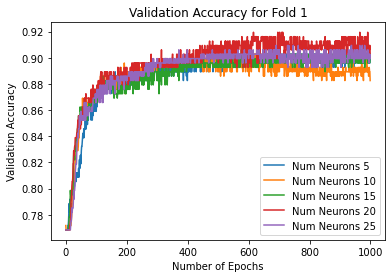

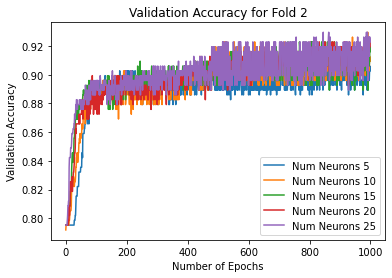

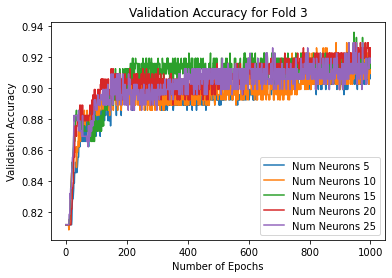

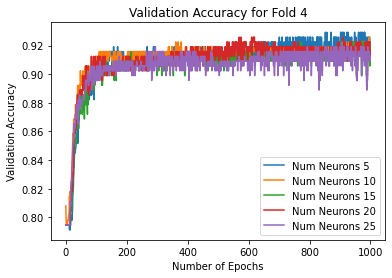

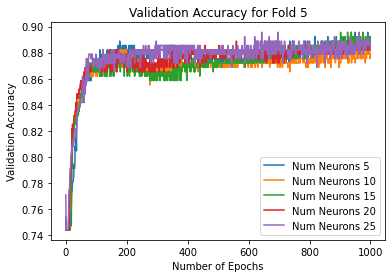

In [6]:
def plot_cross_val_acc(n_folds, num_neurons_list, histories):
    for i in range(1, n_folds + 1):
        for num_neurons in num_neurons_list:
            key = (num_neurons, i)
            plt.figure(i)
            plt.plot(histories[key].history['val_accuracy'], label='Num Neurons ' + str(num_neurons))
        plt.title(f'Validation Accuracy for Fold {i}')
        plt.ylabel('Validation Accuracy')
        plt.xlabel('Number of Epochs')
        plt.legend(loc='lower right')
        plt.savefig(f'./plots/3a_cross_val_acc_fold{i}.png')
        plt.show()

# plot and save figs for cross validation accuracies
plot_cross_val_acc(n_folds, num_neurons_list, histories)

In [18]:
# Get the final validation accuracy for each fold, batch size pair
val_acc = []
for i in range(1, n_folds + 1):
    num_neurons_acc = []
    for num_neurons in num_neurons_list:
        key = (num_neurons, i)
        num_neurons_acc.append(histories[key].history['val_accuracy'][epochs-1])
    val_acc.append(num_neurons_acc)

val_acc_arr = np.array(val_acc)
print("Validation Accuracy: Rows correspond to a fold and Columns correspond to a num of neurons")
for i in range(5):
    print(f'Fold {i+1}: {val_acc[i]}')

val_acc_mean = []
for i in range(5):
    val_acc_mean.append((np.mean(val_acc_arr[:,i]), np.std(val_acc_arr[:,i])))

print()
print('Mean and Variance for Validation Accuracy :')
for num_neurons, mean in zip(num_neurons_list, val_acc_mean):
    print(f'Num Neurons {num_neurons}: {mean}')

Validation Accuracy: Rows correspond to a fold and Columns correspond to a num of neurons
Fold 1: [0.899328887462616, 0.8825503587722778, 0.9026845693588257, 0.9026845693588257, 0.899328887462616]
Fold 2: [0.9026845693588257, 0.9093959927558899, 0.9161073565483093, 0.9194630980491638, 0.9228187799453735]
Fold 3: [0.9093959927558899, 0.9228187799453735, 0.9194630980491638, 0.926174521446228, 0.9194630980491638]
Fold 4: [0.9225589036941528, 0.9158248901367188, 0.9191918969154358, 0.9158248901367188, 0.9124578833580017]
Fold 5: [0.8821548819541931, 0.8787878751754761, 0.8922559022903442, 0.8821548819541931, 0.8821548819541931]

Mean and Variance for Validation Accuracy :
Num Neurons 5: (0.9032246470451355, 0.013200777368558675)
Num Neurons 10: (0.9018755793571472, 0.01786764547905491)
Num Neurons 15: (0.9099405646324158, 0.010767468261214486)
Num Neurons 20: (0.9092603921890259, 0.015564226544791131)
Num Neurons 25: (0.9072447061538697, 0.014907565565546616)


In [8]:
model_data = {}
reg = regularizers.l2(10e-6)
opt = keras.optimizers.SGD(learning_rate=0.01)
num_neurons = 15
epochs = 1000
batch_size = 16


model = keras.Sequential([keras.layers.Dense(num_neurons, kernel_regularizer=reg, activation='relu'),
                          keras.layers.Dense(NUM_CLASSES, activation='softmax')])

model.compile(optimizer=opt, loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model_data['optimal'] = model.fit(trainX, trainY, epochs=epochs, 
                                  validation_data=(testX, testY),
                                  verbose=2, batch_size=batch_size)

Epoch 1/1000
93/93 - 0s - loss: 0.7682 - accuracy: 0.7755 - val_loss: 0.7028 - val_accuracy: 0.7680
Epoch 2/1000
93/93 - 0s - loss: 0.6693 - accuracy: 0.7829 - val_loss: 0.6791 - val_accuracy: 0.7680
Epoch 3/1000
93/93 - 0s - loss: 0.6500 - accuracy: 0.7829 - val_loss: 0.6615 - val_accuracy: 0.7680
Epoch 4/1000
93/93 - 0s - loss: 0.6337 - accuracy: 0.7829 - val_loss: 0.6442 - val_accuracy: 0.7680
Epoch 5/1000
93/93 - 0s - loss: 0.6186 - accuracy: 0.7829 - val_loss: 0.6298 - val_accuracy: 0.7680
Epoch 6/1000
93/93 - 0s - loss: 0.6040 - accuracy: 0.7829 - val_loss: 0.6135 - val_accuracy: 0.7680
Epoch 7/1000
93/93 - 0s - loss: 0.5888 - accuracy: 0.7823 - val_loss: 0.5973 - val_accuracy: 0.7680
Epoch 8/1000
93/93 - 0s - loss: 0.5746 - accuracy: 0.7829 - val_loss: 0.5838 - val_accuracy: 0.7680
Epoch 9/1000
93/93 - 0s - loss: 0.5598 - accuracy: 0.7823 - val_loss: 0.5735 - val_accuracy: 0.7680
Epoch 10/1000
93/93 - 0s - loss: 0.5475 - accuracy: 0.7836 - val_loss: 0.5568 - val_accuracy: 0.7696

Epoch 83/1000
93/93 - 0s - loss: 0.2727 - accuracy: 0.8898 - val_loss: 0.2777 - val_accuracy: 0.8793
Epoch 84/1000
93/93 - 0s - loss: 0.2723 - accuracy: 0.8938 - val_loss: 0.2773 - val_accuracy: 0.8762
Epoch 85/1000
93/93 - 0s - loss: 0.2716 - accuracy: 0.8925 - val_loss: 0.2765 - val_accuracy: 0.8777
Epoch 86/1000
93/93 - 0s - loss: 0.2704 - accuracy: 0.8925 - val_loss: 0.2782 - val_accuracy: 0.8793
Epoch 87/1000
93/93 - 0s - loss: 0.2701 - accuracy: 0.8911 - val_loss: 0.2781 - val_accuracy: 0.8824
Epoch 88/1000
93/93 - 0s - loss: 0.2687 - accuracy: 0.8905 - val_loss: 0.2741 - val_accuracy: 0.8918
Epoch 89/1000
93/93 - 0s - loss: 0.2692 - accuracy: 0.8938 - val_loss: 0.2745 - val_accuracy: 0.8777
Epoch 90/1000
93/93 - 0s - loss: 0.2686 - accuracy: 0.8925 - val_loss: 0.2739 - val_accuracy: 0.8793
Epoch 91/1000
93/93 - 0s - loss: 0.2666 - accuracy: 0.8945 - val_loss: 0.2731 - val_accuracy: 0.8887
Epoch 92/1000
93/93 - 0s - loss: 0.2672 - accuracy: 0.8925 - val_loss: 0.2724 - val_accurac

Epoch 164/1000
93/93 - 0s - loss: 0.2401 - accuracy: 0.8999 - val_loss: 0.2575 - val_accuracy: 0.8918
Epoch 165/1000
93/93 - 0s - loss: 0.2402 - accuracy: 0.8958 - val_loss: 0.2564 - val_accuracy: 0.8950
Epoch 166/1000
93/93 - 0s - loss: 0.2394 - accuracy: 0.8965 - val_loss: 0.2551 - val_accuracy: 0.8981
Epoch 167/1000
93/93 - 0s - loss: 0.2394 - accuracy: 0.8992 - val_loss: 0.2556 - val_accuracy: 0.8997
Epoch 168/1000
93/93 - 0s - loss: 0.2393 - accuracy: 0.8972 - val_loss: 0.2553 - val_accuracy: 0.8981
Epoch 169/1000
93/93 - 0s - loss: 0.2387 - accuracy: 0.8972 - val_loss: 0.2555 - val_accuracy: 0.8997
Epoch 170/1000
93/93 - 0s - loss: 0.2382 - accuracy: 0.8945 - val_loss: 0.2581 - val_accuracy: 0.8871
Epoch 171/1000
93/93 - 0s - loss: 0.2377 - accuracy: 0.8958 - val_loss: 0.2630 - val_accuracy: 0.8887
Epoch 172/1000
93/93 - 0s - loss: 0.2381 - accuracy: 0.8978 - val_loss: 0.2562 - val_accuracy: 0.8966
Epoch 173/1000
93/93 - 0s - loss: 0.2376 - accuracy: 0.8978 - val_loss: 0.2547 - v

Epoch 245/1000
93/93 - 0s - loss: 0.2245 - accuracy: 0.9046 - val_loss: 0.2561 - val_accuracy: 0.8887
Epoch 246/1000
93/93 - 0s - loss: 0.2253 - accuracy: 0.9005 - val_loss: 0.2514 - val_accuracy: 0.9044
Epoch 247/1000
93/93 - 0s - loss: 0.2246 - accuracy: 0.9046 - val_loss: 0.2513 - val_accuracy: 0.9044
Epoch 248/1000
93/93 - 0s - loss: 0.2240 - accuracy: 0.9019 - val_loss: 0.2574 - val_accuracy: 0.8887
Epoch 249/1000
93/93 - 0s - loss: 0.2249 - accuracy: 0.9059 - val_loss: 0.2523 - val_accuracy: 0.9044
Epoch 250/1000
93/93 - 0s - loss: 0.2243 - accuracy: 0.9039 - val_loss: 0.2526 - val_accuracy: 0.9028
Epoch 251/1000
93/93 - 0s - loss: 0.2246 - accuracy: 0.9019 - val_loss: 0.2517 - val_accuracy: 0.9044
Epoch 252/1000
93/93 - 0s - loss: 0.2242 - accuracy: 0.9005 - val_loss: 0.2515 - val_accuracy: 0.9060
Epoch 253/1000
93/93 - 0s - loss: 0.2240 - accuracy: 0.9012 - val_loss: 0.2523 - val_accuracy: 0.9028
Epoch 254/1000
93/93 - 0s - loss: 0.2240 - accuracy: 0.9012 - val_loss: 0.2517 - v

Epoch 326/1000
93/93 - 0s - loss: 0.2134 - accuracy: 0.9066 - val_loss: 0.2533 - val_accuracy: 0.8966
Epoch 327/1000
93/93 - 0s - loss: 0.2152 - accuracy: 0.9086 - val_loss: 0.2510 - val_accuracy: 0.8997
Epoch 328/1000
93/93 - 0s - loss: 0.2143 - accuracy: 0.9066 - val_loss: 0.2502 - val_accuracy: 0.9013
Epoch 329/1000
93/93 - 0s - loss: 0.2127 - accuracy: 0.9073 - val_loss: 0.2611 - val_accuracy: 0.8934
Epoch 330/1000
93/93 - 0s - loss: 0.2147 - accuracy: 0.9066 - val_loss: 0.2511 - val_accuracy: 0.8997
Epoch 331/1000
93/93 - 0s - loss: 0.2146 - accuracy: 0.9079 - val_loss: 0.2496 - val_accuracy: 0.9013
Epoch 332/1000
93/93 - 0s - loss: 0.2143 - accuracy: 0.9066 - val_loss: 0.2526 - val_accuracy: 0.8981
Epoch 333/1000
93/93 - 0s - loss: 0.2137 - accuracy: 0.9059 - val_loss: 0.2501 - val_accuracy: 0.8981
Epoch 334/1000
93/93 - 0s - loss: 0.2144 - accuracy: 0.9032 - val_loss: 0.2509 - val_accuracy: 0.9044
Epoch 335/1000
93/93 - 0s - loss: 0.2140 - accuracy: 0.9073 - val_loss: 0.2498 - v

Epoch 407/1000
93/93 - 0s - loss: 0.2064 - accuracy: 0.9106 - val_loss: 0.2495 - val_accuracy: 0.9013
Epoch 408/1000
93/93 - 0s - loss: 0.2064 - accuracy: 0.9126 - val_loss: 0.2486 - val_accuracy: 0.9028
Epoch 409/1000
93/93 - 0s - loss: 0.2059 - accuracy: 0.9113 - val_loss: 0.2556 - val_accuracy: 0.8918
Epoch 410/1000
93/93 - 0s - loss: 0.2063 - accuracy: 0.9126 - val_loss: 0.2523 - val_accuracy: 0.8997
Epoch 411/1000
93/93 - 0s - loss: 0.2057 - accuracy: 0.9066 - val_loss: 0.2497 - val_accuracy: 0.8981
Epoch 412/1000
93/93 - 0s - loss: 0.2061 - accuracy: 0.9106 - val_loss: 0.2491 - val_accuracy: 0.8997
Epoch 413/1000
93/93 - 0s - loss: 0.2065 - accuracy: 0.9120 - val_loss: 0.2489 - val_accuracy: 0.8997
Epoch 414/1000
93/93 - 0s - loss: 0.2063 - accuracy: 0.9113 - val_loss: 0.2518 - val_accuracy: 0.8981
Epoch 415/1000
93/93 - 0s - loss: 0.2065 - accuracy: 0.9106 - val_loss: 0.2492 - val_accuracy: 0.8981
Epoch 416/1000
93/93 - 0s - loss: 0.2061 - accuracy: 0.9126 - val_loss: 0.2510 - v

Epoch 488/1000
93/93 - 0s - loss: 0.2009 - accuracy: 0.9113 - val_loss: 0.2524 - val_accuracy: 0.8950
Epoch 489/1000
93/93 - 0s - loss: 0.2007 - accuracy: 0.9120 - val_loss: 0.2485 - val_accuracy: 0.9044
Epoch 490/1000
93/93 - 0s - loss: 0.2002 - accuracy: 0.9126 - val_loss: 0.2484 - val_accuracy: 0.8981
Epoch 491/1000
93/93 - 0s - loss: 0.2009 - accuracy: 0.9140 - val_loss: 0.2493 - val_accuracy: 0.8981
Epoch 492/1000
93/93 - 0s - loss: 0.1992 - accuracy: 0.9147 - val_loss: 0.2497 - val_accuracy: 0.8981
Epoch 493/1000
93/93 - 0s - loss: 0.1995 - accuracy: 0.9153 - val_loss: 0.2480 - val_accuracy: 0.9028
Epoch 494/1000
93/93 - 0s - loss: 0.1995 - accuracy: 0.9153 - val_loss: 0.2486 - val_accuracy: 0.8966
Epoch 495/1000
93/93 - 0s - loss: 0.1998 - accuracy: 0.9180 - val_loss: 0.2478 - val_accuracy: 0.9013
Epoch 496/1000
93/93 - 0s - loss: 0.2002 - accuracy: 0.9140 - val_loss: 0.2500 - val_accuracy: 0.8981
Epoch 497/1000
93/93 - 0s - loss: 0.1983 - accuracy: 0.9086 - val_loss: 0.2488 - v

Epoch 569/1000
93/93 - 0s - loss: 0.1943 - accuracy: 0.9147 - val_loss: 0.2471 - val_accuracy: 0.8981
Epoch 570/1000
93/93 - 0s - loss: 0.1957 - accuracy: 0.9167 - val_loss: 0.2487 - val_accuracy: 0.8981
Epoch 571/1000
93/93 - 0s - loss: 0.1954 - accuracy: 0.9167 - val_loss: 0.2489 - val_accuracy: 0.8997
Epoch 572/1000
93/93 - 0s - loss: 0.1950 - accuracy: 0.9147 - val_loss: 0.2486 - val_accuracy: 0.8997
Epoch 573/1000
93/93 - 0s - loss: 0.1943 - accuracy: 0.9167 - val_loss: 0.2480 - val_accuracy: 0.8997
Epoch 574/1000
93/93 - 0s - loss: 0.1945 - accuracy: 0.9167 - val_loss: 0.2482 - val_accuracy: 0.8981
Epoch 575/1000
93/93 - 0s - loss: 0.1940 - accuracy: 0.9147 - val_loss: 0.2553 - val_accuracy: 0.8950
Epoch 576/1000
93/93 - 0s - loss: 0.1945 - accuracy: 0.9167 - val_loss: 0.2473 - val_accuracy: 0.8997
Epoch 577/1000
93/93 - 0s - loss: 0.1934 - accuracy: 0.9160 - val_loss: 0.2468 - val_accuracy: 0.9013
Epoch 578/1000
93/93 - 0s - loss: 0.1936 - accuracy: 0.9167 - val_loss: 0.2473 - v

Epoch 650/1000
93/93 - 0s - loss: 0.1898 - accuracy: 0.9207 - val_loss: 0.2480 - val_accuracy: 0.9013
Epoch 651/1000
93/93 - 0s - loss: 0.1898 - accuracy: 0.9180 - val_loss: 0.2463 - val_accuracy: 0.9013
Epoch 652/1000
93/93 - 0s - loss: 0.1896 - accuracy: 0.9214 - val_loss: 0.2486 - val_accuracy: 0.9013
Epoch 653/1000
93/93 - 0s - loss: 0.1890 - accuracy: 0.9214 - val_loss: 0.2481 - val_accuracy: 0.8966
Epoch 654/1000
93/93 - 0s - loss: 0.1897 - accuracy: 0.9173 - val_loss: 0.2494 - val_accuracy: 0.9013
Epoch 655/1000
93/93 - 0s - loss: 0.1897 - accuracy: 0.9173 - val_loss: 0.2476 - val_accuracy: 0.8997
Epoch 656/1000
93/93 - 0s - loss: 0.1880 - accuracy: 0.9187 - val_loss: 0.2506 - val_accuracy: 0.8966
Epoch 657/1000
93/93 - 0s - loss: 0.1888 - accuracy: 0.9227 - val_loss: 0.2530 - val_accuracy: 0.8997
Epoch 658/1000
93/93 - 0s - loss: 0.1890 - accuracy: 0.9167 - val_loss: 0.2458 - val_accuracy: 0.8997
Epoch 659/1000
93/93 - 0s - loss: 0.1902 - accuracy: 0.9167 - val_loss: 0.2459 - v

Epoch 731/1000
93/93 - 0s - loss: 0.1851 - accuracy: 0.9200 - val_loss: 0.2499 - val_accuracy: 0.9028
Epoch 732/1000
93/93 - 0s - loss: 0.1842 - accuracy: 0.9194 - val_loss: 0.2481 - val_accuracy: 0.8966
Epoch 733/1000
93/93 - 0s - loss: 0.1850 - accuracy: 0.9214 - val_loss: 0.2469 - val_accuracy: 0.8981
Epoch 734/1000
93/93 - 0s - loss: 0.1841 - accuracy: 0.9261 - val_loss: 0.2555 - val_accuracy: 0.8950
Epoch 735/1000
93/93 - 0s - loss: 0.1849 - accuracy: 0.9200 - val_loss: 0.2456 - val_accuracy: 0.8966
Epoch 736/1000
93/93 - 0s - loss: 0.1849 - accuracy: 0.9187 - val_loss: 0.2477 - val_accuracy: 0.8966
Epoch 737/1000
93/93 - 0s - loss: 0.1849 - accuracy: 0.9214 - val_loss: 0.2490 - val_accuracy: 0.9028
Epoch 738/1000
93/93 - 0s - loss: 0.1847 - accuracy: 0.9200 - val_loss: 0.2482 - val_accuracy: 0.8981
Epoch 739/1000
93/93 - 0s - loss: 0.1847 - accuracy: 0.9187 - val_loss: 0.2462 - val_accuracy: 0.9028
Epoch 740/1000
93/93 - 0s - loss: 0.1844 - accuracy: 0.9200 - val_loss: 0.2533 - v

Epoch 812/1000
93/93 - 0s - loss: 0.1804 - accuracy: 0.9247 - val_loss: 0.2502 - val_accuracy: 0.8997
Epoch 813/1000
93/93 - 0s - loss: 0.1808 - accuracy: 0.9241 - val_loss: 0.2462 - val_accuracy: 0.8966
Epoch 814/1000
93/93 - 0s - loss: 0.1806 - accuracy: 0.9261 - val_loss: 0.2508 - val_accuracy: 0.8997
Epoch 815/1000
93/93 - 0s - loss: 0.1801 - accuracy: 0.9247 - val_loss: 0.2464 - val_accuracy: 0.8997
Epoch 816/1000
93/93 - 0s - loss: 0.1805 - accuracy: 0.9194 - val_loss: 0.2508 - val_accuracy: 0.8997
Epoch 817/1000
93/93 - 0s - loss: 0.1802 - accuracy: 0.9234 - val_loss: 0.2442 - val_accuracy: 0.9013
Epoch 818/1000
93/93 - 0s - loss: 0.1804 - accuracy: 0.9194 - val_loss: 0.2465 - val_accuracy: 0.8981
Epoch 819/1000
93/93 - 0s - loss: 0.1798 - accuracy: 0.9261 - val_loss: 0.2455 - val_accuracy: 0.8966
Epoch 820/1000
93/93 - 0s - loss: 0.1797 - accuracy: 0.9281 - val_loss: 0.2440 - val_accuracy: 0.8966
Epoch 821/1000
93/93 - 0s - loss: 0.1805 - accuracy: 0.9234 - val_loss: 0.2508 - v

Epoch 893/1000
93/93 - 0s - loss: 0.1763 - accuracy: 0.9281 - val_loss: 0.2457 - val_accuracy: 0.8950
Epoch 894/1000
93/93 - 0s - loss: 0.1771 - accuracy: 0.9227 - val_loss: 0.2460 - val_accuracy: 0.8950
Epoch 895/1000
93/93 - 0s - loss: 0.1768 - accuracy: 0.9254 - val_loss: 0.2476 - val_accuracy: 0.8966
Epoch 896/1000
93/93 - 0s - loss: 0.1768 - accuracy: 0.9247 - val_loss: 0.2442 - val_accuracy: 0.8997
Epoch 897/1000
93/93 - 0s - loss: 0.1772 - accuracy: 0.9234 - val_loss: 0.2514 - val_accuracy: 0.9013
Epoch 898/1000
93/93 - 0s - loss: 0.1770 - accuracy: 0.9194 - val_loss: 0.2442 - val_accuracy: 0.8981
Epoch 899/1000
93/93 - 0s - loss: 0.1770 - accuracy: 0.9254 - val_loss: 0.2452 - val_accuracy: 0.8981
Epoch 900/1000
93/93 - 0s - loss: 0.1774 - accuracy: 0.9247 - val_loss: 0.2458 - val_accuracy: 0.8981
Epoch 901/1000
93/93 - 0s - loss: 0.1763 - accuracy: 0.9247 - val_loss: 0.2501 - val_accuracy: 0.9013
Epoch 902/1000
93/93 - 0s - loss: 0.1776 - accuracy: 0.9214 - val_loss: 0.2492 - v

Epoch 974/1000
93/93 - 0s - loss: 0.1737 - accuracy: 0.9281 - val_loss: 0.2465 - val_accuracy: 0.9013
Epoch 975/1000
93/93 - 0s - loss: 0.1725 - accuracy: 0.9274 - val_loss: 0.2458 - val_accuracy: 0.9013
Epoch 976/1000
93/93 - 0s - loss: 0.1739 - accuracy: 0.9214 - val_loss: 0.2434 - val_accuracy: 0.8997
Epoch 977/1000
93/93 - 0s - loss: 0.1733 - accuracy: 0.9227 - val_loss: 0.2443 - val_accuracy: 0.8934
Epoch 978/1000
93/93 - 0s - loss: 0.1730 - accuracy: 0.9227 - val_loss: 0.2451 - val_accuracy: 0.8950
Epoch 979/1000
93/93 - 0s - loss: 0.1727 - accuracy: 0.9254 - val_loss: 0.2456 - val_accuracy: 0.9044
Epoch 980/1000
93/93 - 0s - loss: 0.1736 - accuracy: 0.9187 - val_loss: 0.2492 - val_accuracy: 0.8966
Epoch 981/1000
93/93 - 0s - loss: 0.1727 - accuracy: 0.9247 - val_loss: 0.2453 - val_accuracy: 0.8966
Epoch 982/1000
93/93 - 0s - loss: 0.1715 - accuracy: 0.9261 - val_loss: 0.2606 - val_accuracy: 0.8934
Epoch 983/1000
93/93 - 0s - loss: 0.1736 - accuracy: 0.9207 - val_loss: 0.2457 - v

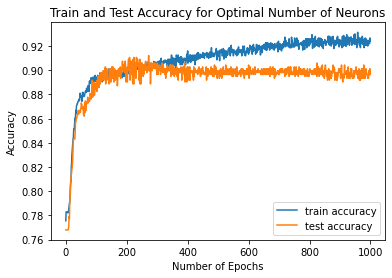

In [9]:
plt.plot(model_data['optimal'].history['accuracy'], label='train accuracy')
plt.plot(model_data['optimal'].history['val_accuracy'], label='test accuracy')

plt.title('Train and Test Accuracy for Optimal Number of Neurons')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(loc='lower right')
plt.savefig(f'./plots/parta/q3/upload/3a_optimal_acc.png')
plt.show()

In [10]:
print('Final results from the last epoch')
acc = model_data['optimal'].history['accuracy'][epochs-1]
val_acc = model_data['optimal'].history['val_accuracy'][epochs-1]
loss = model_data['optimal'].history['loss'][epochs-1]
val_loss = model_data['optimal'].history['val_loss'][epochs-1]
    
print()
print(f'Accuracy\t\t: {acc}')
print(f'Validation Accuracy\t: {val_acc}')
print(f'Loss\t\t\t: {loss}')
print(f'Validation Loss\t\t: {val_loss}')

Final results from the last epoch

Accuracy		: 0.9240591526031494
Validation Accuracy	: 0.8965517282485962
Loss			: 0.17119242250919342
Validation Loss		: 0.26023393869400024
